In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = './'

In [78]:
df = pd.read_csv(path + 'train.csv')
df.head()

UNC_YEAR    HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017  190590         12    Algeria     4.605299e+10  1.948099e+10   
1      2017  190590         36  Australia     2.284420e+11  1.948099e+10   
2      2017  190590         40    Austria     1.664750e+11  1.948099e+10   
3      2017  190590         56    Belgium     4.064120e+11  1.948099e+10   
4      2017  190590         76     Brazil     1.507490e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
2         0.0   4403.247293    4.172380e+11       3.955690e+11      8797566   
3         0.0   3980.375563    5.026980e+11       4.757400e+11     11375158   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766             3416326.0   
1     1.304758            80.223690   8329.652344           438747025.0   
2          NaN            78.856460   8289.029297           453206357.0   
3          NaN            72.409200   8722.114258           706524512.0   
4     3.191389            55.382403  18364.505860            31329648.0   

   KR_TRADE_HSCD_COUNTRYCD  
0                     7657  
1                  5294788  
2                   335818  
3                   173709  
4                   122850

In [79]:
idx = df[df['TARIFF_AVG'].isnull()].index
df = df.drop(idx)
idx = df[df["KR_TRADE_HSCD_COUNTRYCD"] == 0.0].index
df = df.drop(idx)
idx = df[df["TRADE_HSCD_COUNTRYCD"].isnull()].index
df = df.drop(idx)
idx = df[df['PA_NUS_FCRF'].isnull()].index
df = df.drop(idx)
idx = df[df['SNDIST'].isnull()].index
df = df.drop(idx)

In [80]:
df.head()
df.to_csv('./main_clearNull.csv')

In [81]:
df['_HSCD'] = df['HSCD'].copy()

In [82]:
hcsd_uniq = df['HSCD'].unique()
for i in range(len(df['HSCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['HSCD'].iloc[i]:
      df['HSCD'].iloc[i] = (x+1)
      break

df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1         12    Algeria     4.605299e+10  1.948099e+10   
1      2017     1         36  Australia     2.284420e+11  1.948099e+10   
4      2017     1         76     Brazil     1.507490e+11  1.948099e+10   
5      2017     1        104    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1        124     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   
5         5.0   5891.659995    6.894587e+10       6.718424e+10     53382581   
6         0.0   7911.783801    1.649880e+12       1.528240e+12     36543321   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  
0                     7657  190590  
1                  5294788  190590  
4                   122850  190590  
5                   631082  190590  
6                  7273171  190590

In [83]:
hcsd_uniq = df['COUNTRYCD'].unique()
for i in range(len(df['COUNTRYCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['COUNTRYCD'].iloc[i]:
      df['COUNTRYCD'].iloc[i] = (x+1)
      break
#df['TARIFF_AVG'] = df['TARIFF_AVG'] / 100
#df['IC_BUS_EASE_DFRN_DB'] = df['IC_BUS_EASE_DFRN_DB'] / 100
#df['KMDIST'] = df['KMDIST']/100 # total -> divided 10000
#df['gdp_percent'] = df['gdp_percent'] / 100


######################################################################
df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1          1    Algeria     4.605299e+10  1.948099e+10   
1      2017     1          2  Australia     2.284420e+11  1.948099e+10   
4      2017     1          3     Brazil     1.507490e+11  1.948099e+10   
5      2017     1          4    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1          5     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   
5         5.0   5891.659995    6.894587e+10       6.718424e+10     53382581   
6         0.0   7911.783801    1.649880e+12       1.528240e+12     36543321   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  
0                     7657  190590  
1                  5294788  190590  
4                   122850  190590  
5                   631082  190590  
6                  7273171  190590

In [84]:
df.head()

UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1          1    Algeria     4.605299e+10  1.948099e+10   
1      2017     1          2  Australia     2.284420e+11  1.948099e+10   
4      2017     1          3     Brazil     1.507490e+11  1.948099e+10   
5      2017     1          4    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1          5     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   
5         5.0   5891.659995    6.894587e+10       6.718424e+10     53382581   
6         0.0   7911.783801    1.649880e+12       1.528240e+12     36543321   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  
0                     7657  190590  
1                  5294788  190590  
4                   122850  190590  
5                   631082  190590  
6                  7273171  190590

<AxesSubplot:>

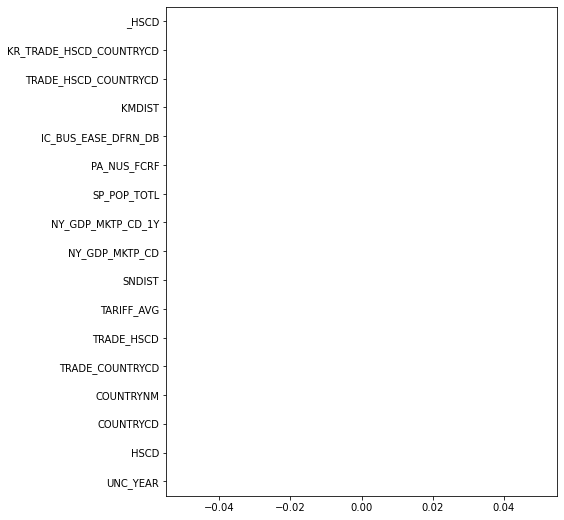

In [85]:
df.isnull().mean().plot.barh(figsize=(7,9))

In [86]:
df.shape


(17269, 17)

In [87]:
df["item_total_percent"] = df["TRADE_HSCD_COUNTRYCD"]/ df["TRADE_COUNTRYCD"] * 100
df["item_world_percent"] = df["TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD"] * 100
df["gdp_percent"] = df["NY_GDP_MKTP_CD"] / df["NY_GDP_MKTP_CD_1Y"] * 100
df["next_year_percent"] = df["KR_TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD_COUNTRYCD"] * 100
df["next_year_percent"]

0        0.224130
1        1.206797
4        0.392121
5        4.945077
6        0.652893
           ...   
21098    0.870154
21099    2.552436
21100    0.412353
21101    0.273898
21102    6.848066
Name: next_year_percent, Length: 17269, dtype: float64

In [88]:
df.head()
# df = df.drop('KR_TRADE_HSCD_COUNTRYCD', axis=1).copy()
# df = df.drop('TRADE_HSCD_COUNTRYCD', axis=1).copy()

UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1          1    Algeria     4.605299e+10  1.948099e+10   
1      2017     1          2  Australia     2.284420e+11  1.948099e+10   
4      2017     1          3     Brazil     1.507490e+11  1.948099e+10   
5      2017     1          4    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1          5     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  ...  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11  ...   
1         0.0  12203.155980    1.329190e+12       1.208850e+12  ...   
4        18.0   9644.206941    2.062830e+12       1.795700e+12  ...   
5         5.0   5891.659995    6.894587e+10       6.718424e+10  ...   
6         0.0   7911.783801    1.649880e+12       1.528240e+12  ...   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  item_total_percent  item_world_percent  \
0                     7657  190590            0.007418            0.017537   
1                  5294788  190590            0.192061            2.252181   
4                   122850  190590            0.020783            0.160822   
5                   631082  190590            0.066283            0.065509   
6                  7273171  190590            0.257627            5.718352   

   gdp_percent  next_year_percent  
0   106.355199           0.224130  
1   109.954916           1.206797  
4   114.876093           0.392121  
5   102.622089           4.945077  
6   107.959483           0.652893  

[5 rows x 21 columns]

In [89]:
copy_df = df.copy()

In [90]:

df['KMDIST'] = df['KMDIST'] / 100
df['SNDIST'] = df['SNDIST'] / 100
df['SP_POP_TOTL'] = (df['SP_POP_TOTL'] - df['SP_POP_TOTL'].min()) / (df['SP_POP_TOTL'].max() - df['SP_POP_TOTL'].min())
# 'SP_POP_TOTL', 
copy_df = df.copy()
df = df.drop(columns=['_HSCD'])
df = df.drop(columns=['UNC_YEAR', 'COUNTRYNM'])
df = df.drop(columns=['KR_TRADE_HSCD_COUNTRYCD', 'TRADE_HSCD_COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y'])

In [91]:
df.head()

HSCD  COUNTRYCD  TARIFF_AVG      SNDIST  SP_POP_TOTL  PA_NUS_FCRF  \
0     1          1        30.0   38.782384     0.027670   110.973017   
1     1          2         0.0  122.031560     0.015534     1.304758   
4     1          3        18.0   96.442069     0.147996     3.191389   
5     1          4         5.0   58.916600     0.036340  1360.358707   
6     1          5         0.0   79.117838     0.024167     1.297936   

   IC_BUS_EASE_DFRN_DB      KMDIST  item_total_percent  item_world_percent  \
0            46.109810   99.540098            0.007418            0.017537   
1            80.223690   83.296523            0.192061            2.252181   
4            55.382403  183.645059            0.020783            0.160822   
5            42.671390   37.961426            0.066283            0.065509   
6            79.540940  106.177031            0.257627            5.718352   

   gdp_percent  next_year_percent  
0   106.355199           0.224130  
1   109.954916           1.206797  
4   114.876093           0.392121  
5   102.622089           4.945077  
6   107.959483           0.652893

In [92]:
df.to_csv('./norm.csv')

In [93]:
df_shuffled=df.sample(frac=1).reset_index(drop=True)

In [94]:
df_shuffled.head()

HSCD  COUNTRYCD  TARIFF_AVG      SNDIST  SP_POP_TOTL   PA_NUS_FCRF  \
0   148          9         0.0   37.229193     0.005408     23.376333   
1   189         26         0.0   60.131505     0.965491     65.121569   
2   316         19         0.0  136.137250     0.001215      1.407408   
3   168          5         0.0   80.694342     0.024167      1.297936   
4   415         12         0.0   94.253098     0.189066  13380.833880   

   IC_BUS_EASE_DFRN_DB      KMDIST  item_total_percent  item_world_percent  \
0            76.388340   82.620625            0.003421            0.377676   
1            55.901587   46.926719            0.009768            3.013394   
2            87.166330  102.938369            0.006632            0.065297   
3            79.540940  106.177031            0.010181            3.924561   
4            64.528933   52.916836            0.109045            1.936460   

   gdp_percent  next_year_percent  
0   111.390825           0.003409  
1   115.598309           7.877495  
2   109.133798           0.631650  
3   107.959483           1.324762  
4   108.986486           0.358638

In [95]:
df = df_shuffled.copy()

In [96]:
print(df.shape)
tr = int(df.shape[0]*6/10) # Train
te = int((df.shape[0] - tr)/2) # Test (actually Train)
va = df.shape[0] - tr - te # Validation (actually Test)
print(tr,te, va)

(17269, 12)
10361 3454 3454


In [97]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opti
torch.manual_seed(1015)
device = torch.device("cuda")

In [98]:
import torch
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values).to(device)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values).to(device)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values).to(device)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values).to(device)

max(y_train)
y_train = torch.reshape(y_train, (-1,1))


In [99]:
y_test = y_test.reshape(-1,1)

In [100]:
len(df)

17269

In [101]:
print(x_train.shape)
print(y_train.shape)
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

torch.Size([13815, 11])
torch.Size([13815, 1])


In [102]:
y_test.shape

torch.Size([3454, 1])

In [103]:
FLAG_SAVE_MODEL = False

In [104]:
# LSTM Model Test
import torch.nn as nn

sequence_length = x_train.shape[1]
input_size = x_train.shape[1]
hidden_size = 512
num_layers = 2
num_classes = 1
batch_size = 128

learning_rate = 0.01
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__() # 상속한 nn.Module에서 RNN에 해당하는 init 실행
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.5)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x): 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # (BATCH SIZE, SEQ_LENGTH, HIDDEN_SIZE)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # hidden state와 동일

        out, _ = self.lstm(x, (h0, c0)) # output : (BATCH_SIZE, SEQ_LENGTH, HIDDEN_SIZE) tensors. (hn, cn)은 필요 없으므로 받지 않고 _로 처리합니다. 

        out = self.fc(out[:, -1, :])
        return out
    
class DeepModel(nn.Module):
    def __init__(self, in_channel, out_channel):
        super(DeepModel, self).__init__()

        self.basic = nn.BatchNorm1d(in_channel)
        self.layer1 = nn.Linear(in_channel, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.bn1 = nn.BatchNorm1d(256)
        self.layer2 = nn.Linear(256, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.bn2 = nn.BatchNorm1d(64)
        self.head = nn.Linear(64, out_channel)

    def forward(self, x):
        x = x.to(device)
        x = self.basic(x)
        x = F.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)

        return self.head(x)

modelLinear = nn.Linear(x_train.shape[1], 1).to(device)



# model = nn.Linear(9,1).to(device)


# MODEL LOAD FINISH
# MODEL LOAD FINISH
# MODEL LOAD FINISH

# LSTM - L1 Loss Model

In [29]:
# LSTM
deepmodel = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

num_epochs = 100
total_step = len(dataloader)
loss_list_lstm = []
test_loss_list_lstm = []
for epoch in range(num_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples
        x_t = x_t.reshape(-1, 1, input_size)

        pred = deepmodel(x_t)
        
#         loss = F.mse_loss(y_t, pred)
        loss = F.l1_loss(y_t, pred)
        loss_list_lstm.append(loss)
        with torch.no_grad():
            x_te = x_test.reshape(-1,1,input_size)
            pred_y = deepmodel(x_te)
            test_loss_list_lstm.append(F.l1_loss(pred_y, y_test))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch_idx+1) % 100 == 0: 
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                epoch+1, num_epochs, batch_idx+1, total_step, loss.item()))

if FLAG_SAVE_MODEL:
    torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_LSTM_L1.pth')



Epoch [1/100], Step [100/432], Loss: 30.3850
Epoch [1/100], Step [200/432], Loss: 33.5226
Epoch [1/100], Step [300/432], Loss: 34.8750
Epoch [1/100], Step [400/432], Loss: 182.4773
Epoch [2/100], Step [100/432], Loss: 78.3820
Epoch [2/100], Step [200/432], Loss: 280.6215
Epoch [2/100], Step [300/432], Loss: 14.9796
Epoch [2/100], Step [400/432], Loss: 38.3590
Epoch [3/100], Step [100/432], Loss: 89.6827
Epoch [3/100], Step [200/432], Loss: 124.2463
Epoch [3/100], Step [300/432], Loss: 67.1081
Epoch [3/100], Step [400/432], Loss: 60.4700
Epoch [4/100], Step [100/432], Loss: 258.8174
Epoch [4/100], Step [200/432], Loss: 194.1696
Epoch [4/100], Step [300/432], Loss: 126.9476
Epoch [4/100], Step [400/432], Loss: 56.7512
Epoch [5/100], Step [100/432], Loss: 159.4947
Epoch [5/100], Step [200/432], Loss: 89.9491
Epoch [5/100], Step [300/432], Loss: 136.0734
Epoch [5/100], Step [400/432], Loss: 53.9372
Epoch [6/100], Step [100/432], Loss: 39.3664
Epoch [6/100], Step [200/432], Loss: 45.2682
Ep

Epoch [45/100], Step [300/432], Loss: 56.4195
Epoch [45/100], Step [400/432], Loss: 958.8334
Epoch [46/100], Step [100/432], Loss: 38.3016
Epoch [46/100], Step [200/432], Loss: 1822.3875
Epoch [46/100], Step [300/432], Loss: 4233.4336
Epoch [46/100], Step [400/432], Loss: 230.0813
Epoch [47/100], Step [100/432], Loss: 87.6523
Epoch [47/100], Step [200/432], Loss: 33.0045
Epoch [47/100], Step [300/432], Loss: 51.8568
Epoch [47/100], Step [400/432], Loss: 107.1634
Epoch [48/100], Step [100/432], Loss: 133.2443
Epoch [48/100], Step [200/432], Loss: 46.0023
Epoch [48/100], Step [300/432], Loss: 34.0264
Epoch [48/100], Step [400/432], Loss: 58.5727
Epoch [49/100], Step [100/432], Loss: 120.6663
Epoch [49/100], Step [200/432], Loss: 130.8003
Epoch [49/100], Step [300/432], Loss: 123.6797
Epoch [49/100], Step [400/432], Loss: 42.7624
Epoch [50/100], Step [100/432], Loss: 3989.3711
Epoch [50/100], Step [200/432], Loss: 2460.9932
Epoch [50/100], Step [300/432], Loss: 73.1300
Epoch [50/100], Ste

KeyboardInterrupt: 

In [43]:
x_te = x_test.reshape(-1,1,input_size)
pred_y = deepmodel(x_te)
# torch.mean(torch.abs(pred_y - y_test))
F.l1_loss(pred_y, y_test)

tensor(5.4021, device='cuda:0', grad_fn=<L1LossBackward>)

# L2 Loss model - not used

In [ ]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.eval()
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

In [ ]:
n_epochs = 200
loss_list1 = []
test_loss_list1 = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples

        pred = deepmodel(x_t).to(device)
        cost = F.mse_loss(y_t, pred)
        loss_list1.append(cost)
        with torch.no_grad():
            pred_y = modelL1(x_test)
            test_loss_list1.append(F.mse_loss(pred_y, y_test))
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

In [ ]:
pred_y = deepmodel(x_test)
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_L2.pth')

# l1 loss model

In [30]:
deepmodel2 = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel2.eval()#F.l1_loss
optimizer2 = torch.optim.Adam(deepmodel2.parameters(), lr=1e-5)

In [31]:
n_epochs = 100
loss_list2 = []
test_loss_list2 = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples

        pred = deepmodel2(x_t).to(device)
        cost = F.l1_loss(y_t, pred)
        loss_list2.append(cost)
        with torch.no_grad():
            pred_y = deepmodel2(x_test)
            test_loss_list2.append(F.l1_loss(pred_y, y_test))
        optimizer2.zero_grad()
        cost.backward()
        optimizer2.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

Ep 0/100  Batch 1/432  cost : 118.79347229003906
Ep 0/100  Batch 2/432  cost : 150.88973999023438
Ep 0/100  Batch 3/432  cost : 21.32658576965332
Ep 0/100  Batch 4/432  cost : 34.61569595336914
Ep 0/100  Batch 5/432  cost : 88.37181091308594
Ep 0/100  Batch 6/432  cost : 126.92076110839844
Ep 0/100  Batch 7/432  cost : 160.71044921875
Ep 0/100  Batch 8/432  cost : 111.25971984863281
Ep 0/100  Batch 9/432  cost : 183.064208984375
Ep 0/100  Batch 10/432  cost : 114.24871826171875
Ep 0/100  Batch 11/432  cost : 141.80569458007812
Ep 0/100  Batch 12/432  cost : 80.09628295898438
Ep 0/100  Batch 13/432  cost : 32.54911804199219
Ep 0/100  Batch 14/432  cost : 45.337459564208984
Ep 0/100  Batch 15/432  cost : 25.117462158203125
Ep 0/100  Batch 16/432  cost : 87.59862518310547
Ep 0/100  Batch 17/432  cost : 92.98062133789062
Ep 0/100  Batch 18/432  cost : 78.28874969482422
Ep 0/100  Batch 19/432  cost : 24.922164916992188
Ep 0/100  Batch 20/432  cost : 42.64930725097656
Ep 0/100  Batch 21/432 

Ep 0/100  Batch 245/432  cost : 4.307592391967773
Ep 0/100  Batch 246/432  cost : 3.2202789783477783
Ep 0/100  Batch 247/432  cost : 7.685667514801025
Ep 0/100  Batch 248/432  cost : 13.788208961486816
Ep 0/100  Batch 249/432  cost : 7.844871520996094
Ep 0/100  Batch 250/432  cost : 3.055720806121826
Ep 0/100  Batch 251/432  cost : 6.198125839233398
Ep 0/100  Batch 252/432  cost : 4.987860202789307
Ep 0/100  Batch 253/432  cost : 9.057660102844238
Ep 0/100  Batch 254/432  cost : 2.8901262283325195
Ep 0/100  Batch 255/432  cost : 12.618510246276855
Ep 0/100  Batch 256/432  cost : 7.821508407592773
Ep 0/100  Batch 257/432  cost : 6.363852500915527
Ep 0/100  Batch 258/432  cost : 7.465768814086914
Ep 0/100  Batch 259/432  cost : 3.549811601638794
Ep 0/100  Batch 260/432  cost : 3.861294984817505
Ep 0/100  Batch 261/432  cost : 7.459827899932861
Ep 0/100  Batch 262/432  cost : 1.983197808265686
Ep 0/100  Batch 263/432  cost : 2.0674121379852295
Ep 0/100  Batch 264/432  cost : 3.88157773017

Ep 0/100  Batch 412/432  cost : 2.3109116554260254
Ep 0/100  Batch 413/432  cost : 8.965085983276367
Ep 0/100  Batch 414/432  cost : 4.696411609649658
Ep 0/100  Batch 415/432  cost : 3.1212849617004395
Ep 0/100  Batch 416/432  cost : 4.489429473876953
Ep 0/100  Batch 417/432  cost : 3.8216590881347656
Ep 0/100  Batch 418/432  cost : 5.4683990478515625
Ep 0/100  Batch 419/432  cost : 4.9704999923706055
Ep 0/100  Batch 420/432  cost : 2.851548194885254
Ep 0/100  Batch 421/432  cost : 2.2418856620788574
Ep 0/100  Batch 422/432  cost : 6.929999828338623
Ep 0/100  Batch 423/432  cost : 7.9085283279418945
Ep 0/100  Batch 424/432  cost : 3.6511340141296387
Ep 0/100  Batch 425/432  cost : 5.846778869628906
Ep 0/100  Batch 426/432  cost : 31.0528507232666
Ep 0/100  Batch 427/432  cost : 7.0208587646484375
Ep 0/100  Batch 428/432  cost : 4.2553324699401855
Ep 0/100  Batch 429/432  cost : 6.825417518615723
Ep 0/100  Batch 430/432  cost : 10.601385116577148
Ep 0/100  Batch 431/432  cost : 4.895453

Ep 1/100  Batch 148/432  cost : 5.350001335144043
Ep 1/100  Batch 149/432  cost : 4.711492538452148
Ep 1/100  Batch 150/432  cost : 8.05262279510498
Ep 1/100  Batch 151/432  cost : 5.690291881561279
Ep 1/100  Batch 152/432  cost : 5.488422870635986
Ep 1/100  Batch 153/432  cost : 6.2628278732299805
Ep 1/100  Batch 154/432  cost : 4.882880210876465
Ep 1/100  Batch 155/432  cost : 5.649589538574219
Ep 1/100  Batch 156/432  cost : 4.140655040740967
Ep 1/100  Batch 157/432  cost : 7.073812484741211
Ep 1/100  Batch 158/432  cost : 3.561957836151123
Ep 1/100  Batch 159/432  cost : 9.907995223999023
Ep 1/100  Batch 160/432  cost : 2.9851064682006836
Ep 1/100  Batch 161/432  cost : 4.8534746170043945
Ep 1/100  Batch 162/432  cost : 5.504631042480469
Ep 1/100  Batch 163/432  cost : 3.5146853923797607
Ep 1/100  Batch 164/432  cost : 4.155811786651611
Ep 1/100  Batch 165/432  cost : 4.23030424118042
Ep 1/100  Batch 166/432  cost : 4.081974029541016
Ep 1/100  Batch 167/432  cost : 2.94824576377868

Ep 1/100  Batch 316/432  cost : 6.598575592041016
Ep 1/100  Batch 317/432  cost : 2.7061820030212402
Ep 1/100  Batch 318/432  cost : 4.133507251739502
Ep 1/100  Batch 319/432  cost : 3.8958168029785156
Ep 1/100  Batch 320/432  cost : 13.729155540466309
Ep 1/100  Batch 321/432  cost : 8.111021041870117
Ep 1/100  Batch 322/432  cost : 3.309723377227783
Ep 1/100  Batch 323/432  cost : 7.203375339508057
Ep 1/100  Batch 324/432  cost : 4.833968162536621
Ep 1/100  Batch 325/432  cost : 3.7814135551452637
Ep 1/100  Batch 326/432  cost : 5.210881233215332
Ep 1/100  Batch 327/432  cost : 3.417417049407959
Ep 1/100  Batch 328/432  cost : 5.5107197761535645
Ep 1/100  Batch 329/432  cost : 3.597564458847046
Ep 1/100  Batch 330/432  cost : 2.1253433227539062
Ep 1/100  Batch 331/432  cost : 5.4361572265625
Ep 1/100  Batch 332/432  cost : 2.4757509231567383
Ep 1/100  Batch 333/432  cost : 3.4693541526794434
Ep 1/100  Batch 334/432  cost : 5.655622482299805
Ep 1/100  Batch 335/432  cost : 7.1473302841

Ep 2/100  Batch 51/432  cost : 4.226318359375
Ep 2/100  Batch 52/432  cost : 14.751729965209961
Ep 2/100  Batch 53/432  cost : 4.043816566467285
Ep 2/100  Batch 54/432  cost : 2.882265090942383
Ep 2/100  Batch 55/432  cost : 3.5882506370544434
Ep 2/100  Batch 56/432  cost : 5.891156196594238
Ep 2/100  Batch 57/432  cost : 7.309552192687988
Ep 2/100  Batch 58/432  cost : 4.555533409118652
Ep 2/100  Batch 59/432  cost : 7.955273628234863
Ep 2/100  Batch 60/432  cost : 2.698394298553467
Ep 2/100  Batch 61/432  cost : 6.447462558746338
Ep 2/100  Batch 62/432  cost : 2.4277236461639404
Ep 2/100  Batch 63/432  cost : 3.1440281867980957
Ep 2/100  Batch 64/432  cost : 3.407437801361084
Ep 2/100  Batch 65/432  cost : 4.704974174499512
Ep 2/100  Batch 66/432  cost : 4.0620574951171875
Ep 2/100  Batch 67/432  cost : 3.003380298614502
Ep 2/100  Batch 68/432  cost : 3.6505789756774902
Ep 2/100  Batch 69/432  cost : 3.8820278644561768
Ep 2/100  Batch 70/432  cost : 6.374639511108398
Ep 2/100  Batch 

Ep 2/100  Batch 220/432  cost : 3.492093801498413
Ep 2/100  Batch 221/432  cost : 8.447214126586914
Ep 2/100  Batch 222/432  cost : 5.389073371887207
Ep 2/100  Batch 223/432  cost : 3.421651840209961
Ep 2/100  Batch 224/432  cost : 2.5871167182922363
Ep 2/100  Batch 225/432  cost : 4.029955863952637
Ep 2/100  Batch 226/432  cost : 2.412038803100586
Ep 2/100  Batch 227/432  cost : 3.692516326904297
Ep 2/100  Batch 228/432  cost : 6.977766513824463
Ep 2/100  Batch 229/432  cost : 5.239274024963379
Ep 2/100  Batch 230/432  cost : 10.764996528625488
Ep 2/100  Batch 231/432  cost : 3.352764368057251
Ep 2/100  Batch 232/432  cost : 4.0399489402771
Ep 2/100  Batch 233/432  cost : 9.744154930114746
Ep 2/100  Batch 234/432  cost : 7.132627010345459
Ep 2/100  Batch 235/432  cost : 3.619861125946045
Ep 2/100  Batch 236/432  cost : 2.7927608489990234
Ep 2/100  Batch 237/432  cost : 7.191834449768066
Ep 2/100  Batch 238/432  cost : 39.557090759277344
Ep 2/100  Batch 239/432  cost : 4.21061611175537

Ep 2/100  Batch 387/432  cost : 5.493838310241699
Ep 2/100  Batch 388/432  cost : 5.869842052459717
Ep 2/100  Batch 389/432  cost : 4.431640625
Ep 2/100  Batch 390/432  cost : 8.177085876464844
Ep 2/100  Batch 391/432  cost : 3.1172664165496826
Ep 2/100  Batch 392/432  cost : 5.041294097900391
Ep 2/100  Batch 393/432  cost : 17.178125381469727
Ep 2/100  Batch 394/432  cost : 4.521446228027344
Ep 2/100  Batch 395/432  cost : 2.886472225189209
Ep 2/100  Batch 396/432  cost : 6.800468444824219
Ep 2/100  Batch 397/432  cost : 4.064307689666748
Ep 2/100  Batch 398/432  cost : 4.862369537353516
Ep 2/100  Batch 399/432  cost : 3.2601590156555176
Ep 2/100  Batch 400/432  cost : 1.7409898042678833
Ep 2/100  Batch 401/432  cost : 7.775460243225098
Ep 2/100  Batch 402/432  cost : 5.253927707672119
Ep 2/100  Batch 403/432  cost : 3.4113903045654297
Ep 2/100  Batch 404/432  cost : 20.92608642578125
Ep 2/100  Batch 405/432  cost : 2.9176220893859863
Ep 2/100  Batch 406/432  cost : 3.138204336166382


Ep 3/100  Batch 122/432  cost : 5.8346686363220215
Ep 3/100  Batch 123/432  cost : 4.966100692749023
Ep 3/100  Batch 124/432  cost : 2.381197929382324
Ep 3/100  Batch 125/432  cost : 4.293900489807129
Ep 3/100  Batch 126/432  cost : 10.839451789855957
Ep 3/100  Batch 127/432  cost : 3.5167653560638428
Ep 3/100  Batch 128/432  cost : 2.951913833618164
Ep 3/100  Batch 129/432  cost : 3.389039993286133
Ep 3/100  Batch 130/432  cost : 19.922874450683594
Ep 3/100  Batch 131/432  cost : 2.9288570880889893
Ep 3/100  Batch 132/432  cost : 5.683681964874268
Ep 3/100  Batch 133/432  cost : 6.8345489501953125
Ep 3/100  Batch 134/432  cost : 3.185490131378174
Ep 3/100  Batch 135/432  cost : 4.127066135406494
Ep 3/100  Batch 136/432  cost : 2.8653531074523926
Ep 3/100  Batch 137/432  cost : 4.590641021728516
Ep 3/100  Batch 138/432  cost : 8.33371353149414
Ep 3/100  Batch 139/432  cost : 3.503689765930176
Ep 3/100  Batch 140/432  cost : 1.9702351093292236
Ep 3/100  Batch 141/432  cost : 7.555981636

Ep 3/100  Batch 289/432  cost : 3.3848705291748047
Ep 3/100  Batch 290/432  cost : 2.3570480346679688
Ep 3/100  Batch 291/432  cost : 5.36931848526001
Ep 3/100  Batch 292/432  cost : 7.201587677001953
Ep 3/100  Batch 293/432  cost : 7.084339141845703
Ep 3/100  Batch 294/432  cost : 2.157984733581543
Ep 3/100  Batch 295/432  cost : 6.556000709533691
Ep 3/100  Batch 296/432  cost : 3.7804157733917236
Ep 3/100  Batch 297/432  cost : 7.569875240325928
Ep 3/100  Batch 298/432  cost : 2.7627174854278564
Ep 3/100  Batch 299/432  cost : 1.8377931118011475
Ep 3/100  Batch 300/432  cost : 6.959597587585449
Ep 3/100  Batch 301/432  cost : 6.443819999694824
Ep 3/100  Batch 302/432  cost : 5.703606128692627
Ep 3/100  Batch 303/432  cost : 14.907519340515137
Ep 3/100  Batch 304/432  cost : 2.886312961578369
Ep 3/100  Batch 305/432  cost : 6.861392974853516
Ep 3/100  Batch 306/432  cost : 3.236307144165039
Ep 3/100  Batch 307/432  cost : 22.803203582763672
Ep 3/100  Batch 308/432  cost : 3.1796598434

Ep 4/100  Batch 26/432  cost : 3.89697003364563
Ep 4/100  Batch 27/432  cost : 2.6650314331054688
Ep 4/100  Batch 28/432  cost : 6.595863342285156
Ep 4/100  Batch 29/432  cost : 5.028040885925293
Ep 4/100  Batch 30/432  cost : 5.502229690551758
Ep 4/100  Batch 31/432  cost : 5.347836017608643
Ep 4/100  Batch 32/432  cost : 10.724156379699707
Ep 4/100  Batch 33/432  cost : 5.684085845947266
Ep 4/100  Batch 34/432  cost : 4.347692489624023
Ep 4/100  Batch 35/432  cost : 4.841969966888428
Ep 4/100  Batch 36/432  cost : 2.270751476287842
Ep 4/100  Batch 37/432  cost : 8.226073265075684
Ep 4/100  Batch 38/432  cost : 6.349163055419922
Ep 4/100  Batch 39/432  cost : 4.949845314025879
Ep 4/100  Batch 40/432  cost : 4.419905185699463
Ep 4/100  Batch 41/432  cost : 3.3747568130493164
Ep 4/100  Batch 42/432  cost : 6.181883335113525
Ep 4/100  Batch 43/432  cost : 3.9691264629364014
Ep 4/100  Batch 44/432  cost : 3.0585694313049316
Ep 4/100  Batch 45/432  cost : 5.6903395652771
Ep 4/100  Batch 46

Ep 4/100  Batch 194/432  cost : 5.655007362365723
Ep 4/100  Batch 195/432  cost : 16.406564712524414
Ep 4/100  Batch 196/432  cost : 2.0646872520446777
Ep 4/100  Batch 197/432  cost : 6.089137077331543
Ep 4/100  Batch 198/432  cost : 3.3570291996002197
Ep 4/100  Batch 199/432  cost : 4.880031585693359
Ep 4/100  Batch 200/432  cost : 2.5771803855895996
Ep 4/100  Batch 201/432  cost : 3.8336172103881836
Ep 4/100  Batch 202/432  cost : 5.395357131958008
Ep 4/100  Batch 203/432  cost : 5.930802822113037
Ep 4/100  Batch 204/432  cost : 4.524767875671387
Ep 4/100  Batch 205/432  cost : 3.276003837585449
Ep 4/100  Batch 206/432  cost : 3.760108232498169
Ep 4/100  Batch 207/432  cost : 3.0112099647521973
Ep 4/100  Batch 208/432  cost : 3.0808327198028564
Ep 4/100  Batch 209/432  cost : 3.5358195304870605
Ep 4/100  Batch 210/432  cost : 3.116227149963379
Ep 4/100  Batch 211/432  cost : 3.962064504623413
Ep 4/100  Batch 212/432  cost : 5.611557483673096
Ep 4/100  Batch 213/432  cost : 4.51107072

Ep 4/100  Batch 361/432  cost : 3.7148919105529785
Ep 4/100  Batch 362/432  cost : 3.137295961380005
Ep 4/100  Batch 363/432  cost : 3.217562675476074
Ep 4/100  Batch 364/432  cost : 11.687551498413086
Ep 4/100  Batch 365/432  cost : 6.241886138916016
Ep 4/100  Batch 366/432  cost : 3.075052499771118
Ep 4/100  Batch 367/432  cost : 2.934978485107422
Ep 4/100  Batch 368/432  cost : 9.395256996154785
Ep 4/100  Batch 369/432  cost : 3.291783094406128
Ep 4/100  Batch 370/432  cost : 11.15628719329834
Ep 4/100  Batch 371/432  cost : 7.614578723907471
Ep 4/100  Batch 372/432  cost : 2.7394509315490723
Ep 4/100  Batch 373/432  cost : 2.951218366622925
Ep 4/100  Batch 374/432  cost : 3.8404927253723145
Ep 4/100  Batch 375/432  cost : 5.212533950805664
Ep 4/100  Batch 376/432  cost : 4.071520805358887
Ep 4/100  Batch 377/432  cost : 3.7009122371673584
Ep 4/100  Batch 378/432  cost : 9.476658821105957
Ep 4/100  Batch 379/432  cost : 5.003422260284424
Ep 4/100  Batch 380/432  cost : 3.32914137840

Ep 5/100  Batch 95/432  cost : 3.9361376762390137
Ep 5/100  Batch 96/432  cost : 3.1295228004455566
Ep 5/100  Batch 97/432  cost : 3.7657625675201416
Ep 5/100  Batch 98/432  cost : 5.38999080657959
Ep 5/100  Batch 99/432  cost : 3.5013904571533203
Ep 5/100  Batch 100/432  cost : 5.264712333679199
Ep 5/100  Batch 101/432  cost : 3.4555063247680664
Ep 5/100  Batch 102/432  cost : 8.276464462280273
Ep 5/100  Batch 103/432  cost : 3.6184849739074707
Ep 5/100  Batch 104/432  cost : 3.106940269470215
Ep 5/100  Batch 105/432  cost : 2.936126708984375
Ep 5/100  Batch 106/432  cost : 3.63826847076416
Ep 5/100  Batch 107/432  cost : 3.136016368865967
Ep 5/100  Batch 108/432  cost : 3.68837308883667
Ep 5/100  Batch 109/432  cost : 4.489964962005615
Ep 5/100  Batch 110/432  cost : 13.434133529663086
Ep 5/100  Batch 111/432  cost : 3.6692051887512207
Ep 5/100  Batch 112/432  cost : 3.697087049484253
Ep 5/100  Batch 113/432  cost : 6.884698390960693
Ep 5/100  Batch 114/432  cost : 11.676468849182129

Ep 5/100  Batch 259/432  cost : 3.2286407947540283
Ep 5/100  Batch 260/432  cost : 2.9401674270629883
Ep 5/100  Batch 261/432  cost : 1.6850217580795288
Ep 5/100  Batch 262/432  cost : 3.7066378593444824
Ep 5/100  Batch 263/432  cost : 3.6093106269836426
Ep 5/100  Batch 264/432  cost : 3.072169780731201
Ep 5/100  Batch 265/432  cost : 2.2244129180908203
Ep 5/100  Batch 266/432  cost : 1.6907535791397095
Ep 5/100  Batch 267/432  cost : 6.014077186584473
Ep 5/100  Batch 268/432  cost : 3.802839517593384
Ep 5/100  Batch 269/432  cost : 5.707647800445557
Ep 5/100  Batch 270/432  cost : 1.7539979219436646
Ep 5/100  Batch 271/432  cost : 2.941084384918213
Ep 5/100  Batch 272/432  cost : 2.8344438076019287
Ep 5/100  Batch 273/432  cost : 4.012264251708984
Ep 5/100  Batch 274/432  cost : 4.695789337158203
Ep 5/100  Batch 275/432  cost : 4.265404224395752
Ep 5/100  Batch 276/432  cost : 6.498965263366699
Ep 5/100  Batch 277/432  cost : 5.829687118530273
Ep 5/100  Batch 278/432  cost : 7.1162919

Ep 5/100  Batch 425/432  cost : 3.1524710655212402
Ep 5/100  Batch 426/432  cost : 4.229009628295898
Ep 5/100  Batch 427/432  cost : 2.4219393730163574
Ep 5/100  Batch 428/432  cost : 1.7760000228881836
Ep 5/100  Batch 429/432  cost : 2.796114206314087
Ep 5/100  Batch 430/432  cost : 5.837339401245117
Ep 5/100  Batch 431/432  cost : 4.5794477462768555
Ep 5/100  Batch 432/432  cost : 2.6921157836914062
Ep 6/100  Batch 1/432  cost : 11.462784767150879
Ep 6/100  Batch 2/432  cost : 6.479653358459473
Ep 6/100  Batch 3/432  cost : 3.199589252471924
Ep 6/100  Batch 4/432  cost : 3.592723846435547
Ep 6/100  Batch 5/432  cost : 8.267706871032715
Ep 6/100  Batch 6/432  cost : 7.24381160736084
Ep 6/100  Batch 7/432  cost : 3.6920361518859863
Ep 6/100  Batch 8/432  cost : 5.293376922607422
Ep 6/100  Batch 9/432  cost : 3.914419412612915
Ep 6/100  Batch 10/432  cost : 3.699679374694824
Ep 6/100  Batch 11/432  cost : 6.551836967468262
Ep 6/100  Batch 12/432  cost : 5.383613586425781
Ep 6/100  Batch

Ep 6/100  Batch 239/432  cost : 4.204585552215576
Ep 6/100  Batch 240/432  cost : 1.7552179098129272
Ep 6/100  Batch 241/432  cost : 6.354224681854248
Ep 6/100  Batch 242/432  cost : 3.1292431354522705
Ep 6/100  Batch 243/432  cost : 4.193355560302734
Ep 6/100  Batch 244/432  cost : 3.045377016067505
Ep 6/100  Batch 245/432  cost : 3.62829852104187
Ep 6/100  Batch 246/432  cost : 3.9864232540130615
Ep 6/100  Batch 247/432  cost : 2.8879213333129883
Ep 6/100  Batch 248/432  cost : 1.8891446590423584
Ep 6/100  Batch 249/432  cost : 4.5381317138671875
Ep 6/100  Batch 250/432  cost : 4.749936103820801
Ep 6/100  Batch 251/432  cost : 4.437874794006348
Ep 6/100  Batch 252/432  cost : 2.5282773971557617
Ep 6/100  Batch 253/432  cost : 5.014987468719482
Ep 6/100  Batch 254/432  cost : 7.382688999176025
Ep 6/100  Batch 255/432  cost : 5.972592830657959
Ep 6/100  Batch 256/432  cost : 5.942197322845459
Ep 6/100  Batch 257/432  cost : 4.784017562866211
Ep 6/100  Batch 258/432  cost : 5.5293269157

Ep 6/100  Batch 403/432  cost : 2.97585391998291
Ep 6/100  Batch 404/432  cost : 3.2459566593170166
Ep 6/100  Batch 405/432  cost : 2.5449230670928955
Ep 6/100  Batch 406/432  cost : 4.805566787719727
Ep 6/100  Batch 407/432  cost : 1.6710809469223022
Ep 6/100  Batch 408/432  cost : 1.8433985710144043
Ep 6/100  Batch 409/432  cost : 3.978152275085449
Ep 6/100  Batch 410/432  cost : 4.625664234161377
Ep 6/100  Batch 411/432  cost : 2.8417465686798096
Ep 6/100  Batch 412/432  cost : 4.245106220245361
Ep 6/100  Batch 413/432  cost : 2.0390021800994873
Ep 6/100  Batch 414/432  cost : 5.2926130294799805
Ep 6/100  Batch 415/432  cost : 5.483460426330566
Ep 6/100  Batch 416/432  cost : 4.490386962890625
Ep 6/100  Batch 417/432  cost : 3.5568325519561768
Ep 6/100  Batch 418/432  cost : 2.542515277862549
Ep 6/100  Batch 419/432  cost : 1.8916558027267456
Ep 6/100  Batch 420/432  cost : 2.4144413471221924
Ep 6/100  Batch 421/432  cost : 8.534841537475586
Ep 6/100  Batch 422/432  cost : 4.1638913

Ep 7/100  Batch 136/432  cost : 6.184018611907959
Ep 7/100  Batch 137/432  cost : 80.60919189453125
Ep 7/100  Batch 138/432  cost : 4.330260753631592
Ep 7/100  Batch 139/432  cost : 7.26857852935791
Ep 7/100  Batch 140/432  cost : 7.50230073928833
Ep 7/100  Batch 141/432  cost : 4.849699974060059
Ep 7/100  Batch 142/432  cost : 6.305566310882568
Ep 7/100  Batch 143/432  cost : 6.831257343292236
Ep 7/100  Batch 144/432  cost : 2.7926716804504395
Ep 7/100  Batch 145/432  cost : 3.4098358154296875
Ep 7/100  Batch 146/432  cost : 4.343695640563965
Ep 7/100  Batch 147/432  cost : 2.963934898376465
Ep 7/100  Batch 148/432  cost : 4.852300643920898
Ep 7/100  Batch 149/432  cost : 14.111969947814941
Ep 7/100  Batch 150/432  cost : 21.426652908325195
Ep 7/100  Batch 151/432  cost : 6.423094749450684
Ep 7/100  Batch 152/432  cost : 3.886874198913574
Ep 7/100  Batch 153/432  cost : 4.42403507232666
Ep 7/100  Batch 154/432  cost : 5.9303178787231445
Ep 7/100  Batch 155/432  cost : 12.6729974746704

Ep 7/100  Batch 302/432  cost : 2.350132942199707
Ep 7/100  Batch 303/432  cost : 3.588747501373291
Ep 7/100  Batch 304/432  cost : 5.108644008636475
Ep 7/100  Batch 305/432  cost : 6.1027750968933105
Ep 7/100  Batch 306/432  cost : 7.984471321105957
Ep 7/100  Batch 307/432  cost : 6.648664951324463
Ep 7/100  Batch 308/432  cost : 4.5635833740234375
Ep 7/100  Batch 309/432  cost : 2.699601173400879
Ep 7/100  Batch 310/432  cost : 4.165267467498779
Ep 7/100  Batch 311/432  cost : 5.342865943908691
Ep 7/100  Batch 312/432  cost : 8.326595306396484
Ep 7/100  Batch 313/432  cost : 4.744020462036133
Ep 7/100  Batch 314/432  cost : 4.952826976776123
Ep 7/100  Batch 315/432  cost : 5.079201698303223
Ep 7/100  Batch 316/432  cost : 3.2613487243652344
Ep 7/100  Batch 317/432  cost : 4.004387855529785
Ep 7/100  Batch 318/432  cost : 6.72532844543457
Ep 7/100  Batch 319/432  cost : 3.261728048324585
Ep 7/100  Batch 320/432  cost : 32.94871520996094
Ep 7/100  Batch 321/432  cost : 7.08211421966552

Ep 8/100  Batch 35/432  cost : 4.621114730834961
Ep 8/100  Batch 36/432  cost : 7.032939434051514
Ep 8/100  Batch 37/432  cost : 7.594453811645508
Ep 8/100  Batch 38/432  cost : 3.079440116882324
Ep 8/100  Batch 39/432  cost : 3.034058094024658
Ep 8/100  Batch 40/432  cost : 5.826820373535156
Ep 8/100  Batch 41/432  cost : 9.331762313842773
Ep 8/100  Batch 42/432  cost : 3.5613346099853516
Ep 8/100  Batch 43/432  cost : 5.999263286590576
Ep 8/100  Batch 44/432  cost : 7.521668434143066
Ep 8/100  Batch 45/432  cost : 4.031254768371582
Ep 8/100  Batch 46/432  cost : 3.697345018386841
Ep 8/100  Batch 47/432  cost : 11.94656753540039
Ep 8/100  Batch 48/432  cost : 2.2303249835968018
Ep 8/100  Batch 49/432  cost : 3.664186954498291
Ep 8/100  Batch 50/432  cost : 7.809459209442139
Ep 8/100  Batch 51/432  cost : 3.754577875137329
Ep 8/100  Batch 52/432  cost : 3.2029221057891846
Ep 8/100  Batch 53/432  cost : 3.0681304931640625
Ep 8/100  Batch 54/432  cost : 6.49845552444458
Ep 8/100  Batch 5

Ep 8/100  Batch 202/432  cost : 10.52689266204834
Ep 8/100  Batch 203/432  cost : 2.8933515548706055
Ep 8/100  Batch 204/432  cost : 2.545332908630371
Ep 8/100  Batch 205/432  cost : 6.373035430908203
Ep 8/100  Batch 206/432  cost : 7.138916492462158
Ep 8/100  Batch 207/432  cost : 5.510390281677246
Ep 8/100  Batch 208/432  cost : 7.900403022766113
Ep 8/100  Batch 209/432  cost : 10.12942123413086
Ep 8/100  Batch 210/432  cost : 5.632073879241943
Ep 8/100  Batch 211/432  cost : 4.287009239196777
Ep 8/100  Batch 212/432  cost : 5.483133316040039
Ep 8/100  Batch 213/432  cost : 4.258368015289307
Ep 8/100  Batch 214/432  cost : 4.504566192626953
Ep 8/100  Batch 215/432  cost : 2.9503443241119385
Ep 8/100  Batch 216/432  cost : 2.080624580383301
Ep 8/100  Batch 217/432  cost : 4.432929039001465
Ep 8/100  Batch 218/432  cost : 3.998770236968994
Ep 8/100  Batch 219/432  cost : 3.6345834732055664
Ep 8/100  Batch 220/432  cost : 7.844240188598633
Ep 8/100  Batch 221/432  cost : 4.6092834472656

Ep 8/100  Batch 368/432  cost : 6.59774112701416
Ep 8/100  Batch 369/432  cost : 3.5077905654907227
Ep 8/100  Batch 370/432  cost : 2.251004934310913
Ep 8/100  Batch 371/432  cost : 3.786515474319458
Ep 8/100  Batch 372/432  cost : 7.1597065925598145
Ep 8/100  Batch 373/432  cost : 2.0048205852508545
Ep 8/100  Batch 374/432  cost : 4.581583023071289
Ep 8/100  Batch 375/432  cost : 2.9968442916870117
Ep 8/100  Batch 376/432  cost : 4.077601909637451
Ep 8/100  Batch 377/432  cost : 3.122091054916382
Ep 8/100  Batch 378/432  cost : 4.234821319580078
Ep 8/100  Batch 379/432  cost : 3.2381956577301025
Ep 8/100  Batch 380/432  cost : 2.7554354667663574
Ep 8/100  Batch 381/432  cost : 2.682563304901123
Ep 8/100  Batch 382/432  cost : 8.403302192687988
Ep 8/100  Batch 383/432  cost : 5.808876991271973
Ep 8/100  Batch 384/432  cost : 14.821496963500977
Ep 8/100  Batch 385/432  cost : 2.2355504035949707
Ep 8/100  Batch 386/432  cost : 5.556365489959717
Ep 8/100  Batch 387/432  cost : 4.680428504

Ep 9/100  Batch 102/432  cost : 2.154428720474243
Ep 9/100  Batch 103/432  cost : 5.820590019226074
Ep 9/100  Batch 104/432  cost : 4.381194114685059
Ep 9/100  Batch 105/432  cost : 5.4243669509887695
Ep 9/100  Batch 106/432  cost : 4.738003253936768
Ep 9/100  Batch 107/432  cost : 3.401904582977295
Ep 9/100  Batch 108/432  cost : 4.352059364318848
Ep 9/100  Batch 109/432  cost : 4.805683135986328
Ep 9/100  Batch 110/432  cost : 14.298480033874512
Ep 9/100  Batch 111/432  cost : 5.107240676879883
Ep 9/100  Batch 112/432  cost : 4.878629684448242
Ep 9/100  Batch 113/432  cost : 1.4449241161346436
Ep 9/100  Batch 114/432  cost : 3.0004756450653076
Ep 9/100  Batch 115/432  cost : 5.34663200378418
Ep 9/100  Batch 116/432  cost : 3.3986668586730957
Ep 9/100  Batch 117/432  cost : 7.515717506408691
Ep 9/100  Batch 118/432  cost : 3.232736587524414
Ep 9/100  Batch 119/432  cost : 3.594677686691284
Ep 9/100  Batch 120/432  cost : 4.100786209106445
Ep 9/100  Batch 121/432  cost : 5.165111541748

Ep 9/100  Batch 267/432  cost : 6.792612075805664
Ep 9/100  Batch 268/432  cost : 33.115230560302734
Ep 9/100  Batch 269/432  cost : 13.48005485534668
Ep 9/100  Batch 270/432  cost : 5.664094924926758
Ep 9/100  Batch 271/432  cost : 2.6568551063537598
Ep 9/100  Batch 272/432  cost : 4.050433158874512
Ep 9/100  Batch 273/432  cost : 4.154029846191406
Ep 9/100  Batch 274/432  cost : 2.66497802734375
Ep 9/100  Batch 275/432  cost : 4.656076431274414
Ep 9/100  Batch 276/432  cost : 4.044844627380371
Ep 9/100  Batch 277/432  cost : 3.449183464050293
Ep 9/100  Batch 278/432  cost : 3.8202297687530518
Ep 9/100  Batch 279/432  cost : 3.4074695110321045
Ep 9/100  Batch 280/432  cost : 3.0944178104400635
Ep 9/100  Batch 281/432  cost : 14.003472328186035
Ep 9/100  Batch 282/432  cost : 4.422634124755859
Ep 9/100  Batch 283/432  cost : 3.3290061950683594
Ep 9/100  Batch 284/432  cost : 1.5866787433624268
Ep 9/100  Batch 285/432  cost : 2.752984046936035
Ep 9/100  Batch 286/432  cost : 1.532895326

Ep 9/100  Batch 432/432  cost : 3.5461905002593994
Ep 10/100  Batch 1/432  cost : 3.7268760204315186
Ep 10/100  Batch 2/432  cost : 5.965600967407227
Ep 10/100  Batch 3/432  cost : 2.6668925285339355
Ep 10/100  Batch 4/432  cost : 4.5923333168029785
Ep 10/100  Batch 5/432  cost : 3.6750760078430176
Ep 10/100  Batch 6/432  cost : 5.108888149261475
Ep 10/100  Batch 7/432  cost : 3.621459722518921
Ep 10/100  Batch 8/432  cost : 15.912782669067383
Ep 10/100  Batch 9/432  cost : 13.479439735412598
Ep 10/100  Batch 10/432  cost : 2.2568917274475098
Ep 10/100  Batch 11/432  cost : 10.666454315185547
Ep 10/100  Batch 12/432  cost : 4.097959041595459
Ep 10/100  Batch 13/432  cost : 4.3065080642700195
Ep 10/100  Batch 14/432  cost : 2.692781448364258
Ep 10/100  Batch 15/432  cost : 2.3464977741241455
Ep 10/100  Batch 16/432  cost : 6.678946018218994
Ep 10/100  Batch 17/432  cost : 3.543464183807373
Ep 10/100  Batch 18/432  cost : 4.501246929168701
Ep 10/100  Batch 19/432  cost : 6.60151863098144

Ep 10/100  Batch 164/432  cost : 3.133370876312256
Ep 10/100  Batch 165/432  cost : 6.136007308959961
Ep 10/100  Batch 166/432  cost : 2.011237144470215
Ep 10/100  Batch 167/432  cost : 2.4900665283203125
Ep 10/100  Batch 168/432  cost : 3.8751981258392334
Ep 10/100  Batch 169/432  cost : 5.367822647094727
Ep 10/100  Batch 170/432  cost : 7.053389549255371
Ep 10/100  Batch 171/432  cost : 3.561659574508667
Ep 10/100  Batch 172/432  cost : 5.371883392333984
Ep 10/100  Batch 173/432  cost : 6.123279094696045
Ep 10/100  Batch 174/432  cost : 4.693743705749512
Ep 10/100  Batch 175/432  cost : 2.2727155685424805
Ep 10/100  Batch 176/432  cost : 3.2258474826812744
Ep 10/100  Batch 177/432  cost : 4.720905303955078
Ep 10/100  Batch 178/432  cost : 7.404877185821533
Ep 10/100  Batch 179/432  cost : 3.7286741733551025
Ep 10/100  Batch 180/432  cost : 3.6260461807250977
Ep 10/100  Batch 181/432  cost : 2.735811233520508
Ep 10/100  Batch 182/432  cost : 3.2758283615112305
Ep 10/100  Batch 183/432

Ep 10/100  Batch 329/432  cost : 3.5559029579162598
Ep 10/100  Batch 330/432  cost : 2.225341558456421
Ep 10/100  Batch 331/432  cost : 4.531085014343262
Ep 10/100  Batch 332/432  cost : 2.730659246444702
Ep 10/100  Batch 333/432  cost : 4.249277591705322
Ep 10/100  Batch 334/432  cost : 4.526032447814941
Ep 10/100  Batch 335/432  cost : 4.869039535522461
Ep 10/100  Batch 336/432  cost : 4.283003330230713
Ep 10/100  Batch 337/432  cost : 4.91864538192749
Ep 10/100  Batch 338/432  cost : 4.134547233581543
Ep 10/100  Batch 339/432  cost : 5.909322261810303
Ep 10/100  Batch 340/432  cost : 4.5797247886657715
Ep 10/100  Batch 341/432  cost : 5.369855880737305
Ep 10/100  Batch 342/432  cost : 3.2524685859680176
Ep 10/100  Batch 343/432  cost : 5.10146427154541
Ep 10/100  Batch 344/432  cost : 6.683123588562012
Ep 10/100  Batch 345/432  cost : 4.337660789489746
Ep 10/100  Batch 346/432  cost : 3.3990986347198486
Ep 10/100  Batch 347/432  cost : 4.481104850769043
Ep 10/100  Batch 348/432  cos

Ep 11/100  Batch 61/432  cost : 5.156581878662109
Ep 11/100  Batch 62/432  cost : 4.17776346206665
Ep 11/100  Batch 63/432  cost : 16.883426666259766
Ep 11/100  Batch 64/432  cost : 4.857860565185547
Ep 11/100  Batch 65/432  cost : 5.596809387207031
Ep 11/100  Batch 66/432  cost : 2.3907313346862793
Ep 11/100  Batch 67/432  cost : 11.200645446777344
Ep 11/100  Batch 68/432  cost : 8.009958267211914
Ep 11/100  Batch 69/432  cost : 3.8863377571105957
Ep 11/100  Batch 70/432  cost : 3.6980485916137695
Ep 11/100  Batch 71/432  cost : 6.944195747375488
Ep 11/100  Batch 72/432  cost : 2.6367363929748535
Ep 11/100  Batch 73/432  cost : 5.759527206420898
Ep 11/100  Batch 74/432  cost : 3.048466920852661
Ep 11/100  Batch 75/432  cost : 3.2294063568115234
Ep 11/100  Batch 76/432  cost : 7.504688739776611
Ep 11/100  Batch 77/432  cost : 1.8985737562179565
Ep 11/100  Batch 78/432  cost : 4.834010601043701
Ep 11/100  Batch 79/432  cost : 5.048166275024414
Ep 11/100  Batch 80/432  cost : 3.387619256

Ep 11/100  Batch 227/432  cost : 4.657077789306641
Ep 11/100  Batch 228/432  cost : 3.760739803314209
Ep 11/100  Batch 229/432  cost : 3.4716663360595703
Ep 11/100  Batch 230/432  cost : 6.865302562713623
Ep 11/100  Batch 231/432  cost : 13.784379959106445
Ep 11/100  Batch 232/432  cost : 7.411715507507324
Ep 11/100  Batch 233/432  cost : 3.611957550048828
Ep 11/100  Batch 234/432  cost : 4.372701644897461
Ep 11/100  Batch 235/432  cost : 3.500619888305664
Ep 11/100  Batch 236/432  cost : 2.864570140838623
Ep 11/100  Batch 237/432  cost : 46.56887435913086
Ep 11/100  Batch 238/432  cost : 6.13462495803833
Ep 11/100  Batch 239/432  cost : 4.379480838775635
Ep 11/100  Batch 240/432  cost : 5.0159711837768555
Ep 11/100  Batch 241/432  cost : 2.7411298751831055
Ep 11/100  Batch 242/432  cost : 2.1483957767486572
Ep 11/100  Batch 243/432  cost : 4.941893577575684
Ep 11/100  Batch 244/432  cost : 1.3444907665252686
Ep 11/100  Batch 245/432  cost : 109.06560516357422
Ep 11/100  Batch 246/432 

Ep 11/100  Batch 391/432  cost : 4.8263983726501465
Ep 11/100  Batch 392/432  cost : 3.8601250648498535
Ep 11/100  Batch 393/432  cost : 4.055073261260986
Ep 11/100  Batch 394/432  cost : 3.7855730056762695
Ep 11/100  Batch 395/432  cost : 4.618095397949219
Ep 11/100  Batch 396/432  cost : 8.268064498901367
Ep 11/100  Batch 397/432  cost : 4.912895202636719
Ep 11/100  Batch 398/432  cost : 8.75761890411377
Ep 11/100  Batch 399/432  cost : 4.865802764892578
Ep 11/100  Batch 400/432  cost : 2.7428860664367676
Ep 11/100  Batch 401/432  cost : 5.519412040710449
Ep 11/100  Batch 402/432  cost : 7.2167558670043945
Ep 11/100  Batch 403/432  cost : 3.0376944541931152
Ep 11/100  Batch 404/432  cost : 11.684320449829102
Ep 11/100  Batch 405/432  cost : 4.4704790115356445
Ep 11/100  Batch 406/432  cost : 3.011443614959717
Ep 11/100  Batch 407/432  cost : 5.344858646392822
Ep 11/100  Batch 408/432  cost : 2.331205368041992
Ep 11/100  Batch 409/432  cost : 5.865385055541992
Ep 11/100  Batch 410/432

Ep 12/100  Batch 123/432  cost : 4.0195770263671875
Ep 12/100  Batch 124/432  cost : 4.566810607910156
Ep 12/100  Batch 125/432  cost : 5.235877990722656
Ep 12/100  Batch 126/432  cost : 4.025191307067871
Ep 12/100  Batch 127/432  cost : 2.2839202880859375
Ep 12/100  Batch 128/432  cost : 2.6038589477539062
Ep 12/100  Batch 129/432  cost : 17.465839385986328
Ep 12/100  Batch 130/432  cost : 1.498937726020813
Ep 12/100  Batch 131/432  cost : 2.208279609680176
Ep 12/100  Batch 132/432  cost : 2.2085981369018555
Ep 12/100  Batch 133/432  cost : 2.1033289432525635
Ep 12/100  Batch 134/432  cost : 1.680211067199707
Ep 12/100  Batch 135/432  cost : 2.9915478229522705
Ep 12/100  Batch 136/432  cost : 5.290228843688965
Ep 12/100  Batch 137/432  cost : 3.8295319080352783
Ep 12/100  Batch 138/432  cost : 3.1062068939208984
Ep 12/100  Batch 139/432  cost : 3.542222261428833
Ep 12/100  Batch 140/432  cost : 3.489461898803711
Ep 12/100  Batch 141/432  cost : 5.774990558624268
Ep 12/100  Batch 142/4

Ep 12/100  Batch 287/432  cost : 3.980152130126953
Ep 12/100  Batch 288/432  cost : 3.673527717590332
Ep 12/100  Batch 289/432  cost : 6.179439067840576
Ep 12/100  Batch 290/432  cost : 3.9529740810394287
Ep 12/100  Batch 291/432  cost : 1.9402046203613281
Ep 12/100  Batch 292/432  cost : 10.750527381896973
Ep 12/100  Batch 293/432  cost : 2.09195613861084
Ep 12/100  Batch 294/432  cost : 5.664981842041016
Ep 12/100  Batch 295/432  cost : 6.15254020690918
Ep 12/100  Batch 296/432  cost : 4.622992515563965
Ep 12/100  Batch 297/432  cost : 1.6943399906158447
Ep 12/100  Batch 298/432  cost : 2.0490903854370117
Ep 12/100  Batch 299/432  cost : 3.528550624847412
Ep 12/100  Batch 300/432  cost : 4.090736389160156
Ep 12/100  Batch 301/432  cost : 2.466784954071045
Ep 12/100  Batch 302/432  cost : 2.980166435241699
Ep 12/100  Batch 303/432  cost : 2.5342068672180176
Ep 12/100  Batch 304/432  cost : 2.455958366394043
Ep 12/100  Batch 305/432  cost : 7.432027816772461
Ep 12/100  Batch 306/432  c

Ep 13/100  Batch 18/432  cost : 2.676943778991699
Ep 13/100  Batch 19/432  cost : 3.7909162044525146
Ep 13/100  Batch 20/432  cost : 4.170970916748047
Ep 13/100  Batch 21/432  cost : 6.822295665740967
Ep 13/100  Batch 22/432  cost : 3.559988021850586
Ep 13/100  Batch 23/432  cost : 3.624844551086426
Ep 13/100  Batch 24/432  cost : 4.30666971206665
Ep 13/100  Batch 25/432  cost : 2.8933863639831543
Ep 13/100  Batch 26/432  cost : 3.174532175064087
Ep 13/100  Batch 27/432  cost : 4.555135726928711
Ep 13/100  Batch 28/432  cost : 3.704371690750122
Ep 13/100  Batch 29/432  cost : 1.4472240209579468
Ep 13/100  Batch 30/432  cost : 7.550880432128906
Ep 13/100  Batch 31/432  cost : 2.275237560272217
Ep 13/100  Batch 32/432  cost : 5.277622699737549
Ep 13/100  Batch 33/432  cost : 2.254288911819458
Ep 13/100  Batch 34/432  cost : 6.947567939758301
Ep 13/100  Batch 35/432  cost : 1.61460542678833
Ep 13/100  Batch 36/432  cost : 5.067147731781006
Ep 13/100  Batch 37/432  cost : 4.968772411346435

Ep 13/100  Batch 182/432  cost : 11.399703979492188
Ep 13/100  Batch 183/432  cost : 3.880805492401123
Ep 13/100  Batch 184/432  cost : 1.8173010349273682
Ep 13/100  Batch 185/432  cost : 5.330216407775879
Ep 13/100  Batch 186/432  cost : 4.750039577484131
Ep 13/100  Batch 187/432  cost : 3.594705581665039
Ep 13/100  Batch 188/432  cost : 2.703683853149414
Ep 13/100  Batch 189/432  cost : 11.077693939208984
Ep 13/100  Batch 190/432  cost : 4.179726600646973
Ep 13/100  Batch 191/432  cost : 3.0979857444763184
Ep 13/100  Batch 192/432  cost : 4.978869438171387
Ep 13/100  Batch 193/432  cost : 5.148231506347656
Ep 13/100  Batch 194/432  cost : 3.4711365699768066
Ep 13/100  Batch 195/432  cost : 2.914604425430298
Ep 13/100  Batch 196/432  cost : 6.350222587585449
Ep 13/100  Batch 197/432  cost : 3.886204481124878
Ep 13/100  Batch 198/432  cost : 3.3011040687561035
Ep 13/100  Batch 199/432  cost : 3.3628592491149902
Ep 13/100  Batch 200/432  cost : 3.7626123428344727
Ep 13/100  Batch 201/43

Ep 13/100  Batch 346/432  cost : 4.833681106567383
Ep 13/100  Batch 347/432  cost : 3.6380069255828857
Ep 13/100  Batch 348/432  cost : 19.94554328918457
Ep 13/100  Batch 349/432  cost : 2.742199659347534
Ep 13/100  Batch 350/432  cost : 9.53027057647705
Ep 13/100  Batch 351/432  cost : 4.411700248718262
Ep 13/100  Batch 352/432  cost : 4.145871162414551
Ep 13/100  Batch 353/432  cost : 7.668988227844238
Ep 13/100  Batch 354/432  cost : 2.2861220836639404
Ep 13/100  Batch 355/432  cost : 4.220516204833984
Ep 13/100  Batch 356/432  cost : 13.764620780944824
Ep 13/100  Batch 357/432  cost : 4.234941482543945
Ep 13/100  Batch 358/432  cost : 5.501452922821045
Ep 13/100  Batch 359/432  cost : 2.4488768577575684
Ep 13/100  Batch 360/432  cost : 5.383966445922852
Ep 13/100  Batch 361/432  cost : 3.1238739490509033
Ep 13/100  Batch 362/432  cost : 3.1166839599609375
Ep 13/100  Batch 363/432  cost : 6.722935676574707
Ep 13/100  Batch 364/432  cost : 4.331549167633057
Ep 13/100  Batch 365/432  

Ep 14/100  Batch 78/432  cost : 3.505138874053955
Ep 14/100  Batch 79/432  cost : 3.3578271865844727
Ep 14/100  Batch 80/432  cost : 5.604307174682617
Ep 14/100  Batch 81/432  cost : 2.876812219619751
Ep 14/100  Batch 82/432  cost : 4.898861408233643
Ep 14/100  Batch 83/432  cost : 4.412705898284912
Ep 14/100  Batch 84/432  cost : 3.5602846145629883
Ep 14/100  Batch 85/432  cost : 3.6790225505828857
Ep 14/100  Batch 86/432  cost : 4.865357398986816
Ep 14/100  Batch 87/432  cost : 4.643872261047363
Ep 14/100  Batch 88/432  cost : 4.827646255493164
Ep 14/100  Batch 89/432  cost : 2.9916231632232666
Ep 14/100  Batch 90/432  cost : 2.8357701301574707
Ep 14/100  Batch 91/432  cost : 13.80235481262207
Ep 14/100  Batch 92/432  cost : 4.326088905334473
Ep 14/100  Batch 93/432  cost : 8.173257827758789
Ep 14/100  Batch 94/432  cost : 4.669571399688721
Ep 14/100  Batch 95/432  cost : 5.6518659591674805
Ep 14/100  Batch 96/432  cost : 4.562359809875488
Ep 14/100  Batch 97/432  cost : 5.2562065124

Ep 14/100  Batch 242/432  cost : 7.4411773681640625
Ep 14/100  Batch 243/432  cost : 3.89540958404541
Ep 14/100  Batch 244/432  cost : 4.365429878234863
Ep 14/100  Batch 245/432  cost : 2.8853025436401367
Ep 14/100  Batch 246/432  cost : 2.856325626373291
Ep 14/100  Batch 247/432  cost : 3.7562754154205322
Ep 14/100  Batch 248/432  cost : 4.429197311401367
Ep 14/100  Batch 249/432  cost : 11.690600395202637
Ep 14/100  Batch 250/432  cost : 3.5757765769958496
Ep 14/100  Batch 251/432  cost : 3.2230308055877686
Ep 14/100  Batch 252/432  cost : 3.752747058868408
Ep 14/100  Batch 253/432  cost : 8.06856918334961
Ep 14/100  Batch 254/432  cost : 3.6951165199279785
Ep 14/100  Batch 255/432  cost : 5.41731071472168
Ep 14/100  Batch 256/432  cost : 5.637312889099121
Ep 14/100  Batch 257/432  cost : 5.090793132781982
Ep 14/100  Batch 258/432  cost : 3.952296018600464
Ep 14/100  Batch 259/432  cost : 2.850095510482788
Ep 14/100  Batch 260/432  cost : 3.445983409881592
Ep 14/100  Batch 261/432  c

Ep 14/100  Batch 406/432  cost : 1.5607444047927856
Ep 14/100  Batch 407/432  cost : 4.643399715423584
Ep 14/100  Batch 408/432  cost : 5.901796340942383
Ep 14/100  Batch 409/432  cost : 5.869390487670898
Ep 14/100  Batch 410/432  cost : 4.713813304901123
Ep 14/100  Batch 411/432  cost : 4.562959671020508
Ep 14/100  Batch 412/432  cost : 5.0126166343688965
Ep 14/100  Batch 413/432  cost : 1.7386829853057861
Ep 14/100  Batch 414/432  cost : 5.4267473220825195
Ep 14/100  Batch 415/432  cost : 3.350069046020508
Ep 14/100  Batch 416/432  cost : 5.202805519104004
Ep 14/100  Batch 417/432  cost : 5.128253936767578
Ep 14/100  Batch 418/432  cost : 2.5984222888946533
Ep 14/100  Batch 419/432  cost : 3.154538631439209
Ep 14/100  Batch 420/432  cost : 3.02238130569458
Ep 14/100  Batch 421/432  cost : 4.649113655090332
Ep 14/100  Batch 422/432  cost : 5.95201301574707
Ep 14/100  Batch 423/432  cost : 3.5563316345214844
Ep 14/100  Batch 424/432  cost : 5.855315208435059
Ep 14/100  Batch 425/432  c

Ep 15/100  Batch 138/432  cost : 3.7647924423217773
Ep 15/100  Batch 139/432  cost : 9.308371543884277
Ep 15/100  Batch 140/432  cost : 1.8465020656585693
Ep 15/100  Batch 141/432  cost : 4.02731466293335
Ep 15/100  Batch 142/432  cost : 3.716963052749634
Ep 15/100  Batch 143/432  cost : 3.4251222610473633
Ep 15/100  Batch 144/432  cost : 3.523879051208496
Ep 15/100  Batch 145/432  cost : 5.721107006072998
Ep 15/100  Batch 146/432  cost : 3.8574137687683105
Ep 15/100  Batch 147/432  cost : 6.465471267700195
Ep 15/100  Batch 148/432  cost : 1.5762087106704712
Ep 15/100  Batch 149/432  cost : 3.5709147453308105
Ep 15/100  Batch 150/432  cost : 5.296115875244141
Ep 15/100  Batch 151/432  cost : 2.930541515350342
Ep 15/100  Batch 152/432  cost : 4.820937156677246
Ep 15/100  Batch 153/432  cost : 4.695092678070068
Ep 15/100  Batch 154/432  cost : 6.63613224029541
Ep 15/100  Batch 155/432  cost : 2.8061604499816895
Ep 15/100  Batch 156/432  cost : 5.203341484069824
Ep 15/100  Batch 157/432  

Ep 15/100  Batch 302/432  cost : 4.370491027832031
Ep 15/100  Batch 303/432  cost : 7.95882511138916
Ep 15/100  Batch 304/432  cost : 3.0823373794555664
Ep 15/100  Batch 305/432  cost : 3.953066110610962
Ep 15/100  Batch 306/432  cost : 3.840416431427002
Ep 15/100  Batch 307/432  cost : 4.531357765197754
Ep 15/100  Batch 308/432  cost : 4.321479797363281
Ep 15/100  Batch 309/432  cost : 5.4111528396606445
Ep 15/100  Batch 310/432  cost : 3.6397311687469482
Ep 15/100  Batch 311/432  cost : 3.5090017318725586
Ep 15/100  Batch 312/432  cost : 3.190486192703247
Ep 15/100  Batch 313/432  cost : 3.5769829750061035
Ep 15/100  Batch 314/432  cost : 5.339883804321289
Ep 15/100  Batch 315/432  cost : 5.005136489868164
Ep 15/100  Batch 316/432  cost : 2.889404058456421
Ep 15/100  Batch 317/432  cost : 2.9099273681640625
Ep 15/100  Batch 318/432  cost : 11.629358291625977
Ep 15/100  Batch 319/432  cost : 79.45734405517578
Ep 15/100  Batch 320/432  cost : 5.213350296020508
Ep 15/100  Batch 321/432 

Ep 16/100  Batch 34/432  cost : 5.4361419677734375
Ep 16/100  Batch 35/432  cost : 4.307289123535156
Ep 16/100  Batch 36/432  cost : 2.522557020187378
Ep 16/100  Batch 37/432  cost : 1.6406238079071045
Ep 16/100  Batch 38/432  cost : 9.0653076171875
Ep 16/100  Batch 39/432  cost : 3.3757026195526123
Ep 16/100  Batch 40/432  cost : 6.90860652923584
Ep 16/100  Batch 41/432  cost : 2.426224946975708
Ep 16/100  Batch 42/432  cost : 5.785870552062988
Ep 16/100  Batch 43/432  cost : 3.001120090484619
Ep 16/100  Batch 44/432  cost : 6.138804912567139
Ep 16/100  Batch 45/432  cost : 3.790081024169922
Ep 16/100  Batch 46/432  cost : 3.43007230758667
Ep 16/100  Batch 47/432  cost : 6.003592014312744
Ep 16/100  Batch 48/432  cost : 5.456787109375
Ep 16/100  Batch 49/432  cost : 6.110044956207275
Ep 16/100  Batch 50/432  cost : 6.052071571350098
Ep 16/100  Batch 51/432  cost : 2.4132204055786133
Ep 16/100  Batch 52/432  cost : 5.066590309143066
Ep 16/100  Batch 53/432  cost : 1.7939703464508057
Ep

Ep 16/100  Batch 198/432  cost : 5.3764142990112305
Ep 16/100  Batch 199/432  cost : 4.816082954406738
Ep 16/100  Batch 200/432  cost : 3.1450767517089844
Ep 16/100  Batch 201/432  cost : 3.0667824745178223
Ep 16/100  Batch 202/432  cost : 3.942720413208008
Ep 16/100  Batch 203/432  cost : 2.5562288761138916
Ep 16/100  Batch 204/432  cost : 5.420192241668701
Ep 16/100  Batch 205/432  cost : 2.811821460723877
Ep 16/100  Batch 206/432  cost : 3.774171829223633
Ep 16/100  Batch 207/432  cost : 4.109282493591309
Ep 16/100  Batch 208/432  cost : 14.871849060058594
Ep 16/100  Batch 209/432  cost : 3.9707322120666504
Ep 16/100  Batch 210/432  cost : 4.150101661682129
Ep 16/100  Batch 211/432  cost : 5.0990705490112305
Ep 16/100  Batch 212/432  cost : 3.697300434112549
Ep 16/100  Batch 213/432  cost : 5.949567794799805
Ep 16/100  Batch 214/432  cost : 7.132881164550781
Ep 16/100  Batch 215/432  cost : 2.908613681793213
Ep 16/100  Batch 216/432  cost : 4.986532211303711
Ep 16/100  Batch 217/432

Ep 16/100  Batch 362/432  cost : 7.322332382202148
Ep 16/100  Batch 363/432  cost : 3.9979000091552734
Ep 16/100  Batch 364/432  cost : 5.676298141479492
Ep 16/100  Batch 365/432  cost : 3.484499216079712
Ep 16/100  Batch 366/432  cost : 3.1049585342407227
Ep 16/100  Batch 367/432  cost : 2.7714290618896484
Ep 16/100  Batch 368/432  cost : 3.1773886680603027
Ep 16/100  Batch 369/432  cost : 2.8086791038513184
Ep 16/100  Batch 370/432  cost : 4.930968761444092
Ep 16/100  Batch 371/432  cost : 9.580436706542969
Ep 16/100  Batch 372/432  cost : 2.396167755126953
Ep 16/100  Batch 373/432  cost : 5.904071807861328
Ep 16/100  Batch 374/432  cost : 1.7442216873168945
Ep 16/100  Batch 375/432  cost : 32.12605285644531
Ep 16/100  Batch 376/432  cost : 3.0203137397766113
Ep 16/100  Batch 377/432  cost : 8.057235717773438
Ep 16/100  Batch 378/432  cost : 4.523283958435059
Ep 16/100  Batch 379/432  cost : 2.7153687477111816
Ep 16/100  Batch 380/432  cost : 3.777301788330078
Ep 16/100  Batch 381/43

Ep 17/100  Batch 93/432  cost : 4.601686000823975
Ep 17/100  Batch 94/432  cost : 2.3216209411621094
Ep 17/100  Batch 95/432  cost : 2.1293420791625977
Ep 17/100  Batch 96/432  cost : 4.306864261627197
Ep 17/100  Batch 97/432  cost : 4.283106327056885
Ep 17/100  Batch 98/432  cost : 4.1268181800842285
Ep 17/100  Batch 99/432  cost : 4.299581527709961
Ep 17/100  Batch 100/432  cost : 2.95103120803833
Ep 17/100  Batch 101/432  cost : 3.558358907699585
Ep 17/100  Batch 102/432  cost : 8.477648735046387
Ep 17/100  Batch 103/432  cost : 3.1041173934936523
Ep 17/100  Batch 104/432  cost : 5.74455451965332
Ep 17/100  Batch 105/432  cost : 4.375903606414795
Ep 17/100  Batch 106/432  cost : 5.662235260009766
Ep 17/100  Batch 107/432  cost : 6.03160285949707
Ep 17/100  Batch 108/432  cost : 4.280256748199463
Ep 17/100  Batch 109/432  cost : 3.6353824138641357
Ep 17/100  Batch 110/432  cost : 6.125958442687988
Ep 17/100  Batch 111/432  cost : 3.833735227584839
Ep 17/100  Batch 112/432  cost : 5.8

Ep 17/100  Batch 256/432  cost : 6.308935165405273
Ep 17/100  Batch 257/432  cost : 3.49684476852417
Ep 17/100  Batch 258/432  cost : 11.094500541687012
Ep 17/100  Batch 259/432  cost : 11.41773509979248
Ep 17/100  Batch 260/432  cost : 2.414534330368042
Ep 17/100  Batch 261/432  cost : 6.366948127746582
Ep 17/100  Batch 262/432  cost : 5.077419281005859
Ep 17/100  Batch 263/432  cost : 14.769071578979492
Ep 17/100  Batch 264/432  cost : 3.760988712310791
Ep 17/100  Batch 265/432  cost : 2.4855363368988037
Ep 17/100  Batch 266/432  cost : 21.9910831451416
Ep 17/100  Batch 267/432  cost : 2.519991159439087
Ep 17/100  Batch 268/432  cost : 4.3933305740356445
Ep 17/100  Batch 269/432  cost : 3.3723909854888916
Ep 17/100  Batch 270/432  cost : 4.8328962326049805
Ep 17/100  Batch 271/432  cost : 6.110454559326172
Ep 17/100  Batch 272/432  cost : 3.496300220489502
Ep 17/100  Batch 273/432  cost : 4.648227214813232
Ep 17/100  Batch 274/432  cost : 3.8497629165649414
Ep 17/100  Batch 275/432  

Ep 17/100  Batch 419/432  cost : 3.791163921356201
Ep 17/100  Batch 420/432  cost : 6.532990455627441
Ep 17/100  Batch 421/432  cost : 4.313199043273926
Ep 17/100  Batch 422/432  cost : 5.078659534454346
Ep 17/100  Batch 423/432  cost : 12.482203483581543
Ep 17/100  Batch 424/432  cost : 4.262622833251953
Ep 17/100  Batch 425/432  cost : 3.241230010986328
Ep 17/100  Batch 426/432  cost : 1.9011669158935547
Ep 17/100  Batch 427/432  cost : 2.6982421875
Ep 17/100  Batch 428/432  cost : 3.879786729812622
Ep 17/100  Batch 429/432  cost : 5.305652618408203
Ep 17/100  Batch 430/432  cost : 5.221822738647461
Ep 17/100  Batch 431/432  cost : 3.2626702785491943
Ep 17/100  Batch 432/432  cost : 4.980884075164795
Ep 18/100  Batch 1/432  cost : 3.7071361541748047
Ep 18/100  Batch 2/432  cost : 5.008171558380127
Ep 18/100  Batch 3/432  cost : 3.8301405906677246
Ep 18/100  Batch 4/432  cost : 7.669309616088867
Ep 18/100  Batch 5/432  cost : 5.5332746505737305
Ep 18/100  Batch 6/432  cost : 5.4220499

Ep 18/100  Batch 151/432  cost : 2.7601828575134277
Ep 18/100  Batch 152/432  cost : 8.116552352905273
Ep 18/100  Batch 153/432  cost : 4.183728218078613
Ep 18/100  Batch 154/432  cost : 6.119857311248779
Ep 18/100  Batch 155/432  cost : 3.6129636764526367
Ep 18/100  Batch 156/432  cost : 6.9419660568237305
Ep 18/100  Batch 157/432  cost : 2.592841148376465
Ep 18/100  Batch 158/432  cost : 5.904228687286377
Ep 18/100  Batch 159/432  cost : 4.7436089515686035
Ep 18/100  Batch 160/432  cost : 3.586411952972412
Ep 18/100  Batch 161/432  cost : 6.439314365386963
Ep 18/100  Batch 162/432  cost : 3.9426190853118896
Ep 18/100  Batch 163/432  cost : 7.246564865112305
Ep 18/100  Batch 164/432  cost : 4.829670429229736
Ep 18/100  Batch 165/432  cost : 10.037285804748535
Ep 18/100  Batch 166/432  cost : 6.771093845367432
Ep 18/100  Batch 167/432  cost : 4.294952392578125
Ep 18/100  Batch 168/432  cost : 5.156404495239258
Ep 18/100  Batch 169/432  cost : 3.550370693206787
Ep 18/100  Batch 170/432 

Ep 18/100  Batch 315/432  cost : 3.0455217361450195
Ep 18/100  Batch 316/432  cost : 3.8468077182769775
Ep 18/100  Batch 317/432  cost : 4.43764591217041
Ep 18/100  Batch 318/432  cost : 3.2638978958129883
Ep 18/100  Batch 319/432  cost : 3.183225154876709
Ep 18/100  Batch 320/432  cost : 3.5722153186798096
Ep 18/100  Batch 321/432  cost : 1.8610845804214478
Ep 18/100  Batch 322/432  cost : 8.003347396850586
Ep 18/100  Batch 323/432  cost : 6.6486358642578125
Ep 18/100  Batch 324/432  cost : 5.29582405090332
Ep 18/100  Batch 325/432  cost : 3.5600264072418213
Ep 18/100  Batch 326/432  cost : 2.349233388900757
Ep 18/100  Batch 327/432  cost : 3.5317111015319824
Ep 18/100  Batch 328/432  cost : 3.76228666305542
Ep 18/100  Batch 329/432  cost : 4.093408107757568
Ep 18/100  Batch 330/432  cost : 3.6023378372192383
Ep 18/100  Batch 331/432  cost : 3.6306190490722656
Ep 18/100  Batch 332/432  cost : 3.829601764678955
Ep 18/100  Batch 333/432  cost : 6.176885604858398
Ep 18/100  Batch 334/432

Ep 19/100  Batch 46/432  cost : 5.786680221557617
Ep 19/100  Batch 47/432  cost : 3.574012517929077
Ep 19/100  Batch 48/432  cost : 2.7430686950683594
Ep 19/100  Batch 49/432  cost : 5.569300174713135
Ep 19/100  Batch 50/432  cost : 6.442677021026611
Ep 19/100  Batch 51/432  cost : 4.50675106048584
Ep 19/100  Batch 52/432  cost : 2.919088363647461
Ep 19/100  Batch 53/432  cost : 3.562929630279541
Ep 19/100  Batch 54/432  cost : 3.819056510925293
Ep 19/100  Batch 55/432  cost : 5.845706462860107
Ep 19/100  Batch 56/432  cost : 3.0253846645355225
Ep 19/100  Batch 57/432  cost : 2.1760473251342773
Ep 19/100  Batch 58/432  cost : 1.9345742464065552
Ep 19/100  Batch 59/432  cost : 2.668133497238159
Ep 19/100  Batch 60/432  cost : 5.207775115966797
Ep 19/100  Batch 61/432  cost : 5.474308013916016
Ep 19/100  Batch 62/432  cost : 6.574233055114746
Ep 19/100  Batch 63/432  cost : 4.329511642456055
Ep 19/100  Batch 64/432  cost : 6.542505741119385
Ep 19/100  Batch 65/432  cost : 2.0552444458007

Ep 19/100  Batch 210/432  cost : 3.2843027114868164
Ep 19/100  Batch 211/432  cost : 4.173107624053955
Ep 19/100  Batch 212/432  cost : 16.2957706451416
Ep 19/100  Batch 213/432  cost : 3.0863232612609863
Ep 19/100  Batch 214/432  cost : 2.174870014190674
Ep 19/100  Batch 215/432  cost : 5.406655311584473
Ep 19/100  Batch 216/432  cost : 5.669223785400391
Ep 19/100  Batch 217/432  cost : 2.441596031188965
Ep 19/100  Batch 218/432  cost : 4.906789779663086
Ep 19/100  Batch 219/432  cost : 6.047037124633789
Ep 19/100  Batch 220/432  cost : 4.4065327644348145
Ep 19/100  Batch 221/432  cost : 2.8910841941833496
Ep 19/100  Batch 222/432  cost : 2.9146084785461426
Ep 19/100  Batch 223/432  cost : 9.429747581481934
Ep 19/100  Batch 224/432  cost : 4.959935188293457
Ep 19/100  Batch 225/432  cost : 4.554968357086182
Ep 19/100  Batch 226/432  cost : 16.4071044921875
Ep 19/100  Batch 227/432  cost : 4.723563194274902
Ep 19/100  Batch 228/432  cost : 4.057139873504639
Ep 19/100  Batch 229/432  co

Ep 19/100  Batch 374/432  cost : 2.452810764312744
Ep 19/100  Batch 375/432  cost : 3.8297300338745117
Ep 19/100  Batch 376/432  cost : 2.648470401763916
Ep 19/100  Batch 377/432  cost : 2.975935935974121
Ep 19/100  Batch 378/432  cost : 7.862408638000488
Ep 19/100  Batch 379/432  cost : 3.21871018409729
Ep 19/100  Batch 380/432  cost : 3.0814268589019775
Ep 19/100  Batch 381/432  cost : 7.312708854675293
Ep 19/100  Batch 382/432  cost : 2.9840402603149414
Ep 19/100  Batch 383/432  cost : 6.524881362915039
Ep 19/100  Batch 384/432  cost : 3.5559990406036377
Ep 19/100  Batch 385/432  cost : 5.964439392089844
Ep 19/100  Batch 386/432  cost : 6.385685920715332
Ep 19/100  Batch 387/432  cost : 8.802803039550781
Ep 19/100  Batch 388/432  cost : 31.521839141845703
Ep 19/100  Batch 389/432  cost : 3.361515998840332
Ep 19/100  Batch 390/432  cost : 12.480203628540039
Ep 19/100  Batch 391/432  cost : 3.5471503734588623
Ep 19/100  Batch 392/432  cost : 2.278498411178589
Ep 19/100  Batch 393/432 

Ep 20/100  Batch 106/432  cost : 2.1123855113983154
Ep 20/100  Batch 107/432  cost : 3.3553481101989746
Ep 20/100  Batch 108/432  cost : 4.241420745849609
Ep 20/100  Batch 109/432  cost : 4.2790679931640625
Ep 20/100  Batch 110/432  cost : 9.846805572509766
Ep 20/100  Batch 111/432  cost : 4.065179824829102
Ep 20/100  Batch 112/432  cost : 3.8598618507385254
Ep 20/100  Batch 113/432  cost : 5.042610168457031
Ep 20/100  Batch 114/432  cost : 8.300599098205566
Ep 20/100  Batch 115/432  cost : 3.792956590652466
Ep 20/100  Batch 116/432  cost : 4.608237266540527
Ep 20/100  Batch 117/432  cost : 4.857483863830566
Ep 20/100  Batch 118/432  cost : 6.416924476623535
Ep 20/100  Batch 119/432  cost : 7.023298263549805
Ep 20/100  Batch 120/432  cost : 3.973405361175537
Ep 20/100  Batch 121/432  cost : 4.019244194030762
Ep 20/100  Batch 122/432  cost : 2.3832335472106934
Ep 20/100  Batch 123/432  cost : 3.9351212978363037
Ep 20/100  Batch 124/432  cost : 3.276876449584961
Ep 20/100  Batch 125/432 

Ep 20/100  Batch 270/432  cost : 5.386845588684082
Ep 20/100  Batch 271/432  cost : 5.741007328033447
Ep 20/100  Batch 272/432  cost : 4.879260063171387
Ep 20/100  Batch 273/432  cost : 3.082667827606201
Ep 20/100  Batch 274/432  cost : 3.021988868713379
Ep 20/100  Batch 275/432  cost : 107.66471099853516
Ep 20/100  Batch 276/432  cost : 3.2936761379241943
Ep 20/100  Batch 277/432  cost : 4.370663642883301
Ep 20/100  Batch 278/432  cost : 3.737977981567383
Ep 20/100  Batch 279/432  cost : 14.473814010620117
Ep 20/100  Batch 280/432  cost : 5.967136859893799
Ep 20/100  Batch 281/432  cost : 2.3601791858673096
Ep 20/100  Batch 282/432  cost : 10.387462615966797
Ep 20/100  Batch 283/432  cost : 4.12547492980957
Ep 20/100  Batch 284/432  cost : 4.41607141494751
Ep 20/100  Batch 285/432  cost : 12.91864013671875
Ep 20/100  Batch 286/432  cost : 8.46592903137207
Ep 20/100  Batch 287/432  cost : 6.141656875610352
Ep 20/100  Batch 288/432  cost : 7.000185966491699
Ep 20/100  Batch 289/432  cos

Ep 21/100  Batch 1/432  cost : 2.852975368499756
Ep 21/100  Batch 2/432  cost : 2.8649816513061523
Ep 21/100  Batch 3/432  cost : 7.092371463775635
Ep 21/100  Batch 4/432  cost : 3.5857112407684326
Ep 21/100  Batch 5/432  cost : 2.080460548400879
Ep 21/100  Batch 6/432  cost : 3.524488925933838
Ep 21/100  Batch 7/432  cost : 8.377827644348145
Ep 21/100  Batch 8/432  cost : 7.754695415496826
Ep 21/100  Batch 9/432  cost : 4.142088890075684
Ep 21/100  Batch 10/432  cost : 2.8501853942871094
Ep 21/100  Batch 11/432  cost : 9.74013900756836
Ep 21/100  Batch 12/432  cost : 3.5960230827331543
Ep 21/100  Batch 13/432  cost : 2.3604724407196045
Ep 21/100  Batch 14/432  cost : 3.089503765106201
Ep 21/100  Batch 15/432  cost : 2.4070804119110107
Ep 21/100  Batch 16/432  cost : 5.379619598388672
Ep 21/100  Batch 17/432  cost : 8.40036392211914
Ep 21/100  Batch 18/432  cost : 5.505773067474365
Ep 21/100  Batch 19/432  cost : 6.748955726623535
Ep 21/100  Batch 20/432  cost : 5.309749603271484
Ep 21

Ep 21/100  Batch 165/432  cost : 2.086345911026001
Ep 21/100  Batch 166/432  cost : 8.492091178894043
Ep 21/100  Batch 167/432  cost : 3.113511085510254
Ep 21/100  Batch 168/432  cost : 1.718360185623169
Ep 21/100  Batch 169/432  cost : 1.5329627990722656
Ep 21/100  Batch 170/432  cost : 3.0396711826324463
Ep 21/100  Batch 171/432  cost : 6.608742713928223
Ep 21/100  Batch 172/432  cost : 3.473397731781006
Ep 21/100  Batch 173/432  cost : 4.7657575607299805
Ep 21/100  Batch 174/432  cost : 2.863072395324707
Ep 21/100  Batch 175/432  cost : 5.826471328735352
Ep 21/100  Batch 176/432  cost : 5.664284706115723
Ep 21/100  Batch 177/432  cost : 4.086483001708984
Ep 21/100  Batch 178/432  cost : 3.6548242568969727
Ep 21/100  Batch 179/432  cost : 4.373610496520996
Ep 21/100  Batch 180/432  cost : 2.4331107139587402
Ep 21/100  Batch 181/432  cost : 4.214757919311523
Ep 21/100  Batch 182/432  cost : 3.034134864807129
Ep 21/100  Batch 183/432  cost : 2.4662351608276367
Ep 21/100  Batch 184/432 

Ep 21/100  Batch 329/432  cost : 6.716638565063477
Ep 21/100  Batch 330/432  cost : 13.527205467224121
Ep 21/100  Batch 331/432  cost : 8.46278190612793
Ep 21/100  Batch 332/432  cost : 10.114595413208008
Ep 21/100  Batch 333/432  cost : 3.4867191314697266
Ep 21/100  Batch 334/432  cost : 80.58503723144531
Ep 21/100  Batch 335/432  cost : 2.448859453201294
Ep 21/100  Batch 336/432  cost : 4.505834102630615
Ep 21/100  Batch 337/432  cost : 3.8682451248168945
Ep 21/100  Batch 338/432  cost : 1.7895455360412598
Ep 21/100  Batch 339/432  cost : 7.21861457824707
Ep 21/100  Batch 340/432  cost : 3.388380765914917
Ep 21/100  Batch 341/432  cost : 2.340710401535034
Ep 21/100  Batch 342/432  cost : 3.827105760574341
Ep 21/100  Batch 343/432  cost : 1.676360011100769
Ep 21/100  Batch 344/432  cost : 5.768848896026611
Ep 21/100  Batch 345/432  cost : 2.5578737258911133
Ep 21/100  Batch 346/432  cost : 5.855542182922363
Ep 21/100  Batch 347/432  cost : 3.5739097595214844
Ep 21/100  Batch 348/432  

Ep 22/100  Batch 61/432  cost : 4.005736351013184
Ep 22/100  Batch 62/432  cost : 2.3252501487731934
Ep 22/100  Batch 63/432  cost : 4.305219650268555
Ep 22/100  Batch 64/432  cost : 4.348830223083496
Ep 22/100  Batch 65/432  cost : 2.9936094284057617
Ep 22/100  Batch 66/432  cost : 4.500573635101318
Ep 22/100  Batch 67/432  cost : 8.447141647338867
Ep 22/100  Batch 68/432  cost : 5.587085723876953
Ep 22/100  Batch 69/432  cost : 4.468660354614258
Ep 22/100  Batch 70/432  cost : 2.542017936706543
Ep 22/100  Batch 71/432  cost : 3.1903750896453857
Ep 22/100  Batch 72/432  cost : 3.5985753536224365
Ep 22/100  Batch 73/432  cost : 8.070245742797852
Ep 22/100  Batch 74/432  cost : 3.2631821632385254
Ep 22/100  Batch 75/432  cost : 4.66327428817749
Ep 22/100  Batch 76/432  cost : 14.804811477661133
Ep 22/100  Batch 77/432  cost : 3.388249397277832
Ep 22/100  Batch 78/432  cost : 6.298397541046143
Ep 22/100  Batch 79/432  cost : 2.725193500518799
Ep 22/100  Batch 80/432  cost : 3.29738378524

Ep 22/100  Batch 225/432  cost : 2.666198492050171
Ep 22/100  Batch 226/432  cost : 7.66722297668457
Ep 22/100  Batch 227/432  cost : 6.426471710205078
Ep 22/100  Batch 228/432  cost : 5.303655624389648
Ep 22/100  Batch 229/432  cost : 2.3784570693969727
Ep 22/100  Batch 230/432  cost : 3.143313407897949
Ep 22/100  Batch 231/432  cost : 10.348138809204102
Ep 22/100  Batch 232/432  cost : 2.633070230484009
Ep 22/100  Batch 233/432  cost : 7.107112884521484
Ep 22/100  Batch 234/432  cost : 4.9239091873168945
Ep 22/100  Batch 235/432  cost : 3.8991262912750244
Ep 22/100  Batch 236/432  cost : 3.1984894275665283
Ep 22/100  Batch 237/432  cost : 5.49538516998291
Ep 22/100  Batch 238/432  cost : 2.9233555793762207
Ep 22/100  Batch 239/432  cost : 3.5828559398651123
Ep 22/100  Batch 240/432  cost : 3.3057076930999756
Ep 22/100  Batch 241/432  cost : 8.400934219360352
Ep 22/100  Batch 242/432  cost : 5.241130352020264
Ep 22/100  Batch 243/432  cost : 3.580782175064087
Ep 22/100  Batch 244/432 

Ep 22/100  Batch 389/432  cost : 4.9134297370910645
Ep 22/100  Batch 390/432  cost : 4.075023174285889
Ep 22/100  Batch 391/432  cost : 4.416275501251221
Ep 22/100  Batch 392/432  cost : 4.480030059814453
Ep 22/100  Batch 393/432  cost : 5.601698398590088
Ep 22/100  Batch 394/432  cost : 2.4521255493164062
Ep 22/100  Batch 395/432  cost : 12.930610656738281
Ep 22/100  Batch 396/432  cost : 3.6263856887817383
Ep 22/100  Batch 397/432  cost : 3.924050807952881
Ep 22/100  Batch 398/432  cost : 4.571349143981934
Ep 22/100  Batch 399/432  cost : 6.905609607696533
Ep 22/100  Batch 400/432  cost : 4.808018684387207
Ep 22/100  Batch 401/432  cost : 2.339353561401367
Ep 22/100  Batch 402/432  cost : 2.6157021522521973
Ep 22/100  Batch 403/432  cost : 2.4553136825561523
Ep 22/100  Batch 404/432  cost : 3.624603033065796
Ep 22/100  Batch 405/432  cost : 2.816715717315674
Ep 22/100  Batch 406/432  cost : 3.631317377090454
Ep 22/100  Batch 407/432  cost : 1.8855897188186646
Ep 22/100  Batch 408/432

Ep 23/100  Batch 121/432  cost : 6.8056440353393555
Ep 23/100  Batch 122/432  cost : 3.655626058578491
Ep 23/100  Batch 123/432  cost : 7.7249250411987305
Ep 23/100  Batch 124/432  cost : 6.376381874084473
Ep 23/100  Batch 125/432  cost : 4.439114570617676
Ep 23/100  Batch 126/432  cost : 4.805163383483887
Ep 23/100  Batch 127/432  cost : 2.2712385654449463
Ep 23/100  Batch 128/432  cost : 2.5539145469665527
Ep 23/100  Batch 129/432  cost : 5.639739036560059
Ep 23/100  Batch 130/432  cost : 7.565489768981934
Ep 23/100  Batch 131/432  cost : 4.502440452575684
Ep 23/100  Batch 132/432  cost : 4.744016647338867
Ep 23/100  Batch 133/432  cost : 5.398096084594727
Ep 23/100  Batch 134/432  cost : 6.506256580352783
Ep 23/100  Batch 135/432  cost : 6.36025333404541
Ep 23/100  Batch 136/432  cost : 4.133428573608398
Ep 23/100  Batch 137/432  cost : 3.8137850761413574
Ep 23/100  Batch 138/432  cost : 6.620772361755371
Ep 23/100  Batch 139/432  cost : 7.16131067276001
Ep 23/100  Batch 140/432  co

Ep 23/100  Batch 285/432  cost : 8.362903594970703
Ep 23/100  Batch 286/432  cost : 3.079923629760742
Ep 23/100  Batch 287/432  cost : 4.27236795425415
Ep 23/100  Batch 288/432  cost : 4.712563991546631
Ep 23/100  Batch 289/432  cost : 30.183120727539062
Ep 23/100  Batch 290/432  cost : 4.031952857971191
Ep 23/100  Batch 291/432  cost : 3.6256611347198486
Ep 23/100  Batch 292/432  cost : 4.3997039794921875
Ep 23/100  Batch 293/432  cost : 4.275424003601074
Ep 23/100  Batch 294/432  cost : 3.6735639572143555
Ep 23/100  Batch 295/432  cost : 3.0563154220581055
Ep 23/100  Batch 296/432  cost : 3.123446464538574
Ep 23/100  Batch 297/432  cost : 3.898677349090576
Ep 23/100  Batch 298/432  cost : 5.695642471313477
Ep 23/100  Batch 299/432  cost : 9.213689804077148
Ep 23/100  Batch 300/432  cost : 3.529954671859741
Ep 23/100  Batch 301/432  cost : 2.3479318618774414
Ep 23/100  Batch 302/432  cost : 4.397032260894775
Ep 23/100  Batch 303/432  cost : 35.76824951171875
Ep 23/100  Batch 304/432  

Ep 24/100  Batch 16/432  cost : 2.549325466156006
Ep 24/100  Batch 17/432  cost : 11.824563026428223
Ep 24/100  Batch 18/432  cost : 3.787489891052246
Ep 24/100  Batch 19/432  cost : 4.26392936706543
Ep 24/100  Batch 20/432  cost : 2.8080058097839355
Ep 24/100  Batch 21/432  cost : 3.366854190826416
Ep 24/100  Batch 22/432  cost : 6.059760570526123
Ep 24/100  Batch 23/432  cost : 5.012097358703613
Ep 24/100  Batch 24/432  cost : 6.8263959884643555
Ep 24/100  Batch 25/432  cost : 2.98268985748291
Ep 24/100  Batch 26/432  cost : 1.6816253662109375
Ep 24/100  Batch 27/432  cost : 4.433424949645996
Ep 24/100  Batch 28/432  cost : 8.18039321899414
Ep 24/100  Batch 29/432  cost : 3.1523756980895996
Ep 24/100  Batch 30/432  cost : 7.472227573394775
Ep 24/100  Batch 31/432  cost : 1.5861235857009888
Ep 24/100  Batch 32/432  cost : 6.366063117980957
Ep 24/100  Batch 33/432  cost : 3.9450697898864746
Ep 24/100  Batch 34/432  cost : 8.53240966796875
Ep 24/100  Batch 35/432  cost : 1.7883951663970

Ep 24/100  Batch 180/432  cost : 7.841094970703125
Ep 24/100  Batch 181/432  cost : 4.340132236480713
Ep 24/100  Batch 182/432  cost : 4.044757843017578
Ep 24/100  Batch 183/432  cost : 4.090573310852051
Ep 24/100  Batch 184/432  cost : 4.689428329467773
Ep 24/100  Batch 185/432  cost : 4.6950483322143555
Ep 24/100  Batch 186/432  cost : 2.110936164855957
Ep 24/100  Batch 187/432  cost : 5.076284885406494
Ep 24/100  Batch 188/432  cost : 5.703430652618408
Ep 24/100  Batch 189/432  cost : 5.736188888549805
Ep 24/100  Batch 190/432  cost : 2.425142765045166
Ep 24/100  Batch 191/432  cost : 5.959961414337158
Ep 24/100  Batch 192/432  cost : 6.425899028778076
Ep 24/100  Batch 193/432  cost : 2.2301647663116455
Ep 24/100  Batch 194/432  cost : 4.686041831970215
Ep 24/100  Batch 195/432  cost : 3.568765163421631
Ep 24/100  Batch 196/432  cost : 6.081098556518555
Ep 24/100  Batch 197/432  cost : 3.03904128074646
Ep 24/100  Batch 198/432  cost : 5.81231689453125
Ep 24/100  Batch 199/432  cost 

Ep 24/100  Batch 344/432  cost : 4.341946601867676
Ep 24/100  Batch 345/432  cost : 4.394572734832764
Ep 24/100  Batch 346/432  cost : 5.364446640014648
Ep 24/100  Batch 347/432  cost : 2.5577821731567383
Ep 24/100  Batch 348/432  cost : 9.654888153076172
Ep 24/100  Batch 349/432  cost : 2.1781277656555176
Ep 24/100  Batch 350/432  cost : 8.712611198425293
Ep 24/100  Batch 351/432  cost : 1.9492721557617188
Ep 24/100  Batch 352/432  cost : 3.349213123321533
Ep 24/100  Batch 353/432  cost : 10.319479942321777
Ep 24/100  Batch 354/432  cost : 4.186789512634277
Ep 24/100  Batch 355/432  cost : 2.4417295455932617
Ep 24/100  Batch 356/432  cost : 3.0518665313720703
Ep 24/100  Batch 357/432  cost : 4.8300018310546875
Ep 24/100  Batch 358/432  cost : 2.830798864364624
Ep 24/100  Batch 359/432  cost : 4.730942726135254
Ep 24/100  Batch 360/432  cost : 2.0405027866363525
Ep 24/100  Batch 361/432  cost : 2.994065046310425
Ep 24/100  Batch 362/432  cost : 2.9234530925750732
Ep 24/100  Batch 363/4

Ep 25/100  Batch 76/432  cost : 3.3301589488983154
Ep 25/100  Batch 77/432  cost : 28.11956214904785
Ep 25/100  Batch 78/432  cost : 7.0582966804504395
Ep 25/100  Batch 79/432  cost : 2.119382619857788
Ep 25/100  Batch 80/432  cost : 3.533078193664551
Ep 25/100  Batch 81/432  cost : 7.524139404296875
Ep 25/100  Batch 82/432  cost : 3.6527256965637207
Ep 25/100  Batch 83/432  cost : 6.3700337409973145
Ep 25/100  Batch 84/432  cost : 1.7010879516601562
Ep 25/100  Batch 85/432  cost : 2.7673141956329346
Ep 25/100  Batch 86/432  cost : 4.158978462219238
Ep 25/100  Batch 87/432  cost : 4.7631049156188965
Ep 25/100  Batch 88/432  cost : 3.7228636741638184
Ep 25/100  Batch 89/432  cost : 4.809659957885742
Ep 25/100  Batch 90/432  cost : 4.16065788269043
Ep 25/100  Batch 91/432  cost : 4.66605281829834
Ep 25/100  Batch 92/432  cost : 4.572319507598877
Ep 25/100  Batch 93/432  cost : 3.5276694297790527
Ep 25/100  Batch 94/432  cost : 4.554434776306152
Ep 25/100  Batch 95/432  cost : 5.586795806

Ep 25/100  Batch 240/432  cost : 4.493561744689941
Ep 25/100  Batch 241/432  cost : 4.083946228027344
Ep 25/100  Batch 242/432  cost : 5.699131965637207
Ep 25/100  Batch 243/432  cost : 2.9065537452697754
Ep 25/100  Batch 244/432  cost : 2.054050922393799
Ep 25/100  Batch 245/432  cost : 4.013951301574707
Ep 25/100  Batch 246/432  cost : 3.1106438636779785
Ep 25/100  Batch 247/432  cost : 3.9038615226745605
Ep 25/100  Batch 248/432  cost : 9.029525756835938
Ep 25/100  Batch 249/432  cost : 4.228261947631836
Ep 25/100  Batch 250/432  cost : 3.832671642303467
Ep 25/100  Batch 251/432  cost : 3.856490135192871
Ep 25/100  Batch 252/432  cost : 9.189781188964844
Ep 25/100  Batch 253/432  cost : 7.019254207611084
Ep 25/100  Batch 254/432  cost : 3.481626272201538
Ep 25/100  Batch 255/432  cost : 3.1058576107025146
Ep 25/100  Batch 256/432  cost : 3.2830166816711426
Ep 25/100  Batch 257/432  cost : 3.084073543548584
Ep 25/100  Batch 258/432  cost : 3.3825061321258545
Ep 25/100  Batch 259/432 

Ep 25/100  Batch 405/432  cost : 4.544079303741455
Ep 25/100  Batch 406/432  cost : 2.625457525253296
Ep 25/100  Batch 407/432  cost : 4.048765182495117
Ep 25/100  Batch 408/432  cost : 3.2417681217193604
Ep 25/100  Batch 409/432  cost : 3.1099324226379395
Ep 25/100  Batch 410/432  cost : 1.9366897344589233
Ep 25/100  Batch 411/432  cost : 3.0382347106933594
Ep 25/100  Batch 412/432  cost : 1.6831774711608887
Ep 25/100  Batch 413/432  cost : 4.018080234527588
Ep 25/100  Batch 414/432  cost : 5.269692420959473
Ep 25/100  Batch 415/432  cost : 5.795475959777832
Ep 25/100  Batch 416/432  cost : 3.084458112716675
Ep 25/100  Batch 417/432  cost : 5.3651347160339355
Ep 25/100  Batch 418/432  cost : 6.325344085693359
Ep 25/100  Batch 419/432  cost : 6.717335224151611
Ep 25/100  Batch 420/432  cost : 3.874785900115967
Ep 25/100  Batch 421/432  cost : 3.8042893409729004
Ep 25/100  Batch 422/432  cost : 3.5820822715759277
Ep 25/100  Batch 423/432  cost : 2.572246551513672
Ep 25/100  Batch 424/43

Ep 26/100  Batch 137/432  cost : 2.620074510574341
Ep 26/100  Batch 138/432  cost : 4.584208965301514
Ep 26/100  Batch 139/432  cost : 3.7393598556518555
Ep 26/100  Batch 140/432  cost : 3.297931671142578
Ep 26/100  Batch 141/432  cost : 7.036589622497559
Ep 26/100  Batch 142/432  cost : 4.111910343170166
Ep 26/100  Batch 143/432  cost : 3.8600873947143555
Ep 26/100  Batch 144/432  cost : 6.405420303344727
Ep 26/100  Batch 145/432  cost : 2.876272678375244
Ep 26/100  Batch 146/432  cost : 9.662298202514648
Ep 26/100  Batch 147/432  cost : 6.618178367614746
Ep 26/100  Batch 148/432  cost : 4.056795120239258
Ep 26/100  Batch 149/432  cost : 3.3813886642456055
Ep 26/100  Batch 150/432  cost : 3.0780749320983887
Ep 26/100  Batch 151/432  cost : 2.6956326961517334
Ep 26/100  Batch 152/432  cost : 7.299530029296875
Ep 26/100  Batch 153/432  cost : 3.549910068511963
Ep 26/100  Batch 154/432  cost : 3.564337968826294
Ep 26/100  Batch 155/432  cost : 4.775238990783691
Ep 26/100  Batch 156/432  

Ep 26/100  Batch 300/432  cost : 4.451289176940918
Ep 26/100  Batch 301/432  cost : 4.718918800354004
Ep 26/100  Batch 302/432  cost : 3.3265349864959717
Ep 26/100  Batch 303/432  cost : 3.973506212234497
Ep 26/100  Batch 304/432  cost : 2.0691347122192383
Ep 26/100  Batch 305/432  cost : 4.287823677062988
Ep 26/100  Batch 306/432  cost : 4.193999290466309
Ep 26/100  Batch 307/432  cost : 7.249758720397949
Ep 26/100  Batch 308/432  cost : 2.5060646533966064
Ep 26/100  Batch 309/432  cost : 3.726717472076416
Ep 26/100  Batch 310/432  cost : 4.904968738555908
Ep 26/100  Batch 311/432  cost : 4.83962345123291
Ep 26/100  Batch 312/432  cost : 9.367496490478516
Ep 26/100  Batch 313/432  cost : 2.5575709342956543
Ep 26/100  Batch 314/432  cost : 3.7996304035186768
Ep 26/100  Batch 315/432  cost : 6.223179817199707
Ep 26/100  Batch 316/432  cost : 3.447444438934326
Ep 26/100  Batch 317/432  cost : 3.0325069427490234
Ep 26/100  Batch 318/432  cost : 4.0693817138671875
Ep 26/100  Batch 319/432 

Ep 27/100  Batch 32/432  cost : 5.4227190017700195
Ep 27/100  Batch 33/432  cost : 2.388704299926758
Ep 27/100  Batch 34/432  cost : 5.773890495300293
Ep 27/100  Batch 35/432  cost : 6.875667572021484
Ep 27/100  Batch 36/432  cost : 2.7164409160614014
Ep 27/100  Batch 37/432  cost : 2.5271401405334473
Ep 27/100  Batch 38/432  cost : 3.918544054031372
Ep 27/100  Batch 39/432  cost : 2.445852756500244
Ep 27/100  Batch 40/432  cost : 3.4042208194732666
Ep 27/100  Batch 41/432  cost : 3.5195467472076416
Ep 27/100  Batch 42/432  cost : 4.543776512145996
Ep 27/100  Batch 43/432  cost : 2.892986536026001
Ep 27/100  Batch 44/432  cost : 4.804409503936768
Ep 27/100  Batch 45/432  cost : 2.761050224304199
Ep 27/100  Batch 46/432  cost : 2.7763607501983643
Ep 27/100  Batch 47/432  cost : 3.309803009033203
Ep 27/100  Batch 48/432  cost : 5.249016761779785
Ep 27/100  Batch 49/432  cost : 7.1844635009765625
Ep 27/100  Batch 50/432  cost : 3.6659624576568604
Ep 27/100  Batch 51/432  cost : 3.00511074

Ep 27/100  Batch 196/432  cost : 5.170166969299316
Ep 27/100  Batch 197/432  cost : 22.63433837890625
Ep 27/100  Batch 198/432  cost : 4.172141075134277
Ep 27/100  Batch 199/432  cost : 12.43830394744873
Ep 27/100  Batch 200/432  cost : 4.7304253578186035
Ep 27/100  Batch 201/432  cost : 11.315350532531738
Ep 27/100  Batch 202/432  cost : 6.522914409637451
Ep 27/100  Batch 203/432  cost : 5.585850715637207
Ep 27/100  Batch 204/432  cost : 3.458787679672241
Ep 27/100  Batch 205/432  cost : 9.052947044372559
Ep 27/100  Batch 206/432  cost : 5.565954208374023
Ep 27/100  Batch 207/432  cost : 15.616164207458496
Ep 27/100  Batch 208/432  cost : 3.0896973609924316
Ep 27/100  Batch 209/432  cost : 3.932307243347168
Ep 27/100  Batch 210/432  cost : 4.748151779174805
Ep 27/100  Batch 211/432  cost : 2.865466594696045
Ep 27/100  Batch 212/432  cost : 7.432939529418945
Ep 27/100  Batch 213/432  cost : 3.2164344787597656
Ep 27/100  Batch 214/432  cost : 2.902768611907959
Ep 27/100  Batch 215/432  

Ep 27/100  Batch 360/432  cost : 3.030113697052002
Ep 27/100  Batch 361/432  cost : 3.0337376594543457
Ep 27/100  Batch 362/432  cost : 7.816390037536621
Ep 27/100  Batch 363/432  cost : 7.568317890167236
Ep 27/100  Batch 364/432  cost : 6.455667018890381
Ep 27/100  Batch 365/432  cost : 7.821868896484375
Ep 27/100  Batch 366/432  cost : 1.911410927772522
Ep 27/100  Batch 367/432  cost : 5.08096981048584
Ep 27/100  Batch 368/432  cost : 1.8020133972167969
Ep 27/100  Batch 369/432  cost : 4.259402275085449
Ep 27/100  Batch 370/432  cost : 7.285682678222656
Ep 27/100  Batch 371/432  cost : 5.121718883514404
Ep 27/100  Batch 372/432  cost : 3.437404155731201
Ep 27/100  Batch 373/432  cost : 4.54625129699707
Ep 27/100  Batch 374/432  cost : 3.1432621479034424
Ep 27/100  Batch 375/432  cost : 5.696370601654053
Ep 27/100  Batch 376/432  cost : 3.756098985671997
Ep 27/100  Batch 377/432  cost : 4.834526062011719
Ep 27/100  Batch 378/432  cost : 3.0861752033233643
Ep 27/100  Batch 379/432  cos

Ep 28/100  Batch 92/432  cost : 5.923425674438477
Ep 28/100  Batch 93/432  cost : 2.5132768154144287
Ep 28/100  Batch 94/432  cost : 3.648549795150757
Ep 28/100  Batch 95/432  cost : 5.147376537322998
Ep 28/100  Batch 96/432  cost : 6.102286338806152
Ep 28/100  Batch 97/432  cost : 3.8892340660095215
Ep 28/100  Batch 98/432  cost : 2.6695773601531982
Ep 28/100  Batch 99/432  cost : 3.453449249267578
Ep 28/100  Batch 100/432  cost : 3.4901552200317383
Ep 28/100  Batch 101/432  cost : 8.693072319030762
Ep 28/100  Batch 102/432  cost : 3.8531553745269775
Ep 28/100  Batch 103/432  cost : 3.6473896503448486
Ep 28/100  Batch 104/432  cost : 4.062789440155029
Ep 28/100  Batch 105/432  cost : 3.442587375640869
Ep 28/100  Batch 106/432  cost : 4.784326553344727
Ep 28/100  Batch 107/432  cost : 4.886293411254883
Ep 28/100  Batch 108/432  cost : 4.532989501953125
Ep 28/100  Batch 109/432  cost : 2.9594626426696777
Ep 28/100  Batch 110/432  cost : 2.501008987426758
Ep 28/100  Batch 111/432  cost :

Ep 28/100  Batch 256/432  cost : 4.094631671905518
Ep 28/100  Batch 257/432  cost : 7.934720516204834
Ep 28/100  Batch 258/432  cost : 4.158167839050293
Ep 28/100  Batch 259/432  cost : 2.6600656509399414
Ep 28/100  Batch 260/432  cost : 5.586143970489502
Ep 28/100  Batch 261/432  cost : 1.7904462814331055
Ep 28/100  Batch 262/432  cost : 6.2625017166137695
Ep 28/100  Batch 263/432  cost : 13.516759872436523
Ep 28/100  Batch 264/432  cost : 2.921705722808838
Ep 28/100  Batch 265/432  cost : 6.8420257568359375
Ep 28/100  Batch 266/432  cost : 5.358442306518555
Ep 28/100  Batch 267/432  cost : 3.063406467437744
Ep 28/100  Batch 268/432  cost : 4.523748874664307
Ep 28/100  Batch 269/432  cost : 2.835899829864502
Ep 28/100  Batch 270/432  cost : 2.228243589401245
Ep 28/100  Batch 271/432  cost : 7.366666316986084
Ep 28/100  Batch 272/432  cost : 3.39699125289917
Ep 28/100  Batch 273/432  cost : 3.025117874145508
Ep 28/100  Batch 274/432  cost : 4.128074645996094
Ep 28/100  Batch 275/432  c

Ep 28/100  Batch 419/432  cost : 5.0301971435546875
Ep 28/100  Batch 420/432  cost : 3.9558305740356445
Ep 28/100  Batch 421/432  cost : 2.9838449954986572
Ep 28/100  Batch 422/432  cost : 6.994555950164795
Ep 28/100  Batch 423/432  cost : 1.8426644802093506
Ep 28/100  Batch 424/432  cost : 23.056522369384766
Ep 28/100  Batch 425/432  cost : 2.903036117553711
Ep 28/100  Batch 426/432  cost : 4.0878987312316895
Ep 28/100  Batch 427/432  cost : 5.438590049743652
Ep 28/100  Batch 428/432  cost : 3.0357041358947754
Ep 28/100  Batch 429/432  cost : 3.84498929977417
Ep 28/100  Batch 430/432  cost : 6.371763229370117
Ep 28/100  Batch 431/432  cost : 4.1619038581848145
Ep 28/100  Batch 432/432  cost : 9.717086791992188
Ep 29/100  Batch 1/432  cost : 5.296179294586182
Ep 29/100  Batch 2/432  cost : 5.272761344909668
Ep 29/100  Batch 3/432  cost : 3.323155164718628
Ep 29/100  Batch 4/432  cost : 4.387087821960449
Ep 29/100  Batch 5/432  cost : 2.269338369369507
Ep 29/100  Batch 6/432  cost : 23.

Ep 29/100  Batch 150/432  cost : 2.8448562622070312
Ep 29/100  Batch 151/432  cost : 5.714370250701904
Ep 29/100  Batch 152/432  cost : 6.9004740715026855
Ep 29/100  Batch 153/432  cost : 6.588776588439941
Ep 29/100  Batch 154/432  cost : 2.6535444259643555
Ep 29/100  Batch 155/432  cost : 6.227018356323242
Ep 29/100  Batch 156/432  cost : 2.326849937438965
Ep 29/100  Batch 157/432  cost : 5.502570152282715
Ep 29/100  Batch 158/432  cost : 9.497962951660156
Ep 29/100  Batch 159/432  cost : 4.581867694854736
Ep 29/100  Batch 160/432  cost : 7.212524890899658
Ep 29/100  Batch 161/432  cost : 8.758569717407227
Ep 29/100  Batch 162/432  cost : 4.553343772888184
Ep 29/100  Batch 163/432  cost : 4.479723930358887
Ep 29/100  Batch 164/432  cost : 4.192235469818115
Ep 29/100  Batch 165/432  cost : 3.6718432903289795
Ep 29/100  Batch 166/432  cost : 5.395107269287109
Ep 29/100  Batch 167/432  cost : 3.9389448165893555
Ep 29/100  Batch 168/432  cost : 8.641380310058594
Ep 29/100  Batch 169/432  

Ep 29/100  Batch 314/432  cost : 1.645620584487915
Ep 29/100  Batch 315/432  cost : 6.900432109832764
Ep 29/100  Batch 316/432  cost : 3.579918384552002
Ep 29/100  Batch 317/432  cost : 2.705162525177002
Ep 29/100  Batch 318/432  cost : 4.956810474395752
Ep 29/100  Batch 319/432  cost : 8.419461250305176
Ep 29/100  Batch 320/432  cost : 1.8839294910430908
Ep 29/100  Batch 321/432  cost : 3.7655980587005615
Ep 29/100  Batch 322/432  cost : 2.9722585678100586
Ep 29/100  Batch 323/432  cost : 12.514936447143555
Ep 29/100  Batch 324/432  cost : 4.117208003997803
Ep 29/100  Batch 325/432  cost : 3.0993542671203613
Ep 29/100  Batch 326/432  cost : 4.202494144439697
Ep 29/100  Batch 327/432  cost : 2.385956287384033
Ep 29/100  Batch 328/432  cost : 5.101404666900635
Ep 29/100  Batch 329/432  cost : 2.7190611362457275
Ep 29/100  Batch 330/432  cost : 2.891099452972412
Ep 29/100  Batch 331/432  cost : 3.476771593093872
Ep 29/100  Batch 332/432  cost : 2.7443015575408936
Ep 29/100  Batch 333/432

Ep 30/100  Batch 46/432  cost : 1.9839839935302734
Ep 30/100  Batch 47/432  cost : 7.036297798156738
Ep 30/100  Batch 48/432  cost : 5.387721061706543
Ep 30/100  Batch 49/432  cost : 3.691539764404297
Ep 30/100  Batch 50/432  cost : 4.443200588226318
Ep 30/100  Batch 51/432  cost : 3.793549060821533
Ep 30/100  Batch 52/432  cost : 3.079514503479004
Ep 30/100  Batch 53/432  cost : 4.960475444793701
Ep 30/100  Batch 54/432  cost : 3.275656223297119
Ep 30/100  Batch 55/432  cost : 5.126185417175293
Ep 30/100  Batch 56/432  cost : 2.0846714973449707
Ep 30/100  Batch 57/432  cost : 3.3046131134033203
Ep 30/100  Batch 58/432  cost : 4.161004066467285
Ep 30/100  Batch 59/432  cost : 2.2809839248657227
Ep 30/100  Batch 60/432  cost : 6.572012901306152
Ep 30/100  Batch 61/432  cost : 6.752059459686279
Ep 30/100  Batch 62/432  cost : 21.547386169433594
Ep 30/100  Batch 63/432  cost : 2.9585747718811035
Ep 30/100  Batch 64/432  cost : 5.417087554931641
Ep 30/100  Batch 65/432  cost : 3.8750548362

Ep 30/100  Batch 210/432  cost : 7.963845252990723
Ep 30/100  Batch 211/432  cost : 7.19987154006958
Ep 30/100  Batch 212/432  cost : 6.977178573608398
Ep 30/100  Batch 213/432  cost : 3.6156859397888184
Ep 30/100  Batch 214/432  cost : 2.5609261989593506
Ep 30/100  Batch 215/432  cost : 2.842728614807129
Ep 30/100  Batch 216/432  cost : 5.03802490234375
Ep 30/100  Batch 217/432  cost : 4.780920505523682
Ep 30/100  Batch 218/432  cost : 3.413377046585083
Ep 30/100  Batch 219/432  cost : 4.59868049621582
Ep 30/100  Batch 220/432  cost : 11.14256763458252
Ep 30/100  Batch 221/432  cost : 4.14619779586792
Ep 30/100  Batch 222/432  cost : 4.160715103149414
Ep 30/100  Batch 223/432  cost : 1.99904465675354
Ep 30/100  Batch 224/432  cost : 4.306477069854736
Ep 30/100  Batch 225/432  cost : 5.374269008636475
Ep 30/100  Batch 226/432  cost : 2.5040178298950195
Ep 30/100  Batch 227/432  cost : 4.0365800857543945
Ep 30/100  Batch 228/432  cost : 6.7101521492004395
Ep 30/100  Batch 229/432  cost 

Ep 30/100  Batch 374/432  cost : 4.798489093780518
Ep 30/100  Batch 375/432  cost : 7.557453155517578
Ep 30/100  Batch 376/432  cost : 3.6838371753692627
Ep 30/100  Batch 377/432  cost : 5.43989372253418
Ep 30/100  Batch 378/432  cost : 13.407634735107422
Ep 30/100  Batch 379/432  cost : 10.390213966369629
Ep 30/100  Batch 380/432  cost : 4.965173721313477
Ep 30/100  Batch 381/432  cost : 3.4337801933288574
Ep 30/100  Batch 382/432  cost : 6.081894397735596
Ep 30/100  Batch 383/432  cost : 4.529810905456543
Ep 30/100  Batch 384/432  cost : 4.060037612915039
Ep 30/100  Batch 385/432  cost : 3.099053144454956
Ep 30/100  Batch 386/432  cost : 2.836270809173584
Ep 30/100  Batch 387/432  cost : 6.2596282958984375
Ep 30/100  Batch 388/432  cost : 6.02632999420166
Ep 30/100  Batch 389/432  cost : 2.7730958461761475
Ep 30/100  Batch 390/432  cost : 5.971748352050781
Ep 30/100  Batch 391/432  cost : 5.845600605010986
Ep 30/100  Batch 392/432  cost : 11.166409492492676
Ep 30/100  Batch 393/432  

Ep 31/100  Batch 106/432  cost : 37.191856384277344
Ep 31/100  Batch 107/432  cost : 2.817732095718384
Ep 31/100  Batch 108/432  cost : 2.419732093811035
Ep 31/100  Batch 109/432  cost : 3.0577516555786133
Ep 31/100  Batch 110/432  cost : 10.483414649963379
Ep 31/100  Batch 111/432  cost : 6.320157527923584
Ep 31/100  Batch 112/432  cost : 3.345984935760498
Ep 31/100  Batch 113/432  cost : 3.294870615005493
Ep 31/100  Batch 114/432  cost : 4.004820823669434
Ep 31/100  Batch 115/432  cost : 3.2993948459625244
Ep 31/100  Batch 116/432  cost : 6.235764980316162
Ep 31/100  Batch 117/432  cost : 2.3768911361694336
Ep 31/100  Batch 118/432  cost : 4.55238151550293
Ep 31/100  Batch 119/432  cost : 4.376708984375
Ep 31/100  Batch 120/432  cost : 12.254730224609375
Ep 31/100  Batch 121/432  cost : 1.8575462102890015
Ep 31/100  Batch 122/432  cost : 3.9228038787841797
Ep 31/100  Batch 123/432  cost : 4.334421157836914
Ep 31/100  Batch 124/432  cost : 8.30698013305664
Ep 31/100  Batch 125/432  co

Ep 31/100  Batch 269/432  cost : 20.926376342773438
Ep 31/100  Batch 270/432  cost : 4.7646870613098145
Ep 31/100  Batch 271/432  cost : 8.724943161010742
Ep 31/100  Batch 272/432  cost : 3.824233055114746
Ep 31/100  Batch 273/432  cost : 5.181926727294922
Ep 31/100  Batch 274/432  cost : 4.009758949279785
Ep 31/100  Batch 275/432  cost : 2.9374232292175293
Ep 31/100  Batch 276/432  cost : 2.907012462615967
Ep 31/100  Batch 277/432  cost : 6.8806257247924805
Ep 31/100  Batch 278/432  cost : 3.3028175830841064
Ep 31/100  Batch 279/432  cost : 1.218835711479187
Ep 31/100  Batch 280/432  cost : 3.075083017349243
Ep 31/100  Batch 281/432  cost : 3.0871992111206055
Ep 31/100  Batch 282/432  cost : 2.8925766944885254
Ep 31/100  Batch 283/432  cost : 6.346400737762451
Ep 31/100  Batch 284/432  cost : 4.012434005737305
Ep 31/100  Batch 285/432  cost : 2.4616503715515137
Ep 31/100  Batch 286/432  cost : 4.395163536071777
Ep 31/100  Batch 287/432  cost : 3.158299446105957
Ep 31/100  Batch 288/43

Ep 32/100  Batch 1/432  cost : 2.940516948699951
Ep 32/100  Batch 2/432  cost : 3.5387954711914062
Ep 32/100  Batch 3/432  cost : 3.188350200653076
Ep 32/100  Batch 4/432  cost : 2.200232982635498
Ep 32/100  Batch 5/432  cost : 3.78842830657959
Ep 32/100  Batch 6/432  cost : 3.4264121055603027
Ep 32/100  Batch 7/432  cost : 3.4406685829162598
Ep 32/100  Batch 8/432  cost : 7.742123603820801
Ep 32/100  Batch 9/432  cost : 5.931087017059326
Ep 32/100  Batch 10/432  cost : 13.804542541503906
Ep 32/100  Batch 11/432  cost : 4.072644233703613
Ep 32/100  Batch 12/432  cost : 2.1873297691345215
Ep 32/100  Batch 13/432  cost : 4.187337875366211
Ep 32/100  Batch 14/432  cost : 2.9366025924682617
Ep 32/100  Batch 15/432  cost : 4.37802791595459
Ep 32/100  Batch 16/432  cost : 4.219086647033691
Ep 32/100  Batch 17/432  cost : 5.314115524291992
Ep 32/100  Batch 18/432  cost : 1.3754611015319824
Ep 32/100  Batch 19/432  cost : 1.8284571170806885
Ep 32/100  Batch 20/432  cost : 8.234711647033691
Ep 

Ep 32/100  Batch 165/432  cost : 4.789379119873047
Ep 32/100  Batch 166/432  cost : 2.0225024223327637
Ep 32/100  Batch 167/432  cost : 3.008877754211426
Ep 32/100  Batch 168/432  cost : 5.009878635406494
Ep 32/100  Batch 169/432  cost : 4.4958062171936035
Ep 32/100  Batch 170/432  cost : 5.456851959228516
Ep 32/100  Batch 171/432  cost : 3.8153915405273438
Ep 32/100  Batch 172/432  cost : 3.984818935394287
Ep 32/100  Batch 173/432  cost : 108.16886901855469
Ep 32/100  Batch 174/432  cost : 3.676419734954834
Ep 32/100  Batch 175/432  cost : 13.140888214111328
Ep 32/100  Batch 176/432  cost : 2.662919521331787
Ep 32/100  Batch 177/432  cost : 3.5928776264190674
Ep 32/100  Batch 178/432  cost : 8.205706596374512
Ep 32/100  Batch 179/432  cost : 4.164666652679443
Ep 32/100  Batch 180/432  cost : 8.537248611450195
Ep 32/100  Batch 181/432  cost : 3.3989267349243164
Ep 32/100  Batch 182/432  cost : 2.6924092769622803
Ep 32/100  Batch 183/432  cost : 3.5523123741149902
Ep 32/100  Batch 184/4

Ep 32/100  Batch 328/432  cost : 4.561521530151367
Ep 32/100  Batch 329/432  cost : 15.096168518066406
Ep 32/100  Batch 330/432  cost : 2.8368868827819824
Ep 32/100  Batch 331/432  cost : 4.200862884521484
Ep 32/100  Batch 332/432  cost : 2.5038514137268066
Ep 32/100  Batch 333/432  cost : 4.0620436668396
Ep 32/100  Batch 334/432  cost : 2.7253456115722656
Ep 32/100  Batch 335/432  cost : 2.7930564880371094
Ep 32/100  Batch 336/432  cost : 3.0389719009399414
Ep 32/100  Batch 337/432  cost : 2.4433674812316895
Ep 32/100  Batch 338/432  cost : 9.067987442016602
Ep 32/100  Batch 339/432  cost : 9.160791397094727
Ep 32/100  Batch 340/432  cost : 3.5075855255126953
Ep 32/100  Batch 341/432  cost : 3.0858349800109863
Ep 32/100  Batch 342/432  cost : 4.65913200378418
Ep 32/100  Batch 343/432  cost : 3.6952195167541504
Ep 32/100  Batch 344/432  cost : 3.3434972763061523
Ep 32/100  Batch 345/432  cost : 2.880317211151123
Ep 32/100  Batch 346/432  cost : 3.801839828491211
Ep 32/100  Batch 347/43

Ep 33/100  Batch 59/432  cost : 4.248600959777832
Ep 33/100  Batch 60/432  cost : 3.3627986907958984
Ep 33/100  Batch 61/432  cost : 3.725534677505493
Ep 33/100  Batch 62/432  cost : 1.8069510459899902
Ep 33/100  Batch 63/432  cost : 5.164547920227051
Ep 33/100  Batch 64/432  cost : 3.2542169094085693
Ep 33/100  Batch 65/432  cost : 2.6363930702209473
Ep 33/100  Batch 66/432  cost : 4.043060779571533
Ep 33/100  Batch 67/432  cost : 5.788735389709473
Ep 33/100  Batch 68/432  cost : 3.00423002243042
Ep 33/100  Batch 69/432  cost : 2.9878644943237305
Ep 33/100  Batch 70/432  cost : 3.561494827270508
Ep 33/100  Batch 71/432  cost : 8.226872444152832
Ep 33/100  Batch 72/432  cost : 6.160825729370117
Ep 33/100  Batch 73/432  cost : 6.622980117797852
Ep 33/100  Batch 74/432  cost : 7.948439598083496
Ep 33/100  Batch 75/432  cost : 4.5228118896484375
Ep 33/100  Batch 76/432  cost : 4.186130046844482
Ep 33/100  Batch 77/432  cost : 3.938964605331421
Ep 33/100  Batch 78/432  cost : 3.93978428840

Ep 33/100  Batch 223/432  cost : 5.993965148925781
Ep 33/100  Batch 224/432  cost : 4.056753158569336
Ep 33/100  Batch 225/432  cost : 6.690938949584961
Ep 33/100  Batch 226/432  cost : 3.479238748550415
Ep 33/100  Batch 227/432  cost : 3.079265594482422
Ep 33/100  Batch 228/432  cost : 3.2989158630371094
Ep 33/100  Batch 229/432  cost : 1.9109538793563843
Ep 33/100  Batch 230/432  cost : 5.483166694641113
Ep 33/100  Batch 231/432  cost : 4.065746307373047
Ep 33/100  Batch 232/432  cost : 1.6030148267745972
Ep 33/100  Batch 233/432  cost : 14.024717330932617
Ep 33/100  Batch 234/432  cost : 4.694517135620117
Ep 33/100  Batch 235/432  cost : 2.1211180686950684
Ep 33/100  Batch 236/432  cost : 4.591660499572754
Ep 33/100  Batch 237/432  cost : 2.1139087677001953
Ep 33/100  Batch 238/432  cost : 2.582136631011963
Ep 33/100  Batch 239/432  cost : 5.907304763793945
Ep 33/100  Batch 240/432  cost : 4.2073140144348145
Ep 33/100  Batch 241/432  cost : 4.06133508682251
Ep 33/100  Batch 242/432 

Ep 33/100  Batch 386/432  cost : 4.382203578948975
Ep 33/100  Batch 387/432  cost : 2.842892646789551
Ep 33/100  Batch 388/432  cost : 3.869145154953003
Ep 33/100  Batch 389/432  cost : 3.457991361618042
Ep 33/100  Batch 390/432  cost : 22.884572982788086
Ep 33/100  Batch 391/432  cost : 3.7155656814575195
Ep 33/100  Batch 392/432  cost : 5.63852071762085
Ep 33/100  Batch 393/432  cost : 7.5001325607299805
Ep 33/100  Batch 394/432  cost : 20.636619567871094
Ep 33/100  Batch 395/432  cost : 4.533115386962891
Ep 33/100  Batch 396/432  cost : 4.083264350891113
Ep 33/100  Batch 397/432  cost : 4.406684398651123
Ep 33/100  Batch 398/432  cost : 4.195869445800781
Ep 33/100  Batch 399/432  cost : 3.943235397338867
Ep 33/100  Batch 400/432  cost : 7.4643964767456055
Ep 33/100  Batch 401/432  cost : 6.5058274269104
Ep 33/100  Batch 402/432  cost : 4.781971454620361
Ep 33/100  Batch 403/432  cost : 9.474800109863281
Ep 33/100  Batch 404/432  cost : 2.5323119163513184
Ep 33/100  Batch 405/432  co

Ep 34/100  Batch 117/432  cost : 5.236565113067627
Ep 34/100  Batch 118/432  cost : 9.661698341369629
Ep 34/100  Batch 119/432  cost : 2.4988598823547363
Ep 34/100  Batch 120/432  cost : 5.590322494506836
Ep 34/100  Batch 121/432  cost : 3.9803295135498047
Ep 34/100  Batch 122/432  cost : 2.3231394290924072
Ep 34/100  Batch 123/432  cost : 14.641273498535156
Ep 34/100  Batch 124/432  cost : 9.021965026855469
Ep 34/100  Batch 125/432  cost : 5.167220115661621
Ep 34/100  Batch 126/432  cost : 9.35688591003418
Ep 34/100  Batch 127/432  cost : 3.3606314659118652
Ep 34/100  Batch 128/432  cost : 4.919985771179199
Ep 34/100  Batch 129/432  cost : 4.467922687530518
Ep 34/100  Batch 130/432  cost : 3.0345137119293213
Ep 34/100  Batch 131/432  cost : 2.4430043697357178
Ep 34/100  Batch 132/432  cost : 8.229621887207031
Ep 34/100  Batch 133/432  cost : 3.1683669090270996
Ep 34/100  Batch 134/432  cost : 4.489620208740234
Ep 34/100  Batch 135/432  cost : 5.689017295837402
Ep 34/100  Batch 136/432

Ep 34/100  Batch 280/432  cost : 3.008469820022583
Ep 34/100  Batch 281/432  cost : 5.476198196411133
Ep 34/100  Batch 282/432  cost : 2.3091022968292236
Ep 34/100  Batch 283/432  cost : 10.517786979675293
Ep 34/100  Batch 284/432  cost : 5.595767021179199
Ep 34/100  Batch 285/432  cost : 2.3060545921325684
Ep 34/100  Batch 286/432  cost : 5.566810607910156
Ep 34/100  Batch 287/432  cost : 2.6599786281585693
Ep 34/100  Batch 288/432  cost : 2.580643653869629
Ep 34/100  Batch 289/432  cost : 3.558955669403076
Ep 34/100  Batch 290/432  cost : 4.407921314239502
Ep 34/100  Batch 291/432  cost : 5.531588554382324
Ep 34/100  Batch 292/432  cost : 7.632968902587891
Ep 34/100  Batch 293/432  cost : 3.136113405227661
Ep 34/100  Batch 294/432  cost : 2.600933074951172
Ep 34/100  Batch 295/432  cost : 2.774247169494629
Ep 34/100  Batch 296/432  cost : 5.09383487701416
Ep 34/100  Batch 297/432  cost : 5.247359275817871
Ep 34/100  Batch 298/432  cost : 3.742408514022827
Ep 34/100  Batch 299/432  co

Ep 35/100  Batch 12/432  cost : 6.591627597808838
Ep 35/100  Batch 13/432  cost : 4.943519592285156
Ep 35/100  Batch 14/432  cost : 3.324129343032837
Ep 35/100  Batch 15/432  cost : 3.403378963470459
Ep 35/100  Batch 16/432  cost : 6.992889404296875
Ep 35/100  Batch 17/432  cost : 4.331796169281006
Ep 35/100  Batch 18/432  cost : 2.320064067840576
Ep 35/100  Batch 19/432  cost : 2.9401304721832275
Ep 35/100  Batch 20/432  cost : 2.888986349105835
Ep 35/100  Batch 21/432  cost : 1.7312543392181396
Ep 35/100  Batch 22/432  cost : 3.7769713401794434
Ep 35/100  Batch 23/432  cost : 3.39632511138916
Ep 35/100  Batch 24/432  cost : 4.073160171508789
Ep 35/100  Batch 25/432  cost : 3.114818572998047
Ep 35/100  Batch 26/432  cost : 4.743968963623047
Ep 35/100  Batch 27/432  cost : 3.594637870788574
Ep 35/100  Batch 28/432  cost : 4.436028480529785
Ep 35/100  Batch 29/432  cost : 8.386665344238281
Ep 35/100  Batch 30/432  cost : 3.4158101081848145
Ep 35/100  Batch 31/432  cost : 4.7454624176025

Ep 35/100  Batch 176/432  cost : 4.217883110046387
Ep 35/100  Batch 177/432  cost : 5.1465020179748535
Ep 35/100  Batch 178/432  cost : 4.897388458251953
Ep 35/100  Batch 179/432  cost : 4.0078444480896
Ep 35/100  Batch 180/432  cost : 12.943686485290527
Ep 35/100  Batch 181/432  cost : 5.842174053192139
Ep 35/100  Batch 182/432  cost : 4.915835380554199
Ep 35/100  Batch 183/432  cost : 4.197310447692871
Ep 35/100  Batch 184/432  cost : 5.565783500671387
Ep 35/100  Batch 185/432  cost : 3.3336095809936523
Ep 35/100  Batch 186/432  cost : 14.624065399169922
Ep 35/100  Batch 187/432  cost : 4.449865341186523
Ep 35/100  Batch 188/432  cost : 3.3750200271606445
Ep 35/100  Batch 189/432  cost : 5.549125671386719
Ep 35/100  Batch 190/432  cost : 5.672638416290283
Ep 35/100  Batch 191/432  cost : 5.603926658630371
Ep 35/100  Batch 192/432  cost : 3.859711170196533
Ep 35/100  Batch 193/432  cost : 1.8069136142730713
Ep 35/100  Batch 194/432  cost : 3.7528460025787354
Ep 35/100  Batch 195/432  

Ep 35/100  Batch 339/432  cost : 3.033205986022949
Ep 35/100  Batch 340/432  cost : 4.709198474884033
Ep 35/100  Batch 341/432  cost : 2.914717197418213
Ep 35/100  Batch 342/432  cost : 21.30588150024414
Ep 35/100  Batch 343/432  cost : 5.7767014503479
Ep 35/100  Batch 344/432  cost : 2.2892231941223145
Ep 35/100  Batch 345/432  cost : 2.8665318489074707
Ep 35/100  Batch 346/432  cost : 1.8859795331954956
Ep 35/100  Batch 347/432  cost : 2.1126885414123535
Ep 35/100  Batch 348/432  cost : 7.068305969238281
Ep 35/100  Batch 349/432  cost : 4.546654224395752
Ep 35/100  Batch 350/432  cost : 7.332510948181152
Ep 35/100  Batch 351/432  cost : 3.1245176792144775
Ep 35/100  Batch 352/432  cost : 6.620659351348877
Ep 35/100  Batch 353/432  cost : 2.1506552696228027
Ep 35/100  Batch 354/432  cost : 3.896656036376953
Ep 35/100  Batch 355/432  cost : 6.354687213897705
Ep 35/100  Batch 356/432  cost : 5.2520623207092285
Ep 35/100  Batch 357/432  cost : 8.438634872436523
Ep 35/100  Batch 358/432  

Ep 36/100  Batch 70/432  cost : 1.8302435874938965
Ep 36/100  Batch 71/432  cost : 6.877796173095703
Ep 36/100  Batch 72/432  cost : 5.443870544433594
Ep 36/100  Batch 73/432  cost : 3.013064384460449
Ep 36/100  Batch 74/432  cost : 12.211814880371094
Ep 36/100  Batch 75/432  cost : 2.972618579864502
Ep 36/100  Batch 76/432  cost : 2.5872740745544434
Ep 36/100  Batch 77/432  cost : 2.8688101768493652
Ep 36/100  Batch 78/432  cost : 5.219998359680176
Ep 36/100  Batch 79/432  cost : 3.61614990234375
Ep 36/100  Batch 80/432  cost : 3.1417365074157715
Ep 36/100  Batch 81/432  cost : 3.7837605476379395
Ep 36/100  Batch 82/432  cost : 1.9017963409423828
Ep 36/100  Batch 83/432  cost : 3.9742259979248047
Ep 36/100  Batch 84/432  cost : 3.0814368724823
Ep 36/100  Batch 85/432  cost : 2.117814540863037
Ep 36/100  Batch 86/432  cost : 3.1291093826293945
Ep 36/100  Batch 87/432  cost : 5.67826509475708
Ep 36/100  Batch 88/432  cost : 5.293867588043213
Ep 36/100  Batch 89/432  cost : 4.66283082962

Ep 36/100  Batch 234/432  cost : 2.4313268661499023
Ep 36/100  Batch 235/432  cost : 3.2945971488952637
Ep 36/100  Batch 236/432  cost : 10.571287155151367
Ep 36/100  Batch 237/432  cost : 9.360989570617676
Ep 36/100  Batch 238/432  cost : 4.263820171356201
Ep 36/100  Batch 239/432  cost : 3.793119430541992
Ep 36/100  Batch 240/432  cost : 6.394528388977051
Ep 36/100  Batch 241/432  cost : 3.603712558746338
Ep 36/100  Batch 242/432  cost : 6.178310394287109
Ep 36/100  Batch 243/432  cost : 2.9204208850860596
Ep 36/100  Batch 244/432  cost : 5.212846755981445
Ep 36/100  Batch 245/432  cost : 5.5724568367004395
Ep 36/100  Batch 246/432  cost : 4.390022277832031
Ep 36/100  Batch 247/432  cost : 7.358057975769043
Ep 36/100  Batch 248/432  cost : 9.725384712219238
Ep 36/100  Batch 249/432  cost : 3.158099889755249
Ep 36/100  Batch 250/432  cost : 1.7189277410507202
Ep 36/100  Batch 251/432  cost : 1.8450734615325928
Ep 36/100  Batch 252/432  cost : 7.126963138580322
Ep 36/100  Batch 253/432

Ep 36/100  Batch 398/432  cost : 2.9783852100372314
Ep 36/100  Batch 399/432  cost : 3.214926242828369
Ep 36/100  Batch 400/432  cost : 11.464305877685547
Ep 36/100  Batch 401/432  cost : 4.685031890869141
Ep 36/100  Batch 402/432  cost : 4.2025322914123535
Ep 36/100  Batch 403/432  cost : 4.057595252990723
Ep 36/100  Batch 404/432  cost : 4.095182418823242
Ep 36/100  Batch 405/432  cost : 3.0092902183532715
Ep 36/100  Batch 406/432  cost : 4.601928234100342
Ep 36/100  Batch 407/432  cost : 3.428074359893799
Ep 36/100  Batch 408/432  cost : 3.6440160274505615
Ep 36/100  Batch 409/432  cost : 12.276988983154297
Ep 36/100  Batch 410/432  cost : 4.169783115386963
Ep 36/100  Batch 411/432  cost : 7.441917419433594
Ep 36/100  Batch 412/432  cost : 2.7518882751464844
Ep 36/100  Batch 413/432  cost : 2.6974589824676514
Ep 36/100  Batch 414/432  cost : 3.042302370071411
Ep 36/100  Batch 415/432  cost : 5.656620979309082
Ep 36/100  Batch 416/432  cost : 2.6196389198303223
Ep 36/100  Batch 417/4

Ep 37/100  Batch 129/432  cost : 3.9294047355651855
Ep 37/100  Batch 130/432  cost : 2.6043593883514404
Ep 37/100  Batch 131/432  cost : 2.0608882904052734
Ep 37/100  Batch 132/432  cost : 2.7559142112731934
Ep 37/100  Batch 133/432  cost : 8.486082077026367
Ep 37/100  Batch 134/432  cost : 3.3983283042907715
Ep 37/100  Batch 135/432  cost : 8.066357612609863
Ep 37/100  Batch 136/432  cost : 4.509040832519531
Ep 37/100  Batch 137/432  cost : 5.794308662414551
Ep 37/100  Batch 138/432  cost : 5.733945846557617
Ep 37/100  Batch 139/432  cost : 4.662127494812012
Ep 37/100  Batch 140/432  cost : 3.799708843231201
Ep 37/100  Batch 141/432  cost : 5.774275302886963
Ep 37/100  Batch 142/432  cost : 3.7207350730895996
Ep 37/100  Batch 143/432  cost : 3.854259729385376
Ep 37/100  Batch 144/432  cost : 4.133929252624512
Ep 37/100  Batch 145/432  cost : 4.928455352783203
Ep 37/100  Batch 146/432  cost : 7.0052490234375
Ep 37/100  Batch 147/432  cost : 2.6838431358337402
Ep 37/100  Batch 148/432  

Ep 37/100  Batch 292/432  cost : 2.4100699424743652
Ep 37/100  Batch 293/432  cost : 2.3222248554229736
Ep 37/100  Batch 294/432  cost : 5.138788223266602
Ep 37/100  Batch 295/432  cost : 4.432000637054443
Ep 37/100  Batch 296/432  cost : 4.954647064208984
Ep 37/100  Batch 297/432  cost : 7.390623569488525
Ep 37/100  Batch 298/432  cost : 80.82831573486328
Ep 37/100  Batch 299/432  cost : 3.1975934505462646
Ep 37/100  Batch 300/432  cost : 4.192631244659424
Ep 37/100  Batch 301/432  cost : 5.671830177307129
Ep 37/100  Batch 302/432  cost : 2.6591827869415283
Ep 37/100  Batch 303/432  cost : 2.706233501434326
Ep 37/100  Batch 304/432  cost : 2.211484909057617
Ep 37/100  Batch 305/432  cost : 2.6371679306030273
Ep 37/100  Batch 306/432  cost : 3.883192300796509
Ep 37/100  Batch 307/432  cost : 6.173530101776123
Ep 37/100  Batch 308/432  cost : 3.203873634338379
Ep 37/100  Batch 309/432  cost : 1.7350231409072876
Ep 37/100  Batch 310/432  cost : 4.433270454406738
Ep 37/100  Batch 311/432 

Ep 38/100  Batch 23/432  cost : 3.6868951320648193
Ep 38/100  Batch 24/432  cost : 8.510416030883789
Ep 38/100  Batch 25/432  cost : 13.788763046264648
Ep 38/100  Batch 26/432  cost : 3.942312240600586
Ep 38/100  Batch 27/432  cost : 4.254395961761475
Ep 38/100  Batch 28/432  cost : 2.566526174545288
Ep 38/100  Batch 29/432  cost : 3.171886444091797
Ep 38/100  Batch 30/432  cost : 5.896020412445068
Ep 38/100  Batch 31/432  cost : 6.1838178634643555
Ep 38/100  Batch 32/432  cost : 5.171390056610107
Ep 38/100  Batch 33/432  cost : 1.5352247953414917
Ep 38/100  Batch 34/432  cost : 3.7495298385620117
Ep 38/100  Batch 35/432  cost : 5.792920112609863
Ep 38/100  Batch 36/432  cost : 3.880791664123535
Ep 38/100  Batch 37/432  cost : 7.587095260620117
Ep 38/100  Batch 38/432  cost : 3.7738490104675293
Ep 38/100  Batch 39/432  cost : 3.612051010131836
Ep 38/100  Batch 40/432  cost : 3.4785749912261963
Ep 38/100  Batch 41/432  cost : 6.407717704772949
Ep 38/100  Batch 42/432  cost : 3.663886547

Ep 38/100  Batch 187/432  cost : 8.439412117004395
Ep 38/100  Batch 188/432  cost : 7.207427978515625
Ep 38/100  Batch 189/432  cost : 1.8599438667297363
Ep 38/100  Batch 190/432  cost : 3.978414535522461
Ep 38/100  Batch 191/432  cost : 1.3734923601150513
Ep 38/100  Batch 192/432  cost : 5.858933448791504
Ep 38/100  Batch 193/432  cost : 80.4725112915039
Ep 38/100  Batch 194/432  cost : 4.804567337036133
Ep 38/100  Batch 195/432  cost : 2.7754294872283936
Ep 38/100  Batch 196/432  cost : 8.906599998474121
Ep 38/100  Batch 197/432  cost : 9.884969711303711
Ep 38/100  Batch 198/432  cost : 4.9170427322387695
Ep 38/100  Batch 199/432  cost : 5.635019302368164
Ep 38/100  Batch 200/432  cost : 10.0697021484375
Ep 38/100  Batch 201/432  cost : 3.058666944503784
Ep 38/100  Batch 202/432  cost : 3.847421169281006
Ep 38/100  Batch 203/432  cost : 6.776406764984131
Ep 38/100  Batch 204/432  cost : 1.5607699155807495
Ep 38/100  Batch 205/432  cost : 4.759784698486328
Ep 38/100  Batch 206/432  co

Ep 38/100  Batch 351/432  cost : 3.1185245513916016
Ep 38/100  Batch 352/432  cost : 3.799048900604248
Ep 38/100  Batch 353/432  cost : 5.927159786224365
Ep 38/100  Batch 354/432  cost : 8.808709144592285
Ep 38/100  Batch 355/432  cost : 7.489110946655273
Ep 38/100  Batch 356/432  cost : 6.536921501159668
Ep 38/100  Batch 357/432  cost : 4.7489399909973145
Ep 38/100  Batch 358/432  cost : 3.434971809387207
Ep 38/100  Batch 359/432  cost : 6.630666732788086
Ep 38/100  Batch 360/432  cost : 3.0222413539886475
Ep 38/100  Batch 361/432  cost : 4.189846992492676
Ep 38/100  Batch 362/432  cost : 2.179314374923706
Ep 38/100  Batch 363/432  cost : 1.82600736618042
Ep 38/100  Batch 364/432  cost : 5.5402021408081055
Ep 38/100  Batch 365/432  cost : 4.033593654632568
Ep 38/100  Batch 366/432  cost : 4.076413631439209
Ep 38/100  Batch 367/432  cost : 2.4908647537231445
Ep 38/100  Batch 368/432  cost : 30.974876403808594
Ep 38/100  Batch 369/432  cost : 1.73275625705719
Ep 38/100  Batch 370/432  c

Ep 39/100  Batch 83/432  cost : 5.209120750427246
Ep 39/100  Batch 84/432  cost : 4.451448440551758
Ep 39/100  Batch 85/432  cost : 2.6655635833740234
Ep 39/100  Batch 86/432  cost : 2.3132238388061523
Ep 39/100  Batch 87/432  cost : 4.166085243225098
Ep 39/100  Batch 88/432  cost : 6.111302852630615
Ep 39/100  Batch 89/432  cost : 7.315454483032227
Ep 39/100  Batch 90/432  cost : 9.133249282836914
Ep 39/100  Batch 91/432  cost : 4.4250288009643555
Ep 39/100  Batch 92/432  cost : 3.3071136474609375
Ep 39/100  Batch 93/432  cost : 2.3112809658050537
Ep 39/100  Batch 94/432  cost : 2.032874822616577
Ep 39/100  Batch 95/432  cost : 6.470273017883301
Ep 39/100  Batch 96/432  cost : 7.16539192199707
Ep 39/100  Batch 97/432  cost : 7.5874128341674805
Ep 39/100  Batch 98/432  cost : 10.325379371643066
Ep 39/100  Batch 99/432  cost : 6.309625625610352
Ep 39/100  Batch 100/432  cost : 5.109138488769531
Ep 39/100  Batch 101/432  cost : 2.4780144691467285
Ep 39/100  Batch 102/432  cost : 3.170566

Ep 39/100  Batch 246/432  cost : 3.072828769683838
Ep 39/100  Batch 247/432  cost : 4.297200679779053
Ep 39/100  Batch 248/432  cost : 1.332758903503418
Ep 39/100  Batch 249/432  cost : 5.437150001525879
Ep 39/100  Batch 250/432  cost : 4.520968914031982
Ep 39/100  Batch 251/432  cost : 11.806782722473145
Ep 39/100  Batch 252/432  cost : 3.971224784851074
Ep 39/100  Batch 253/432  cost : 1.9986435174942017
Ep 39/100  Batch 254/432  cost : 6.111326217651367
Ep 39/100  Batch 255/432  cost : 4.462909698486328
Ep 39/100  Batch 256/432  cost : 4.31632661819458
Ep 39/100  Batch 257/432  cost : 3.6882877349853516
Ep 39/100  Batch 258/432  cost : 2.338951587677002
Ep 39/100  Batch 259/432  cost : 82.26232147216797
Ep 39/100  Batch 260/432  cost : 4.3788862228393555
Ep 39/100  Batch 261/432  cost : 4.4506449699401855
Ep 39/100  Batch 262/432  cost : 4.97503662109375
Ep 39/100  Batch 263/432  cost : 2.649956464767456
Ep 39/100  Batch 264/432  cost : 4.369422435760498
Ep 39/100  Batch 265/432  co

Ep 39/100  Batch 410/432  cost : 4.375724792480469
Ep 39/100  Batch 411/432  cost : 5.315073013305664
Ep 39/100  Batch 412/432  cost : 5.302613258361816
Ep 39/100  Batch 413/432  cost : 4.738142967224121
Ep 39/100  Batch 414/432  cost : 3.5546889305114746
Ep 39/100  Batch 415/432  cost : 5.671385765075684
Ep 39/100  Batch 416/432  cost : 3.661250114440918
Ep 39/100  Batch 417/432  cost : 4.5595173835754395
Ep 39/100  Batch 418/432  cost : 3.6560354232788086
Ep 39/100  Batch 419/432  cost : 5.371576309204102
Ep 39/100  Batch 420/432  cost : 6.919692039489746
Ep 39/100  Batch 421/432  cost : 2.3857250213623047
Ep 39/100  Batch 422/432  cost : 6.366091728210449
Ep 39/100  Batch 423/432  cost : 3.6449735164642334
Ep 39/100  Batch 424/432  cost : 3.0168044567108154
Ep 39/100  Batch 425/432  cost : 4.783481597900391
Ep 39/100  Batch 426/432  cost : 2.393357038497925
Ep 39/100  Batch 427/432  cost : 1.9099459648132324
Ep 39/100  Batch 428/432  cost : 4.098952770233154
Ep 39/100  Batch 429/432

Ep 40/100  Batch 142/432  cost : 4.425947666168213
Ep 40/100  Batch 143/432  cost : 3.135342836380005
Ep 40/100  Batch 144/432  cost : 18.941396713256836
Ep 40/100  Batch 145/432  cost : 4.326086044311523
Ep 40/100  Batch 146/432  cost : 35.114227294921875
Ep 40/100  Batch 147/432  cost : 2.393911361694336
Ep 40/100  Batch 148/432  cost : 3.0781431198120117
Ep 40/100  Batch 149/432  cost : 1.754135251045227
Ep 40/100  Batch 150/432  cost : 2.8638644218444824
Ep 40/100  Batch 151/432  cost : 2.611341953277588
Ep 40/100  Batch 152/432  cost : 3.9577503204345703
Ep 40/100  Batch 153/432  cost : 9.364547729492188
Ep 40/100  Batch 154/432  cost : 3.240711212158203
Ep 40/100  Batch 155/432  cost : 3.7996087074279785
Ep 40/100  Batch 156/432  cost : 3.148460865020752
Ep 40/100  Batch 157/432  cost : 7.710198879241943
Ep 40/100  Batch 158/432  cost : 9.163299560546875
Ep 40/100  Batch 159/432  cost : 2.96646785736084
Ep 40/100  Batch 160/432  cost : 13.540399551391602
Ep 40/100  Batch 161/432 

Ep 40/100  Batch 305/432  cost : 3.4170680046081543
Ep 40/100  Batch 306/432  cost : 7.649847030639648
Ep 40/100  Batch 307/432  cost : 4.614614486694336
Ep 40/100  Batch 308/432  cost : 2.6618757247924805
Ep 40/100  Batch 309/432  cost : 2.999929666519165
Ep 40/100  Batch 310/432  cost : 4.4108476638793945
Ep 40/100  Batch 311/432  cost : 2.8010354042053223
Ep 40/100  Batch 312/432  cost : 6.491604804992676
Ep 40/100  Batch 313/432  cost : 2.080428123474121
Ep 40/100  Batch 314/432  cost : 2.4207544326782227
Ep 40/100  Batch 315/432  cost : 4.613315582275391
Ep 40/100  Batch 316/432  cost : 3.665438652038574
Ep 40/100  Batch 317/432  cost : 4.155850887298584
Ep 40/100  Batch 318/432  cost : 6.246463775634766
Ep 40/100  Batch 319/432  cost : 6.916436195373535
Ep 40/100  Batch 320/432  cost : 3.9778738021850586
Ep 40/100  Batch 321/432  cost : 3.134345531463623
Ep 40/100  Batch 322/432  cost : 7.302083492279053
Ep 40/100  Batch 323/432  cost : 5.542254447937012
Ep 40/100  Batch 324/432 

Ep 41/100  Batch 37/432  cost : 1.8081223964691162
Ep 41/100  Batch 38/432  cost : 2.2149739265441895
Ep 41/100  Batch 39/432  cost : 3.304306983947754
Ep 41/100  Batch 40/432  cost : 79.84542846679688
Ep 41/100  Batch 41/432  cost : 7.420263290405273
Ep 41/100  Batch 42/432  cost : 3.686890125274658
Ep 41/100  Batch 43/432  cost : 3.152738571166992
Ep 41/100  Batch 44/432  cost : 6.265213489532471
Ep 41/100  Batch 45/432  cost : 3.0560736656188965
Ep 41/100  Batch 46/432  cost : 6.8339948654174805
Ep 41/100  Batch 47/432  cost : 3.8226706981658936
Ep 41/100  Batch 48/432  cost : 4.775557041168213
Ep 41/100  Batch 49/432  cost : 1.6302411556243896
Ep 41/100  Batch 50/432  cost : 3.3503308296203613
Ep 41/100  Batch 51/432  cost : 1.622868537902832
Ep 41/100  Batch 52/432  cost : 4.524649143218994
Ep 41/100  Batch 53/432  cost : 4.639533519744873
Ep 41/100  Batch 54/432  cost : 16.561595916748047
Ep 41/100  Batch 55/432  cost : 4.421588897705078
Ep 41/100  Batch 56/432  cost : 2.77982473

Ep 41/100  Batch 200/432  cost : 4.515636444091797
Ep 41/100  Batch 201/432  cost : 5.131570816040039
Ep 41/100  Batch 202/432  cost : 3.9293694496154785
Ep 41/100  Batch 203/432  cost : 8.320011138916016
Ep 41/100  Batch 204/432  cost : 2.8263421058654785
Ep 41/100  Batch 205/432  cost : 5.5220513343811035
Ep 41/100  Batch 206/432  cost : 4.184925079345703
Ep 41/100  Batch 207/432  cost : 5.984234809875488
Ep 41/100  Batch 208/432  cost : 4.70949125289917
Ep 41/100  Batch 209/432  cost : 13.151445388793945
Ep 41/100  Batch 210/432  cost : 7.0555338859558105
Ep 41/100  Batch 211/432  cost : 2.635734796524048
Ep 41/100  Batch 212/432  cost : 3.0614209175109863
Ep 41/100  Batch 213/432  cost : 3.716832399368286
Ep 41/100  Batch 214/432  cost : 7.829096794128418
Ep 41/100  Batch 215/432  cost : 2.8951821327209473
Ep 41/100  Batch 216/432  cost : 5.901482582092285
Ep 41/100  Batch 217/432  cost : 4.690030097961426
Ep 41/100  Batch 218/432  cost : 4.835780143737793
Ep 41/100  Batch 219/432 

Ep 41/100  Batch 364/432  cost : 5.073960304260254
Ep 41/100  Batch 365/432  cost : 5.8308916091918945
Ep 41/100  Batch 366/432  cost : 6.572896957397461
Ep 41/100  Batch 367/432  cost : 11.119963645935059
Ep 41/100  Batch 368/432  cost : 4.244955062866211
Ep 41/100  Batch 369/432  cost : 4.499336242675781
Ep 41/100  Batch 370/432  cost : 3.720763683319092
Ep 41/100  Batch 371/432  cost : 1.853711485862732
Ep 41/100  Batch 372/432  cost : 1.9864459037780762
Ep 41/100  Batch 373/432  cost : 3.638941764831543
Ep 41/100  Batch 374/432  cost : 4.122098922729492
Ep 41/100  Batch 375/432  cost : 4.224998474121094
Ep 41/100  Batch 376/432  cost : 3.5478811264038086
Ep 41/100  Batch 377/432  cost : 6.093341827392578
Ep 41/100  Batch 378/432  cost : 3.840301513671875
Ep 41/100  Batch 379/432  cost : 1.6075085401535034
Ep 41/100  Batch 380/432  cost : 2.882277727127075
Ep 41/100  Batch 381/432  cost : 3.3284354209899902
Ep 41/100  Batch 382/432  cost : 3.4532949924468994
Ep 41/100  Batch 383/432

Ep 42/100  Batch 96/432  cost : 10.851394653320312
Ep 42/100  Batch 97/432  cost : 10.217004776000977
Ep 42/100  Batch 98/432  cost : 2.3530092239379883
Ep 42/100  Batch 99/432  cost : 1.9837886095046997
Ep 42/100  Batch 100/432  cost : 4.004345417022705
Ep 42/100  Batch 101/432  cost : 2.1586875915527344
Ep 42/100  Batch 102/432  cost : 7.34269380569458
Ep 42/100  Batch 103/432  cost : 3.110515594482422
Ep 42/100  Batch 104/432  cost : 4.006636142730713
Ep 42/100  Batch 105/432  cost : 4.2378010749816895
Ep 42/100  Batch 106/432  cost : 2.5848231315612793
Ep 42/100  Batch 107/432  cost : 2.539787530899048
Ep 42/100  Batch 108/432  cost : 3.904083251953125
Ep 42/100  Batch 109/432  cost : 3.6598830223083496
Ep 42/100  Batch 110/432  cost : 4.368515491485596
Ep 42/100  Batch 111/432  cost : 4.204370498657227
Ep 42/100  Batch 112/432  cost : 2.545687675476074
Ep 42/100  Batch 113/432  cost : 3.476693630218506
Ep 42/100  Batch 114/432  cost : 2.577404022216797
Ep 42/100  Batch 115/432  co

Ep 42/100  Batch 260/432  cost : 5.602998733520508
Ep 42/100  Batch 261/432  cost : 3.834028720855713
Ep 42/100  Batch 262/432  cost : 3.8504719734191895
Ep 42/100  Batch 263/432  cost : 5.059261322021484
Ep 42/100  Batch 264/432  cost : 2.3932249546051025
Ep 42/100  Batch 265/432  cost : 2.871318817138672
Ep 42/100  Batch 266/432  cost : 3.4421210289001465
Ep 42/100  Batch 267/432  cost : 5.673129081726074
Ep 42/100  Batch 268/432  cost : 7.061087608337402
Ep 42/100  Batch 269/432  cost : 6.0660505294799805
Ep 42/100  Batch 270/432  cost : 3.3134512901306152
Ep 42/100  Batch 271/432  cost : 3.4852771759033203
Ep 42/100  Batch 272/432  cost : 9.827753067016602
Ep 42/100  Batch 273/432  cost : 3.007025718688965
Ep 42/100  Batch 274/432  cost : 2.4748246669769287
Ep 42/100  Batch 275/432  cost : 3.3770182132720947
Ep 42/100  Batch 276/432  cost : 3.9687769412994385
Ep 42/100  Batch 277/432  cost : 3.3247480392456055
Ep 42/100  Batch 278/432  cost : 1.8667387962341309
Ep 42/100  Batch 279

Ep 42/100  Batch 424/432  cost : 4.418615341186523
Ep 42/100  Batch 425/432  cost : 7.07720947265625
Ep 42/100  Batch 426/432  cost : 5.296665668487549
Ep 42/100  Batch 427/432  cost : 7.6812639236450195
Ep 42/100  Batch 428/432  cost : 4.095969200134277
Ep 42/100  Batch 429/432  cost : 3.439199924468994
Ep 42/100  Batch 430/432  cost : 7.495436668395996
Ep 42/100  Batch 431/432  cost : 3.0744118690490723
Ep 42/100  Batch 432/432  cost : 4.3495988845825195
Ep 43/100  Batch 1/432  cost : 3.051389217376709
Ep 43/100  Batch 2/432  cost : 3.680569648742676
Ep 43/100  Batch 3/432  cost : 3.9662320613861084
Ep 43/100  Batch 4/432  cost : 7.475654602050781
Ep 43/100  Batch 5/432  cost : 31.218624114990234
Ep 43/100  Batch 6/432  cost : 8.108238220214844
Ep 43/100  Batch 7/432  cost : 1.8035905361175537
Ep 43/100  Batch 8/432  cost : 2.840184211730957
Ep 43/100  Batch 9/432  cost : 3.653158664703369
Ep 43/100  Batch 10/432  cost : 3.513983726501465
Ep 43/100  Batch 11/432  cost : 4.13200187683

Ep 43/100  Batch 156/432  cost : 5.661648750305176
Ep 43/100  Batch 157/432  cost : 8.472850799560547
Ep 43/100  Batch 158/432  cost : 3.755781650543213
Ep 43/100  Batch 159/432  cost : 6.514231204986572
Ep 43/100  Batch 160/432  cost : 6.955374717712402
Ep 43/100  Batch 161/432  cost : 2.7125816345214844
Ep 43/100  Batch 162/432  cost : 3.1314358711242676
Ep 43/100  Batch 163/432  cost : 5.79774808883667
Ep 43/100  Batch 164/432  cost : 2.4335098266601562
Ep 43/100  Batch 165/432  cost : 3.442247152328491
Ep 43/100  Batch 166/432  cost : 2.122828960418701
Ep 43/100  Batch 167/432  cost : 4.670547008514404
Ep 43/100  Batch 168/432  cost : 6.1661224365234375
Ep 43/100  Batch 169/432  cost : 2.37473726272583
Ep 43/100  Batch 170/432  cost : 6.6601104736328125
Ep 43/100  Batch 171/432  cost : 4.076956272125244
Ep 43/100  Batch 172/432  cost : 2.160848617553711
Ep 43/100  Batch 173/432  cost : 3.7713065147399902
Ep 43/100  Batch 174/432  cost : 4.547430992126465
Ep 43/100  Batch 175/432  c

Ep 43/100  Batch 320/432  cost : 3.7599427700042725
Ep 43/100  Batch 321/432  cost : 6.808530807495117
Ep 43/100  Batch 322/432  cost : 2.712453842163086
Ep 43/100  Batch 323/432  cost : 3.551497459411621
Ep 43/100  Batch 324/432  cost : 1.4348055124282837
Ep 43/100  Batch 325/432  cost : 3.0079355239868164
Ep 43/100  Batch 326/432  cost : 3.3225698471069336
Ep 43/100  Batch 327/432  cost : 3.437086582183838
Ep 43/100  Batch 328/432  cost : 3.402454137802124
Ep 43/100  Batch 329/432  cost : 4.191068649291992
Ep 43/100  Batch 330/432  cost : 6.500794410705566
Ep 43/100  Batch 331/432  cost : 1.9072265625
Ep 43/100  Batch 332/432  cost : 3.1057307720184326
Ep 43/100  Batch 333/432  cost : 3.3000898361206055
Ep 43/100  Batch 334/432  cost : 6.13232946395874
Ep 43/100  Batch 335/432  cost : 3.4992029666900635
Ep 43/100  Batch 336/432  cost : 3.5201096534729004
Ep 43/100  Batch 337/432  cost : 2.559244155883789
Ep 43/100  Batch 338/432  cost : 3.877202033996582
Ep 43/100  Batch 339/432  cos

Ep 44/100  Batch 51/432  cost : 5.996417999267578
Ep 44/100  Batch 52/432  cost : 17.31374740600586
Ep 44/100  Batch 53/432  cost : 4.321613311767578
Ep 44/100  Batch 54/432  cost : 4.015613555908203
Ep 44/100  Batch 55/432  cost : 4.696447849273682
Ep 44/100  Batch 56/432  cost : 2.1777286529541016
Ep 44/100  Batch 57/432  cost : 3.015061855316162
Ep 44/100  Batch 58/432  cost : 4.854847431182861
Ep 44/100  Batch 59/432  cost : 2.341047763824463
Ep 44/100  Batch 60/432  cost : 4.051672458648682
Ep 44/100  Batch 61/432  cost : 3.547255039215088
Ep 44/100  Batch 62/432  cost : 4.5779619216918945
Ep 44/100  Batch 63/432  cost : 3.4704763889312744
Ep 44/100  Batch 64/432  cost : 4.100801467895508
Ep 44/100  Batch 65/432  cost : 4.544073581695557
Ep 44/100  Batch 66/432  cost : 2.7421152591705322
Ep 44/100  Batch 67/432  cost : 3.669981002807617
Ep 44/100  Batch 68/432  cost : 3.666395425796509
Ep 44/100  Batch 69/432  cost : 3.668257236480713
Ep 44/100  Batch 70/432  cost : 5.149380207061

Ep 44/100  Batch 292/432  cost : 2.8789353370666504
Ep 44/100  Batch 293/432  cost : 1.3804349899291992
Ep 44/100  Batch 294/432  cost : 6.555590629577637
Ep 44/100  Batch 295/432  cost : 4.530719757080078
Ep 44/100  Batch 296/432  cost : 8.356487274169922
Ep 44/100  Batch 297/432  cost : 4.9853291511535645
Ep 44/100  Batch 298/432  cost : 2.7858428955078125
Ep 44/100  Batch 299/432  cost : 14.941118240356445
Ep 44/100  Batch 300/432  cost : 6.195163726806641
Ep 44/100  Batch 301/432  cost : 2.7842233180999756
Ep 44/100  Batch 302/432  cost : 4.561530590057373
Ep 44/100  Batch 303/432  cost : 3.2783517837524414
Ep 44/100  Batch 304/432  cost : 4.577933311462402
Ep 44/100  Batch 305/432  cost : 2.7681045532226562
Ep 44/100  Batch 306/432  cost : 3.5901243686676025
Ep 44/100  Batch 307/432  cost : 19.92220687866211
Ep 44/100  Batch 308/432  cost : 5.268562316894531
Ep 44/100  Batch 309/432  cost : 5.580286026000977
Ep 44/100  Batch 310/432  cost : 4.072470188140869
Ep 44/100  Batch 311/4

Ep 45/100  Batch 23/432  cost : 5.437411308288574
Ep 45/100  Batch 24/432  cost : 2.0128238201141357
Ep 45/100  Batch 25/432  cost : 4.309948444366455
Ep 45/100  Batch 26/432  cost : 5.587578773498535
Ep 45/100  Batch 27/432  cost : 4.2006988525390625
Ep 45/100  Batch 28/432  cost : 2.493377685546875
Ep 45/100  Batch 29/432  cost : 6.914412975311279
Ep 45/100  Batch 30/432  cost : 7.297756195068359
Ep 45/100  Batch 31/432  cost : 3.379533529281616
Ep 45/100  Batch 32/432  cost : 5.62823486328125
Ep 45/100  Batch 33/432  cost : 3.488865852355957
Ep 45/100  Batch 34/432  cost : 2.44754958152771
Ep 45/100  Batch 35/432  cost : 4.320992469787598
Ep 45/100  Batch 36/432  cost : 2.8509864807128906
Ep 45/100  Batch 37/432  cost : 7.267919063568115
Ep 45/100  Batch 38/432  cost : 4.5876312255859375
Ep 45/100  Batch 39/432  cost : 1.8409702777862549
Ep 45/100  Batch 40/432  cost : 2.1362154483795166
Ep 45/100  Batch 41/432  cost : 4.766718864440918
Ep 45/100  Batch 42/432  cost : 9.617764472961

Ep 45/100  Batch 185/432  cost : 2.801973819732666
Ep 45/100  Batch 186/432  cost : 9.617359161376953
Ep 45/100  Batch 187/432  cost : 2.4355251789093018
Ep 45/100  Batch 188/432  cost : 15.79809284210205
Ep 45/100  Batch 189/432  cost : 7.158666610717773
Ep 45/100  Batch 190/432  cost : 2.4495208263397217
Ep 45/100  Batch 191/432  cost : 6.889418601989746
Ep 45/100  Batch 192/432  cost : 2.9284210205078125
Ep 45/100  Batch 193/432  cost : 3.1728334426879883
Ep 45/100  Batch 194/432  cost : 5.887273788452148
Ep 45/100  Batch 195/432  cost : 1.6346856355667114
Ep 45/100  Batch 196/432  cost : 6.5019378662109375
Ep 45/100  Batch 197/432  cost : 7.5161027908325195
Ep 45/100  Batch 198/432  cost : 1.4101730585098267
Ep 45/100  Batch 199/432  cost : 2.8885996341705322
Ep 45/100  Batch 200/432  cost : 3.565359592437744
Ep 45/100  Batch 201/432  cost : 3.7147183418273926
Ep 45/100  Batch 202/432  cost : 2.8333024978637695
Ep 45/100  Batch 203/432  cost : 2.3601739406585693
Ep 45/100  Batch 20

Ep 45/100  Batch 348/432  cost : 7.057719707489014
Ep 45/100  Batch 349/432  cost : 5.992493629455566
Ep 45/100  Batch 350/432  cost : 3.9693026542663574
Ep 45/100  Batch 351/432  cost : 3.237274408340454
Ep 45/100  Batch 352/432  cost : 5.988462448120117
Ep 45/100  Batch 353/432  cost : 3.9209699630737305
Ep 45/100  Batch 354/432  cost : 3.5766491889953613
Ep 45/100  Batch 355/432  cost : 6.448921203613281
Ep 45/100  Batch 356/432  cost : 3.8625712394714355
Ep 45/100  Batch 357/432  cost : 12.4071044921875
Ep 45/100  Batch 358/432  cost : 4.764461517333984
Ep 45/100  Batch 359/432  cost : 2.445552349090576
Ep 45/100  Batch 360/432  cost : 4.688858985900879
Ep 45/100  Batch 361/432  cost : 3.2305972576141357
Ep 45/100  Batch 362/432  cost : 6.541867256164551
Ep 45/100  Batch 363/432  cost : 1.9031903743743896
Ep 45/100  Batch 364/432  cost : 3.421267509460449
Ep 45/100  Batch 365/432  cost : 3.1946425437927246
Ep 45/100  Batch 366/432  cost : 4.141920566558838
Ep 45/100  Batch 367/432 

Ep 46/100  Batch 152/432  cost : 3.9446539878845215
Ep 46/100  Batch 153/432  cost : 5.104640960693359
Ep 46/100  Batch 154/432  cost : 5.606950759887695
Ep 46/100  Batch 155/432  cost : 3.0319833755493164
Ep 46/100  Batch 156/432  cost : 4.348827362060547
Ep 46/100  Batch 157/432  cost : 8.438531875610352
Ep 46/100  Batch 158/432  cost : 8.36473274230957
Ep 46/100  Batch 159/432  cost : 3.9345531463623047
Ep 46/100  Batch 160/432  cost : 2.752021312713623
Ep 46/100  Batch 161/432  cost : 6.987058162689209
Ep 46/100  Batch 162/432  cost : 5.3990983963012695
Ep 46/100  Batch 163/432  cost : 3.7956299781799316
Ep 46/100  Batch 164/432  cost : 6.622204780578613
Ep 46/100  Batch 165/432  cost : 4.263286590576172
Ep 46/100  Batch 166/432  cost : 3.305298328399658
Ep 46/100  Batch 167/432  cost : 4.441709995269775
Ep 46/100  Batch 168/432  cost : 4.174226760864258
Ep 46/100  Batch 169/432  cost : 2.2609357833862305
Ep 46/100  Batch 170/432  cost : 2.0732293128967285
Ep 46/100  Batch 171/432 

Ep 46/100  Batch 315/432  cost : 3.499931812286377
Ep 46/100  Batch 316/432  cost : 3.99027156829834
Ep 46/100  Batch 317/432  cost : 7.035778522491455
Ep 46/100  Batch 318/432  cost : 4.7684783935546875
Ep 46/100  Batch 319/432  cost : 5.347922325134277
Ep 46/100  Batch 320/432  cost : 31.168521881103516
Ep 46/100  Batch 321/432  cost : 5.386165618896484
Ep 46/100  Batch 322/432  cost : 4.407493591308594
Ep 46/100  Batch 323/432  cost : 5.222914695739746
Ep 46/100  Batch 324/432  cost : 1.8443071842193604
Ep 46/100  Batch 325/432  cost : 2.155189275741577
Ep 46/100  Batch 326/432  cost : 5.868785381317139
Ep 46/100  Batch 327/432  cost : 2.4353156089782715
Ep 46/100  Batch 328/432  cost : 3.471169948577881
Ep 46/100  Batch 329/432  cost : 1.6844046115875244
Ep 46/100  Batch 330/432  cost : 2.8474762439727783
Ep 46/100  Batch 331/432  cost : 3.3221933841705322
Ep 46/100  Batch 332/432  cost : 4.5251593589782715
Ep 46/100  Batch 333/432  cost : 2.9314537048339844
Ep 46/100  Batch 334/43

Ep 47/100  Batch 44/432  cost : 7.552353858947754
Ep 47/100  Batch 45/432  cost : 4.326635360717773
Ep 47/100  Batch 46/432  cost : 4.484122276306152
Ep 47/100  Batch 47/432  cost : 3.5879416465759277
Ep 47/100  Batch 48/432  cost : 3.0820553302764893
Ep 47/100  Batch 49/432  cost : 3.005084753036499
Ep 47/100  Batch 50/432  cost : 3.511439323425293
Ep 47/100  Batch 51/432  cost : 4.662203788757324
Ep 47/100  Batch 52/432  cost : 3.042180061340332
Ep 47/100  Batch 53/432  cost : 3.227987766265869
Ep 47/100  Batch 54/432  cost : 2.486192226409912
Ep 47/100  Batch 55/432  cost : 3.5800893306732178
Ep 47/100  Batch 56/432  cost : 5.707644462585449
Ep 47/100  Batch 57/432  cost : 4.405531406402588
Ep 47/100  Batch 58/432  cost : 3.7251105308532715
Ep 47/100  Batch 59/432  cost : 2.6268739700317383
Ep 47/100  Batch 60/432  cost : 7.0838470458984375
Ep 47/100  Batch 61/432  cost : 3.5954015254974365
Ep 47/100  Batch 62/432  cost : 2.3000128269195557
Ep 47/100  Batch 63/432  cost : 3.72248315

Ep 47/100  Batch 283/432  cost : 2.4946184158325195
Ep 47/100  Batch 284/432  cost : 2.3475255966186523
Ep 47/100  Batch 285/432  cost : 4.6617045402526855
Ep 47/100  Batch 286/432  cost : 2.780151605606079
Ep 47/100  Batch 287/432  cost : 4.622384071350098
Ep 47/100  Batch 288/432  cost : 2.9294064044952393
Ep 47/100  Batch 289/432  cost : 4.517302513122559
Ep 47/100  Batch 290/432  cost : 4.211295127868652
Ep 47/100  Batch 291/432  cost : 6.269957065582275
Ep 47/100  Batch 292/432  cost : 2.676420211791992
Ep 47/100  Batch 293/432  cost : 3.683751344680786
Ep 47/100  Batch 294/432  cost : 2.250270366668701
Ep 47/100  Batch 295/432  cost : 2.493126392364502
Ep 47/100  Batch 296/432  cost : 3.048680305480957
Ep 47/100  Batch 297/432  cost : 2.143836736679077
Ep 47/100  Batch 298/432  cost : 6.666932106018066
Ep 47/100  Batch 299/432  cost : 2.277527332305908
Ep 47/100  Batch 300/432  cost : 3.7833304405212402
Ep 47/100  Batch 301/432  cost : 4.476675987243652
Ep 47/100  Batch 302/432  

Ep 48/100  Batch 91/432  cost : 3.875596523284912
Ep 48/100  Batch 92/432  cost : 5.760944366455078
Ep 48/100  Batch 93/432  cost : 11.04543685913086
Ep 48/100  Batch 94/432  cost : 5.378139972686768
Ep 48/100  Batch 95/432  cost : 3.066956043243408
Ep 48/100  Batch 96/432  cost : 4.337344169616699
Ep 48/100  Batch 97/432  cost : 4.177253246307373
Ep 48/100  Batch 98/432  cost : 3.287325382232666
Ep 48/100  Batch 99/432  cost : 4.049846649169922
Ep 48/100  Batch 100/432  cost : 3.0619471073150635
Ep 48/100  Batch 101/432  cost : 3.763073444366455
Ep 48/100  Batch 102/432  cost : 2.4197587966918945
Ep 48/100  Batch 103/432  cost : 3.6551284790039062
Ep 48/100  Batch 104/432  cost : 5.125218391418457
Ep 48/100  Batch 105/432  cost : 2.643434762954712
Ep 48/100  Batch 106/432  cost : 3.207528829574585
Ep 48/100  Batch 107/432  cost : 4.281564712524414
Ep 48/100  Batch 108/432  cost : 5.304986000061035
Ep 48/100  Batch 109/432  cost : 5.152799606323242
Ep 48/100  Batch 110/432  cost : 5.47

Ep 48/100  Batch 251/432  cost : 1.8423912525177002
Ep 48/100  Batch 252/432  cost : 6.098750114440918
Ep 48/100  Batch 253/432  cost : 3.1703336238861084
Ep 48/100  Batch 254/432  cost : 3.0214028358459473
Ep 48/100  Batch 255/432  cost : 17.41238021850586
Ep 48/100  Batch 256/432  cost : 3.057122230529785
Ep 48/100  Batch 257/432  cost : 6.299333095550537
Ep 48/100  Batch 258/432  cost : 14.19896125793457
Ep 48/100  Batch 259/432  cost : 2.7682085037231445
Ep 48/100  Batch 260/432  cost : 5.092015266418457
Ep 48/100  Batch 261/432  cost : 4.383837699890137
Ep 48/100  Batch 262/432  cost : 5.180001258850098
Ep 48/100  Batch 263/432  cost : 2.2737507820129395
Ep 48/100  Batch 264/432  cost : 4.9073638916015625
Ep 48/100  Batch 265/432  cost : 2.082044839859009
Ep 48/100  Batch 266/432  cost : 6.5441694259643555
Ep 48/100  Batch 267/432  cost : 3.7882015705108643
Ep 48/100  Batch 268/432  cost : 5.4916157722473145
Ep 48/100  Batch 269/432  cost : 6.548239707946777
Ep 48/100  Batch 270/4

Ep 48/100  Batch 411/432  cost : 3.009117603302002
Ep 48/100  Batch 412/432  cost : 4.920477867126465
Ep 48/100  Batch 413/432  cost : 4.031612396240234
Ep 48/100  Batch 414/432  cost : 2.2971818447113037
Ep 48/100  Batch 415/432  cost : 2.4880294799804688
Ep 48/100  Batch 416/432  cost : 9.097740173339844
Ep 48/100  Batch 417/432  cost : 3.404447555541992
Ep 48/100  Batch 418/432  cost : 3.9955410957336426
Ep 48/100  Batch 419/432  cost : 2.6242268085479736
Ep 48/100  Batch 420/432  cost : 3.180171489715576
Ep 48/100  Batch 421/432  cost : 4.050348281860352
Ep 48/100  Batch 422/432  cost : 7.483114719390869
Ep 48/100  Batch 423/432  cost : 2.9420018196105957
Ep 48/100  Batch 424/432  cost : 8.10854434967041
Ep 48/100  Batch 425/432  cost : 2.253711223602295
Ep 48/100  Batch 426/432  cost : 4.094300270080566
Ep 48/100  Batch 427/432  cost : 3.5460448265075684
Ep 48/100  Batch 428/432  cost : 3.8983287811279297
Ep 48/100  Batch 429/432  cost : 1.2972904443740845
Ep 48/100  Batch 430/432

Ep 49/100  Batch 218/432  cost : 3.155893325805664
Ep 49/100  Batch 219/432  cost : 7.702441692352295
Ep 49/100  Batch 220/432  cost : 3.7898359298706055
Ep 49/100  Batch 221/432  cost : 4.043303489685059
Ep 49/100  Batch 222/432  cost : 5.5887770652771
Ep 49/100  Batch 223/432  cost : 6.385863780975342
Ep 49/100  Batch 224/432  cost : 4.485323905944824
Ep 49/100  Batch 225/432  cost : 3.3406107425689697
Ep 49/100  Batch 226/432  cost : 3.755498170852661
Ep 49/100  Batch 227/432  cost : 4.709896087646484
Ep 49/100  Batch 228/432  cost : 3.3443212509155273
Ep 49/100  Batch 229/432  cost : 4.316709041595459
Ep 49/100  Batch 230/432  cost : 3.7074408531188965
Ep 49/100  Batch 231/432  cost : 3.8490705490112305
Ep 49/100  Batch 232/432  cost : 5.781565189361572
Ep 49/100  Batch 233/432  cost : 3.1248154640197754
Ep 49/100  Batch 234/432  cost : 6.65397310256958
Ep 49/100  Batch 235/432  cost : 4.072494983673096
Ep 49/100  Batch 236/432  cost : 79.90476989746094
Ep 49/100  Batch 237/432  co

Ep 49/100  Batch 378/432  cost : 4.718014240264893
Ep 49/100  Batch 379/432  cost : 5.9976630210876465
Ep 49/100  Batch 380/432  cost : 4.501859664916992
Ep 49/100  Batch 381/432  cost : 2.523427963256836
Ep 49/100  Batch 382/432  cost : 2.191387891769409
Ep 49/100  Batch 383/432  cost : 11.047660827636719
Ep 49/100  Batch 384/432  cost : 5.665587425231934
Ep 49/100  Batch 385/432  cost : 2.3018970489501953
Ep 49/100  Batch 386/432  cost : 4.166106700897217
Ep 49/100  Batch 387/432  cost : 2.2605559825897217
Ep 49/100  Batch 388/432  cost : 2.744551181793213
Ep 49/100  Batch 389/432  cost : 19.532405853271484
Ep 49/100  Batch 390/432  cost : 5.52054500579834
Ep 49/100  Batch 391/432  cost : 5.590813636779785
Ep 49/100  Batch 392/432  cost : 2.965959072113037
Ep 49/100  Batch 393/432  cost : 3.1490960121154785
Ep 49/100  Batch 394/432  cost : 7.4842963218688965
Ep 49/100  Batch 395/432  cost : 3.748730182647705
Ep 49/100  Batch 396/432  cost : 3.428619861602783
Ep 49/100  Batch 397/432 

Ep 50/100  Batch 185/432  cost : 9.729782104492188
Ep 50/100  Batch 186/432  cost : 4.305904388427734
Ep 50/100  Batch 187/432  cost : 9.05553913116455
Ep 50/100  Batch 188/432  cost : 5.624457359313965
Ep 50/100  Batch 189/432  cost : 4.210369110107422
Ep 50/100  Batch 190/432  cost : 4.525753498077393
Ep 50/100  Batch 191/432  cost : 5.519777297973633
Ep 50/100  Batch 192/432  cost : 4.276836395263672
Ep 50/100  Batch 193/432  cost : 3.6274948120117188
Ep 50/100  Batch 194/432  cost : 4.094086647033691
Ep 50/100  Batch 195/432  cost : 21.482831954956055
Ep 50/100  Batch 196/432  cost : 4.422519683837891
Ep 50/100  Batch 197/432  cost : 4.190407752990723
Ep 50/100  Batch 198/432  cost : 107.33705139160156
Ep 50/100  Batch 199/432  cost : 5.173776626586914
Ep 50/100  Batch 200/432  cost : 6.48556661605835
Ep 50/100  Batch 201/432  cost : 13.351004600524902
Ep 50/100  Batch 202/432  cost : 7.11699104309082
Ep 50/100  Batch 203/432  cost : 2.3081393241882324
Ep 50/100  Batch 204/432  cos

Ep 50/100  Batch 345/432  cost : 3.078104019165039
Ep 50/100  Batch 346/432  cost : 4.830859184265137
Ep 50/100  Batch 347/432  cost : 4.943262100219727
Ep 50/100  Batch 348/432  cost : 7.119137287139893
Ep 50/100  Batch 349/432  cost : 6.048595428466797
Ep 50/100  Batch 350/432  cost : 2.601167917251587
Ep 50/100  Batch 351/432  cost : 6.169977188110352
Ep 50/100  Batch 352/432  cost : 1.7699224948883057
Ep 50/100  Batch 353/432  cost : 3.152125358581543
Ep 50/100  Batch 354/432  cost : 2.6884891986846924
Ep 50/100  Batch 355/432  cost : 1.8503352403640747
Ep 50/100  Batch 356/432  cost : 4.346804141998291
Ep 50/100  Batch 357/432  cost : 3.903233051300049
Ep 50/100  Batch 358/432  cost : 3.124810218811035
Ep 50/100  Batch 359/432  cost : 5.2063469886779785
Ep 50/100  Batch 360/432  cost : 5.4821319580078125
Ep 50/100  Batch 361/432  cost : 3.1926231384277344
Ep 50/100  Batch 362/432  cost : 2.7621636390686035
Ep 50/100  Batch 363/432  cost : 1.8069090843200684
Ep 50/100  Batch 364/43

Ep 51/100  Batch 153/432  cost : 4.149396896362305
Ep 51/100  Batch 154/432  cost : 3.9743618965148926
Ep 51/100  Batch 155/432  cost : 3.5502867698669434
Ep 51/100  Batch 156/432  cost : 2.6478962898254395
Ep 51/100  Batch 157/432  cost : 6.709840774536133
Ep 51/100  Batch 158/432  cost : 2.98095703125
Ep 51/100  Batch 159/432  cost : 1.7352544069290161
Ep 51/100  Batch 160/432  cost : 2.4409260749816895
Ep 51/100  Batch 161/432  cost : 1.7124624252319336
Ep 51/100  Batch 162/432  cost : 4.3372673988342285
Ep 51/100  Batch 163/432  cost : 2.79909348487854
Ep 51/100  Batch 164/432  cost : 3.548004627227783
Ep 51/100  Batch 165/432  cost : 3.2321009635925293
Ep 51/100  Batch 166/432  cost : 4.475254058837891
Ep 51/100  Batch 167/432  cost : 2.8483643531799316
Ep 51/100  Batch 168/432  cost : 2.6304309368133545
Ep 51/100  Batch 169/432  cost : 3.4930343627929688
Ep 51/100  Batch 170/432  cost : 2.1209592819213867
Ep 51/100  Batch 171/432  cost : 6.641290187835693
Ep 51/100  Batch 172/432

Ep 51/100  Batch 313/432  cost : 2.4307472705841064
Ep 51/100  Batch 314/432  cost : 4.077522277832031
Ep 51/100  Batch 315/432  cost : 7.666835784912109
Ep 51/100  Batch 316/432  cost : 2.2335104942321777
Ep 51/100  Batch 317/432  cost : 6.582633972167969
Ep 51/100  Batch 318/432  cost : 8.329663276672363
Ep 51/100  Batch 319/432  cost : 5.529094219207764
Ep 51/100  Batch 320/432  cost : 3.823638439178467
Ep 51/100  Batch 321/432  cost : 3.1580910682678223
Ep 51/100  Batch 322/432  cost : 2.413759231567383
Ep 51/100  Batch 323/432  cost : 4.357304573059082
Ep 51/100  Batch 324/432  cost : 6.1053266525268555
Ep 51/100  Batch 325/432  cost : 3.1471047401428223
Ep 51/100  Batch 326/432  cost : 3.5650975704193115
Ep 51/100  Batch 327/432  cost : 2.1012728214263916
Ep 51/100  Batch 328/432  cost : 5.039266586303711
Ep 51/100  Batch 329/432  cost : 4.2614850997924805
Ep 51/100  Batch 330/432  cost : 5.291008949279785
Ep 51/100  Batch 331/432  cost : 3.934718608856201
Ep 51/100  Batch 332/43

Ep 52/100  Batch 120/432  cost : 4.115172863006592
Ep 52/100  Batch 121/432  cost : 3.2003421783447266
Ep 52/100  Batch 122/432  cost : 7.693467617034912
Ep 52/100  Batch 123/432  cost : 5.21710729598999
Ep 52/100  Batch 124/432  cost : 5.624070167541504
Ep 52/100  Batch 125/432  cost : 21.59712028503418
Ep 52/100  Batch 126/432  cost : 3.797991991043091
Ep 52/100  Batch 127/432  cost : 4.586096286773682
Ep 52/100  Batch 128/432  cost : 5.47606086730957
Ep 52/100  Batch 129/432  cost : 4.457681655883789
Ep 52/100  Batch 130/432  cost : 16.80763816833496
Ep 52/100  Batch 131/432  cost : 5.1348161697387695
Ep 52/100  Batch 132/432  cost : 3.610543966293335
Ep 52/100  Batch 133/432  cost : 8.951545715332031
Ep 52/100  Batch 134/432  cost : 5.952950477600098
Ep 52/100  Batch 135/432  cost : 4.574167251586914
Ep 52/100  Batch 136/432  cost : 4.190645694732666
Ep 52/100  Batch 137/432  cost : 3.8537747859954834
Ep 52/100  Batch 138/432  cost : 3.133612632751465
Ep 52/100  Batch 139/432  cost

Ep 52/100  Batch 280/432  cost : 3.609455108642578
Ep 52/100  Batch 281/432  cost : 3.146822452545166
Ep 52/100  Batch 282/432  cost : 3.272761821746826
Ep 52/100  Batch 283/432  cost : 5.0534210205078125
Ep 52/100  Batch 284/432  cost : 5.237889289855957
Ep 52/100  Batch 285/432  cost : 5.133530139923096
Ep 52/100  Batch 286/432  cost : 8.316728591918945
Ep 52/100  Batch 287/432  cost : 5.160290718078613
Ep 52/100  Batch 288/432  cost : 2.7837743759155273
Ep 52/100  Batch 289/432  cost : 4.976848125457764
Ep 52/100  Batch 290/432  cost : 7.001930236816406
Ep 52/100  Batch 291/432  cost : 3.877537250518799
Ep 52/100  Batch 292/432  cost : 3.631434440612793
Ep 52/100  Batch 293/432  cost : 5.818179607391357
Ep 52/100  Batch 294/432  cost : 3.4015684127807617
Ep 52/100  Batch 295/432  cost : 6.69511604309082
Ep 52/100  Batch 296/432  cost : 4.043137073516846
Ep 52/100  Batch 297/432  cost : 7.757242202758789
Ep 52/100  Batch 298/432  cost : 5.454448699951172
Ep 52/100  Batch 299/432  cos

Ep 53/100  Batch 87/432  cost : 3.616393566131592
Ep 53/100  Batch 88/432  cost : 4.991814613342285
Ep 53/100  Batch 89/432  cost : 2.357758045196533
Ep 53/100  Batch 90/432  cost : 3.788785457611084
Ep 53/100  Batch 91/432  cost : 3.8768250942230225
Ep 53/100  Batch 92/432  cost : 3.64046049118042
Ep 53/100  Batch 93/432  cost : 4.308417797088623
Ep 53/100  Batch 94/432  cost : 2.899191379547119
Ep 53/100  Batch 95/432  cost : 3.986752510070801
Ep 53/100  Batch 96/432  cost : 3.3257312774658203
Ep 53/100  Batch 97/432  cost : 3.8563389778137207
Ep 53/100  Batch 98/432  cost : 13.896099090576172
Ep 53/100  Batch 99/432  cost : 7.496039390563965
Ep 53/100  Batch 100/432  cost : 4.07227897644043
Ep 53/100  Batch 101/432  cost : 2.69624662399292
Ep 53/100  Batch 102/432  cost : 2.6526784896850586
Ep 53/100  Batch 103/432  cost : 4.674944877624512
Ep 53/100  Batch 104/432  cost : 2.7944517135620117
Ep 53/100  Batch 105/432  cost : 3.1436047554016113
Ep 53/100  Batch 106/432  cost : 4.48281

Ep 53/100  Batch 327/432  cost : 5.988786220550537
Ep 53/100  Batch 328/432  cost : 3.382748603820801
Ep 53/100  Batch 329/432  cost : 6.44653844833374
Ep 53/100  Batch 330/432  cost : 4.306949615478516
Ep 53/100  Batch 331/432  cost : 10.861661911010742
Ep 53/100  Batch 332/432  cost : 2.4333367347717285
Ep 53/100  Batch 333/432  cost : 2.7580533027648926
Ep 53/100  Batch 334/432  cost : 3.8605289459228516
Ep 53/100  Batch 335/432  cost : 3.666454792022705
Ep 53/100  Batch 336/432  cost : 2.8812661170959473
Ep 53/100  Batch 337/432  cost : 7.128973960876465
Ep 53/100  Batch 338/432  cost : 2.041877269744873
Ep 53/100  Batch 339/432  cost : 6.676168441772461
Ep 53/100  Batch 340/432  cost : 3.2626380920410156
Ep 53/100  Batch 341/432  cost : 3.6092424392700195
Ep 53/100  Batch 342/432  cost : 4.328421592712402
Ep 53/100  Batch 343/432  cost : 8.998783111572266
Ep 53/100  Batch 344/432  cost : 4.353972434997559
Ep 53/100  Batch 345/432  cost : 3.6501505374908447
Ep 53/100  Batch 346/432

Ep 54/100  Batch 135/432  cost : 4.763096809387207
Ep 54/100  Batch 136/432  cost : 21.112977981567383
Ep 54/100  Batch 137/432  cost : 4.077358722686768
Ep 54/100  Batch 138/432  cost : 4.388479709625244
Ep 54/100  Batch 139/432  cost : 2.7556023597717285
Ep 54/100  Batch 140/432  cost : 2.9852380752563477
Ep 54/100  Batch 141/432  cost : 6.18438196182251
Ep 54/100  Batch 142/432  cost : 3.8311610221862793
Ep 54/100  Batch 143/432  cost : 12.903571128845215
Ep 54/100  Batch 144/432  cost : 2.794471263885498
Ep 54/100  Batch 145/432  cost : 4.249138832092285
Ep 54/100  Batch 146/432  cost : 2.4462289810180664
Ep 54/100  Batch 147/432  cost : 2.9792356491088867
Ep 54/100  Batch 148/432  cost : 4.47578239440918
Ep 54/100  Batch 149/432  cost : 4.843847274780273
Ep 54/100  Batch 150/432  cost : 6.14805793762207
Ep 54/100  Batch 151/432  cost : 3.6506175994873047
Ep 54/100  Batch 152/432  cost : 6.508358001708984
Ep 54/100  Batch 153/432  cost : 5.717881679534912
Ep 54/100  Batch 154/432  

Ep 54/100  Batch 373/432  cost : 3.7744789123535156
Ep 54/100  Batch 374/432  cost : 6.3818254470825195
Ep 54/100  Batch 375/432  cost : 6.891459941864014
Ep 54/100  Batch 376/432  cost : 3.423379421234131
Ep 54/100  Batch 377/432  cost : 7.392229080200195
Ep 54/100  Batch 378/432  cost : 3.5747873783111572
Ep 54/100  Batch 379/432  cost : 4.300224304199219
Ep 54/100  Batch 380/432  cost : 1.9197258949279785
Ep 54/100  Batch 381/432  cost : 3.674203634262085
Ep 54/100  Batch 382/432  cost : 15.742276191711426
Ep 54/100  Batch 383/432  cost : 3.4007811546325684
Ep 54/100  Batch 384/432  cost : 9.021571159362793
Ep 54/100  Batch 385/432  cost : 2.5536069869995117
Ep 54/100  Batch 386/432  cost : 7.094523906707764
Ep 54/100  Batch 387/432  cost : 2.864427089691162
Ep 54/100  Batch 388/432  cost : 8.074058532714844
Ep 54/100  Batch 389/432  cost : 5.051955223083496
Ep 54/100  Batch 390/432  cost : 4.34051513671875
Ep 54/100  Batch 391/432  cost : 2.801687002182007
Ep 54/100  Batch 392/432 

Ep 55/100  Batch 181/432  cost : 3.9132237434387207
Ep 55/100  Batch 182/432  cost : 3.855320453643799
Ep 55/100  Batch 183/432  cost : 2.4816081523895264
Ep 55/100  Batch 184/432  cost : 5.600403785705566
Ep 55/100  Batch 185/432  cost : 7.288736343383789
Ep 55/100  Batch 186/432  cost : 3.113907814025879
Ep 55/100  Batch 187/432  cost : 3.195517063140869
Ep 55/100  Batch 188/432  cost : 2.498176097869873
Ep 55/100  Batch 189/432  cost : 80.74211883544922
Ep 55/100  Batch 190/432  cost : 6.452867031097412
Ep 55/100  Batch 191/432  cost : 4.947366237640381
Ep 55/100  Batch 192/432  cost : 3.4752821922302246
Ep 55/100  Batch 193/432  cost : 11.94245433807373
Ep 55/100  Batch 194/432  cost : 5.145878314971924
Ep 55/100  Batch 195/432  cost : 4.735391616821289
Ep 55/100  Batch 196/432  cost : 6.23150110244751
Ep 55/100  Batch 197/432  cost : 6.530815124511719
Ep 55/100  Batch 198/432  cost : 9.160693168640137
Ep 55/100  Batch 199/432  cost : 1.8698045015335083
Ep 55/100  Batch 200/432  co

Ep 55/100  Batch 341/432  cost : 3.4153647422790527
Ep 55/100  Batch 342/432  cost : 1.6118992567062378
Ep 55/100  Batch 343/432  cost : 1.4985520839691162
Ep 55/100  Batch 344/432  cost : 2.406240463256836
Ep 55/100  Batch 345/432  cost : 2.3326005935668945
Ep 55/100  Batch 346/432  cost : 8.050832748413086
Ep 55/100  Batch 347/432  cost : 7.3322672843933105
Ep 55/100  Batch 348/432  cost : 4.281699180603027
Ep 55/100  Batch 349/432  cost : 3.4697635173797607
Ep 55/100  Batch 350/432  cost : 4.406106948852539
Ep 55/100  Batch 351/432  cost : 2.9857373237609863
Ep 55/100  Batch 352/432  cost : 2.531444549560547
Ep 55/100  Batch 353/432  cost : 4.764549255371094
Ep 55/100  Batch 354/432  cost : 4.327361583709717
Ep 55/100  Batch 355/432  cost : 2.696779727935791
Ep 55/100  Batch 356/432  cost : 3.1246325969696045
Ep 55/100  Batch 357/432  cost : 4.426215171813965
Ep 55/100  Batch 358/432  cost : 6.085022926330566
Ep 55/100  Batch 359/432  cost : 5.971818447113037
Ep 55/100  Batch 360/43

Ep 56/100  Batch 148/432  cost : 6.064452648162842
Ep 56/100  Batch 149/432  cost : 7.87198543548584
Ep 56/100  Batch 150/432  cost : 3.284149169921875
Ep 56/100  Batch 151/432  cost : 2.0840821266174316
Ep 56/100  Batch 152/432  cost : 2.9620347023010254
Ep 56/100  Batch 153/432  cost : 2.935196876525879
Ep 56/100  Batch 154/432  cost : 9.404214859008789
Ep 56/100  Batch 155/432  cost : 2.9845943450927734
Ep 56/100  Batch 156/432  cost : 3.2948076725006104
Ep 56/100  Batch 157/432  cost : 2.6301109790802
Ep 56/100  Batch 158/432  cost : 3.9764785766601562
Ep 56/100  Batch 159/432  cost : 4.726188659667969
Ep 56/100  Batch 160/432  cost : 7.704734802246094
Ep 56/100  Batch 161/432  cost : 10.374984741210938
Ep 56/100  Batch 162/432  cost : 7.748591423034668
Ep 56/100  Batch 163/432  cost : 7.454074382781982
Ep 56/100  Batch 164/432  cost : 7.185181617736816
Ep 56/100  Batch 165/432  cost : 2.195603132247925
Ep 56/100  Batch 166/432  cost : 4.702253341674805
Ep 56/100  Batch 167/432  co

Ep 56/100  Batch 308/432  cost : 3.7705070972442627
Ep 56/100  Batch 309/432  cost : 4.008563995361328
Ep 56/100  Batch 310/432  cost : 3.97721529006958
Ep 56/100  Batch 311/432  cost : 5.214123725891113
Ep 56/100  Batch 312/432  cost : 3.8958630561828613
Ep 56/100  Batch 313/432  cost : 5.858403205871582
Ep 56/100  Batch 314/432  cost : 2.3788506984710693
Ep 56/100  Batch 315/432  cost : 2.598306894302368
Ep 56/100  Batch 316/432  cost : 4.317581653594971
Ep 56/100  Batch 317/432  cost : 1.7657434940338135
Ep 56/100  Batch 318/432  cost : 2.820009708404541
Ep 56/100  Batch 319/432  cost : 4.7184014320373535
Ep 56/100  Batch 320/432  cost : 5.062529563903809
Ep 56/100  Batch 321/432  cost : 3.236656665802002
Ep 56/100  Batch 322/432  cost : 2.794552803039551
Ep 56/100  Batch 323/432  cost : 4.146596908569336
Ep 56/100  Batch 324/432  cost : 1.9067960977554321
Ep 56/100  Batch 325/432  cost : 3.0067622661590576
Ep 56/100  Batch 326/432  cost : 1.2575886249542236
Ep 56/100  Batch 327/432

Ep 57/100  Batch 115/432  cost : 4.1089935302734375
Ep 57/100  Batch 116/432  cost : 2.5655643939971924
Ep 57/100  Batch 117/432  cost : 7.289588928222656
Ep 57/100  Batch 118/432  cost : 6.0659894943237305
Ep 57/100  Batch 119/432  cost : 4.485607147216797
Ep 57/100  Batch 120/432  cost : 1.7944018840789795
Ep 57/100  Batch 121/432  cost : 4.755145072937012
Ep 57/100  Batch 122/432  cost : 8.307682037353516
Ep 57/100  Batch 123/432  cost : 1.956015706062317
Ep 57/100  Batch 124/432  cost : 7.1591362953186035
Ep 57/100  Batch 125/432  cost : 3.8510451316833496
Ep 57/100  Batch 126/432  cost : 5.650022506713867
Ep 57/100  Batch 127/432  cost : 6.16259765625
Ep 57/100  Batch 128/432  cost : 5.319309711456299
Ep 57/100  Batch 129/432  cost : 10.322986602783203
Ep 57/100  Batch 130/432  cost : 5.043789863586426
Ep 57/100  Batch 131/432  cost : 3.9902913570404053
Ep 57/100  Batch 132/432  cost : 3.1220531463623047
Ep 57/100  Batch 133/432  cost : 2.866177558898926
Ep 57/100  Batch 134/432  

Ep 57/100  Batch 275/432  cost : 6.276405334472656
Ep 57/100  Batch 276/432  cost : 3.7122762203216553
Ep 57/100  Batch 277/432  cost : 3.8195061683654785
Ep 57/100  Batch 278/432  cost : 4.552146911621094
Ep 57/100  Batch 279/432  cost : 3.6928839683532715
Ep 57/100  Batch 280/432  cost : 5.261806488037109
Ep 57/100  Batch 281/432  cost : 2.2876925468444824
Ep 57/100  Batch 282/432  cost : 2.961308240890503
Ep 57/100  Batch 283/432  cost : 5.156326770782471
Ep 57/100  Batch 284/432  cost : 3.0473134517669678
Ep 57/100  Batch 285/432  cost : 3.7793807983398438
Ep 57/100  Batch 286/432  cost : 3.725822925567627
Ep 57/100  Batch 287/432  cost : 4.923165798187256
Ep 57/100  Batch 288/432  cost : 3.0700454711914062
Ep 57/100  Batch 289/432  cost : 4.27773380279541
Ep 57/100  Batch 290/432  cost : 4.708286762237549
Ep 57/100  Batch 291/432  cost : 7.676457405090332
Ep 57/100  Batch 292/432  cost : 5.127548694610596
Ep 57/100  Batch 293/432  cost : 5.43412971496582
Ep 57/100  Batch 294/432  

Ep 58/100  Batch 82/432  cost : 4.277735710144043
Ep 58/100  Batch 83/432  cost : 5.880875110626221
Ep 58/100  Batch 84/432  cost : 2.332958936691284
Ep 58/100  Batch 85/432  cost : 3.107198715209961
Ep 58/100  Batch 86/432  cost : 3.879412889480591
Ep 58/100  Batch 87/432  cost : 3.629542112350464
Ep 58/100  Batch 88/432  cost : 5.86124324798584
Ep 58/100  Batch 89/432  cost : 2.9439339637756348
Ep 58/100  Batch 90/432  cost : 8.026586532592773
Ep 58/100  Batch 91/432  cost : 4.6745805740356445
Ep 58/100  Batch 92/432  cost : 4.572433948516846
Ep 58/100  Batch 93/432  cost : 2.959390640258789
Ep 58/100  Batch 94/432  cost : 2.573679208755493
Ep 58/100  Batch 95/432  cost : 5.838388442993164
Ep 58/100  Batch 96/432  cost : 5.700498580932617
Ep 58/100  Batch 97/432  cost : 2.777191638946533
Ep 58/100  Batch 98/432  cost : 5.194140911102295
Ep 58/100  Batch 99/432  cost : 7.181666374206543
Ep 58/100  Batch 100/432  cost : 5.056303024291992
Ep 58/100  Batch 101/432  cost : 2.5293028354644

Ep 58/100  Batch 243/432  cost : 1.4186666011810303
Ep 58/100  Batch 244/432  cost : 5.901449680328369
Ep 58/100  Batch 245/432  cost : 1.7478519678115845
Ep 58/100  Batch 246/432  cost : 6.664188861846924
Ep 58/100  Batch 247/432  cost : 4.566366195678711
Ep 58/100  Batch 248/432  cost : 6.655727386474609
Ep 58/100  Batch 249/432  cost : 4.497066020965576
Ep 58/100  Batch 250/432  cost : 2.8006184101104736
Ep 58/100  Batch 251/432  cost : 3.5647990703582764
Ep 58/100  Batch 252/432  cost : 2.2827916145324707
Ep 58/100  Batch 253/432  cost : 4.915478229522705
Ep 58/100  Batch 254/432  cost : 4.224678993225098
Ep 58/100  Batch 255/432  cost : 3.350910186767578
Ep 58/100  Batch 256/432  cost : 3.800475597381592
Ep 58/100  Batch 257/432  cost : 1.6992069482803345
Ep 58/100  Batch 258/432  cost : 6.8582353591918945
Ep 58/100  Batch 259/432  cost : 3.1872363090515137
Ep 58/100  Batch 260/432  cost : 4.045644760131836
Ep 58/100  Batch 261/432  cost : 9.124025344848633
Ep 58/100  Batch 262/43

Ep 59/100  Batch 50/432  cost : 3.909189224243164
Ep 59/100  Batch 51/432  cost : 3.861288547515869
Ep 59/100  Batch 52/432  cost : 2.264080286026001
Ep 59/100  Batch 53/432  cost : 2.626286506652832
Ep 59/100  Batch 54/432  cost : 5.610928535461426
Ep 59/100  Batch 55/432  cost : 4.352001190185547
Ep 59/100  Batch 56/432  cost : 4.014135360717773
Ep 59/100  Batch 57/432  cost : 2.746154546737671
Ep 59/100  Batch 58/432  cost : 5.711004257202148
Ep 59/100  Batch 59/432  cost : 3.6773228645324707
Ep 59/100  Batch 60/432  cost : 13.605000495910645
Ep 59/100  Batch 61/432  cost : 2.971452236175537
Ep 59/100  Batch 62/432  cost : 5.289231777191162
Ep 59/100  Batch 63/432  cost : 5.893280506134033
Ep 59/100  Batch 64/432  cost : 6.637868881225586
Ep 59/100  Batch 65/432  cost : 12.33314323425293
Ep 59/100  Batch 66/432  cost : 5.312806129455566
Ep 59/100  Batch 67/432  cost : 6.321342468261719
Ep 59/100  Batch 68/432  cost : 2.8118748664855957
Ep 59/100  Batch 69/432  cost : 3.3035387992858

Ep 59/100  Batch 290/432  cost : 5.6818952560424805
Ep 59/100  Batch 291/432  cost : 3.485405206680298
Ep 59/100  Batch 292/432  cost : 3.2610387802124023
Ep 59/100  Batch 293/432  cost : 3.154926300048828
Ep 59/100  Batch 294/432  cost : 108.50841522216797
Ep 59/100  Batch 295/432  cost : 5.037049293518066
Ep 59/100  Batch 296/432  cost : 4.63647985458374
Ep 59/100  Batch 297/432  cost : 7.1641740798950195
Ep 59/100  Batch 298/432  cost : 4.113312721252441
Ep 59/100  Batch 299/432  cost : 2.8770980834960938
Ep 59/100  Batch 300/432  cost : 6.32581901550293
Ep 59/100  Batch 301/432  cost : 4.735373497009277
Ep 59/100  Batch 302/432  cost : 4.406524658203125
Ep 59/100  Batch 303/432  cost : 1.8349021673202515
Ep 59/100  Batch 304/432  cost : 7.3201446533203125
Ep 59/100  Batch 305/432  cost : 1.846940517425537
Ep 59/100  Batch 306/432  cost : 4.083256244659424
Ep 59/100  Batch 307/432  cost : 5.667298316955566
Ep 59/100  Batch 308/432  cost : 3.996410846710205
Ep 59/100  Batch 309/432  

Ep 60/100  Batch 97/432  cost : 4.0978312492370605
Ep 60/100  Batch 98/432  cost : 4.189560413360596
Ep 60/100  Batch 99/432  cost : 2.9883193969726562
Ep 60/100  Batch 100/432  cost : 6.744332790374756
Ep 60/100  Batch 101/432  cost : 3.365457534790039
Ep 60/100  Batch 102/432  cost : 2.6753180027008057
Ep 60/100  Batch 103/432  cost : 3.3549962043762207
Ep 60/100  Batch 104/432  cost : 6.668345928192139
Ep 60/100  Batch 105/432  cost : 4.657290458679199
Ep 60/100  Batch 106/432  cost : 2.822679042816162
Ep 60/100  Batch 107/432  cost : 3.3166556358337402
Ep 60/100  Batch 108/432  cost : 3.4173245429992676
Ep 60/100  Batch 109/432  cost : 3.001012086868286
Ep 60/100  Batch 110/432  cost : 6.648085117340088
Ep 60/100  Batch 111/432  cost : 3.7527339458465576
Ep 60/100  Batch 112/432  cost : 16.348114013671875
Ep 60/100  Batch 113/432  cost : 2.621547222137451
Ep 60/100  Batch 114/432  cost : 3.8537988662719727
Ep 60/100  Batch 115/432  cost : 3.176921844482422
Ep 60/100  Batch 116/432 

Ep 60/100  Batch 336/432  cost : 3.652574062347412
Ep 60/100  Batch 337/432  cost : 2.7902140617370605
Ep 60/100  Batch 338/432  cost : 3.113919734954834
Ep 60/100  Batch 339/432  cost : 4.397181034088135
Ep 60/100  Batch 340/432  cost : 4.717855930328369
Ep 60/100  Batch 341/432  cost : 4.918217658996582
Ep 60/100  Batch 342/432  cost : 5.970043182373047
Ep 60/100  Batch 343/432  cost : 8.097655296325684
Ep 60/100  Batch 344/432  cost : 3.342672348022461
Ep 60/100  Batch 345/432  cost : 4.760027885437012
Ep 60/100  Batch 346/432  cost : 5.559761047363281
Ep 60/100  Batch 347/432  cost : 5.647610664367676
Ep 60/100  Batch 348/432  cost : 2.967871904373169
Ep 60/100  Batch 349/432  cost : 8.921915054321289
Ep 60/100  Batch 350/432  cost : 5.591290473937988
Ep 60/100  Batch 351/432  cost : 4.800570487976074
Ep 60/100  Batch 352/432  cost : 3.3841135501861572
Ep 60/100  Batch 353/432  cost : 3.5846807956695557
Ep 60/100  Batch 354/432  cost : 4.01831579208374
Ep 60/100  Batch 355/432  cos

Ep 61/100  Batch 143/432  cost : 3.9917917251586914
Ep 61/100  Batch 144/432  cost : 3.492108106613159
Ep 61/100  Batch 145/432  cost : 3.1985180377960205
Ep 61/100  Batch 146/432  cost : 2.852522373199463
Ep 61/100  Batch 147/432  cost : 1.3333133459091187
Ep 61/100  Batch 148/432  cost : 7.701305389404297
Ep 61/100  Batch 149/432  cost : 3.130751609802246
Ep 61/100  Batch 150/432  cost : 4.694749355316162
Ep 61/100  Batch 151/432  cost : 4.618114471435547
Ep 61/100  Batch 152/432  cost : 7.51353120803833
Ep 61/100  Batch 153/432  cost : 8.333980560302734
Ep 61/100  Batch 154/432  cost : 2.5651140213012695
Ep 61/100  Batch 155/432  cost : 2.4380979537963867
Ep 61/100  Batch 156/432  cost : 4.341455936431885
Ep 61/100  Batch 157/432  cost : 4.765749931335449
Ep 61/100  Batch 158/432  cost : 6.849000453948975
Ep 61/100  Batch 159/432  cost : 4.8266401290893555
Ep 61/100  Batch 160/432  cost : 2.35416316986084
Ep 61/100  Batch 161/432  cost : 3.7184667587280273
Ep 61/100  Batch 162/432  

Ep 61/100  Batch 303/432  cost : 1.751804232597351
Ep 61/100  Batch 304/432  cost : 6.233480453491211
Ep 61/100  Batch 305/432  cost : 6.451643943786621
Ep 61/100  Batch 306/432  cost : 3.7013866901397705
Ep 61/100  Batch 307/432  cost : 6.046388626098633
Ep 61/100  Batch 308/432  cost : 3.709221363067627
Ep 61/100  Batch 309/432  cost : 4.74371337890625
Ep 61/100  Batch 310/432  cost : 2.4322235584259033
Ep 61/100  Batch 311/432  cost : 4.953061103820801
Ep 61/100  Batch 312/432  cost : 3.4414377212524414
Ep 61/100  Batch 313/432  cost : 3.597598075866699
Ep 61/100  Batch 314/432  cost : 2.8278584480285645
Ep 61/100  Batch 315/432  cost : 5.850934982299805
Ep 61/100  Batch 316/432  cost : 5.495399475097656
Ep 61/100  Batch 317/432  cost : 2.1538734436035156
Ep 61/100  Batch 318/432  cost : 7.0486860275268555
Ep 61/100  Batch 319/432  cost : 4.309009552001953
Ep 61/100  Batch 320/432  cost : 2.2080838680267334
Ep 61/100  Batch 321/432  cost : 4.2371368408203125
Ep 61/100  Batch 322/432

Ep 62/100  Batch 110/432  cost : 3.4937403202056885
Ep 62/100  Batch 111/432  cost : 6.154819965362549
Ep 62/100  Batch 112/432  cost : 3.902277946472168
Ep 62/100  Batch 113/432  cost : 1.8307573795318604
Ep 62/100  Batch 114/432  cost : 2.7038137912750244
Ep 62/100  Batch 115/432  cost : 2.928710460662842
Ep 62/100  Batch 116/432  cost : 11.5507230758667
Ep 62/100  Batch 117/432  cost : 2.3940377235412598
Ep 62/100  Batch 118/432  cost : 4.854874134063721
Ep 62/100  Batch 119/432  cost : 9.34733772277832
Ep 62/100  Batch 120/432  cost : 4.162881851196289
Ep 62/100  Batch 121/432  cost : 3.3059141635894775
Ep 62/100  Batch 122/432  cost : 7.457782745361328
Ep 62/100  Batch 123/432  cost : 4.407233715057373
Ep 62/100  Batch 124/432  cost : 4.90116024017334
Ep 62/100  Batch 125/432  cost : 6.460066795349121
Ep 62/100  Batch 126/432  cost : 2.282632350921631
Ep 62/100  Batch 127/432  cost : 3.3003342151641846
Ep 62/100  Batch 128/432  cost : 7.341604232788086
Ep 62/100  Batch 129/432  co

Ep 62/100  Batch 270/432  cost : 14.214486122131348
Ep 62/100  Batch 271/432  cost : 3.1737842559814453
Ep 62/100  Batch 272/432  cost : 2.3343935012817383
Ep 62/100  Batch 273/432  cost : 4.229306697845459
Ep 62/100  Batch 274/432  cost : 8.378806114196777
Ep 62/100  Batch 275/432  cost : 4.161930084228516
Ep 62/100  Batch 276/432  cost : 4.071084022521973
Ep 62/100  Batch 277/432  cost : 2.3392300605773926
Ep 62/100  Batch 278/432  cost : 3.816411018371582
Ep 62/100  Batch 279/432  cost : 3.131692886352539
Ep 62/100  Batch 280/432  cost : 15.308037757873535
Ep 62/100  Batch 281/432  cost : 4.09892463684082
Ep 62/100  Batch 282/432  cost : 5.540333271026611
Ep 62/100  Batch 283/432  cost : 2.3715994358062744
Ep 62/100  Batch 284/432  cost : 5.651843547821045
Ep 62/100  Batch 285/432  cost : 1.8819774389266968
Ep 62/100  Batch 286/432  cost : 1.871669054031372
Ep 62/100  Batch 287/432  cost : 7.464427947998047
Ep 62/100  Batch 288/432  cost : 1.9250664710998535
Ep 62/100  Batch 289/432

Ep 62/100  Batch 430/432  cost : 2.3994250297546387
Ep 62/100  Batch 431/432  cost : 10.59819221496582
Ep 62/100  Batch 432/432  cost : 9.294328689575195
Ep 63/100  Batch 1/432  cost : 3.1708695888519287
Ep 63/100  Batch 2/432  cost : 3.509723663330078
Ep 63/100  Batch 3/432  cost : 5.064010143280029
Ep 63/100  Batch 4/432  cost : 2.6413393020629883
Ep 63/100  Batch 5/432  cost : 2.5426125526428223
Ep 63/100  Batch 6/432  cost : 3.0346269607543945
Ep 63/100  Batch 7/432  cost : 2.447803497314453
Ep 63/100  Batch 8/432  cost : 7.11323356628418
Ep 63/100  Batch 9/432  cost : 3.923532485961914
Ep 63/100  Batch 10/432  cost : 3.947232484817505
Ep 63/100  Batch 11/432  cost : 3.205099582672119
Ep 63/100  Batch 12/432  cost : 2.414212703704834
Ep 63/100  Batch 13/432  cost : 3.0432567596435547
Ep 63/100  Batch 14/432  cost : 79.17664337158203
Ep 63/100  Batch 15/432  cost : 4.851208686828613
Ep 63/100  Batch 16/432  cost : 2.9701523780822754
Ep 63/100  Batch 17/432  cost : 5.393318176269531


Ep 63/100  Batch 238/432  cost : 2.879631519317627
Ep 63/100  Batch 239/432  cost : 4.896256923675537
Ep 63/100  Batch 240/432  cost : 2.5257182121276855
Ep 63/100  Batch 241/432  cost : 6.963953495025635
Ep 63/100  Batch 242/432  cost : 3.130279064178467
Ep 63/100  Batch 243/432  cost : 4.111850738525391
Ep 63/100  Batch 244/432  cost : 2.3652706146240234
Ep 63/100  Batch 245/432  cost : 3.996281862258911
Ep 63/100  Batch 246/432  cost : 2.15405535697937
Ep 63/100  Batch 247/432  cost : 3.9544341564178467
Ep 63/100  Batch 248/432  cost : 8.371610641479492
Ep 63/100  Batch 249/432  cost : 1.9623210430145264
Ep 63/100  Batch 250/432  cost : 5.69392204284668
Ep 63/100  Batch 251/432  cost : 7.515847206115723
Ep 63/100  Batch 252/432  cost : 3.23022198677063
Ep 63/100  Batch 253/432  cost : 4.951269626617432
Ep 63/100  Batch 254/432  cost : 4.21234130859375
Ep 63/100  Batch 255/432  cost : 2.9068381786346436
Ep 63/100  Batch 256/432  cost : 7.4025726318359375
Ep 63/100  Batch 257/432  cos

Ep 63/100  Batch 398/432  cost : 6.096636772155762
Ep 63/100  Batch 399/432  cost : 4.266607284545898
Ep 63/100  Batch 400/432  cost : 5.350015640258789
Ep 63/100  Batch 401/432  cost : 4.567854404449463
Ep 63/100  Batch 402/432  cost : 7.911913871765137
Ep 63/100  Batch 403/432  cost : 3.005640983581543
Ep 63/100  Batch 404/432  cost : 4.35731315612793
Ep 63/100  Batch 405/432  cost : 2.875190019607544
Ep 63/100  Batch 406/432  cost : 3.6046509742736816
Ep 63/100  Batch 407/432  cost : 3.6761534214019775
Ep 63/100  Batch 408/432  cost : 3.3531906604766846
Ep 63/100  Batch 409/432  cost : 4.917277812957764
Ep 63/100  Batch 410/432  cost : 3.4959778785705566
Ep 63/100  Batch 411/432  cost : 6.623886585235596
Ep 63/100  Batch 412/432  cost : 11.979484558105469
Ep 63/100  Batch 413/432  cost : 4.406668663024902
Ep 63/100  Batch 414/432  cost : 9.142739295959473
Ep 63/100  Batch 415/432  cost : 4.435783863067627
Ep 63/100  Batch 416/432  cost : 6.467219829559326
Ep 63/100  Batch 417/432  c

Ep 64/100  Batch 206/432  cost : 1.633337378501892
Ep 64/100  Batch 207/432  cost : 3.886690616607666
Ep 64/100  Batch 208/432  cost : 13.490640640258789
Ep 64/100  Batch 209/432  cost : 3.3856306076049805
Ep 64/100  Batch 210/432  cost : 2.3309707641601562
Ep 64/100  Batch 211/432  cost : 5.711431503295898
Ep 64/100  Batch 212/432  cost : 3.545259475708008
Ep 64/100  Batch 213/432  cost : 2.027158260345459
Ep 64/100  Batch 214/432  cost : 4.546039581298828
Ep 64/100  Batch 215/432  cost : 4.243605613708496
Ep 64/100  Batch 216/432  cost : 2.049006462097168
Ep 64/100  Batch 217/432  cost : 7.432204723358154
Ep 64/100  Batch 218/432  cost : 5.671419143676758
Ep 64/100  Batch 219/432  cost : 6.859606742858887
Ep 64/100  Batch 220/432  cost : 3.5080065727233887
Ep 64/100  Batch 221/432  cost : 3.6619603633880615
Ep 64/100  Batch 222/432  cost : 2.0356650352478027
Ep 64/100  Batch 223/432  cost : 4.019500732421875
Ep 64/100  Batch 224/432  cost : 5.4579572677612305
Ep 64/100  Batch 225/432

Ep 64/100  Batch 366/432  cost : 4.743948459625244
Ep 64/100  Batch 367/432  cost : 3.618872880935669
Ep 64/100  Batch 368/432  cost : 13.856888771057129
Ep 64/100  Batch 369/432  cost : 1.912343978881836
Ep 64/100  Batch 370/432  cost : 3.626199722290039
Ep 64/100  Batch 371/432  cost : 3.0211398601531982
Ep 64/100  Batch 372/432  cost : 2.6201772689819336
Ep 64/100  Batch 373/432  cost : 2.9545340538024902
Ep 64/100  Batch 374/432  cost : 6.162611961364746
Ep 64/100  Batch 375/432  cost : 20.99406623840332
Ep 64/100  Batch 376/432  cost : 4.608661651611328
Ep 64/100  Batch 377/432  cost : 2.7926275730133057
Ep 64/100  Batch 378/432  cost : 2.6909050941467285
Ep 64/100  Batch 379/432  cost : 3.9498040676116943
Ep 64/100  Batch 380/432  cost : 6.872452259063721
Ep 64/100  Batch 381/432  cost : 5.265593528747559
Ep 64/100  Batch 382/432  cost : 15.868515968322754
Ep 64/100  Batch 383/432  cost : 4.172502040863037
Ep 64/100  Batch 384/432  cost : 3.2271251678466797
Ep 64/100  Batch 385/4

Ep 65/100  Batch 173/432  cost : 3.8513455390930176
Ep 65/100  Batch 174/432  cost : 4.561648368835449
Ep 65/100  Batch 175/432  cost : 3.048189163208008
Ep 65/100  Batch 176/432  cost : 1.416013240814209
Ep 65/100  Batch 177/432  cost : 3.4770750999450684
Ep 65/100  Batch 178/432  cost : 7.655917167663574
Ep 65/100  Batch 179/432  cost : 13.865612983703613
Ep 65/100  Batch 180/432  cost : 3.228829860687256
Ep 65/100  Batch 181/432  cost : 3.1786491870880127
Ep 65/100  Batch 182/432  cost : 3.14591646194458
Ep 65/100  Batch 183/432  cost : 4.348267555236816
Ep 65/100  Batch 184/432  cost : 3.405041217803955
Ep 65/100  Batch 185/432  cost : 5.721892356872559
Ep 65/100  Batch 186/432  cost : 5.065318584442139
Ep 65/100  Batch 187/432  cost : 4.439018249511719
Ep 65/100  Batch 188/432  cost : 5.096156120300293
Ep 65/100  Batch 189/432  cost : 5.462560176849365
Ep 65/100  Batch 190/432  cost : 9.066507339477539
Ep 65/100  Batch 191/432  cost : 3.0860610008239746
Ep 65/100  Batch 192/432  c

Ep 65/100  Batch 333/432  cost : 4.385461330413818
Ep 65/100  Batch 334/432  cost : 2.808260440826416
Ep 65/100  Batch 335/432  cost : 4.7338433265686035
Ep 65/100  Batch 336/432  cost : 4.3305487632751465
Ep 65/100  Batch 337/432  cost : 1.1823832988739014
Ep 65/100  Batch 338/432  cost : 7.033411979675293
Ep 65/100  Batch 339/432  cost : 5.109979629516602
Ep 65/100  Batch 340/432  cost : 3.1188197135925293
Ep 65/100  Batch 341/432  cost : 78.4812240600586
Ep 65/100  Batch 342/432  cost : 8.458702087402344
Ep 65/100  Batch 343/432  cost : 2.9847264289855957
Ep 65/100  Batch 344/432  cost : 3.54436993598938
Ep 65/100  Batch 345/432  cost : 5.7266998291015625
Ep 65/100  Batch 346/432  cost : 2.227260112762451
Ep 65/100  Batch 347/432  cost : 2.5011415481567383
Ep 65/100  Batch 348/432  cost : 3.8744163513183594
Ep 65/100  Batch 349/432  cost : 3.886465549468994
Ep 65/100  Batch 350/432  cost : 5.892852306365967
Ep 65/100  Batch 351/432  cost : 3.6089844703674316
Ep 65/100  Batch 352/432

Ep 66/100  Batch 140/432  cost : 4.767512798309326
Ep 66/100  Batch 141/432  cost : 3.8743436336517334
Ep 66/100  Batch 142/432  cost : 13.824446678161621
Ep 66/100  Batch 143/432  cost : 3.4260270595550537
Ep 66/100  Batch 144/432  cost : 3.1144750118255615
Ep 66/100  Batch 145/432  cost : 4.696437835693359
Ep 66/100  Batch 146/432  cost : 4.062095642089844
Ep 66/100  Batch 147/432  cost : 4.714084625244141
Ep 66/100  Batch 148/432  cost : 4.896824359893799
Ep 66/100  Batch 149/432  cost : 3.75111722946167
Ep 66/100  Batch 150/432  cost : 5.395110130310059
Ep 66/100  Batch 151/432  cost : 4.954748153686523
Ep 66/100  Batch 152/432  cost : 3.354550361633301
Ep 66/100  Batch 153/432  cost : 4.464086532592773
Ep 66/100  Batch 154/432  cost : 4.743310928344727
Ep 66/100  Batch 155/432  cost : 9.085227012634277
Ep 66/100  Batch 156/432  cost : 1.7753281593322754
Ep 66/100  Batch 157/432  cost : 3.809898853302002
Ep 66/100  Batch 158/432  cost : 5.039311408996582
Ep 66/100  Batch 159/432  c

Ep 66/100  Batch 300/432  cost : 3.2395009994506836
Ep 66/100  Batch 301/432  cost : 1.4029991626739502
Ep 66/100  Batch 302/432  cost : 2.375020980834961
Ep 66/100  Batch 303/432  cost : 31.71396827697754
Ep 66/100  Batch 304/432  cost : 3.9362668991088867
Ep 66/100  Batch 305/432  cost : 4.760624885559082
Ep 66/100  Batch 306/432  cost : 5.024322509765625
Ep 66/100  Batch 307/432  cost : 4.564650535583496
Ep 66/100  Batch 308/432  cost : 3.1222171783447266
Ep 66/100  Batch 309/432  cost : 2.1700098514556885
Ep 66/100  Batch 310/432  cost : 3.188319206237793
Ep 66/100  Batch 311/432  cost : 3.8853273391723633
Ep 66/100  Batch 312/432  cost : 3.445636749267578
Ep 66/100  Batch 313/432  cost : 6.598790168762207
Ep 66/100  Batch 314/432  cost : 41.69363784790039
Ep 66/100  Batch 315/432  cost : 5.615862846374512
Ep 66/100  Batch 316/432  cost : 2.1561169624328613
Ep 66/100  Batch 317/432  cost : 2.1173324584960938
Ep 66/100  Batch 318/432  cost : 2.373551845550537
Ep 66/100  Batch 319/43

Ep 67/100  Batch 107/432  cost : 4.900637626647949
Ep 67/100  Batch 108/432  cost : 3.096524715423584
Ep 67/100  Batch 109/432  cost : 4.04036808013916
Ep 67/100  Batch 110/432  cost : 4.207056522369385
Ep 67/100  Batch 111/432  cost : 4.659821033477783
Ep 67/100  Batch 112/432  cost : 5.4259161949157715
Ep 67/100  Batch 113/432  cost : 4.625593662261963
Ep 67/100  Batch 114/432  cost : 3.7192134857177734
Ep 67/100  Batch 115/432  cost : 3.7442073822021484
Ep 67/100  Batch 116/432  cost : 3.8527681827545166
Ep 67/100  Batch 117/432  cost : 3.455324649810791
Ep 67/100  Batch 118/432  cost : 2.6356754302978516
Ep 67/100  Batch 119/432  cost : 3.294309616088867
Ep 67/100  Batch 120/432  cost : 2.736964225769043
Ep 67/100  Batch 121/432  cost : 18.02962875366211
Ep 67/100  Batch 122/432  cost : 2.1891627311706543
Ep 67/100  Batch 123/432  cost : 3.2583279609680176
Ep 67/100  Batch 124/432  cost : 4.954450607299805
Ep 67/100  Batch 125/432  cost : 4.103734970092773
Ep 67/100  Batch 126/432 

Ep 67/100  Batch 267/432  cost : 5.308605194091797
Ep 67/100  Batch 268/432  cost : 6.587808609008789
Ep 67/100  Batch 269/432  cost : 5.508116722106934
Ep 67/100  Batch 270/432  cost : 3.2974045276641846
Ep 67/100  Batch 271/432  cost : 3.7466788291931152
Ep 67/100  Batch 272/432  cost : 2.872711658477783
Ep 67/100  Batch 273/432  cost : 110.95867919921875
Ep 67/100  Batch 274/432  cost : 14.561690330505371
Ep 67/100  Batch 275/432  cost : 4.873805522918701
Ep 67/100  Batch 276/432  cost : 5.851688861846924
Ep 67/100  Batch 277/432  cost : 3.478965997695923
Ep 67/100  Batch 278/432  cost : 7.823204040527344
Ep 67/100  Batch 279/432  cost : 2.3452465534210205
Ep 67/100  Batch 280/432  cost : 3.462841272354126
Ep 67/100  Batch 281/432  cost : 4.32025671005249
Ep 67/100  Batch 282/432  cost : 6.168054580688477
Ep 67/100  Batch 283/432  cost : 1.680983066558838
Ep 67/100  Batch 284/432  cost : 2.702549457550049
Ep 67/100  Batch 285/432  cost : 1.9675214290618896
Ep 67/100  Batch 286/432  

Ep 68/100  Batch 74/432  cost : 4.821368217468262
Ep 68/100  Batch 75/432  cost : 3.9670767784118652
Ep 68/100  Batch 76/432  cost : 4.995035171508789
Ep 68/100  Batch 77/432  cost : 4.082403182983398
Ep 68/100  Batch 78/432  cost : 5.085641384124756
Ep 68/100  Batch 79/432  cost : 7.837680816650391
Ep 68/100  Batch 80/432  cost : 1.4473679065704346
Ep 68/100  Batch 81/432  cost : 3.7096292972564697
Ep 68/100  Batch 82/432  cost : 2.966323137283325
Ep 68/100  Batch 83/432  cost : 4.9290056228637695
Ep 68/100  Batch 84/432  cost : 4.916297912597656
Ep 68/100  Batch 85/432  cost : 4.240554332733154
Ep 68/100  Batch 86/432  cost : 4.029951572418213
Ep 68/100  Batch 87/432  cost : 2.649132251739502
Ep 68/100  Batch 88/432  cost : 3.835761785507202
Ep 68/100  Batch 89/432  cost : 2.523395538330078
Ep 68/100  Batch 90/432  cost : 4.287378311157227
Ep 68/100  Batch 91/432  cost : 5.4793243408203125
Ep 68/100  Batch 92/432  cost : 3.0644567012786865
Ep 68/100  Batch 93/432  cost : 4.2604494094

Ep 68/100  Batch 314/432  cost : 5.122188091278076
Ep 68/100  Batch 315/432  cost : 7.148148059844971
Ep 68/100  Batch 316/432  cost : 2.4780638217926025
Ep 68/100  Batch 317/432  cost : 34.27114486694336
Ep 68/100  Batch 318/432  cost : 12.780423164367676
Ep 68/100  Batch 319/432  cost : 4.3687286376953125
Ep 68/100  Batch 320/432  cost : 5.090783596038818
Ep 68/100  Batch 321/432  cost : 4.045941352844238
Ep 68/100  Batch 322/432  cost : 3.3213982582092285
Ep 68/100  Batch 323/432  cost : 3.2258615493774414
Ep 68/100  Batch 324/432  cost : 3.1628658771514893
Ep 68/100  Batch 325/432  cost : 5.230419158935547
Ep 68/100  Batch 326/432  cost : 4.43586540222168
Ep 68/100  Batch 327/432  cost : 5.26235294342041
Ep 68/100  Batch 328/432  cost : 6.0631794929504395
Ep 68/100  Batch 329/432  cost : 6.124192714691162
Ep 68/100  Batch 330/432  cost : 2.675842523574829
Ep 68/100  Batch 331/432  cost : 2.571939468383789
Ep 68/100  Batch 332/432  cost : 2.9212441444396973
Ep 68/100  Batch 333/432 

Ep 69/100  Batch 122/432  cost : 4.623700141906738
Ep 69/100  Batch 123/432  cost : 3.7965593338012695
Ep 69/100  Batch 124/432  cost : 5.244107723236084
Ep 69/100  Batch 125/432  cost : 2.342061996459961
Ep 69/100  Batch 126/432  cost : 3.291013240814209
Ep 69/100  Batch 127/432  cost : 1.8085259199142456
Ep 69/100  Batch 128/432  cost : 5.489400863647461
Ep 69/100  Batch 129/432  cost : 6.041996955871582
Ep 69/100  Batch 130/432  cost : 3.2977418899536133
Ep 69/100  Batch 131/432  cost : 6.806443214416504
Ep 69/100  Batch 132/432  cost : 3.490541458129883
Ep 69/100  Batch 133/432  cost : 4.608353614807129
Ep 69/100  Batch 134/432  cost : 4.3019843101501465
Ep 69/100  Batch 135/432  cost : 6.50816535949707
Ep 69/100  Batch 136/432  cost : 7.250398635864258
Ep 69/100  Batch 137/432  cost : 3.2015085220336914
Ep 69/100  Batch 138/432  cost : 3.218264102935791
Ep 69/100  Batch 139/432  cost : 4.382269859313965
Ep 69/100  Batch 140/432  cost : 5.343224048614502
Ep 69/100  Batch 141/432  c

Ep 69/100  Batch 282/432  cost : 3.565577745437622
Ep 69/100  Batch 283/432  cost : 3.402684211730957
Ep 69/100  Batch 284/432  cost : 3.7791295051574707
Ep 69/100  Batch 285/432  cost : 8.140213012695312
Ep 69/100  Batch 286/432  cost : 5.582999229431152
Ep 69/100  Batch 287/432  cost : 3.24172306060791
Ep 69/100  Batch 288/432  cost : 5.25829553604126
Ep 69/100  Batch 289/432  cost : 4.675770282745361
Ep 69/100  Batch 290/432  cost : 5.098886489868164
Ep 69/100  Batch 291/432  cost : 2.1615562438964844
Ep 69/100  Batch 292/432  cost : 4.498579502105713
Ep 69/100  Batch 293/432  cost : 2.350346088409424
Ep 69/100  Batch 294/432  cost : 4.385593891143799
Ep 69/100  Batch 295/432  cost : 4.443418502807617
Ep 69/100  Batch 296/432  cost : 4.617165565490723
Ep 69/100  Batch 297/432  cost : 2.8250820636749268
Ep 69/100  Batch 298/432  cost : 4.615374565124512
Ep 69/100  Batch 299/432  cost : 3.849320411682129
Ep 69/100  Batch 300/432  cost : 15.408584594726562
Ep 69/100  Batch 301/432  cos

Ep 70/100  Batch 89/432  cost : 9.726688385009766
Ep 70/100  Batch 90/432  cost : 2.1397454738616943
Ep 70/100  Batch 91/432  cost : 3.387694835662842
Ep 70/100  Batch 92/432  cost : 5.33280086517334
Ep 70/100  Batch 93/432  cost : 3.801513195037842
Ep 70/100  Batch 94/432  cost : 1.9705893993377686
Ep 70/100  Batch 95/432  cost : 3.476696491241455
Ep 70/100  Batch 96/432  cost : 4.409341812133789
Ep 70/100  Batch 97/432  cost : 4.037576198577881
Ep 70/100  Batch 98/432  cost : 2.686304807662964
Ep 70/100  Batch 99/432  cost : 4.027191638946533
Ep 70/100  Batch 100/432  cost : 3.5073189735412598
Ep 70/100  Batch 101/432  cost : 6.305459976196289
Ep 70/100  Batch 102/432  cost : 5.8481245040893555
Ep 70/100  Batch 103/432  cost : 2.947849988937378
Ep 70/100  Batch 104/432  cost : 5.26131534576416
Ep 70/100  Batch 105/432  cost : 4.761466026306152
Ep 70/100  Batch 106/432  cost : 7.411044120788574
Ep 70/100  Batch 107/432  cost : 4.19375467300415
Ep 70/100  Batch 108/432  cost : 1.997406

Ep 70/100  Batch 328/432  cost : 2.7943084239959717
Ep 70/100  Batch 329/432  cost : 4.039262771606445
Ep 70/100  Batch 330/432  cost : 3.8929941654205322
Ep 70/100  Batch 331/432  cost : 5.480821132659912
Ep 70/100  Batch 332/432  cost : 4.522836685180664
Ep 70/100  Batch 333/432  cost : 1.8945159912109375
Ep 70/100  Batch 334/432  cost : 3.7300567626953125
Ep 70/100  Batch 335/432  cost : 5.514237403869629
Ep 70/100  Batch 336/432  cost : 2.484294891357422
Ep 70/100  Batch 337/432  cost : 4.456429481506348
Ep 70/100  Batch 338/432  cost : 4.473945617675781
Ep 70/100  Batch 339/432  cost : 3.979125499725342
Ep 70/100  Batch 340/432  cost : 4.555706977844238
Ep 70/100  Batch 341/432  cost : 4.679020881652832
Ep 70/100  Batch 342/432  cost : 5.12730598449707
Ep 70/100  Batch 343/432  cost : 2.1409997940063477
Ep 70/100  Batch 344/432  cost : 5.645973205566406
Ep 70/100  Batch 345/432  cost : 4.46077299118042
Ep 70/100  Batch 346/432  cost : 4.021049499511719
Ep 70/100  Batch 347/432  co

Ep 71/100  Batch 135/432  cost : 8.143173217773438
Ep 71/100  Batch 136/432  cost : 2.1716432571411133
Ep 71/100  Batch 137/432  cost : 2.9801642894744873
Ep 71/100  Batch 138/432  cost : 3.9838004112243652
Ep 71/100  Batch 139/432  cost : 7.217745780944824
Ep 71/100  Batch 140/432  cost : 6.017352104187012
Ep 71/100  Batch 141/432  cost : 5.201355457305908
Ep 71/100  Batch 142/432  cost : 40.54315948486328
Ep 71/100  Batch 143/432  cost : 3.947639226913452
Ep 71/100  Batch 144/432  cost : 4.069939136505127
Ep 71/100  Batch 145/432  cost : 5.412872791290283
Ep 71/100  Batch 146/432  cost : 6.292317867279053
Ep 71/100  Batch 147/432  cost : 4.390025615692139
Ep 71/100  Batch 148/432  cost : 4.065528869628906
Ep 71/100  Batch 149/432  cost : 20.874404907226562
Ep 71/100  Batch 150/432  cost : 7.997951507568359
Ep 71/100  Batch 151/432  cost : 7.5674285888671875
Ep 71/100  Batch 152/432  cost : 13.798440933227539
Ep 71/100  Batch 153/432  cost : 2.3906025886535645
Ep 71/100  Batch 154/432

Ep 71/100  Batch 374/432  cost : 6.257134914398193
Ep 71/100  Batch 375/432  cost : 3.981687068939209
Ep 71/100  Batch 376/432  cost : 2.5908961296081543
Ep 71/100  Batch 377/432  cost : 5.958251476287842
Ep 71/100  Batch 378/432  cost : 6.337130546569824
Ep 71/100  Batch 379/432  cost : 4.514730453491211
Ep 71/100  Batch 380/432  cost : 5.175819396972656
Ep 71/100  Batch 381/432  cost : 3.7723896503448486
Ep 71/100  Batch 382/432  cost : 3.0087380409240723
Ep 71/100  Batch 383/432  cost : 3.7555601596832275
Ep 71/100  Batch 384/432  cost : 2.428823709487915
Ep 71/100  Batch 385/432  cost : 11.752910614013672
Ep 71/100  Batch 386/432  cost : 3.982811450958252
Ep 71/100  Batch 387/432  cost : 6.095609664916992
Ep 71/100  Batch 388/432  cost : 1.3705157041549683
Ep 71/100  Batch 389/432  cost : 13.636603355407715
Ep 71/100  Batch 390/432  cost : 1.9619749784469604
Ep 71/100  Batch 391/432  cost : 9.179106712341309
Ep 71/100  Batch 392/432  cost : 5.302638053894043
Ep 71/100  Batch 393/43

Ep 72/100  Batch 181/432  cost : 2.2354159355163574
Ep 72/100  Batch 182/432  cost : 2.9246420860290527
Ep 72/100  Batch 183/432  cost : 5.769659519195557
Ep 72/100  Batch 184/432  cost : 6.2531304359436035
Ep 72/100  Batch 185/432  cost : 5.879722595214844
Ep 72/100  Batch 186/432  cost : 8.879384994506836
Ep 72/100  Batch 187/432  cost : 4.4631500244140625
Ep 72/100  Batch 188/432  cost : 7.020401954650879
Ep 72/100  Batch 189/432  cost : 5.28138542175293
Ep 72/100  Batch 190/432  cost : 2.411558151245117
Ep 72/100  Batch 191/432  cost : 1.2625300884246826
Ep 72/100  Batch 192/432  cost : 1.5773755311965942
Ep 72/100  Batch 193/432  cost : 4.38014030456543
Ep 72/100  Batch 194/432  cost : 3.8540639877319336
Ep 72/100  Batch 195/432  cost : 29.248369216918945
Ep 72/100  Batch 196/432  cost : 3.367283821105957
Ep 72/100  Batch 197/432  cost : 3.070171356201172
Ep 72/100  Batch 198/432  cost : 7.866835594177246
Ep 72/100  Batch 199/432  cost : 3.779460906982422
Ep 72/100  Batch 200/432 

Ep 72/100  Batch 420/432  cost : 5.301438331604004
Ep 72/100  Batch 421/432  cost : 2.6297435760498047
Ep 72/100  Batch 422/432  cost : 4.646623611450195
Ep 72/100  Batch 423/432  cost : 4.803845405578613
Ep 72/100  Batch 424/432  cost : 2.4075536727905273
Ep 72/100  Batch 425/432  cost : 4.637233257293701
Ep 72/100  Batch 426/432  cost : 4.432127475738525
Ep 72/100  Batch 427/432  cost : 5.029980182647705
Ep 72/100  Batch 428/432  cost : 3.4999687671661377
Ep 72/100  Batch 429/432  cost : 10.332298278808594
Ep 72/100  Batch 430/432  cost : 7.178848743438721
Ep 72/100  Batch 431/432  cost : 3.738402843475342
Ep 72/100  Batch 432/432  cost : 7.718982219696045
Ep 73/100  Batch 1/432  cost : 4.603869438171387
Ep 73/100  Batch 2/432  cost : 4.159130096435547
Ep 73/100  Batch 3/432  cost : 8.747885704040527
Ep 73/100  Batch 4/432  cost : 5.142645359039307
Ep 73/100  Batch 5/432  cost : 2.8930153846740723
Ep 73/100  Batch 6/432  cost : 3.8485825061798096
Ep 73/100  Batch 7/432  cost : 2.1107

Ep 73/100  Batch 228/432  cost : 6.8713765144348145
Ep 73/100  Batch 229/432  cost : 2.0905628204345703
Ep 73/100  Batch 230/432  cost : 8.50509262084961
Ep 73/100  Batch 231/432  cost : 4.312983512878418
Ep 73/100  Batch 232/432  cost : 3.5748884677886963
Ep 73/100  Batch 233/432  cost : 4.870180130004883
Ep 73/100  Batch 234/432  cost : 3.20459246635437
Ep 73/100  Batch 235/432  cost : 3.2296178340911865
Ep 73/100  Batch 236/432  cost : 1.693373680114746
Ep 73/100  Batch 237/432  cost : 9.847513198852539
Ep 73/100  Batch 238/432  cost : 2.2958528995513916
Ep 73/100  Batch 239/432  cost : 3.659097671508789
Ep 73/100  Batch 240/432  cost : 2.7317352294921875
Ep 73/100  Batch 241/432  cost : 4.051793098449707
Ep 73/100  Batch 242/432  cost : 2.289407730102539
Ep 73/100  Batch 243/432  cost : 3.625685691833496
Ep 73/100  Batch 244/432  cost : 2.83571720123291
Ep 73/100  Batch 245/432  cost : 3.8410868644714355
Ep 73/100  Batch 246/432  cost : 2.9728810787200928
Ep 73/100  Batch 247/432  

Ep 73/100  Batch 388/432  cost : 3.6340889930725098
Ep 73/100  Batch 389/432  cost : 5.130580425262451
Ep 73/100  Batch 390/432  cost : 2.993112564086914
Ep 73/100  Batch 391/432  cost : 4.396994590759277
Ep 73/100  Batch 392/432  cost : 6.070467948913574
Ep 73/100  Batch 393/432  cost : 3.8759424686431885
Ep 73/100  Batch 394/432  cost : 4.449102401733398
Ep 73/100  Batch 395/432  cost : 2.6953465938568115
Ep 73/100  Batch 396/432  cost : 7.915122985839844
Ep 73/100  Batch 397/432  cost : 3.972194194793701
Ep 73/100  Batch 398/432  cost : 3.6059842109680176
Ep 73/100  Batch 399/432  cost : 2.0675265789031982
Ep 73/100  Batch 400/432  cost : 7.4553680419921875
Ep 73/100  Batch 401/432  cost : 28.95254898071289
Ep 73/100  Batch 402/432  cost : 3.098851442337036
Ep 73/100  Batch 403/432  cost : 2.5696277618408203
Ep 73/100  Batch 404/432  cost : 3.7558979988098145
Ep 73/100  Batch 405/432  cost : 4.494521141052246
Ep 73/100  Batch 406/432  cost : 3.922555446624756
Ep 73/100  Batch 407/43

Ep 74/100  Batch 194/432  cost : 7.030478477478027
Ep 74/100  Batch 195/432  cost : 2.7707715034484863
Ep 74/100  Batch 196/432  cost : 2.395289182662964
Ep 74/100  Batch 197/432  cost : 2.650398015975952
Ep 74/100  Batch 198/432  cost : 11.031929016113281
Ep 74/100  Batch 199/432  cost : 10.204145431518555
Ep 74/100  Batch 200/432  cost : 2.72491455078125
Ep 74/100  Batch 201/432  cost : 5.979053020477295
Ep 74/100  Batch 202/432  cost : 6.918108940124512
Ep 74/100  Batch 203/432  cost : 3.742568254470825
Ep 74/100  Batch 204/432  cost : 5.064396858215332
Ep 74/100  Batch 205/432  cost : 2.9651105403900146
Ep 74/100  Batch 206/432  cost : 2.7915284633636475
Ep 74/100  Batch 207/432  cost : 3.550246000289917
Ep 74/100  Batch 208/432  cost : 8.785795211791992
Ep 74/100  Batch 209/432  cost : 6.555906772613525
Ep 74/100  Batch 210/432  cost : 7.961194038391113
Ep 74/100  Batch 211/432  cost : 4.711484432220459
Ep 74/100  Batch 212/432  cost : 3.1487040519714355
Ep 74/100  Batch 213/432  

Ep 74/100  Batch 354/432  cost : 3.113363742828369
Ep 74/100  Batch 355/432  cost : 4.165032386779785
Ep 74/100  Batch 356/432  cost : 2.8572998046875
Ep 74/100  Batch 357/432  cost : 5.096356391906738
Ep 74/100  Batch 358/432  cost : 3.1428699493408203
Ep 74/100  Batch 359/432  cost : 4.980015277862549
Ep 74/100  Batch 360/432  cost : 7.186120986938477
Ep 74/100  Batch 361/432  cost : 3.256757974624634
Ep 74/100  Batch 362/432  cost : 3.547327756881714
Ep 74/100  Batch 363/432  cost : 5.883005142211914
Ep 74/100  Batch 364/432  cost : 4.001445770263672
Ep 74/100  Batch 365/432  cost : 2.828367233276367
Ep 74/100  Batch 366/432  cost : 3.077421188354492
Ep 74/100  Batch 367/432  cost : 6.596513271331787
Ep 74/100  Batch 368/432  cost : 3.324890613555908
Ep 74/100  Batch 369/432  cost : 4.10037899017334
Ep 74/100  Batch 370/432  cost : 2.9541451930999756
Ep 74/100  Batch 371/432  cost : 4.03516960144043
Ep 74/100  Batch 372/432  cost : 6.137724876403809
Ep 74/100  Batch 373/432  cost : 

Ep 75/100  Batch 161/432  cost : 2.638798475265503
Ep 75/100  Batch 162/432  cost : 2.5546536445617676
Ep 75/100  Batch 163/432  cost : 3.6408281326293945
Ep 75/100  Batch 164/432  cost : 4.821813583374023
Ep 75/100  Batch 165/432  cost : 4.615414142608643
Ep 75/100  Batch 166/432  cost : 6.26231050491333
Ep 75/100  Batch 167/432  cost : 2.103663921356201
Ep 75/100  Batch 168/432  cost : 6.358306407928467
Ep 75/100  Batch 169/432  cost : 11.515515327453613
Ep 75/100  Batch 170/432  cost : 2.8435630798339844
Ep 75/100  Batch 171/432  cost : 1.233323574066162
Ep 75/100  Batch 172/432  cost : 2.286604642868042
Ep 75/100  Batch 173/432  cost : 7.505204200744629
Ep 75/100  Batch 174/432  cost : 4.41011381149292
Ep 75/100  Batch 175/432  cost : 5.907734394073486
Ep 75/100  Batch 176/432  cost : 6.095668792724609
Ep 75/100  Batch 177/432  cost : 4.301037788391113
Ep 75/100  Batch 178/432  cost : 21.861770629882812
Ep 75/100  Batch 179/432  cost : 35.60711669921875
Ep 75/100  Batch 180/432  co

Ep 75/100  Batch 321/432  cost : 2.3628945350646973
Ep 75/100  Batch 322/432  cost : 3.1570611000061035
Ep 75/100  Batch 323/432  cost : 6.919937610626221
Ep 75/100  Batch 324/432  cost : 7.1749587059021
Ep 75/100  Batch 325/432  cost : 3.0869240760803223
Ep 75/100  Batch 326/432  cost : 5.851625919342041
Ep 75/100  Batch 327/432  cost : 5.176423072814941
Ep 75/100  Batch 328/432  cost : 2.5564522743225098
Ep 75/100  Batch 329/432  cost : 2.860227584838867
Ep 75/100  Batch 330/432  cost : 6.346417427062988
Ep 75/100  Batch 331/432  cost : 3.6486239433288574
Ep 75/100  Batch 332/432  cost : 2.559385061264038
Ep 75/100  Batch 333/432  cost : 3.524034261703491
Ep 75/100  Batch 334/432  cost : 4.040042877197266
Ep 75/100  Batch 335/432  cost : 4.192841529846191
Ep 75/100  Batch 336/432  cost : 4.64338493347168
Ep 75/100  Batch 337/432  cost : 3.1916441917419434
Ep 75/100  Batch 338/432  cost : 5.841015815734863
Ep 75/100  Batch 339/432  cost : 4.3095269203186035
Ep 75/100  Batch 340/432  c

Ep 76/100  Batch 128/432  cost : 2.723184823989868
Ep 76/100  Batch 129/432  cost : 7.139170169830322
Ep 76/100  Batch 130/432  cost : 4.707265853881836
Ep 76/100  Batch 131/432  cost : 4.412374019622803
Ep 76/100  Batch 132/432  cost : 3.202582359313965
Ep 76/100  Batch 133/432  cost : 4.480463027954102
Ep 76/100  Batch 134/432  cost : 2.9528958797454834
Ep 76/100  Batch 135/432  cost : 4.310302734375
Ep 76/100  Batch 136/432  cost : 2.668729305267334
Ep 76/100  Batch 137/432  cost : 7.010509014129639
Ep 76/100  Batch 138/432  cost : 5.869509696960449
Ep 76/100  Batch 139/432  cost : 4.686826705932617
Ep 76/100  Batch 140/432  cost : 3.069584608078003
Ep 76/100  Batch 141/432  cost : 2.8979039192199707
Ep 76/100  Batch 142/432  cost : 8.414266586303711
Ep 76/100  Batch 143/432  cost : 6.098477363586426
Ep 76/100  Batch 144/432  cost : 2.0078930854797363
Ep 76/100  Batch 145/432  cost : 3.403872013092041
Ep 76/100  Batch 146/432  cost : 3.212599277496338
Ep 76/100  Batch 147/432  cost 

Ep 76/100  Batch 366/432  cost : 5.975872039794922
Ep 76/100  Batch 367/432  cost : 2.2227392196655273
Ep 76/100  Batch 368/432  cost : 5.166457176208496
Ep 76/100  Batch 369/432  cost : 2.6723196506500244
Ep 76/100  Batch 370/432  cost : 3.182504177093506
Ep 76/100  Batch 371/432  cost : 3.768083095550537
Ep 76/100  Batch 372/432  cost : 4.060580253601074
Ep 76/100  Batch 373/432  cost : 2.8024637699127197
Ep 76/100  Batch 374/432  cost : 2.3080697059631348
Ep 76/100  Batch 375/432  cost : 15.699289321899414
Ep 76/100  Batch 376/432  cost : 3.191394567489624
Ep 76/100  Batch 377/432  cost : 15.175875663757324
Ep 76/100  Batch 378/432  cost : 3.424527168273926
Ep 76/100  Batch 379/432  cost : 4.403931617736816
Ep 76/100  Batch 380/432  cost : 5.258471488952637
Ep 76/100  Batch 381/432  cost : 3.896515369415283
Ep 76/100  Batch 382/432  cost : 2.134366989135742
Ep 76/100  Batch 383/432  cost : 3.5810563564300537
Ep 76/100  Batch 384/432  cost : 3.814865827560425
Ep 76/100  Batch 385/432

Ep 77/100  Batch 173/432  cost : 2.5613160133361816
Ep 77/100  Batch 174/432  cost : 14.598455429077148
Ep 77/100  Batch 175/432  cost : 3.035243272781372
Ep 77/100  Batch 176/432  cost : 3.8885111808776855
Ep 77/100  Batch 177/432  cost : 4.718869686126709
Ep 77/100  Batch 178/432  cost : 2.3374369144439697
Ep 77/100  Batch 179/432  cost : 5.75346040725708
Ep 77/100  Batch 180/432  cost : 2.6695144176483154
Ep 77/100  Batch 181/432  cost : 3.670630931854248
Ep 77/100  Batch 182/432  cost : 3.13761830329895
Ep 77/100  Batch 183/432  cost : 3.8614447116851807
Ep 77/100  Batch 184/432  cost : 5.595168113708496
Ep 77/100  Batch 185/432  cost : 5.528557300567627
Ep 77/100  Batch 186/432  cost : 4.340292453765869
Ep 77/100  Batch 187/432  cost : 5.905024528503418
Ep 77/100  Batch 188/432  cost : 4.380741119384766
Ep 77/100  Batch 189/432  cost : 4.123980522155762
Ep 77/100  Batch 190/432  cost : 2.1248621940612793
Ep 77/100  Batch 191/432  cost : 4.969624996185303
Ep 77/100  Batch 192/432  

Ep 77/100  Batch 333/432  cost : 3.5973916053771973
Ep 77/100  Batch 334/432  cost : 7.5263566970825195
Ep 77/100  Batch 335/432  cost : 6.95090389251709
Ep 77/100  Batch 336/432  cost : 4.970476150512695
Ep 77/100  Batch 337/432  cost : 11.08455753326416
Ep 77/100  Batch 338/432  cost : 2.8029913902282715
Ep 77/100  Batch 339/432  cost : 4.286690711975098
Ep 77/100  Batch 340/432  cost : 9.429131507873535
Ep 77/100  Batch 341/432  cost : 8.339581489562988
Ep 77/100  Batch 342/432  cost : 2.8213419914245605
Ep 77/100  Batch 343/432  cost : 7.262877464294434
Ep 77/100  Batch 344/432  cost : 4.559465408325195
Ep 77/100  Batch 345/432  cost : 4.3249101638793945
Ep 77/100  Batch 346/432  cost : 5.702664375305176
Ep 77/100  Batch 347/432  cost : 4.70142936706543
Ep 77/100  Batch 348/432  cost : 5.311070442199707
Ep 77/100  Batch 349/432  cost : 20.402809143066406
Ep 77/100  Batch 350/432  cost : 3.199723243713379
Ep 77/100  Batch 351/432  cost : 6.579494476318359
Ep 77/100  Batch 352/432  c

Ep 78/100  Batch 141/432  cost : 4.1364850997924805
Ep 78/100  Batch 142/432  cost : 2.7803854942321777
Ep 78/100  Batch 143/432  cost : 1.9240121841430664
Ep 78/100  Batch 144/432  cost : 6.2110795974731445
Ep 78/100  Batch 145/432  cost : 3.9733967781066895
Ep 78/100  Batch 146/432  cost : 5.2307891845703125
Ep 78/100  Batch 147/432  cost : 3.8897628784179688
Ep 78/100  Batch 148/432  cost : 4.639051914215088
Ep 78/100  Batch 149/432  cost : 2.6246724128723145
Ep 78/100  Batch 150/432  cost : 8.136006355285645
Ep 78/100  Batch 151/432  cost : 2.997741937637329
Ep 78/100  Batch 152/432  cost : 3.672694444656372
Ep 78/100  Batch 153/432  cost : 5.157703399658203
Ep 78/100  Batch 154/432  cost : 7.907243728637695
Ep 78/100  Batch 155/432  cost : 107.82062530517578
Ep 78/100  Batch 156/432  cost : 4.9161376953125
Ep 78/100  Batch 157/432  cost : 5.469271183013916
Ep 78/100  Batch 158/432  cost : 3.323496103286743
Ep 78/100  Batch 159/432  cost : 1.7540546655654907
Ep 78/100  Batch 160/43

Ep 78/100  Batch 301/432  cost : 2.476323366165161
Ep 78/100  Batch 302/432  cost : 6.686034202575684
Ep 78/100  Batch 303/432  cost : 3.187786817550659
Ep 78/100  Batch 304/432  cost : 2.663998603820801
Ep 78/100  Batch 305/432  cost : 3.0829734802246094
Ep 78/100  Batch 306/432  cost : 4.5192413330078125
Ep 78/100  Batch 307/432  cost : 10.22128677368164
Ep 78/100  Batch 308/432  cost : 2.0695395469665527
Ep 78/100  Batch 309/432  cost : 4.137109756469727
Ep 78/100  Batch 310/432  cost : 2.94587779045105
Ep 78/100  Batch 311/432  cost : 7.129904747009277
Ep 78/100  Batch 312/432  cost : 6.938721656799316
Ep 78/100  Batch 313/432  cost : 6.7482099533081055
Ep 78/100  Batch 314/432  cost : 4.529739856719971
Ep 78/100  Batch 315/432  cost : 3.3529915809631348
Ep 78/100  Batch 316/432  cost : 6.292781829833984
Ep 78/100  Batch 317/432  cost : 6.026745796203613
Ep 78/100  Batch 318/432  cost : 1.5228033065795898
Ep 78/100  Batch 319/432  cost : 3.436075210571289
Ep 78/100  Batch 320/432  

Ep 79/100  Batch 109/432  cost : 5.3124189376831055
Ep 79/100  Batch 110/432  cost : 3.413628101348877
Ep 79/100  Batch 111/432  cost : 3.2539992332458496
Ep 79/100  Batch 112/432  cost : 2.9111080169677734
Ep 79/100  Batch 113/432  cost : 5.264158248901367
Ep 79/100  Batch 114/432  cost : 7.248991012573242
Ep 79/100  Batch 115/432  cost : 9.112085342407227
Ep 79/100  Batch 116/432  cost : 5.572038650512695
Ep 79/100  Batch 117/432  cost : 2.0373404026031494
Ep 79/100  Batch 118/432  cost : 2.922253131866455
Ep 79/100  Batch 119/432  cost : 3.203057050704956
Ep 79/100  Batch 120/432  cost : 5.9188079833984375
Ep 79/100  Batch 121/432  cost : 3.101191997528076
Ep 79/100  Batch 122/432  cost : 8.793088912963867
Ep 79/100  Batch 123/432  cost : 4.932215213775635
Ep 79/100  Batch 124/432  cost : 4.903746604919434
Ep 79/100  Batch 125/432  cost : 3.900542974472046
Ep 79/100  Batch 126/432  cost : 1.4353693723678589
Ep 79/100  Batch 127/432  cost : 4.539152145385742
Ep 79/100  Batch 128/432 

Ep 79/100  Batch 270/432  cost : 3.1472795009613037
Ep 79/100  Batch 271/432  cost : 2.3144941329956055
Ep 79/100  Batch 272/432  cost : 2.2971861362457275
Ep 79/100  Batch 273/432  cost : 4.216543674468994
Ep 79/100  Batch 274/432  cost : 5.427972793579102
Ep 79/100  Batch 275/432  cost : 3.078988552093506
Ep 79/100  Batch 276/432  cost : 6.581211566925049
Ep 79/100  Batch 277/432  cost : 2.5260426998138428
Ep 79/100  Batch 278/432  cost : 4.297146797180176
Ep 79/100  Batch 279/432  cost : 3.0308079719543457
Ep 79/100  Batch 280/432  cost : 6.918361186981201
Ep 79/100  Batch 281/432  cost : 3.723314046859741
Ep 79/100  Batch 282/432  cost : 3.9072022438049316
Ep 79/100  Batch 283/432  cost : 6.145119667053223
Ep 79/100  Batch 284/432  cost : 2.0374395847320557
Ep 79/100  Batch 285/432  cost : 3.7585463523864746
Ep 79/100  Batch 286/432  cost : 2.9439640045166016
Ep 79/100  Batch 287/432  cost : 1.9895222187042236
Ep 79/100  Batch 288/432  cost : 3.392939329147339
Ep 79/100  Batch 289/

Ep 79/100  Batch 430/432  cost : 9.518299102783203
Ep 79/100  Batch 431/432  cost : 4.261116027832031
Ep 79/100  Batch 432/432  cost : 9.055379867553711
Ep 80/100  Batch 1/432  cost : 2.608322858810425
Ep 80/100  Batch 2/432  cost : 6.888829708099365
Ep 80/100  Batch 3/432  cost : 3.178776741027832
Ep 80/100  Batch 4/432  cost : 4.184410095214844
Ep 80/100  Batch 5/432  cost : 2.056713342666626
Ep 80/100  Batch 6/432  cost : 7.071477890014648
Ep 80/100  Batch 7/432  cost : 5.866474151611328
Ep 80/100  Batch 8/432  cost : 7.491589546203613
Ep 80/100  Batch 9/432  cost : 3.944523572921753
Ep 80/100  Batch 10/432  cost : 5.409017086029053
Ep 80/100  Batch 11/432  cost : 2.8319311141967773
Ep 80/100  Batch 12/432  cost : 6.166086196899414
Ep 80/100  Batch 13/432  cost : 4.100125312805176
Ep 80/100  Batch 14/432  cost : 1.2196093797683716
Ep 80/100  Batch 15/432  cost : 109.61090087890625
Ep 80/100  Batch 16/432  cost : 3.8503966331481934
Ep 80/100  Batch 17/432  cost : 3.4715652465820312
E

Ep 80/100  Batch 237/432  cost : 4.667966365814209
Ep 80/100  Batch 238/432  cost : 2.388828992843628
Ep 80/100  Batch 239/432  cost : 2.492701768875122
Ep 80/100  Batch 240/432  cost : 4.470654010772705
Ep 80/100  Batch 241/432  cost : 2.7194387912750244
Ep 80/100  Batch 242/432  cost : 3.483332872390747
Ep 80/100  Batch 243/432  cost : 2.284468173980713
Ep 80/100  Batch 244/432  cost : 5.426908016204834
Ep 80/100  Batch 245/432  cost : 2.516824722290039
Ep 80/100  Batch 246/432  cost : 2.997215509414673
Ep 80/100  Batch 247/432  cost : 4.379568099975586
Ep 80/100  Batch 248/432  cost : 4.243763446807861
Ep 80/100  Batch 249/432  cost : 6.901174068450928
Ep 80/100  Batch 250/432  cost : 1.9269791841506958
Ep 80/100  Batch 251/432  cost : 4.828333377838135
Ep 80/100  Batch 252/432  cost : 2.3417699337005615
Ep 80/100  Batch 253/432  cost : 6.61101770401001
Ep 80/100  Batch 254/432  cost : 1.5708534717559814
Ep 80/100  Batch 255/432  cost : 2.222336769104004
Ep 80/100  Batch 256/432  co

Ep 80/100  Batch 397/432  cost : 3.0640034675598145
Ep 80/100  Batch 398/432  cost : 6.369399070739746
Ep 80/100  Batch 399/432  cost : 14.012892723083496
Ep 80/100  Batch 400/432  cost : 2.449439525604248
Ep 80/100  Batch 401/432  cost : 3.8954086303710938
Ep 80/100  Batch 402/432  cost : 3.961963415145874
Ep 80/100  Batch 403/432  cost : 5.117467880249023
Ep 80/100  Batch 404/432  cost : 4.5581512451171875
Ep 80/100  Batch 405/432  cost : 2.248656749725342
Ep 80/100  Batch 406/432  cost : 6.988457202911377
Ep 80/100  Batch 407/432  cost : 3.9144961833953857
Ep 80/100  Batch 408/432  cost : 1.8615630865097046
Ep 80/100  Batch 409/432  cost : 7.497086524963379
Ep 80/100  Batch 410/432  cost : 4.302224159240723
Ep 80/100  Batch 411/432  cost : 4.70238733291626
Ep 80/100  Batch 412/432  cost : 2.737891674041748
Ep 80/100  Batch 413/432  cost : 4.091339111328125
Ep 80/100  Batch 414/432  cost : 4.088067531585693
Ep 80/100  Batch 415/432  cost : 4.619797706604004
Ep 80/100  Batch 416/432  

Ep 81/100  Batch 204/432  cost : 4.101284503936768
Ep 81/100  Batch 205/432  cost : 7.204408645629883
Ep 81/100  Batch 206/432  cost : 4.299989700317383
Ep 81/100  Batch 207/432  cost : 3.7478413581848145
Ep 81/100  Batch 208/432  cost : 3.3750126361846924
Ep 81/100  Batch 209/432  cost : 2.9974429607391357
Ep 81/100  Batch 210/432  cost : 2.7225637435913086
Ep 81/100  Batch 211/432  cost : 107.41753387451172
Ep 81/100  Batch 212/432  cost : 11.684510231018066
Ep 81/100  Batch 213/432  cost : 3.116298198699951
Ep 81/100  Batch 214/432  cost : 3.2272281646728516
Ep 81/100  Batch 215/432  cost : 5.498440265655518
Ep 81/100  Batch 216/432  cost : 14.236817359924316
Ep 81/100  Batch 217/432  cost : 5.126133918762207
Ep 81/100  Batch 218/432  cost : 2.600505828857422
Ep 81/100  Batch 219/432  cost : 2.9466044902801514
Ep 81/100  Batch 220/432  cost : 3.957362174987793
Ep 81/100  Batch 221/432  cost : 5.955522537231445
Ep 81/100  Batch 222/432  cost : 2.8571834564208984
Ep 81/100  Batch 223/

Ep 81/100  Batch 364/432  cost : 3.8271889686584473
Ep 81/100  Batch 365/432  cost : 5.60043478012085
Ep 81/100  Batch 366/432  cost : 4.033374786376953
Ep 81/100  Batch 367/432  cost : 2.902230739593506
Ep 81/100  Batch 368/432  cost : 2.0831899642944336
Ep 81/100  Batch 369/432  cost : 4.849502086639404
Ep 81/100  Batch 370/432  cost : 6.574734210968018
Ep 81/100  Batch 371/432  cost : 4.4383344650268555
Ep 81/100  Batch 372/432  cost : 3.00376033782959
Ep 81/100  Batch 373/432  cost : 4.281437397003174
Ep 81/100  Batch 374/432  cost : 3.4556186199188232
Ep 81/100  Batch 375/432  cost : 3.1062216758728027
Ep 81/100  Batch 376/432  cost : 3.106677532196045
Ep 81/100  Batch 377/432  cost : 3.2233386039733887
Ep 81/100  Batch 378/432  cost : 9.066076278686523
Ep 81/100  Batch 379/432  cost : 3.181457996368408
Ep 81/100  Batch 380/432  cost : 7.0220232009887695
Ep 81/100  Batch 381/432  cost : 4.6296892166137695
Ep 81/100  Batch 382/432  cost : 5.446768760681152
Ep 81/100  Batch 383/432 

Ep 82/100  Batch 172/432  cost : 7.098302841186523
Ep 82/100  Batch 173/432  cost : 5.798110008239746
Ep 82/100  Batch 174/432  cost : 7.650153160095215
Ep 82/100  Batch 175/432  cost : 2.284726858139038
Ep 82/100  Batch 176/432  cost : 3.5307092666625977
Ep 82/100  Batch 177/432  cost : 2.7459933757781982
Ep 82/100  Batch 178/432  cost : 2.634093761444092
Ep 82/100  Batch 179/432  cost : 4.197154998779297
Ep 82/100  Batch 180/432  cost : 4.218007564544678
Ep 82/100  Batch 181/432  cost : 3.3661932945251465
Ep 82/100  Batch 182/432  cost : 3.789665699005127
Ep 82/100  Batch 183/432  cost : 6.355177402496338
Ep 82/100  Batch 184/432  cost : 2.8870086669921875
Ep 82/100  Batch 185/432  cost : 4.258358955383301
Ep 82/100  Batch 186/432  cost : 3.434689998626709
Ep 82/100  Batch 187/432  cost : 15.668198585510254
Ep 82/100  Batch 188/432  cost : 5.518712997436523
Ep 82/100  Batch 189/432  cost : 3.929462194442749
Ep 82/100  Batch 190/432  cost : 4.94455623626709
Ep 82/100  Batch 191/432  c

Ep 82/100  Batch 332/432  cost : 6.716984748840332
Ep 82/100  Batch 333/432  cost : 3.7535688877105713
Ep 82/100  Batch 334/432  cost : 21.444894790649414
Ep 82/100  Batch 335/432  cost : 3.6827659606933594
Ep 82/100  Batch 336/432  cost : 7.655669212341309
Ep 82/100  Batch 337/432  cost : 3.095294952392578
Ep 82/100  Batch 338/432  cost : 6.585301399230957
Ep 82/100  Batch 339/432  cost : 2.8351964950561523
Ep 82/100  Batch 340/432  cost : 2.4096059799194336
Ep 82/100  Batch 341/432  cost : 2.4326086044311523
Ep 82/100  Batch 342/432  cost : 3.354762077331543
Ep 82/100  Batch 343/432  cost : 4.122410774230957
Ep 82/100  Batch 344/432  cost : 2.6776795387268066
Ep 82/100  Batch 345/432  cost : 6.044883728027344
Ep 82/100  Batch 346/432  cost : 3.9697818756103516
Ep 82/100  Batch 347/432  cost : 3.7243287563323975
Ep 82/100  Batch 348/432  cost : 3.790963888168335
Ep 82/100  Batch 349/432  cost : 6.981928825378418
Ep 82/100  Batch 350/432  cost : 3.388157367706299
Ep 82/100  Batch 351/4

Ep 83/100  Batch 139/432  cost : 8.229742050170898
Ep 83/100  Batch 140/432  cost : 5.4315972328186035
Ep 83/100  Batch 141/432  cost : 3.4124457836151123
Ep 83/100  Batch 142/432  cost : 2.6241886615753174
Ep 83/100  Batch 143/432  cost : 3.9632506370544434
Ep 83/100  Batch 144/432  cost : 4.693996429443359
Ep 83/100  Batch 145/432  cost : 6.936525344848633
Ep 83/100  Batch 146/432  cost : 5.385711669921875
Ep 83/100  Batch 147/432  cost : 4.8293328285217285
Ep 83/100  Batch 148/432  cost : 1.8014099597930908
Ep 83/100  Batch 149/432  cost : 1.7763025760650635
Ep 83/100  Batch 150/432  cost : 2.9896020889282227
Ep 83/100  Batch 151/432  cost : 2.2192070484161377
Ep 83/100  Batch 152/432  cost : 4.326186180114746
Ep 83/100  Batch 153/432  cost : 2.9757375717163086
Ep 83/100  Batch 154/432  cost : 5.296004295349121
Ep 83/100  Batch 155/432  cost : 2.6696438789367676
Ep 83/100  Batch 156/432  cost : 6.880756855010986
Ep 83/100  Batch 157/432  cost : 3.140838146209717
Ep 83/100  Batch 158

Ep 83/100  Batch 299/432  cost : 5.161936283111572
Ep 83/100  Batch 300/432  cost : 5.191671848297119
Ep 83/100  Batch 301/432  cost : 2.8161802291870117
Ep 83/100  Batch 302/432  cost : 4.278887748718262
Ep 83/100  Batch 303/432  cost : 3.191551685333252
Ep 83/100  Batch 304/432  cost : 3.4696335792541504
Ep 83/100  Batch 305/432  cost : 3.3558175563812256
Ep 83/100  Batch 306/432  cost : 4.127038955688477
Ep 83/100  Batch 307/432  cost : 23.570358276367188
Ep 83/100  Batch 308/432  cost : 3.990851402282715
Ep 83/100  Batch 309/432  cost : 3.4495325088500977
Ep 83/100  Batch 310/432  cost : 3.4654009342193604
Ep 83/100  Batch 311/432  cost : 4.245683670043945
Ep 83/100  Batch 312/432  cost : 3.466843843460083
Ep 83/100  Batch 313/432  cost : 4.75484561920166
Ep 83/100  Batch 314/432  cost : 3.016291618347168
Ep 83/100  Batch 315/432  cost : 1.933504581451416
Ep 83/100  Batch 316/432  cost : 6.0181989669799805
Ep 83/100  Batch 317/432  cost : 2.908125877380371
Ep 83/100  Batch 318/432 

Ep 84/100  Batch 106/432  cost : 2.5646612644195557
Ep 84/100  Batch 107/432  cost : 3.4156947135925293
Ep 84/100  Batch 108/432  cost : 3.832838773727417
Ep 84/100  Batch 109/432  cost : 4.015036106109619
Ep 84/100  Batch 110/432  cost : 3.523223400115967
Ep 84/100  Batch 111/432  cost : 3.441962718963623
Ep 84/100  Batch 112/432  cost : 5.408107757568359
Ep 84/100  Batch 113/432  cost : 4.774962902069092
Ep 84/100  Batch 114/432  cost : 3.6772356033325195
Ep 84/100  Batch 115/432  cost : 5.140350341796875
Ep 84/100  Batch 116/432  cost : 5.930835247039795
Ep 84/100  Batch 117/432  cost : 4.455550670623779
Ep 84/100  Batch 118/432  cost : 3.462097644805908
Ep 84/100  Batch 119/432  cost : 2.1964924335479736
Ep 84/100  Batch 120/432  cost : 2.733480930328369
Ep 84/100  Batch 121/432  cost : 2.5026419162750244
Ep 84/100  Batch 122/432  cost : 4.414696216583252
Ep 84/100  Batch 123/432  cost : 2.527984142303467
Ep 84/100  Batch 124/432  cost : 3.108853816986084
Ep 84/100  Batch 125/432  

Ep 84/100  Batch 266/432  cost : 3.8742690086364746
Ep 84/100  Batch 267/432  cost : 2.8307464122772217
Ep 84/100  Batch 268/432  cost : 6.747873306274414
Ep 84/100  Batch 269/432  cost : 3.419112205505371
Ep 84/100  Batch 270/432  cost : 5.413034915924072
Ep 84/100  Batch 271/432  cost : 3.3060383796691895
Ep 84/100  Batch 272/432  cost : 3.2397422790527344
Ep 84/100  Batch 273/432  cost : 3.746870756149292
Ep 84/100  Batch 274/432  cost : 4.737114906311035
Ep 84/100  Batch 275/432  cost : 2.3181662559509277
Ep 84/100  Batch 276/432  cost : 3.9778449535369873
Ep 84/100  Batch 277/432  cost : 4.787013530731201
Ep 84/100  Batch 278/432  cost : 2.9095661640167236
Ep 84/100  Batch 279/432  cost : 4.09683895111084
Ep 84/100  Batch 280/432  cost : 3.1032094955444336
Ep 84/100  Batch 281/432  cost : 2.8725738525390625
Ep 84/100  Batch 282/432  cost : 21.549049377441406
Ep 84/100  Batch 283/432  cost : 2.9083499908447266
Ep 84/100  Batch 284/432  cost : 3.7133312225341797
Ep 84/100  Batch 285

Ep 84/100  Batch 426/432  cost : 5.691512107849121
Ep 84/100  Batch 427/432  cost : 4.1946120262146
Ep 84/100  Batch 428/432  cost : 4.495097637176514
Ep 84/100  Batch 429/432  cost : 4.174507141113281
Ep 84/100  Batch 430/432  cost : 6.977811336517334
Ep 84/100  Batch 431/432  cost : 3.803959369659424
Ep 84/100  Batch 432/432  cost : 2.177790403366089
Ep 85/100  Batch 1/432  cost : 4.42783260345459
Ep 85/100  Batch 2/432  cost : 6.174849510192871
Ep 85/100  Batch 3/432  cost : 8.10249137878418
Ep 85/100  Batch 4/432  cost : 2.9977712631225586
Ep 85/100  Batch 5/432  cost : 5.34761905670166
Ep 85/100  Batch 6/432  cost : 11.02999210357666
Ep 85/100  Batch 7/432  cost : 4.480212211608887
Ep 85/100  Batch 8/432  cost : 2.8516740798950195
Ep 85/100  Batch 9/432  cost : 4.472414493560791
Ep 85/100  Batch 10/432  cost : 17.08736228942871
Ep 85/100  Batch 11/432  cost : 7.676382064819336
Ep 85/100  Batch 12/432  cost : 6.390671730041504
Ep 85/100  Batch 13/432  cost : 4.553390979766846
Ep 85

Ep 85/100  Batch 233/432  cost : 4.420461654663086
Ep 85/100  Batch 234/432  cost : 4.963723182678223
Ep 85/100  Batch 235/432  cost : 5.467624664306641
Ep 85/100  Batch 236/432  cost : 5.581608295440674
Ep 85/100  Batch 237/432  cost : 5.1508049964904785
Ep 85/100  Batch 238/432  cost : 5.151659965515137
Ep 85/100  Batch 239/432  cost : 2.2141382694244385
Ep 85/100  Batch 240/432  cost : 10.342865943908691
Ep 85/100  Batch 241/432  cost : 5.493622779846191
Ep 85/100  Batch 242/432  cost : 1.7538533210754395
Ep 85/100  Batch 243/432  cost : 23.68870735168457
Ep 85/100  Batch 244/432  cost : 12.1337251663208
Ep 85/100  Batch 245/432  cost : 2.275851011276245
Ep 85/100  Batch 246/432  cost : 3.497990846633911
Ep 85/100  Batch 247/432  cost : 5.194952964782715
Ep 85/100  Batch 248/432  cost : 3.3296351432800293
Ep 85/100  Batch 249/432  cost : 6.151366233825684
Ep 85/100  Batch 250/432  cost : 3.487264633178711
Ep 85/100  Batch 251/432  cost : 5.567434310913086
Ep 85/100  Batch 252/432  c

Ep 85/100  Batch 393/432  cost : 11.471083641052246
Ep 85/100  Batch 394/432  cost : 3.3495562076568604
Ep 85/100  Batch 395/432  cost : 5.862428665161133
Ep 85/100  Batch 396/432  cost : 3.0910351276397705
Ep 85/100  Batch 397/432  cost : 2.7952964305877686
Ep 85/100  Batch 398/432  cost : 4.3400139808654785
Ep 85/100  Batch 399/432  cost : 3.284787654876709
Ep 85/100  Batch 400/432  cost : 2.523353338241577
Ep 85/100  Batch 401/432  cost : 2.311530590057373
Ep 85/100  Batch 402/432  cost : 5.797581195831299
Ep 85/100  Batch 403/432  cost : 3.622525930404663
Ep 85/100  Batch 404/432  cost : 4.794947624206543
Ep 85/100  Batch 405/432  cost : 3.6644411087036133
Ep 85/100  Batch 406/432  cost : 3.1142451763153076
Ep 85/100  Batch 407/432  cost : 3.390854835510254
Ep 85/100  Batch 408/432  cost : 6.62057638168335
Ep 85/100  Batch 409/432  cost : 10.089811325073242
Ep 85/100  Batch 410/432  cost : 2.981839656829834
Ep 85/100  Batch 411/432  cost : 3.9273793697357178
Ep 85/100  Batch 412/43

Ep 86/100  Batch 200/432  cost : 5.0846757888793945
Ep 86/100  Batch 201/432  cost : 5.186097145080566
Ep 86/100  Batch 202/432  cost : 5.041475296020508
Ep 86/100  Batch 203/432  cost : 4.9806413650512695
Ep 86/100  Batch 204/432  cost : 2.947016954421997
Ep 86/100  Batch 205/432  cost : 1.773484468460083
Ep 86/100  Batch 206/432  cost : 3.095548152923584
Ep 86/100  Batch 207/432  cost : 8.217144966125488
Ep 86/100  Batch 208/432  cost : 7.9675493240356445
Ep 86/100  Batch 209/432  cost : 1.4866116046905518
Ep 86/100  Batch 210/432  cost : 4.7939958572387695
Ep 86/100  Batch 211/432  cost : 2.6450998783111572
Ep 86/100  Batch 212/432  cost : 2.1343536376953125
Ep 86/100  Batch 213/432  cost : 3.931258201599121
Ep 86/100  Batch 214/432  cost : 5.899590492248535
Ep 86/100  Batch 215/432  cost : 8.746100425720215
Ep 86/100  Batch 216/432  cost : 18.068134307861328
Ep 86/100  Batch 217/432  cost : 4.0774359703063965
Ep 86/100  Batch 218/432  cost : 5.014019966125488
Ep 86/100  Batch 219/4

Ep 86/100  Batch 360/432  cost : 1.78875732421875
Ep 86/100  Batch 361/432  cost : 4.162615776062012
Ep 86/100  Batch 362/432  cost : 4.132791996002197
Ep 86/100  Batch 363/432  cost : 1.8148150444030762
Ep 86/100  Batch 364/432  cost : 3.2516286373138428
Ep 86/100  Batch 365/432  cost : 6.508695602416992
Ep 86/100  Batch 366/432  cost : 1.8792208433151245
Ep 86/100  Batch 367/432  cost : 2.004453182220459
Ep 86/100  Batch 368/432  cost : 3.856440544128418
Ep 86/100  Batch 369/432  cost : 1.3448947668075562
Ep 86/100  Batch 370/432  cost : 7.212533473968506
Ep 86/100  Batch 371/432  cost : 2.8186888694763184
Ep 86/100  Batch 372/432  cost : 7.9287872314453125
Ep 86/100  Batch 373/432  cost : 4.63792085647583
Ep 86/100  Batch 374/432  cost : 3.010835886001587
Ep 86/100  Batch 375/432  cost : 6.819632530212402
Ep 86/100  Batch 376/432  cost : 4.908524036407471
Ep 86/100  Batch 377/432  cost : 6.671180725097656
Ep 86/100  Batch 378/432  cost : 4.4590582847595215
Ep 86/100  Batch 379/432  

Ep 87/100  Batch 166/432  cost : 4.166224479675293
Ep 87/100  Batch 167/432  cost : 6.136580944061279
Ep 87/100  Batch 168/432  cost : 10.954243659973145
Ep 87/100  Batch 169/432  cost : 4.9593353271484375
Ep 87/100  Batch 170/432  cost : 3.0509049892425537
Ep 87/100  Batch 171/432  cost : 5.655374526977539
Ep 87/100  Batch 172/432  cost : 3.279275894165039
Ep 87/100  Batch 173/432  cost : 4.74475622177124
Ep 87/100  Batch 174/432  cost : 7.367229461669922
Ep 87/100  Batch 175/432  cost : 4.695450782775879
Ep 87/100  Batch 176/432  cost : 4.639094352722168
Ep 87/100  Batch 177/432  cost : 5.457427978515625
Ep 87/100  Batch 178/432  cost : 2.703230381011963
Ep 87/100  Batch 179/432  cost : 5.113021373748779
Ep 87/100  Batch 180/432  cost : 4.600560665130615
Ep 87/100  Batch 181/432  cost : 8.142541885375977
Ep 87/100  Batch 182/432  cost : 29.031190872192383
Ep 87/100  Batch 183/432  cost : 6.173321723937988
Ep 87/100  Batch 184/432  cost : 8.042778015136719
Ep 87/100  Batch 185/432  co

Ep 87/100  Batch 326/432  cost : 4.130317687988281
Ep 87/100  Batch 327/432  cost : 4.028555870056152
Ep 87/100  Batch 328/432  cost : 4.308916091918945
Ep 87/100  Batch 329/432  cost : 5.720250129699707
Ep 87/100  Batch 330/432  cost : 5.623045921325684
Ep 87/100  Batch 331/432  cost : 5.1141357421875
Ep 87/100  Batch 332/432  cost : 4.7520647048950195
Ep 87/100  Batch 333/432  cost : 2.509037971496582
Ep 87/100  Batch 334/432  cost : 4.3373703956604
Ep 87/100  Batch 335/432  cost : 4.986847877502441
Ep 87/100  Batch 336/432  cost : 4.036694049835205
Ep 87/100  Batch 337/432  cost : 8.24724006652832
Ep 87/100  Batch 338/432  cost : 2.302410840988159
Ep 87/100  Batch 339/432  cost : 3.9754862785339355
Ep 87/100  Batch 340/432  cost : 2.8646345138549805
Ep 87/100  Batch 341/432  cost : 19.818485260009766
Ep 87/100  Batch 342/432  cost : 4.930773735046387
Ep 87/100  Batch 343/432  cost : 3.1393775939941406
Ep 87/100  Batch 344/432  cost : 5.447625160217285
Ep 87/100  Batch 345/432  cost 

Ep 88/100  Batch 132/432  cost : 7.305706977844238
Ep 88/100  Batch 133/432  cost : 2.4835000038146973
Ep 88/100  Batch 134/432  cost : 6.261679172515869
Ep 88/100  Batch 135/432  cost : 2.208513021469116
Ep 88/100  Batch 136/432  cost : 3.6331357955932617
Ep 88/100  Batch 137/432  cost : 2.552197217941284
Ep 88/100  Batch 138/432  cost : 3.64612078666687
Ep 88/100  Batch 139/432  cost : 30.53196907043457
Ep 88/100  Batch 140/432  cost : 4.983450889587402
Ep 88/100  Batch 141/432  cost : 8.3712797164917
Ep 88/100  Batch 142/432  cost : 4.146570205688477
Ep 88/100  Batch 143/432  cost : 5.0911455154418945
Ep 88/100  Batch 144/432  cost : 5.128303050994873
Ep 88/100  Batch 145/432  cost : 5.648273468017578
Ep 88/100  Batch 146/432  cost : 2.9554524421691895
Ep 88/100  Batch 147/432  cost : 3.9486570358276367
Ep 88/100  Batch 148/432  cost : 6.198882579803467
Ep 88/100  Batch 149/432  cost : 1.2020089626312256
Ep 88/100  Batch 150/432  cost : 3.030256748199463
Ep 88/100  Batch 151/432  co

Ep 88/100  Batch 292/432  cost : 7.373867988586426
Ep 88/100  Batch 293/432  cost : 3.05702805519104
Ep 88/100  Batch 294/432  cost : 6.689446449279785
Ep 88/100  Batch 295/432  cost : 13.252355575561523
Ep 88/100  Batch 296/432  cost : 5.041495323181152
Ep 88/100  Batch 297/432  cost : 3.6851699352264404
Ep 88/100  Batch 298/432  cost : 6.48385763168335
Ep 88/100  Batch 299/432  cost : 2.2126619815826416
Ep 88/100  Batch 300/432  cost : 2.3760757446289062
Ep 88/100  Batch 301/432  cost : 3.9466991424560547
Ep 88/100  Batch 302/432  cost : 2.359647750854492
Ep 88/100  Batch 303/432  cost : 4.111109733581543
Ep 88/100  Batch 304/432  cost : 3.3490281105041504
Ep 88/100  Batch 305/432  cost : 6.276670932769775
Ep 88/100  Batch 306/432  cost : 8.867352485656738
Ep 88/100  Batch 307/432  cost : 2.999163866043091
Ep 88/100  Batch 308/432  cost : 4.631957054138184
Ep 88/100  Batch 309/432  cost : 2.15610933303833
Ep 88/100  Batch 310/432  cost : 4.078767776489258
Ep 88/100  Batch 311/432  co

Ep 89/100  Batch 99/432  cost : 2.3851606845855713
Ep 89/100  Batch 100/432  cost : 5.291367530822754
Ep 89/100  Batch 101/432  cost : 3.603508949279785
Ep 89/100  Batch 102/432  cost : 3.06773042678833
Ep 89/100  Batch 103/432  cost : 5.813509464263916
Ep 89/100  Batch 104/432  cost : 5.253057956695557
Ep 89/100  Batch 105/432  cost : 3.1560754776000977
Ep 89/100  Batch 106/432  cost : 5.168153285980225
Ep 89/100  Batch 107/432  cost : 3.016199827194214
Ep 89/100  Batch 108/432  cost : 6.155381202697754
Ep 89/100  Batch 109/432  cost : 4.924778461456299
Ep 89/100  Batch 110/432  cost : 5.821629524230957
Ep 89/100  Batch 111/432  cost : 3.8579812049865723
Ep 89/100  Batch 112/432  cost : 4.348277568817139
Ep 89/100  Batch 113/432  cost : 4.424464225769043
Ep 89/100  Batch 114/432  cost : 10.54631519317627
Ep 89/100  Batch 115/432  cost : 3.331937789916992
Ep 89/100  Batch 116/432  cost : 8.556922912597656
Ep 89/100  Batch 117/432  cost : 11.15481185913086
Ep 89/100  Batch 118/432  cost

Ep 89/100  Batch 260/432  cost : 3.19775390625
Ep 89/100  Batch 261/432  cost : 5.47099494934082
Ep 89/100  Batch 262/432  cost : 3.1582446098327637
Ep 89/100  Batch 263/432  cost : 7.021088123321533
Ep 89/100  Batch 264/432  cost : 5.583076477050781
Ep 89/100  Batch 265/432  cost : 4.123657703399658
Ep 89/100  Batch 266/432  cost : 4.493001937866211
Ep 89/100  Batch 267/432  cost : 4.79520320892334
Ep 89/100  Batch 268/432  cost : 2.11708927154541
Ep 89/100  Batch 269/432  cost : 5.441751480102539
Ep 89/100  Batch 270/432  cost : 4.504583358764648
Ep 89/100  Batch 271/432  cost : 4.883782386779785
Ep 89/100  Batch 272/432  cost : 2.122652530670166
Ep 89/100  Batch 273/432  cost : 8.152652740478516
Ep 89/100  Batch 274/432  cost : 13.038655281066895
Ep 89/100  Batch 275/432  cost : 3.860367774963379
Ep 89/100  Batch 276/432  cost : 13.607782363891602
Ep 89/100  Batch 277/432  cost : 3.3270487785339355
Ep 89/100  Batch 278/432  cost : 2.4426894187927246
Ep 89/100  Batch 279/432  cost : 

Ep 89/100  Batch 420/432  cost : 3.7219271659851074
Ep 89/100  Batch 421/432  cost : 4.93372106552124
Ep 89/100  Batch 422/432  cost : 5.103397369384766
Ep 89/100  Batch 423/432  cost : 6.059657573699951
Ep 89/100  Batch 424/432  cost : 3.0792179107666016
Ep 89/100  Batch 425/432  cost : 2.087451934814453
Ep 89/100  Batch 426/432  cost : 2.379241466522217
Ep 89/100  Batch 427/432  cost : 3.8996968269348145
Ep 89/100  Batch 428/432  cost : 3.174691915512085
Ep 89/100  Batch 429/432  cost : 6.120960712432861
Ep 89/100  Batch 430/432  cost : 7.494640827178955
Ep 89/100  Batch 431/432  cost : 2.2869484424591064
Ep 89/100  Batch 432/432  cost : 5.227558135986328
Ep 90/100  Batch 1/432  cost : 3.301171064376831
Ep 90/100  Batch 2/432  cost : 5.080678939819336
Ep 90/100  Batch 3/432  cost : 3.3676562309265137
Ep 90/100  Batch 4/432  cost : 2.7874832153320312
Ep 90/100  Batch 5/432  cost : 2.088660955429077
Ep 90/100  Batch 6/432  cost : 5.507053852081299
Ep 90/100  Batch 7/432  cost : 2.83748

Ep 90/100  Batch 228/432  cost : 2.248112678527832
Ep 90/100  Batch 229/432  cost : 3.0942349433898926
Ep 90/100  Batch 230/432  cost : 6.307485103607178
Ep 90/100  Batch 231/432  cost : 2.378105640411377
Ep 90/100  Batch 232/432  cost : 2.752537965774536
Ep 90/100  Batch 233/432  cost : 2.8899874687194824
Ep 90/100  Batch 234/432  cost : 3.8325724601745605
Ep 90/100  Batch 235/432  cost : 3.212618827819824
Ep 90/100  Batch 236/432  cost : 2.646303176879883
Ep 90/100  Batch 237/432  cost : 3.1183431148529053
Ep 90/100  Batch 238/432  cost : 2.03356671333313
Ep 90/100  Batch 239/432  cost : 4.640352249145508
Ep 90/100  Batch 240/432  cost : 4.060065746307373
Ep 90/100  Batch 241/432  cost : 4.453227519989014
Ep 90/100  Batch 242/432  cost : 9.38333511352539
Ep 90/100  Batch 243/432  cost : 4.02553653717041
Ep 90/100  Batch 244/432  cost : 4.352326393127441
Ep 90/100  Batch 245/432  cost : 3.949920654296875
Ep 90/100  Batch 246/432  cost : 2.1343705654144287
Ep 90/100  Batch 247/432  cos

Ep 90/100  Batch 388/432  cost : 8.040359497070312
Ep 90/100  Batch 389/432  cost : 4.429357051849365
Ep 90/100  Batch 390/432  cost : 3.29325008392334
Ep 90/100  Batch 391/432  cost : 2.767127275466919
Ep 90/100  Batch 392/432  cost : 1.969727873802185
Ep 90/100  Batch 393/432  cost : 4.944754600524902
Ep 90/100  Batch 394/432  cost : 5.890188694000244
Ep 90/100  Batch 395/432  cost : 2.89032244682312
Ep 90/100  Batch 396/432  cost : 3.2299559116363525
Ep 90/100  Batch 397/432  cost : 4.737914085388184
Ep 90/100  Batch 398/432  cost : 6.066695690155029
Ep 90/100  Batch 399/432  cost : 5.458127021789551
Ep 90/100  Batch 400/432  cost : 4.979229927062988
Ep 90/100  Batch 401/432  cost : 3.5684757232666016
Ep 90/100  Batch 402/432  cost : 3.752774477005005
Ep 90/100  Batch 403/432  cost : 3.2197160720825195
Ep 90/100  Batch 404/432  cost : 32.96577835083008
Ep 90/100  Batch 405/432  cost : 4.910190582275391
Ep 90/100  Batch 406/432  cost : 4.86646842956543
Ep 90/100  Batch 407/432  cost 

Ep 91/100  Batch 195/432  cost : 3.740947961807251
Ep 91/100  Batch 196/432  cost : 2.9277994632720947
Ep 91/100  Batch 197/432  cost : 5.193935871124268
Ep 91/100  Batch 198/432  cost : 3.0592398643493652
Ep 91/100  Batch 199/432  cost : 15.589329719543457
Ep 91/100  Batch 200/432  cost : 5.725772857666016
Ep 91/100  Batch 201/432  cost : 4.008736610412598
Ep 91/100  Batch 202/432  cost : 1.3752906322479248
Ep 91/100  Batch 203/432  cost : 11.033278465270996
Ep 91/100  Batch 204/432  cost : 9.827258110046387
Ep 91/100  Batch 205/432  cost : 3.6298372745513916
Ep 91/100  Batch 206/432  cost : 5.2030487060546875
Ep 91/100  Batch 207/432  cost : 5.530949592590332
Ep 91/100  Batch 208/432  cost : 3.6636524200439453
Ep 91/100  Batch 209/432  cost : 1.7961567640304565
Ep 91/100  Batch 210/432  cost : 3.340043067932129
Ep 91/100  Batch 211/432  cost : 3.9127025604248047
Ep 91/100  Batch 212/432  cost : 2.4357995986938477
Ep 91/100  Batch 213/432  cost : 5.20907735824585
Ep 91/100  Batch 214/

Ep 91/100  Batch 355/432  cost : 6.352469444274902
Ep 91/100  Batch 356/432  cost : 3.592642068862915
Ep 91/100  Batch 357/432  cost : 4.61726713180542
Ep 91/100  Batch 358/432  cost : 7.634124279022217
Ep 91/100  Batch 359/432  cost : 5.215908050537109
Ep 91/100  Batch 360/432  cost : 5.762115001678467
Ep 91/100  Batch 361/432  cost : 7.501211166381836
Ep 91/100  Batch 362/432  cost : 3.939415454864502
Ep 91/100  Batch 363/432  cost : 2.845656633377075
Ep 91/100  Batch 364/432  cost : 4.430636405944824
Ep 91/100  Batch 365/432  cost : 3.7655582427978516
Ep 91/100  Batch 366/432  cost : 7.424509525299072
Ep 91/100  Batch 367/432  cost : 9.904088020324707
Ep 91/100  Batch 368/432  cost : 12.049409866333008
Ep 91/100  Batch 369/432  cost : 3.3271121978759766
Ep 91/100  Batch 370/432  cost : 3.2342610359191895
Ep 91/100  Batch 371/432  cost : 5.804679870605469
Ep 91/100  Batch 372/432  cost : 2.8425183296203613
Ep 91/100  Batch 373/432  cost : 6.100395679473877
Ep 91/100  Batch 374/432  c

Ep 92/100  Batch 163/432  cost : 5.3595781326293945
Ep 92/100  Batch 164/432  cost : 4.495235443115234
Ep 92/100  Batch 165/432  cost : 4.605042457580566
Ep 92/100  Batch 166/432  cost : 4.441162586212158
Ep 92/100  Batch 167/432  cost : 10.480157852172852
Ep 92/100  Batch 168/432  cost : 3.425069808959961
Ep 92/100  Batch 169/432  cost : 4.273049354553223
Ep 92/100  Batch 170/432  cost : 3.300834894180298
Ep 92/100  Batch 171/432  cost : 2.7438268661499023
Ep 92/100  Batch 172/432  cost : 5.42974853515625
Ep 92/100  Batch 173/432  cost : 4.270605087280273
Ep 92/100  Batch 174/432  cost : 5.051652908325195
Ep 92/100  Batch 175/432  cost : 2.8486671447753906
Ep 92/100  Batch 176/432  cost : 4.280117034912109
Ep 92/100  Batch 177/432  cost : 2.066317319869995
Ep 92/100  Batch 178/432  cost : 7.23076057434082
Ep 92/100  Batch 179/432  cost : 6.825577735900879
Ep 92/100  Batch 180/432  cost : 2.353250741958618
Ep 92/100  Batch 181/432  cost : 4.030916690826416
Ep 92/100  Batch 182/432  cos

Ep 92/100  Batch 402/432  cost : 2.884542942047119
Ep 92/100  Batch 403/432  cost : 2.6383609771728516
Ep 92/100  Batch 404/432  cost : 3.092338800430298
Ep 92/100  Batch 405/432  cost : 4.731549263000488
Ep 92/100  Batch 406/432  cost : 3.2731943130493164
Ep 92/100  Batch 407/432  cost : 21.10181999206543
Ep 92/100  Batch 408/432  cost : 5.387126922607422
Ep 92/100  Batch 409/432  cost : 4.451848030090332
Ep 92/100  Batch 410/432  cost : 4.460271835327148
Ep 92/100  Batch 411/432  cost : 9.225309371948242
Ep 92/100  Batch 412/432  cost : 2.1350247859954834
Ep 92/100  Batch 413/432  cost : 3.233797073364258
Ep 92/100  Batch 414/432  cost : 5.898981094360352
Ep 92/100  Batch 415/432  cost : 4.890010833740234
Ep 92/100  Batch 416/432  cost : 3.018329620361328
Ep 92/100  Batch 417/432  cost : 2.7066380977630615
Ep 92/100  Batch 418/432  cost : 8.99600601196289
Ep 92/100  Batch 419/432  cost : 4.165419101715088
Ep 92/100  Batch 420/432  cost : 4.614211082458496
Ep 92/100  Batch 421/432  co

Ep 93/100  Batch 209/432  cost : 3.866297721862793
Ep 93/100  Batch 210/432  cost : 3.381983518600464
Ep 93/100  Batch 211/432  cost : 1.902779459953308
Ep 93/100  Batch 212/432  cost : 4.24815034866333
Ep 93/100  Batch 213/432  cost : 2.7751941680908203
Ep 93/100  Batch 214/432  cost : 1.4109220504760742
Ep 93/100  Batch 215/432  cost : 4.6495208740234375
Ep 93/100  Batch 216/432  cost : 2.5797924995422363
Ep 93/100  Batch 217/432  cost : 5.79708194732666
Ep 93/100  Batch 218/432  cost : 3.538487672805786
Ep 93/100  Batch 219/432  cost : 8.29332160949707
Ep 93/100  Batch 220/432  cost : 3.3122873306274414
Ep 93/100  Batch 221/432  cost : 6.936731338500977
Ep 93/100  Batch 222/432  cost : 3.7762296199798584
Ep 93/100  Batch 223/432  cost : 2.4149322509765625
Ep 93/100  Batch 224/432  cost : 5.4917802810668945
Ep 93/100  Batch 225/432  cost : 2.380023956298828
Ep 93/100  Batch 226/432  cost : 3.49552059173584
Ep 93/100  Batch 227/432  cost : 4.793058395385742
Ep 93/100  Batch 228/432  c

Ep 94/100  Batch 15/432  cost : 2.807913303375244
Ep 94/100  Batch 16/432  cost : 1.446320652961731
Ep 94/100  Batch 17/432  cost : 9.305152893066406
Ep 94/100  Batch 18/432  cost : 6.3682451248168945
Ep 94/100  Batch 19/432  cost : 3.6497716903686523
Ep 94/100  Batch 20/432  cost : 6.968515396118164
Ep 94/100  Batch 21/432  cost : 6.95201301574707
Ep 94/100  Batch 22/432  cost : 7.9429426193237305
Ep 94/100  Batch 23/432  cost : 2.4764316082000732
Ep 94/100  Batch 24/432  cost : 3.7805991172790527
Ep 94/100  Batch 25/432  cost : 2.8113579750061035
Ep 94/100  Batch 26/432  cost : 4.156071186065674
Ep 94/100  Batch 27/432  cost : 2.029456615447998
Ep 94/100  Batch 28/432  cost : 2.064516544342041
Ep 94/100  Batch 29/432  cost : 2.812664747238159
Ep 94/100  Batch 30/432  cost : 4.896101951599121
Ep 94/100  Batch 31/432  cost : 2.950443983078003
Ep 94/100  Batch 32/432  cost : 10.267698287963867
Ep 94/100  Batch 33/432  cost : 6.076435089111328
Ep 94/100  Batch 34/432  cost : 4.4203896522

Ep 94/100  Batch 254/432  cost : 5.661619186401367
Ep 94/100  Batch 255/432  cost : 3.9138364791870117
Ep 94/100  Batch 256/432  cost : 5.162757873535156
Ep 94/100  Batch 257/432  cost : 7.628199100494385
Ep 94/100  Batch 258/432  cost : 4.145207405090332
Ep 94/100  Batch 259/432  cost : 6.86170768737793
Ep 94/100  Batch 260/432  cost : 14.066781997680664
Ep 94/100  Batch 261/432  cost : 3.0731101036071777
Ep 94/100  Batch 262/432  cost : 3.080465316772461
Ep 94/100  Batch 263/432  cost : 2.332960367202759
Ep 94/100  Batch 264/432  cost : 13.75145435333252
Ep 94/100  Batch 265/432  cost : 4.716165542602539
Ep 94/100  Batch 266/432  cost : 3.545745372772217
Ep 94/100  Batch 267/432  cost : 4.0368547439575195
Ep 94/100  Batch 268/432  cost : 3.5193119049072266
Ep 94/100  Batch 269/432  cost : 2.0486602783203125
Ep 94/100  Batch 270/432  cost : 2.9859609603881836
Ep 94/100  Batch 271/432  cost : 1.9008067846298218
Ep 94/100  Batch 272/432  cost : 3.649939775466919
Ep 94/100  Batch 273/432

Ep 94/100  Batch 414/432  cost : 1.6632798910140991
Ep 94/100  Batch 415/432  cost : 2.7829911708831787
Ep 94/100  Batch 416/432  cost : 6.058459281921387
Ep 94/100  Batch 417/432  cost : 2.5233263969421387
Ep 94/100  Batch 418/432  cost : 3.79962158203125
Ep 94/100  Batch 419/432  cost : 8.129318237304688
Ep 94/100  Batch 420/432  cost : 4.667458534240723
Ep 94/100  Batch 421/432  cost : 4.3148345947265625
Ep 94/100  Batch 422/432  cost : 3.385720729827881
Ep 94/100  Batch 423/432  cost : 4.292202949523926
Ep 94/100  Batch 424/432  cost : 8.62835693359375
Ep 94/100  Batch 425/432  cost : 3.9772706031799316
Ep 94/100  Batch 426/432  cost : 3.5774266719818115
Ep 94/100  Batch 427/432  cost : 4.526861190795898
Ep 94/100  Batch 428/432  cost : 3.004946231842041
Ep 94/100  Batch 429/432  cost : 22.739944458007812
Ep 94/100  Batch 430/432  cost : 2.8958349227905273
Ep 94/100  Batch 431/432  cost : 6.600487232208252
Ep 94/100  Batch 432/432  cost : 4.3266987800598145
Ep 95/100  Batch 1/432  

Ep 95/100  Batch 220/432  cost : 6.538317680358887
Ep 95/100  Batch 221/432  cost : 3.342273235321045
Ep 95/100  Batch 222/432  cost : 1.7937235832214355
Ep 95/100  Batch 223/432  cost : 3.6560351848602295
Ep 95/100  Batch 224/432  cost : 3.5138907432556152
Ep 95/100  Batch 225/432  cost : 11.496954917907715
Ep 95/100  Batch 226/432  cost : 2.559514045715332
Ep 95/100  Batch 227/432  cost : 2.228243350982666
Ep 95/100  Batch 228/432  cost : 8.540399551391602
Ep 95/100  Batch 229/432  cost : 4.052788734436035
Ep 95/100  Batch 230/432  cost : 2.8719470500946045
Ep 95/100  Batch 231/432  cost : 9.957345008850098
Ep 95/100  Batch 232/432  cost : 3.0424623489379883
Ep 95/100  Batch 233/432  cost : 2.6653189659118652
Ep 95/100  Batch 234/432  cost : 3.7323789596557617
Ep 95/100  Batch 235/432  cost : 2.9625065326690674
Ep 95/100  Batch 236/432  cost : 3.783944606781006
Ep 95/100  Batch 237/432  cost : 4.965905666351318
Ep 95/100  Batch 238/432  cost : 2.6279172897338867
Ep 95/100  Batch 239/

Ep 96/100  Batch 26/432  cost : 3.0513503551483154
Ep 96/100  Batch 27/432  cost : 4.607049942016602
Ep 96/100  Batch 28/432  cost : 3.233811616897583
Ep 96/100  Batch 29/432  cost : 4.30385684967041
Ep 96/100  Batch 30/432  cost : 4.003232479095459
Ep 96/100  Batch 31/432  cost : 1.8776321411132812
Ep 96/100  Batch 32/432  cost : 5.812513828277588
Ep 96/100  Batch 33/432  cost : 4.692922592163086
Ep 96/100  Batch 34/432  cost : 36.671077728271484
Ep 96/100  Batch 35/432  cost : 5.9231462478637695
Ep 96/100  Batch 36/432  cost : 4.245264053344727
Ep 96/100  Batch 37/432  cost : 4.937817573547363
Ep 96/100  Batch 38/432  cost : 3.2376458644866943
Ep 96/100  Batch 39/432  cost : 1.7444236278533936
Ep 96/100  Batch 40/432  cost : 2.4424147605895996
Ep 96/100  Batch 41/432  cost : 2.353592872619629
Ep 96/100  Batch 42/432  cost : 2.0303475856781006
Ep 96/100  Batch 43/432  cost : 2.925872564315796
Ep 96/100  Batch 44/432  cost : 4.729210376739502
Ep 96/100  Batch 45/432  cost : 4.863626003

Ep 96/100  Batch 266/432  cost : 12.174251556396484
Ep 96/100  Batch 267/432  cost : 4.503330707550049
Ep 96/100  Batch 268/432  cost : 3.803192377090454
Ep 96/100  Batch 269/432  cost : 4.676949977874756
Ep 96/100  Batch 270/432  cost : 10.810312271118164
Ep 96/100  Batch 271/432  cost : 5.108707904815674
Ep 96/100  Batch 272/432  cost : 4.122655868530273
Ep 96/100  Batch 273/432  cost : 4.035182952880859
Ep 96/100  Batch 274/432  cost : 4.206644058227539
Ep 96/100  Batch 275/432  cost : 3.6042580604553223
Ep 96/100  Batch 276/432  cost : 4.642793655395508
Ep 96/100  Batch 277/432  cost : 4.775450229644775
Ep 96/100  Batch 278/432  cost : 3.9364171028137207
Ep 96/100  Batch 279/432  cost : 4.163367748260498
Ep 96/100  Batch 280/432  cost : 5.652016639709473
Ep 96/100  Batch 281/432  cost : 4.528561115264893
Ep 96/100  Batch 282/432  cost : 8.082771301269531
Ep 96/100  Batch 283/432  cost : 2.268071174621582
Ep 96/100  Batch 284/432  cost : 2.9710874557495117
Ep 96/100  Batch 285/432  

Ep 96/100  Batch 426/432  cost : 2.7530980110168457
Ep 96/100  Batch 427/432  cost : 4.565850257873535
Ep 96/100  Batch 428/432  cost : 4.124880790710449
Ep 96/100  Batch 429/432  cost : 2.809814453125
Ep 96/100  Batch 430/432  cost : 2.280071496963501
Ep 96/100  Batch 431/432  cost : 3.126730442047119
Ep 96/100  Batch 432/432  cost : 5.776298999786377
Ep 97/100  Batch 1/432  cost : 6.43869686126709
Ep 97/100  Batch 2/432  cost : 10.398006439208984
Ep 97/100  Batch 3/432  cost : 2.8001365661621094
Ep 97/100  Batch 4/432  cost : 4.332361221313477
Ep 97/100  Batch 5/432  cost : 7.823034286499023
Ep 97/100  Batch 6/432  cost : 8.979625701904297
Ep 97/100  Batch 7/432  cost : 1.8730360269546509
Ep 97/100  Batch 8/432  cost : 4.23330020904541
Ep 97/100  Batch 9/432  cost : 6.639226913452148
Ep 97/100  Batch 10/432  cost : 5.673995018005371
Ep 97/100  Batch 11/432  cost : 3.5336475372314453
Ep 97/100  Batch 12/432  cost : 3.0395731925964355
Ep 97/100  Batch 13/432  cost : 5.3911285400390625


Ep 97/100  Batch 234/432  cost : 3.061549663543701
Ep 97/100  Batch 235/432  cost : 2.4841079711914062
Ep 97/100  Batch 236/432  cost : 5.138998985290527
Ep 97/100  Batch 237/432  cost : 12.501845359802246
Ep 97/100  Batch 238/432  cost : 5.002721786499023
Ep 97/100  Batch 239/432  cost : 4.893326282501221
Ep 97/100  Batch 240/432  cost : 2.5653815269470215
Ep 97/100  Batch 241/432  cost : 2.025989055633545
Ep 97/100  Batch 242/432  cost : 1.8461875915527344
Ep 97/100  Batch 243/432  cost : 2.222414016723633
Ep 97/100  Batch 244/432  cost : 2.3222174644470215
Ep 97/100  Batch 245/432  cost : 2.846494674682617
Ep 97/100  Batch 246/432  cost : 4.034773349761963
Ep 97/100  Batch 247/432  cost : 2.3110010623931885
Ep 97/100  Batch 248/432  cost : 4.612781047821045
Ep 97/100  Batch 249/432  cost : 6.7610602378845215
Ep 97/100  Batch 250/432  cost : 6.475998878479004
Ep 97/100  Batch 251/432  cost : 3.7718470096588135
Ep 97/100  Batch 252/432  cost : 2.1166927814483643
Ep 97/100  Batch 253/4

Ep 97/100  Batch 394/432  cost : 3.8038628101348877
Ep 97/100  Batch 395/432  cost : 3.614069700241089
Ep 97/100  Batch 396/432  cost : 7.356226921081543
Ep 97/100  Batch 397/432  cost : 4.780910015106201
Ep 97/100  Batch 398/432  cost : 2.802450180053711
Ep 97/100  Batch 399/432  cost : 3.9951798915863037
Ep 97/100  Batch 400/432  cost : 2.242819309234619
Ep 97/100  Batch 401/432  cost : 2.810892105102539
Ep 97/100  Batch 402/432  cost : 5.320662498474121
Ep 97/100  Batch 403/432  cost : 5.770268440246582
Ep 97/100  Batch 404/432  cost : 4.601012229919434
Ep 97/100  Batch 405/432  cost : 2.5695061683654785
Ep 97/100  Batch 406/432  cost : 2.715149402618408
Ep 97/100  Batch 407/432  cost : 7.111218452453613
Ep 97/100  Batch 408/432  cost : 5.405378341674805
Ep 97/100  Batch 409/432  cost : 2.309321880340576
Ep 97/100  Batch 410/432  cost : 5.257335662841797
Ep 97/100  Batch 411/432  cost : 4.280214309692383
Ep 97/100  Batch 412/432  cost : 21.42858123779297
Ep 97/100  Batch 413/432  co

Ep 98/100  Batch 201/432  cost : 2.8314132690429688
Ep 98/100  Batch 202/432  cost : 3.032149314880371
Ep 98/100  Batch 203/432  cost : 3.9666543006896973
Ep 98/100  Batch 204/432  cost : 4.384635925292969
Ep 98/100  Batch 205/432  cost : 2.839756965637207
Ep 98/100  Batch 206/432  cost : 3.369736433029175
Ep 98/100  Batch 207/432  cost : 7.433733940124512
Ep 98/100  Batch 208/432  cost : 3.909111499786377
Ep 98/100  Batch 209/432  cost : 7.517226219177246
Ep 98/100  Batch 210/432  cost : 2.447749137878418
Ep 98/100  Batch 211/432  cost : 4.096958160400391
Ep 98/100  Batch 212/432  cost : 2.9566218852996826
Ep 98/100  Batch 213/432  cost : 4.160068511962891
Ep 98/100  Batch 214/432  cost : 3.6271164417266846
Ep 98/100  Batch 215/432  cost : 1.3782075643539429
Ep 98/100  Batch 216/432  cost : 10.88288688659668
Ep 98/100  Batch 217/432  cost : 2.655061960220337
Ep 98/100  Batch 218/432  cost : 29.3431339263916
Ep 98/100  Batch 219/432  cost : 3.5451810359954834
Ep 98/100  Batch 220/432  

Ep 99/100  Batch 7/432  cost : 4.387479782104492
Ep 99/100  Batch 8/432  cost : 80.32091522216797
Ep 99/100  Batch 9/432  cost : 2.84220027923584
Ep 99/100  Batch 10/432  cost : 3.110842704772949
Ep 99/100  Batch 11/432  cost : 2.9735565185546875
Ep 99/100  Batch 12/432  cost : 4.046958923339844
Ep 99/100  Batch 13/432  cost : 3.4709620475769043
Ep 99/100  Batch 14/432  cost : 5.333226203918457
Ep 99/100  Batch 15/432  cost : 2.99973201751709
Ep 99/100  Batch 16/432  cost : 3.6909725666046143
Ep 99/100  Batch 17/432  cost : 6.116390705108643
Ep 99/100  Batch 18/432  cost : 4.507891654968262
Ep 99/100  Batch 19/432  cost : 4.559431552886963
Ep 99/100  Batch 20/432  cost : 4.486957550048828
Ep 99/100  Batch 21/432  cost : 2.6483638286590576
Ep 99/100  Batch 22/432  cost : 2.5047976970672607
Ep 99/100  Batch 23/432  cost : 2.4622678756713867
Ep 99/100  Batch 24/432  cost : 4.604108810424805
Ep 99/100  Batch 25/432  cost : 4.314955234527588
Ep 99/100  Batch 26/432  cost : 6.314165115356445

Ep 99/100  Batch 246/432  cost : 5.277595520019531
Ep 99/100  Batch 247/432  cost : 2.433786392211914
Ep 99/100  Batch 248/432  cost : 2.997605085372925
Ep 99/100  Batch 249/432  cost : 1.8325785398483276
Ep 99/100  Batch 250/432  cost : 5.06826114654541
Ep 99/100  Batch 251/432  cost : 5.050443649291992
Ep 99/100  Batch 252/432  cost : 6.438788890838623
Ep 99/100  Batch 253/432  cost : 5.25933837890625
Ep 99/100  Batch 254/432  cost : 5.801772594451904
Ep 99/100  Batch 255/432  cost : 107.8440933227539
Ep 99/100  Batch 256/432  cost : 6.889871597290039
Ep 99/100  Batch 257/432  cost : 1.9299864768981934
Ep 99/100  Batch 258/432  cost : 1.9276989698410034
Ep 99/100  Batch 259/432  cost : 3.356501340866089
Ep 99/100  Batch 260/432  cost : 3.8786303997039795
Ep 99/100  Batch 261/432  cost : 4.707088947296143
Ep 99/100  Batch 262/432  cost : 3.8427653312683105
Ep 99/100  Batch 263/432  cost : 25.277551651000977
Ep 99/100  Batch 264/432  cost : 5.300837516784668
Ep 99/100  Batch 265/432  c

Ep 99/100  Batch 406/432  cost : 5.670135498046875
Ep 99/100  Batch 407/432  cost : 2.1216235160827637
Ep 99/100  Batch 408/432  cost : 3.1688971519470215
Ep 99/100  Batch 409/432  cost : 3.5320377349853516
Ep 99/100  Batch 410/432  cost : 2.939375400543213
Ep 99/100  Batch 411/432  cost : 1.9780144691467285
Ep 99/100  Batch 412/432  cost : 1.9431284666061401
Ep 99/100  Batch 413/432  cost : 3.117992639541626
Ep 99/100  Batch 414/432  cost : 1.9638123512268066
Ep 99/100  Batch 415/432  cost : 2.860440254211426
Ep 99/100  Batch 416/432  cost : 2.1217432022094727
Ep 99/100  Batch 417/432  cost : 5.708181381225586
Ep 99/100  Batch 418/432  cost : 9.440220832824707
Ep 99/100  Batch 419/432  cost : 2.7250468730926514
Ep 99/100  Batch 420/432  cost : 4.483782768249512
Ep 99/100  Batch 421/432  cost : 2.4300084114074707
Ep 99/100  Batch 422/432  cost : 2.6058387756347656
Ep 99/100  Batch 423/432  cost : 5.046679496765137
Ep 99/100  Batch 424/432  cost : 3.4993929862976074
Ep 99/100  Batch 425

In [47]:
pred_y = deepmodel(x_test)
#y_test = y_test.reshape(-1,1)
# torch.mean(torch.abs(pred_y - y_test))
F.l1_loss(pred_y, y_test)

tensor(5.6442, device='cuda:0', grad_fn=<L1LossBackward>)

In [52]:
if FLAG_SAVE_MODEL:
    torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1.pth')

In [53]:
np.mean([l.item() for l in loss_list2[:10]])

42.47457904815674

In [ ]:
# loss_l

In [ ]:
# torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_L2.pth')
# torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1.pth')
# torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_LSTM_L1.pth')

# Multivariable regression Model

In [51]:
modelL1 = nn.Linear(x_train.shape[1], 1).to(device)
optimizerL1 = torch.optim.Adam(modelL1.parameters(), lr=1e-5)

n_epochs = 100
loss_list = []
test_loss_list = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples
        
        pred = modelL1(x_t).to(device)
#         cost = F.mse_loss(pred, y_t)
        cost = F.l1_loss(pred, y_t)
        loss_list.append(cost)
        with torch.no_grad():
            pred_y = modelL1(x_test)
            test_loss_list.append(F.l1_loss(pred_y, y_test))
        optimizerL1.zero_grad()
        cost.backward()
        optimizerL1.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

if FLAG_SAVE_MODEL:
    torch.save(modelL1.state_dict(), './last_all_feature_and_all_norm_Regression_L2TEST.pth')

Ep 0/100  Batch 1/432  cost : 226.31283569335938
Ep 0/100  Batch 2/432  cost : 366.8675842285156
Ep 0/100  Batch 3/432  cost : 153.75869750976562
Ep 0/100  Batch 4/432  cost : 318.5102233886719
Ep 0/100  Batch 5/432  cost : 443.372314453125
Ep 0/100  Batch 6/432  cost : 197.45822143554688
Ep 0/100  Batch 7/432  cost : 269.8760986328125
Ep 0/100  Batch 8/432  cost : 122.62970733642578
Ep 0/100  Batch 9/432  cost : 452.23553466796875
Ep 0/100  Batch 10/432  cost : 432.33428955078125
Ep 0/100  Batch 11/432  cost : 146.1365203857422
Ep 0/100  Batch 12/432  cost : 321.3117980957031
Ep 0/100  Batch 13/432  cost : 206.77166748046875
Ep 0/100  Batch 14/432  cost : 364.2671203613281
Ep 0/100  Batch 15/432  cost : 216.30352783203125
Ep 0/100  Batch 16/432  cost : 675.7478637695312
Ep 0/100  Batch 17/432  cost : 346.6763610839844
Ep 0/100  Batch 18/432  cost : 211.33340454101562
Ep 0/100  Batch 19/432  cost : 310.79302978515625
Ep 0/100  Batch 20/432  cost : 290.2217102050781
Ep 0/100  Batch 21/4

Ep 0/100  Batch 299/432  cost : 112.47047424316406
Ep 0/100  Batch 300/432  cost : 315.315185546875
Ep 0/100  Batch 301/432  cost : 384.48931884765625
Ep 0/100  Batch 302/432  cost : 461.2773742675781
Ep 0/100  Batch 303/432  cost : 214.83792114257812
Ep 0/100  Batch 304/432  cost : 303.2447509765625
Ep 0/100  Batch 305/432  cost : 536.177978515625
Ep 0/100  Batch 306/432  cost : 524.8924560546875
Ep 0/100  Batch 307/432  cost : 305.612548828125
Ep 0/100  Batch 308/432  cost : 385.27099609375
Ep 0/100  Batch 309/432  cost : 263.4897155761719
Ep 0/100  Batch 310/432  cost : 241.72695922851562
Ep 0/100  Batch 311/432  cost : 679.7293090820312
Ep 0/100  Batch 312/432  cost : 836.310302734375
Ep 0/100  Batch 313/432  cost : 320.876708984375
Ep 0/100  Batch 314/432  cost : 205.17762756347656
Ep 0/100  Batch 315/432  cost : 416.506103515625
Ep 0/100  Batch 316/432  cost : 253.01797485351562
Ep 0/100  Batch 317/432  cost : 514.4301147460938
Ep 0/100  Batch 318/432  cost : 261.72613525390625
E

Ep 1/100  Batch 66/432  cost : 173.5382537841797
Ep 1/100  Batch 67/432  cost : 260.2310791015625
Ep 1/100  Batch 68/432  cost : 205.2711944580078
Ep 1/100  Batch 69/432  cost : 577.218505859375
Ep 1/100  Batch 70/432  cost : 589.802734375
Ep 1/100  Batch 71/432  cost : 310.8468322753906
Ep 1/100  Batch 72/432  cost : 160.11578369140625
Ep 1/100  Batch 73/432  cost : 50.66812515258789
Ep 1/100  Batch 74/432  cost : 320.3240051269531
Ep 1/100  Batch 75/432  cost : 124.9769287109375
Ep 1/100  Batch 76/432  cost : 479.11053466796875
Ep 1/100  Batch 77/432  cost : 211.68446350097656
Ep 1/100  Batch 78/432  cost : 561.4457397460938
Ep 1/100  Batch 79/432  cost : 221.77774047851562
Ep 1/100  Batch 80/432  cost : 239.77456665039062
Ep 1/100  Batch 81/432  cost : 386.697265625
Ep 1/100  Batch 82/432  cost : 273.18048095703125
Ep 1/100  Batch 83/432  cost : 557.2532958984375
Ep 1/100  Batch 84/432  cost : 251.04302978515625
Ep 1/100  Batch 85/432  cost : 323.4612731933594
Ep 1/100  Batch 86/432

Ep 1/100  Batch 267/432  cost : 379.0848388671875
Ep 1/100  Batch 268/432  cost : 37.22102355957031
Ep 1/100  Batch 269/432  cost : 372.21044921875
Ep 1/100  Batch 270/432  cost : 59.95604705810547
Ep 1/100  Batch 271/432  cost : 140.1748046875
Ep 1/100  Batch 272/432  cost : 164.51644897460938
Ep 1/100  Batch 273/432  cost : 378.6736145019531
Ep 1/100  Batch 274/432  cost : 458.9101867675781
Ep 1/100  Batch 275/432  cost : 296.18365478515625
Ep 1/100  Batch 276/432  cost : 363.9765625
Ep 1/100  Batch 277/432  cost : 296.1403503417969
Ep 1/100  Batch 278/432  cost : 258.4677734375
Ep 1/100  Batch 279/432  cost : 235.73533630371094
Ep 1/100  Batch 280/432  cost : 199.7589111328125
Ep 1/100  Batch 281/432  cost : 651.4497680664062
Ep 1/100  Batch 282/432  cost : 283.172119140625
Ep 1/100  Batch 283/432  cost : 48.695594787597656
Ep 1/100  Batch 284/432  cost : 203.22503662109375
Ep 1/100  Batch 285/432  cost : 108.36491394042969
Ep 1/100  Batch 286/432  cost : 71.73999786376953
Ep 1/100 

Ep 2/100  Batch 36/432  cost : 325.1517028808594
Ep 2/100  Batch 37/432  cost : 198.0221405029297
Ep 2/100  Batch 38/432  cost : 241.97689819335938
Ep 2/100  Batch 39/432  cost : 203.90518188476562
Ep 2/100  Batch 40/432  cost : 245.29373168945312
Ep 2/100  Batch 41/432  cost : 261.0145263671875
Ep 2/100  Batch 42/432  cost : 296.8969421386719
Ep 2/100  Batch 43/432  cost : 268.936279296875
Ep 2/100  Batch 44/432  cost : 192.99676513671875
Ep 2/100  Batch 45/432  cost : 194.30197143554688
Ep 2/100  Batch 46/432  cost : 436.5386657714844
Ep 2/100  Batch 47/432  cost : 280.7099609375
Ep 2/100  Batch 48/432  cost : 409.0794372558594
Ep 2/100  Batch 49/432  cost : 443.2016296386719
Ep 2/100  Batch 50/432  cost : 95.87574005126953
Ep 2/100  Batch 51/432  cost : 255.0960693359375
Ep 2/100  Batch 52/432  cost : 183.01312255859375
Ep 2/100  Batch 53/432  cost : 407.30975341796875
Ep 2/100  Batch 54/432  cost : 258.88922119140625
Ep 2/100  Batch 55/432  cost : 246.96087646484375
Ep 2/100  Batch

Ep 2/100  Batch 237/432  cost : 388.3070068359375
Ep 2/100  Batch 238/432  cost : 202.606201171875
Ep 2/100  Batch 239/432  cost : 299.87725830078125
Ep 2/100  Batch 240/432  cost : 47.28782272338867
Ep 2/100  Batch 241/432  cost : 96.84009552001953
Ep 2/100  Batch 242/432  cost : 139.71173095703125
Ep 2/100  Batch 243/432  cost : 311.15252685546875
Ep 2/100  Batch 244/432  cost : 317.18511962890625
Ep 2/100  Batch 245/432  cost : 294.65057373046875
Ep 2/100  Batch 246/432  cost : 253.00404357910156
Ep 2/100  Batch 247/432  cost : 364.53546142578125
Ep 2/100  Batch 248/432  cost : 397.7330322265625
Ep 2/100  Batch 249/432  cost : 348.14251708984375
Ep 2/100  Batch 250/432  cost : 147.1065216064453
Ep 2/100  Batch 251/432  cost : 168.43394470214844
Ep 2/100  Batch 252/432  cost : 536.0789794921875
Ep 2/100  Batch 253/432  cost : 106.7408447265625
Ep 2/100  Batch 254/432  cost : 530.2808227539062
Ep 2/100  Batch 255/432  cost : 201.2122039794922
Ep 2/100  Batch 256/432  cost : 104.249366

Ep 3/100  Batch 8/432  cost : 148.04869079589844
Ep 3/100  Batch 9/432  cost : 149.2909393310547
Ep 3/100  Batch 10/432  cost : 281.0826721191406
Ep 3/100  Batch 11/432  cost : 197.69509887695312
Ep 3/100  Batch 12/432  cost : 292.29833984375
Ep 3/100  Batch 13/432  cost : 160.31224060058594
Ep 3/100  Batch 14/432  cost : 352.85589599609375
Ep 3/100  Batch 15/432  cost : 272.6900634765625
Ep 3/100  Batch 16/432  cost : 298.3553161621094
Ep 3/100  Batch 17/432  cost : 55.875389099121094
Ep 3/100  Batch 18/432  cost : 306.6158752441406
Ep 3/100  Batch 19/432  cost : 352.8048095703125
Ep 3/100  Batch 20/432  cost : 246.5696258544922
Ep 3/100  Batch 21/432  cost : 267.91351318359375
Ep 3/100  Batch 22/432  cost : 202.133544921875
Ep 3/100  Batch 23/432  cost : 616.7186279296875
Ep 3/100  Batch 24/432  cost : 617.2884521484375
Ep 3/100  Batch 25/432  cost : 794.3206787109375
Ep 3/100  Batch 26/432  cost : 345.48712158203125
Ep 3/100  Batch 27/432  cost : 432.30926513671875
Ep 3/100  Batch 2

Ep 3/100  Batch 210/432  cost : 287.4471130371094
Ep 3/100  Batch 211/432  cost : 289.9586181640625
Ep 3/100  Batch 212/432  cost : 51.10968017578125
Ep 3/100  Batch 213/432  cost : 165.69711303710938
Ep 3/100  Batch 214/432  cost : 230.89236450195312
Ep 3/100  Batch 215/432  cost : 196.0352020263672
Ep 3/100  Batch 216/432  cost : 345.6621398925781
Ep 3/100  Batch 217/432  cost : 41.796043395996094
Ep 3/100  Batch 218/432  cost : 597.7900390625
Ep 3/100  Batch 219/432  cost : 343.5259704589844
Ep 3/100  Batch 220/432  cost : 251.46499633789062
Ep 3/100  Batch 221/432  cost : 40.76205825805664
Ep 3/100  Batch 222/432  cost : 246.9560089111328
Ep 3/100  Batch 223/432  cost : 44.406776428222656
Ep 3/100  Batch 224/432  cost : 334.72088623046875
Ep 3/100  Batch 225/432  cost : 338.49761962890625
Ep 3/100  Batch 226/432  cost : 297.80169677734375
Ep 3/100  Batch 227/432  cost : 176.5381317138672
Ep 3/100  Batch 228/432  cost : 372.57757568359375
Ep 3/100  Batch 229/432  cost : 203.57788085

Ep 3/100  Batch 414/432  cost : 143.71365356445312
Ep 3/100  Batch 415/432  cost : 284.3004455566406
Ep 3/100  Batch 416/432  cost : 788.344970703125
Ep 3/100  Batch 417/432  cost : 441.8733215332031
Ep 3/100  Batch 418/432  cost : 423.72174072265625
Ep 3/100  Batch 419/432  cost : 316.3883361816406
Ep 3/100  Batch 420/432  cost : 339.045166015625
Ep 3/100  Batch 421/432  cost : 326.67486572265625
Ep 3/100  Batch 422/432  cost : 150.0813751220703
Ep 3/100  Batch 423/432  cost : 423.5187683105469
Ep 3/100  Batch 424/432  cost : 191.9593505859375
Ep 3/100  Batch 425/432  cost : 517.7628784179688
Ep 3/100  Batch 426/432  cost : 51.076759338378906
Ep 3/100  Batch 427/432  cost : 47.176841735839844
Ep 3/100  Batch 428/432  cost : 388.88824462890625
Ep 3/100  Batch 429/432  cost : 378.9615783691406
Ep 3/100  Batch 430/432  cost : 386.0653076171875
Ep 3/100  Batch 431/432  cost : 184.07473754882812
Ep 3/100  Batch 432/432  cost : 387.3452453613281
Ep 4/100  Batch 1/432  cost : 132.02087402343

Ep 4/100  Batch 186/432  cost : 415.6322021484375
Ep 4/100  Batch 187/432  cost : 455.57666015625
Ep 4/100  Batch 188/432  cost : 91.93730163574219
Ep 4/100  Batch 189/432  cost : 419.82476806640625
Ep 4/100  Batch 190/432  cost : 613.8762817382812
Ep 4/100  Batch 191/432  cost : 277.7267150878906
Ep 4/100  Batch 192/432  cost : 142.34445190429688
Ep 4/100  Batch 193/432  cost : 704.3112182617188
Ep 4/100  Batch 194/432  cost : 523.572021484375
Ep 4/100  Batch 195/432  cost : 60.13252258300781
Ep 4/100  Batch 196/432  cost : 409.689697265625
Ep 4/100  Batch 197/432  cost : 186.88931274414062
Ep 4/100  Batch 198/432  cost : 263.5331115722656
Ep 4/100  Batch 199/432  cost : 368.39422607421875
Ep 4/100  Batch 200/432  cost : 365.1795349121094
Ep 4/100  Batch 201/432  cost : 413.14984130859375
Ep 4/100  Batch 202/432  cost : 243.04298400878906
Ep 4/100  Batch 203/432  cost : 250.03770446777344
Ep 4/100  Batch 204/432  cost : 266.3379211425781
Ep 4/100  Batch 205/432  cost : 187.109375
Ep 4

Ep 4/100  Batch 385/432  cost : 197.3122100830078
Ep 4/100  Batch 386/432  cost : 336.39569091796875
Ep 4/100  Batch 387/432  cost : 508.5113525390625
Ep 4/100  Batch 388/432  cost : 354.38800048828125
Ep 4/100  Batch 389/432  cost : 102.45585632324219
Ep 4/100  Batch 390/432  cost : 333.5549011230469
Ep 4/100  Batch 391/432  cost : 125.95750427246094
Ep 4/100  Batch 392/432  cost : 331.8248291015625
Ep 4/100  Batch 393/432  cost : 504.07373046875
Ep 4/100  Batch 394/432  cost : 49.79693603515625
Ep 4/100  Batch 395/432  cost : 99.26094055175781
Ep 4/100  Batch 396/432  cost : 231.0665283203125
Ep 4/100  Batch 397/432  cost : 447.66900634765625
Ep 4/100  Batch 398/432  cost : 88.46993255615234
Ep 4/100  Batch 399/432  cost : 395.308349609375
Ep 4/100  Batch 400/432  cost : 210.0059814453125
Ep 4/100  Batch 401/432  cost : 482.3367919921875
Ep 4/100  Batch 402/432  cost : 169.3914794921875
Ep 4/100  Batch 403/432  cost : 338.3917236328125
Ep 4/100  Batch 404/432  cost : 411.197601318359

Ep 5/100  Batch 157/432  cost : 227.63014221191406
Ep 5/100  Batch 158/432  cost : 231.72573852539062
Ep 5/100  Batch 159/432  cost : 448.18798828125
Ep 5/100  Batch 160/432  cost : 398.1558837890625
Ep 5/100  Batch 161/432  cost : 222.32754516601562
Ep 5/100  Batch 162/432  cost : 335.0980224609375
Ep 5/100  Batch 163/432  cost : 775.8314819335938
Ep 5/100  Batch 164/432  cost : 218.43475341796875
Ep 5/100  Batch 165/432  cost : 29.598241806030273
Ep 5/100  Batch 166/432  cost : 130.34515380859375
Ep 5/100  Batch 167/432  cost : 404.414306640625
Ep 5/100  Batch 168/432  cost : 143.27505493164062
Ep 5/100  Batch 169/432  cost : 202.83248901367188
Ep 5/100  Batch 170/432  cost : 310.6329040527344
Ep 5/100  Batch 171/432  cost : 123.9090576171875
Ep 5/100  Batch 172/432  cost : 275.6918640136719
Ep 5/100  Batch 173/432  cost : 140.6758575439453
Ep 5/100  Batch 174/432  cost : 359.621337890625
Ep 5/100  Batch 175/432  cost : 274.50140380859375
Ep 5/100  Batch 176/432  cost : 367.840301513

Ep 5/100  Batch 359/432  cost : 181.11375427246094
Ep 5/100  Batch 360/432  cost : 446.8770446777344
Ep 5/100  Batch 361/432  cost : 367.1560363769531
Ep 5/100  Batch 362/432  cost : 261.0992431640625
Ep 5/100  Batch 363/432  cost : 504.6602783203125
Ep 5/100  Batch 364/432  cost : 518.9949340820312
Ep 5/100  Batch 365/432  cost : 128.17523193359375
Ep 5/100  Batch 366/432  cost : 142.02603149414062
Ep 5/100  Batch 367/432  cost : 81.2536392211914
Ep 5/100  Batch 368/432  cost : 43.22112274169922
Ep 5/100  Batch 369/432  cost : 399.54083251953125
Ep 5/100  Batch 370/432  cost : 295.5623779296875
Ep 5/100  Batch 371/432  cost : 250.3258056640625
Ep 5/100  Batch 372/432  cost : 393.54449462890625
Ep 5/100  Batch 373/432  cost : 46.63385009765625
Ep 5/100  Batch 374/432  cost : 214.0380859375
Ep 5/100  Batch 375/432  cost : 184.33349609375
Ep 5/100  Batch 376/432  cost : 90.70159912109375
Ep 5/100  Batch 377/432  cost : 217.43673706054688
Ep 5/100  Batch 378/432  cost : 260.6015930175781


Ep 6/100  Batch 129/432  cost : 175.331298828125
Ep 6/100  Batch 130/432  cost : 83.76335906982422
Ep 6/100  Batch 131/432  cost : 314.10479736328125
Ep 6/100  Batch 132/432  cost : 478.319091796875
Ep 6/100  Batch 133/432  cost : 169.13609313964844
Ep 6/100  Batch 134/432  cost : 118.48268127441406
Ep 6/100  Batch 135/432  cost : 353.1946105957031
Ep 6/100  Batch 136/432  cost : 198.2869415283203
Ep 6/100  Batch 137/432  cost : 302.9497375488281
Ep 6/100  Batch 138/432  cost : 393.6164855957031
Ep 6/100  Batch 139/432  cost : 457.4853515625
Ep 6/100  Batch 140/432  cost : 122.9404296875
Ep 6/100  Batch 141/432  cost : 451.2630310058594
Ep 6/100  Batch 142/432  cost : 409.5419921875
Ep 6/100  Batch 143/432  cost : 361.94586181640625
Ep 6/100  Batch 144/432  cost : 450.41424560546875
Ep 6/100  Batch 145/432  cost : 127.8045883178711
Ep 6/100  Batch 146/432  cost : 201.54104614257812
Ep 6/100  Batch 147/432  cost : 248.18917846679688
Ep 6/100  Batch 148/432  cost : 390.52667236328125
Ep 

Ep 6/100  Batch 335/432  cost : 445.0477294921875
Ep 6/100  Batch 336/432  cost : 188.50625610351562
Ep 6/100  Batch 337/432  cost : 182.552490234375
Ep 6/100  Batch 338/432  cost : 343.6085205078125
Ep 6/100  Batch 339/432  cost : 208.32179260253906
Ep 6/100  Batch 340/432  cost : 223.95401000976562
Ep 6/100  Batch 341/432  cost : 267.9208068847656
Ep 6/100  Batch 342/432  cost : 578.0775146484375
Ep 6/100  Batch 343/432  cost : 186.01412963867188
Ep 6/100  Batch 344/432  cost : 89.51441955566406
Ep 6/100  Batch 345/432  cost : 186.3564453125
Ep 6/100  Batch 346/432  cost : 201.29579162597656
Ep 6/100  Batch 347/432  cost : 43.136234283447266
Ep 6/100  Batch 348/432  cost : 225.00051879882812
Ep 6/100  Batch 349/432  cost : 298.4331359863281
Ep 6/100  Batch 350/432  cost : 42.21434783935547
Ep 6/100  Batch 351/432  cost : 276.9957275390625
Ep 6/100  Batch 352/432  cost : 346.542724609375
Ep 6/100  Batch 353/432  cost : 492.24749755859375
Ep 6/100  Batch 354/432  cost : 256.95437622070

Ep 7/100  Batch 105/432  cost : 135.85189819335938
Ep 7/100  Batch 106/432  cost : 204.91741943359375
Ep 7/100  Batch 107/432  cost : 124.95492553710938
Ep 7/100  Batch 108/432  cost : 268.3575439453125
Ep 7/100  Batch 109/432  cost : 373.66888427734375
Ep 7/100  Batch 110/432  cost : 219.59188842773438
Ep 7/100  Batch 111/432  cost : 384.60382080078125
Ep 7/100  Batch 112/432  cost : 127.0875015258789
Ep 7/100  Batch 113/432  cost : 513.1768188476562
Ep 7/100  Batch 114/432  cost : 467.9585876464844
Ep 7/100  Batch 115/432  cost : 310.7640380859375
Ep 7/100  Batch 116/432  cost : 38.8226318359375
Ep 7/100  Batch 117/432  cost : 173.70046997070312
Ep 7/100  Batch 118/432  cost : 287.04083251953125
Ep 7/100  Batch 119/432  cost : 43.214988708496094
Ep 7/100  Batch 120/432  cost : 516.8972778320312
Ep 7/100  Batch 121/432  cost : 122.78942108154297
Ep 7/100  Batch 122/432  cost : 217.76324462890625
Ep 7/100  Batch 123/432  cost : 250.8900146484375
Ep 7/100  Batch 124/432  cost : 36.22689

Ep 7/100  Batch 309/432  cost : 155.78515625
Ep 7/100  Batch 310/432  cost : 435.5655822753906
Ep 7/100  Batch 311/432  cost : 270.74066162109375
Ep 7/100  Batch 312/432  cost : 243.4547882080078
Ep 7/100  Batch 313/432  cost : 354.18316650390625
Ep 7/100  Batch 314/432  cost : 365.9123840332031
Ep 7/100  Batch 315/432  cost : 503.7671203613281
Ep 7/100  Batch 316/432  cost : 119.36279296875
Ep 7/100  Batch 317/432  cost : 467.1921081542969
Ep 7/100  Batch 318/432  cost : 508.6362609863281
Ep 7/100  Batch 319/432  cost : 372.0354919433594
Ep 7/100  Batch 320/432  cost : 158.1262969970703
Ep 7/100  Batch 321/432  cost : 270.18389892578125
Ep 7/100  Batch 322/432  cost : 108.11399841308594
Ep 7/100  Batch 323/432  cost : 509.71685791015625
Ep 7/100  Batch 324/432  cost : 135.91822814941406
Ep 7/100  Batch 325/432  cost : 35.81435775756836
Ep 7/100  Batch 326/432  cost : 393.4920654296875
Ep 7/100  Batch 327/432  cost : 346.88800048828125
Ep 7/100  Batch 328/432  cost : 109.40399169921875

Ep 8/100  Batch 80/432  cost : 124.03192138671875
Ep 8/100  Batch 81/432  cost : 199.0557403564453
Ep 8/100  Batch 82/432  cost : 163.5141143798828
Ep 8/100  Batch 83/432  cost : 283.9444885253906
Ep 8/100  Batch 84/432  cost : 191.22598266601562
Ep 8/100  Batch 85/432  cost : 205.9416961669922
Ep 8/100  Batch 86/432  cost : 277.5308532714844
Ep 8/100  Batch 87/432  cost : 294.24212646484375
Ep 8/100  Batch 88/432  cost : 412.08441162109375
Ep 8/100  Batch 89/432  cost : 318.51092529296875
Ep 8/100  Batch 90/432  cost : 401.93988037109375
Ep 8/100  Batch 91/432  cost : 272.7666931152344
Ep 8/100  Batch 92/432  cost : 248.8966064453125
Ep 8/100  Batch 93/432  cost : 247.844482421875
Ep 8/100  Batch 94/432  cost : 202.33900451660156
Ep 8/100  Batch 95/432  cost : 80.53440856933594
Ep 8/100  Batch 96/432  cost : 341.00799560546875
Ep 8/100  Batch 97/432  cost : 84.94229125976562
Ep 8/100  Batch 98/432  cost : 251.12939453125
Ep 8/100  Batch 99/432  cost : 87.82530212402344
Ep 8/100  Batch

Ep 8/100  Batch 282/432  cost : 156.67184448242188
Ep 8/100  Batch 283/432  cost : 165.2100372314453
Ep 8/100  Batch 284/432  cost : 210.85928344726562
Ep 8/100  Batch 285/432  cost : 447.4790954589844
Ep 8/100  Batch 286/432  cost : 240.33074951171875
Ep 8/100  Batch 287/432  cost : 351.08599853515625
Ep 8/100  Batch 288/432  cost : 291.9847717285156
Ep 8/100  Batch 289/432  cost : 163.48843383789062
Ep 8/100  Batch 290/432  cost : 106.16600036621094
Ep 8/100  Batch 291/432  cost : 266.2138366699219
Ep 8/100  Batch 292/432  cost : 205.27064514160156
Ep 8/100  Batch 293/432  cost : 343.1634216308594
Ep 8/100  Batch 294/432  cost : 169.24024963378906
Ep 8/100  Batch 295/432  cost : 247.43966674804688
Ep 8/100  Batch 296/432  cost : 193.69476318359375
Ep 8/100  Batch 297/432  cost : 371.45355224609375
Ep 8/100  Batch 298/432  cost : 149.94845581054688
Ep 8/100  Batch 299/432  cost : 31.955198287963867
Ep 8/100  Batch 300/432  cost : 250.25668334960938
Ep 8/100  Batch 301/432  cost : 186.

Ep 9/100  Batch 56/432  cost : 121.33333587646484
Ep 9/100  Batch 57/432  cost : 352.2525329589844
Ep 9/100  Batch 58/432  cost : 480.7699890136719
Ep 9/100  Batch 59/432  cost : 252.89431762695312
Ep 9/100  Batch 60/432  cost : 462.95782470703125
Ep 9/100  Batch 61/432  cost : 59.78411102294922
Ep 9/100  Batch 62/432  cost : 163.35972595214844
Ep 9/100  Batch 63/432  cost : 129.78271484375
Ep 9/100  Batch 64/432  cost : 513.8871459960938
Ep 9/100  Batch 65/432  cost : 181.1345672607422
Ep 9/100  Batch 66/432  cost : 185.69178771972656
Ep 9/100  Batch 67/432  cost : 259.7480163574219
Ep 9/100  Batch 68/432  cost : 167.36749267578125
Ep 9/100  Batch 69/432  cost : 182.87925720214844
Ep 9/100  Batch 70/432  cost : 117.86502075195312
Ep 9/100  Batch 71/432  cost : 81.21873474121094
Ep 9/100  Batch 72/432  cost : 325.4609680175781
Ep 9/100  Batch 73/432  cost : 365.2966613769531
Ep 9/100  Batch 74/432  cost : 465.0618591308594
Ep 9/100  Batch 75/432  cost : 234.70382690429688
Ep 9/100  Bat

Ep 9/100  Batch 261/432  cost : 274.58905029296875
Ep 9/100  Batch 262/432  cost : 342.64453125
Ep 9/100  Batch 263/432  cost : 224.75050354003906
Ep 9/100  Batch 264/432  cost : 340.5994567871094
Ep 9/100  Batch 265/432  cost : 280.8109436035156
Ep 9/100  Batch 266/432  cost : 118.12727355957031
Ep 9/100  Batch 267/432  cost : 119.71673583984375
Ep 9/100  Batch 268/432  cost : 278.36553955078125
Ep 9/100  Batch 269/432  cost : 118.1335678100586
Ep 9/100  Batch 270/432  cost : 150.10670471191406
Ep 9/100  Batch 271/432  cost : 69.75821685791016
Ep 9/100  Batch 272/432  cost : 43.63200759887695
Ep 9/100  Batch 273/432  cost : 381.83984375
Ep 9/100  Batch 274/432  cost : 260.6978759765625
Ep 9/100  Batch 275/432  cost : 288.28497314453125
Ep 9/100  Batch 276/432  cost : 365.1648254394531
Ep 9/100  Batch 277/432  cost : 154.4784698486328
Ep 9/100  Batch 278/432  cost : 315.4002685546875
Ep 9/100  Batch 279/432  cost : 153.0826873779297
Ep 9/100  Batch 280/432  cost : 106.51245880126953
Ep

Ep 10/100  Batch 32/432  cost : 134.91830444335938
Ep 10/100  Batch 33/432  cost : 326.858642578125
Ep 10/100  Batch 34/432  cost : 381.3676452636719
Ep 10/100  Batch 35/432  cost : 240.2015380859375
Ep 10/100  Batch 36/432  cost : 231.69154357910156
Ep 10/100  Batch 37/432  cost : 111.77156829833984
Ep 10/100  Batch 38/432  cost : 158.6640625
Ep 10/100  Batch 39/432  cost : 192.5322265625
Ep 10/100  Batch 40/432  cost : 203.25364685058594
Ep 10/100  Batch 41/432  cost : 26.760086059570312
Ep 10/100  Batch 42/432  cost : 209.88133239746094
Ep 10/100  Batch 43/432  cost : 196.25144958496094
Ep 10/100  Batch 44/432  cost : 113.046630859375
Ep 10/100  Batch 45/432  cost : 196.47317504882812
Ep 10/100  Batch 46/432  cost : 29.650821685791016
Ep 10/100  Batch 47/432  cost : 336.49359130859375
Ep 10/100  Batch 48/432  cost : 205.32675170898438
Ep 10/100  Batch 49/432  cost : 325.91632080078125
Ep 10/100  Batch 50/432  cost : 264.072021484375
Ep 10/100  Batch 51/432  cost : 130.25096130371094

Ep 10/100  Batch 238/432  cost : 119.68854522705078
Ep 10/100  Batch 239/432  cost : 272.2080993652344
Ep 10/100  Batch 240/432  cost : 503.82659912109375
Ep 10/100  Batch 241/432  cost : 473.80169677734375
Ep 10/100  Batch 242/432  cost : 66.24050903320312
Ep 10/100  Batch 243/432  cost : 217.30099487304688
Ep 10/100  Batch 244/432  cost : 194.49722290039062
Ep 10/100  Batch 245/432  cost : 29.626113891601562
Ep 10/100  Batch 246/432  cost : 81.01746368408203
Ep 10/100  Batch 247/432  cost : 131.41400146484375
Ep 10/100  Batch 248/432  cost : 284.810546875
Ep 10/100  Batch 249/432  cost : 231.56884765625
Ep 10/100  Batch 250/432  cost : 151.92697143554688
Ep 10/100  Batch 251/432  cost : 108.9722900390625
Ep 10/100  Batch 252/432  cost : 265.1612548828125
Ep 10/100  Batch 253/432  cost : 85.72634887695312
Ep 10/100  Batch 254/432  cost : 459.6914978027344
Ep 10/100  Batch 255/432  cost : 156.6575469970703
Ep 10/100  Batch 256/432  cost : 387.48333740234375
Ep 10/100  Batch 257/432  co

Ep 11/100  Batch 8/432  cost : 234.08453369140625
Ep 11/100  Batch 9/432  cost : 186.68048095703125
Ep 11/100  Batch 10/432  cost : 339.4068298339844
Ep 11/100  Batch 11/432  cost : 102.44544219970703
Ep 11/100  Batch 12/432  cost : 356.47747802734375
Ep 11/100  Batch 13/432  cost : 269.65826416015625
Ep 11/100  Batch 14/432  cost : 206.90121459960938
Ep 11/100  Batch 15/432  cost : 107.94334411621094
Ep 11/100  Batch 16/432  cost : 261.7650146484375
Ep 11/100  Batch 17/432  cost : 276.8719482421875
Ep 11/100  Batch 18/432  cost : 264.2394714355469
Ep 11/100  Batch 19/432  cost : 218.97360229492188
Ep 11/100  Batch 20/432  cost : 604.91015625
Ep 11/100  Batch 21/432  cost : 308.93731689453125
Ep 11/100  Batch 22/432  cost : 298.9329528808594
Ep 11/100  Batch 23/432  cost : 140.82696533203125
Ep 11/100  Batch 24/432  cost : 264.9512939453125
Ep 11/100  Batch 25/432  cost : 179.46023559570312
Ep 11/100  Batch 26/432  cost : 148.3968505859375
Ep 11/100  Batch 27/432  cost : 341.8742370605

Ep 11/100  Batch 212/432  cost : 264.49151611328125
Ep 11/100  Batch 213/432  cost : 327.4220886230469
Ep 11/100  Batch 214/432  cost : 348.15093994140625
Ep 11/100  Batch 215/432  cost : 255.81484985351562
Ep 11/100  Batch 216/432  cost : 251.36830139160156
Ep 11/100  Batch 217/432  cost : 366.3570861816406
Ep 11/100  Batch 218/432  cost : 497.260498046875
Ep 11/100  Batch 219/432  cost : 133.07257080078125
Ep 11/100  Batch 220/432  cost : 184.97715759277344
Ep 11/100  Batch 221/432  cost : 322.0323791503906
Ep 11/100  Batch 222/432  cost : 291.5400695800781
Ep 11/100  Batch 223/432  cost : 374.3873596191406
Ep 11/100  Batch 224/432  cost : 438.8901062011719
Ep 11/100  Batch 225/432  cost : 315.451416015625
Ep 11/100  Batch 226/432  cost : 244.88282775878906
Ep 11/100  Batch 227/432  cost : 321.95733642578125
Ep 11/100  Batch 228/432  cost : 321.8999328613281
Ep 11/100  Batch 229/432  cost : 219.47906494140625
Ep 11/100  Batch 230/432  cost : 126.79795837402344
Ep 11/100  Batch 231/43

Ep 11/100  Batch 416/432  cost : 234.75363159179688
Ep 11/100  Batch 417/432  cost : 339.7974853515625
Ep 11/100  Batch 418/432  cost : 222.99478149414062
Ep 11/100  Batch 419/432  cost : 400.4422302246094
Ep 11/100  Batch 420/432  cost : 140.1839599609375
Ep 11/100  Batch 421/432  cost : 85.59777069091797
Ep 11/100  Batch 422/432  cost : 516.2752075195312
Ep 11/100  Batch 423/432  cost : 259.5194396972656
Ep 11/100  Batch 424/432  cost : 135.22398376464844
Ep 11/100  Batch 425/432  cost : 210.89089965820312
Ep 11/100  Batch 426/432  cost : 286.556640625
Ep 11/100  Batch 427/432  cost : 447.5639953613281
Ep 11/100  Batch 428/432  cost : 222.56784057617188
Ep 11/100  Batch 429/432  cost : 155.24803161621094
Ep 11/100  Batch 430/432  cost : 269.9140930175781
Ep 11/100  Batch 431/432  cost : 271.3204345703125
Ep 11/100  Batch 432/432  cost : 301.3145751953125
Ep 12/100  Batch 1/432  cost : 287.61627197265625
Ep 12/100  Batch 2/432  cost : 224.64895629882812
Ep 12/100  Batch 3/432  cost : 

Ep 12/100  Batch 202/432  cost : 202.50648498535156
Ep 12/100  Batch 203/432  cost : 290.10247802734375
Ep 12/100  Batch 204/432  cost : 199.7274169921875
Ep 12/100  Batch 205/432  cost : 211.0472412109375
Ep 12/100  Batch 206/432  cost : 450.066162109375
Ep 12/100  Batch 207/432  cost : 300.2959899902344
Ep 12/100  Batch 208/432  cost : 99.28629302978516
Ep 12/100  Batch 209/432  cost : 107.52416229248047
Ep 12/100  Batch 210/432  cost : 142.57801818847656
Ep 12/100  Batch 211/432  cost : 54.215484619140625
Ep 12/100  Batch 212/432  cost : 210.55654907226562
Ep 12/100  Batch 213/432  cost : 187.29185485839844
Ep 12/100  Batch 214/432  cost : 177.70687866210938
Ep 12/100  Batch 215/432  cost : 531.6759643554688
Ep 12/100  Batch 216/432  cost : 20.261043548583984
Ep 12/100  Batch 217/432  cost : 136.8829803466797
Ep 12/100  Batch 218/432  cost : 204.7406463623047
Ep 12/100  Batch 219/432  cost : 256.61505126953125
Ep 12/100  Batch 220/432  cost : 242.5063934326172
Ep 12/100  Batch 221/4

Ep 12/100  Batch 419/432  cost : 290.0830383300781
Ep 12/100  Batch 420/432  cost : 175.02679443359375
Ep 12/100  Batch 421/432  cost : 279.8043212890625
Ep 12/100  Batch 422/432  cost : 612.5330810546875
Ep 12/100  Batch 423/432  cost : 408.7806091308594
Ep 12/100  Batch 424/432  cost : 301.195068359375
Ep 12/100  Batch 425/432  cost : 400.77081298828125
Ep 12/100  Batch 426/432  cost : 423.6900939941406
Ep 12/100  Batch 427/432  cost : 172.5928955078125
Ep 12/100  Batch 428/432  cost : 299.0408935546875
Ep 12/100  Batch 429/432  cost : 126.29972839355469
Ep 12/100  Batch 430/432  cost : 125.31917572021484
Ep 12/100  Batch 431/432  cost : 239.12451171875
Ep 12/100  Batch 432/432  cost : 83.16449737548828
Ep 13/100  Batch 1/432  cost : 357.4407043457031
Ep 13/100  Batch 2/432  cost : 489.8934326171875
Ep 13/100  Batch 3/432  cost : 166.05902099609375
Ep 13/100  Batch 4/432  cost : 167.7833251953125
Ep 13/100  Batch 5/432  cost : 81.97725677490234
Ep 13/100  Batch 6/432  cost : 201.7861

Ep 13/100  Batch 199/432  cost : 343.5750732421875
Ep 13/100  Batch 200/432  cost : 18.510921478271484
Ep 13/100  Batch 201/432  cost : 353.17791748046875
Ep 13/100  Batch 202/432  cost : 37.21758270263672
Ep 13/100  Batch 203/432  cost : 144.49685668945312
Ep 13/100  Batch 204/432  cost : 377.4264221191406
Ep 13/100  Batch 205/432  cost : 127.43243408203125
Ep 13/100  Batch 206/432  cost : 24.221240997314453
Ep 13/100  Batch 207/432  cost : 185.63504028320312
Ep 13/100  Batch 208/432  cost : 272.9048156738281
Ep 13/100  Batch 209/432  cost : 107.95185089111328
Ep 13/100  Batch 210/432  cost : 309.613037109375
Ep 13/100  Batch 211/432  cost : 126.31389617919922
Ep 13/100  Batch 212/432  cost : 165.1261749267578
Ep 13/100  Batch 213/432  cost : 199.60125732421875
Ep 13/100  Batch 214/432  cost : 198.88157653808594
Ep 13/100  Batch 215/432  cost : 470.29296875
Ep 13/100  Batch 216/432  cost : 392.1736145019531
Ep 13/100  Batch 217/432  cost : 21.606548309326172
Ep 13/100  Batch 218/432  

Ep 13/100  Batch 415/432  cost : 138.03614807128906
Ep 13/100  Batch 416/432  cost : 352.28955078125
Ep 13/100  Batch 417/432  cost : 200.92642211914062
Ep 13/100  Batch 418/432  cost : 127.32015991210938
Ep 13/100  Batch 419/432  cost : 195.4035186767578
Ep 13/100  Batch 420/432  cost : 244.7302703857422
Ep 13/100  Batch 421/432  cost : 270.8696594238281
Ep 13/100  Batch 422/432  cost : 239.4788818359375
Ep 13/100  Batch 423/432  cost : 167.41610717773438
Ep 13/100  Batch 424/432  cost : 289.1646728515625
Ep 13/100  Batch 425/432  cost : 107.24555969238281
Ep 13/100  Batch 426/432  cost : 148.15135192871094
Ep 13/100  Batch 427/432  cost : 15.034276962280273
Ep 13/100  Batch 428/432  cost : 191.77471923828125
Ep 13/100  Batch 429/432  cost : 723.9400634765625
Ep 13/100  Batch 430/432  cost : 286.9971923828125
Ep 13/100  Batch 431/432  cost : 190.82138061523438
Ep 13/100  Batch 432/432  cost : 26.7679386138916
Ep 14/100  Batch 1/432  cost : 263.53369140625
Ep 14/100  Batch 2/432  cost 

Ep 14/100  Batch 198/432  cost : 153.96974182128906
Ep 14/100  Batch 199/432  cost : 315.8340759277344
Ep 14/100  Batch 200/432  cost : 120.95196533203125
Ep 14/100  Batch 201/432  cost : 120.8996810913086
Ep 14/100  Batch 202/432  cost : 330.34075927734375
Ep 14/100  Batch 203/432  cost : 300.96160888671875
Ep 14/100  Batch 204/432  cost : 201.0783233642578
Ep 14/100  Batch 205/432  cost : 194.45013427734375
Ep 14/100  Batch 206/432  cost : 82.32463836669922
Ep 14/100  Batch 207/432  cost : 15.644840240478516
Ep 14/100  Batch 208/432  cost : 539.8983154296875
Ep 14/100  Batch 209/432  cost : 192.40530395507812
Ep 14/100  Batch 210/432  cost : 74.10458374023438
Ep 14/100  Batch 211/432  cost : 306.4010925292969
Ep 14/100  Batch 212/432  cost : 264.95831298828125
Ep 14/100  Batch 213/432  cost : 360.494140625
Ep 14/100  Batch 214/432  cost : 90.1600112915039
Ep 14/100  Batch 215/432  cost : 191.3955078125
Ep 14/100  Batch 216/432  cost : 86.89191436767578
Ep 14/100  Batch 217/432  cost 

Ep 14/100  Batch 413/432  cost : 139.7859344482422
Ep 14/100  Batch 414/432  cost : 405.4417724609375
Ep 14/100  Batch 415/432  cost : 260.733154296875
Ep 14/100  Batch 416/432  cost : 214.66812133789062
Ep 14/100  Batch 417/432  cost : 291.9446716308594
Ep 14/100  Batch 418/432  cost : 147.96119689941406
Ep 14/100  Batch 419/432  cost : 193.12197875976562
Ep 14/100  Batch 420/432  cost : 72.66068267822266
Ep 14/100  Batch 421/432  cost : 329.762939453125
Ep 14/100  Batch 422/432  cost : 76.31623077392578
Ep 14/100  Batch 423/432  cost : 313.00445556640625
Ep 14/100  Batch 424/432  cost : 192.45237731933594
Ep 14/100  Batch 425/432  cost : 264.89495849609375
Ep 14/100  Batch 426/432  cost : 302.9337158203125
Ep 14/100  Batch 427/432  cost : 503.7145690917969
Ep 14/100  Batch 428/432  cost : 172.8887176513672
Ep 14/100  Batch 429/432  cost : 128.91497802734375
Ep 14/100  Batch 430/432  cost : 255.546875
Ep 14/100  Batch 431/432  cost : 230.4222869873047
Ep 14/100  Batch 432/432  cost : 

Ep 15/100  Batch 198/432  cost : 136.03042602539062
Ep 15/100  Batch 199/432  cost : 187.70462036132812
Ep 15/100  Batch 200/432  cost : 222.12747192382812
Ep 15/100  Batch 201/432  cost : 212.20028686523438
Ep 15/100  Batch 202/432  cost : 170.2323455810547
Ep 15/100  Batch 203/432  cost : 490.5042419433594
Ep 15/100  Batch 204/432  cost : 316.18548583984375
Ep 15/100  Batch 205/432  cost : 58.528682708740234
Ep 15/100  Batch 206/432  cost : 139.3287353515625
Ep 15/100  Batch 207/432  cost : 399.2067565917969
Ep 15/100  Batch 208/432  cost : 129.86666870117188
Ep 15/100  Batch 209/432  cost : 10.878950119018555
Ep 15/100  Batch 210/432  cost : 290.12384033203125
Ep 15/100  Batch 211/432  cost : 346.4231262207031
Ep 15/100  Batch 212/432  cost : 329.50445556640625
Ep 15/100  Batch 213/432  cost : 79.88094329833984
Ep 15/100  Batch 214/432  cost : 249.8504638671875
Ep 15/100  Batch 215/432  cost : 231.2155303955078
Ep 15/100  Batch 216/432  cost : 72.52603912353516
Ep 15/100  Batch 217/

Ep 15/100  Batch 412/432  cost : 347.21124267578125
Ep 15/100  Batch 413/432  cost : 319.9466857910156
Ep 15/100  Batch 414/432  cost : 325.82244873046875
Ep 15/100  Batch 415/432  cost : 63.572139739990234
Ep 15/100  Batch 416/432  cost : 205.08804321289062
Ep 15/100  Batch 417/432  cost : 111.14395904541016
Ep 15/100  Batch 418/432  cost : 124.3670654296875
Ep 15/100  Batch 419/432  cost : 356.74774169921875
Ep 15/100  Batch 420/432  cost : 59.08798599243164
Ep 15/100  Batch 421/432  cost : 190.53912353515625
Ep 15/100  Batch 422/432  cost : 110.42929077148438
Ep 15/100  Batch 423/432  cost : 166.38113403320312
Ep 15/100  Batch 424/432  cost : 421.3199157714844
Ep 15/100  Batch 425/432  cost : 87.23155212402344
Ep 15/100  Batch 426/432  cost : 86.27859497070312
Ep 15/100  Batch 427/432  cost : 80.34068298339844
Ep 15/100  Batch 428/432  cost : 167.75619506835938
Ep 15/100  Batch 429/432  cost : 287.7888488769531
Ep 15/100  Batch 430/432  cost : 269.09271240234375
Ep 15/100  Batch 431

Ep 16/100  Batch 196/432  cost : 503.3095703125
Ep 16/100  Batch 197/432  cost : 93.61653137207031
Ep 16/100  Batch 198/432  cost : 343.3096923828125
Ep 16/100  Batch 199/432  cost : 446.10382080078125
Ep 16/100  Batch 200/432  cost : 96.74330139160156
Ep 16/100  Batch 201/432  cost : 49.83645248413086
Ep 16/100  Batch 202/432  cost : 207.88949584960938
Ep 16/100  Batch 203/432  cost : 89.68181610107422
Ep 16/100  Batch 204/432  cost : 155.8896942138672
Ep 16/100  Batch 205/432  cost : 375.4010925292969
Ep 16/100  Batch 206/432  cost : 128.6287841796875
Ep 16/100  Batch 207/432  cost : 60.154293060302734
Ep 16/100  Batch 208/432  cost : 237.93701171875
Ep 16/100  Batch 209/432  cost : 164.63795471191406
Ep 16/100  Batch 210/432  cost : 154.85348510742188
Ep 16/100  Batch 211/432  cost : 512.305419921875
Ep 16/100  Batch 212/432  cost : 80.06050109863281
Ep 16/100  Batch 213/432  cost : 212.89767456054688
Ep 16/100  Batch 214/432  cost : 369.6201171875
Ep 16/100  Batch 215/432  cost : 1

Ep 16/100  Batch 412/432  cost : 15.199724197387695
Ep 16/100  Batch 413/432  cost : 23.387115478515625
Ep 16/100  Batch 414/432  cost : 266.6873779296875
Ep 16/100  Batch 415/432  cost : 147.18710327148438
Ep 16/100  Batch 416/432  cost : 176.5836944580078
Ep 16/100  Batch 417/432  cost : 376.9983825683594
Ep 16/100  Batch 418/432  cost : 23.772781372070312
Ep 16/100  Batch 419/432  cost : 121.75682067871094
Ep 16/100  Batch 420/432  cost : 119.83872985839844
Ep 16/100  Batch 421/432  cost : 222.65118408203125
Ep 16/100  Batch 422/432  cost : 53.496299743652344
Ep 16/100  Batch 423/432  cost : 302.9574279785156
Ep 16/100  Batch 424/432  cost : 152.42352294921875
Ep 16/100  Batch 425/432  cost : 439.85028076171875
Ep 16/100  Batch 426/432  cost : 157.63058471679688
Ep 16/100  Batch 427/432  cost : 333.1355895996094
Ep 16/100  Batch 428/432  cost : 357.203125
Ep 16/100  Batch 429/432  cost : 337.1363830566406
Ep 16/100  Batch 430/432  cost : 132.74746704101562
Ep 16/100  Batch 431/432  

Ep 17/100  Batch 195/432  cost : 228.88804626464844
Ep 17/100  Batch 196/432  cost : 75.66595458984375
Ep 17/100  Batch 197/432  cost : 87.16175842285156
Ep 17/100  Batch 198/432  cost : 13.379704475402832
Ep 17/100  Batch 199/432  cost : 267.4922790527344
Ep 17/100  Batch 200/432  cost : 108.58657836914062
Ep 17/100  Batch 201/432  cost : 346.2126770019531
Ep 17/100  Batch 202/432  cost : 213.82212829589844
Ep 17/100  Batch 203/432  cost : 329.3718566894531
Ep 17/100  Batch 204/432  cost : 113.61729431152344
Ep 17/100  Batch 205/432  cost : 108.3100814819336
Ep 17/100  Batch 206/432  cost : 213.09298706054688
Ep 17/100  Batch 207/432  cost : 204.76129150390625
Ep 17/100  Batch 208/432  cost : 299.42816162109375
Ep 17/100  Batch 209/432  cost : 137.61944580078125
Ep 17/100  Batch 210/432  cost : 169.94920349121094
Ep 17/100  Batch 211/432  cost : 62.19524383544922
Ep 17/100  Batch 212/432  cost : 155.12823486328125
Ep 17/100  Batch 213/432  cost : 209.29017639160156
Ep 17/100  Batch 21

Ep 17/100  Batch 413/432  cost : 191.1967315673828
Ep 17/100  Batch 414/432  cost : 237.82135009765625
Ep 17/100  Batch 415/432  cost : 111.05743408203125
Ep 17/100  Batch 416/432  cost : 115.33235168457031
Ep 17/100  Batch 417/432  cost : 167.42919921875
Ep 17/100  Batch 418/432  cost : 111.13763427734375
Ep 17/100  Batch 419/432  cost : 164.9103240966797
Ep 17/100  Batch 420/432  cost : 372.4105529785156
Ep 17/100  Batch 421/432  cost : 469.2064514160156
Ep 17/100  Batch 422/432  cost : 345.8822326660156
Ep 17/100  Batch 423/432  cost : 201.26174926757812
Ep 17/100  Batch 424/432  cost : 165.4496307373047
Ep 17/100  Batch 425/432  cost : 117.71699523925781
Ep 17/100  Batch 426/432  cost : 263.1446533203125
Ep 17/100  Batch 427/432  cost : 144.73196411132812
Ep 17/100  Batch 428/432  cost : 87.43474578857422
Ep 17/100  Batch 429/432  cost : 10.456317901611328
Ep 17/100  Batch 430/432  cost : 25.742473602294922
Ep 17/100  Batch 431/432  cost : 280.327880859375
Ep 17/100  Batch 432/432 

Ep 18/100  Batch 196/432  cost : 110.5004653930664
Ep 18/100  Batch 197/432  cost : 257.5109558105469
Ep 18/100  Batch 198/432  cost : 174.0428466796875
Ep 18/100  Batch 199/432  cost : 253.68478393554688
Ep 18/100  Batch 200/432  cost : 120.0841293334961
Ep 18/100  Batch 201/432  cost : 109.1706314086914
Ep 18/100  Batch 202/432  cost : 219.7288818359375
Ep 18/100  Batch 203/432  cost : 206.37118530273438
Ep 18/100  Batch 204/432  cost : 168.32339477539062
Ep 18/100  Batch 205/432  cost : 24.085535049438477
Ep 18/100  Batch 206/432  cost : 308.01324462890625
Ep 18/100  Batch 207/432  cost : 125.35638427734375
Ep 18/100  Batch 208/432  cost : 141.5512237548828
Ep 18/100  Batch 209/432  cost : 53.30964279174805
Ep 18/100  Batch 210/432  cost : 129.85455322265625
Ep 18/100  Batch 211/432  cost : 289.4122619628906
Ep 18/100  Batch 212/432  cost : 367.91656494140625
Ep 18/100  Batch 213/432  cost : 75.8201904296875
Ep 18/100  Batch 214/432  cost : 111.46759033203125
Ep 18/100  Batch 215/43

Ep 18/100  Batch 413/432  cost : 103.68450927734375
Ep 18/100  Batch 414/432  cost : 175.7374267578125
Ep 18/100  Batch 415/432  cost : 297.5481262207031
Ep 18/100  Batch 416/432  cost : 142.19369506835938
Ep 18/100  Batch 417/432  cost : 107.98075103759766
Ep 18/100  Batch 418/432  cost : 132.44998168945312
Ep 18/100  Batch 419/432  cost : 134.2171173095703
Ep 18/100  Batch 420/432  cost : 141.71737670898438
Ep 18/100  Batch 421/432  cost : 140.1380615234375
Ep 18/100  Batch 422/432  cost : 283.9603271484375
Ep 18/100  Batch 423/432  cost : 22.716245651245117
Ep 18/100  Batch 424/432  cost : 142.50790405273438
Ep 18/100  Batch 425/432  cost : 87.37033081054688
Ep 18/100  Batch 426/432  cost : 137.1637420654297
Ep 18/100  Batch 427/432  cost : 101.46224975585938
Ep 18/100  Batch 428/432  cost : 191.4542999267578
Ep 18/100  Batch 429/432  cost : 215.0087127685547
Ep 18/100  Batch 430/432  cost : 175.72653198242188
Ep 18/100  Batch 431/432  cost : 168.65789794921875
Ep 18/100  Batch 432/

Ep 19/100  Batch 198/432  cost : 172.19113159179688
Ep 19/100  Batch 199/432  cost : 232.3310546875
Ep 19/100  Batch 200/432  cost : 171.50900268554688
Ep 19/100  Batch 201/432  cost : 241.33062744140625
Ep 19/100  Batch 202/432  cost : 164.46983337402344
Ep 19/100  Batch 203/432  cost : 165.89602661132812
Ep 19/100  Batch 204/432  cost : 268.7686767578125
Ep 19/100  Batch 205/432  cost : 164.3949432373047
Ep 19/100  Batch 206/432  cost : 296.93341064453125
Ep 19/100  Batch 207/432  cost : 327.02813720703125
Ep 19/100  Batch 208/432  cost : 249.47755432128906
Ep 19/100  Batch 209/432  cost : 17.13039207458496
Ep 19/100  Batch 210/432  cost : 16.404630661010742
Ep 19/100  Batch 211/432  cost : 352.0901184082031
Ep 19/100  Batch 212/432  cost : 305.4468078613281
Ep 19/100  Batch 213/432  cost : 103.86417388916016
Ep 19/100  Batch 214/432  cost : 254.57815551757812
Ep 19/100  Batch 215/432  cost : 165.28921508789062
Ep 19/100  Batch 216/432  cost : 320.73828125
Ep 19/100  Batch 217/432  c

Ep 19/100  Batch 414/432  cost : 175.608642578125
Ep 19/100  Batch 415/432  cost : 19.83896255493164
Ep 19/100  Batch 416/432  cost : 74.23384857177734
Ep 19/100  Batch 417/432  cost : 274.5168151855469
Ep 19/100  Batch 418/432  cost : 106.44499206542969
Ep 19/100  Batch 419/432  cost : 207.6333465576172
Ep 19/100  Batch 420/432  cost : 40.76995849609375
Ep 19/100  Batch 421/432  cost : 378.9555969238281
Ep 19/100  Batch 422/432  cost : 102.18551635742188
Ep 19/100  Batch 423/432  cost : 215.55856323242188
Ep 19/100  Batch 424/432  cost : 151.42495727539062
Ep 19/100  Batch 425/432  cost : 229.46807861328125
Ep 19/100  Batch 426/432  cost : 264.4107360839844
Ep 19/100  Batch 427/432  cost : 157.98416137695312
Ep 19/100  Batch 428/432  cost : 123.40040588378906
Ep 19/100  Batch 429/432  cost : 275.05206298828125
Ep 19/100  Batch 430/432  cost : 202.74620056152344
Ep 19/100  Batch 431/432  cost : 308.63409423828125
Ep 19/100  Batch 432/432  cost : 13.87862491607666
Ep 20/100  Batch 1/432

Ep 20/100  Batch 199/432  cost : 338.082763671875
Ep 20/100  Batch 200/432  cost : 159.885498046875
Ep 20/100  Batch 201/432  cost : 288.9058837890625
Ep 20/100  Batch 202/432  cost : 189.58380126953125
Ep 20/100  Batch 203/432  cost : 50.39892578125
Ep 20/100  Batch 204/432  cost : 220.46734619140625
Ep 20/100  Batch 205/432  cost : 208.07754516601562
Ep 20/100  Batch 206/432  cost : 122.6690902709961
Ep 20/100  Batch 207/432  cost : 20.577787399291992
Ep 20/100  Batch 208/432  cost : 192.75851440429688
Ep 20/100  Batch 209/432  cost : 254.87142944335938
Ep 20/100  Batch 210/432  cost : 24.8781795501709
Ep 20/100  Batch 211/432  cost : 42.48053741455078
Ep 20/100  Batch 212/432  cost : 131.95950317382812
Ep 20/100  Batch 213/432  cost : 97.06827545166016
Ep 20/100  Batch 214/432  cost : 176.593994140625
Ep 20/100  Batch 215/432  cost : 305.4677734375
Ep 20/100  Batch 216/432  cost : 131.4763641357422
Ep 20/100  Batch 217/432  cost : 283.3772888183594
Ep 20/100  Batch 218/432  cost : 2

Ep 20/100  Batch 416/432  cost : 95.30219268798828
Ep 20/100  Batch 417/432  cost : 64.22859954833984
Ep 20/100  Batch 418/432  cost : 199.0962371826172
Ep 20/100  Batch 419/432  cost : 50.26151657104492
Ep 20/100  Batch 420/432  cost : 50.48603057861328
Ep 20/100  Batch 421/432  cost : 170.6080322265625
Ep 20/100  Batch 422/432  cost : 123.4610366821289
Ep 20/100  Batch 423/432  cost : 175.6732177734375
Ep 20/100  Batch 424/432  cost : 100.737060546875
Ep 20/100  Batch 425/432  cost : 303.6566162109375
Ep 20/100  Batch 426/432  cost : 145.46795654296875
Ep 20/100  Batch 427/432  cost : 92.412353515625
Ep 20/100  Batch 428/432  cost : 156.14541625976562
Ep 20/100  Batch 429/432  cost : 148.64593505859375
Ep 20/100  Batch 430/432  cost : 88.71598815917969
Ep 20/100  Batch 431/432  cost : 247.60800170898438
Ep 20/100  Batch 432/432  cost : 118.87977600097656
Ep 21/100  Batch 1/432  cost : 171.85415649414062
Ep 21/100  Batch 2/432  cost : 202.97747802734375
Ep 21/100  Batch 3/432  cost : 

Ep 21/100  Batch 200/432  cost : 172.0784454345703
Ep 21/100  Batch 201/432  cost : 89.63543701171875
Ep 21/100  Batch 202/432  cost : 11.314342498779297
Ep 21/100  Batch 203/432  cost : 61.04157257080078
Ep 21/100  Batch 204/432  cost : 20.48428726196289
Ep 21/100  Batch 205/432  cost : 143.760986328125
Ep 21/100  Batch 206/432  cost : 152.75787353515625
Ep 21/100  Batch 207/432  cost : 64.74044036865234
Ep 21/100  Batch 208/432  cost : 239.09274291992188
Ep 21/100  Batch 209/432  cost : 170.16421508789062
Ep 21/100  Batch 210/432  cost : 210.0935516357422
Ep 21/100  Batch 211/432  cost : 240.15939331054688
Ep 21/100  Batch 212/432  cost : 96.47992706298828
Ep 21/100  Batch 213/432  cost : 206.8270263671875
Ep 21/100  Batch 214/432  cost : 245.044921875
Ep 21/100  Batch 215/432  cost : 48.97230529785156
Ep 21/100  Batch 216/432  cost : 119.78849792480469
Ep 21/100  Batch 217/432  cost : 118.26045989990234
Ep 21/100  Batch 218/432  cost : 95.25729370117188
Ep 21/100  Batch 219/432  cos

Ep 21/100  Batch 418/432  cost : 102.4371566772461
Ep 21/100  Batch 419/432  cost : 71.34754943847656
Ep 21/100  Batch 420/432  cost : 202.7986602783203
Ep 21/100  Batch 421/432  cost : 103.79646301269531
Ep 21/100  Batch 422/432  cost : 226.04054260253906
Ep 21/100  Batch 423/432  cost : 141.92910766601562
Ep 21/100  Batch 424/432  cost : 183.3721466064453
Ep 21/100  Batch 425/432  cost : 243.46266174316406
Ep 21/100  Batch 426/432  cost : 53.887001037597656
Ep 21/100  Batch 427/432  cost : 120.45228576660156
Ep 21/100  Batch 428/432  cost : 77.75357818603516
Ep 21/100  Batch 429/432  cost : 70.10716247558594
Ep 21/100  Batch 430/432  cost : 44.26591110229492
Ep 21/100  Batch 431/432  cost : 165.640625
Ep 21/100  Batch 432/432  cost : 180.9701690673828
Ep 22/100  Batch 1/432  cost : 102.7851333618164
Ep 22/100  Batch 2/432  cost : 110.68221282958984
Ep 22/100  Batch 3/432  cost : 183.49050903320312
Ep 22/100  Batch 4/432  cost : 83.91346740722656
Ep 22/100  Batch 5/432  cost : 116.315

Ep 22/100  Batch 201/432  cost : 259.4947204589844
Ep 22/100  Batch 202/432  cost : 122.6181640625
Ep 22/100  Batch 203/432  cost : 317.2041320800781
Ep 22/100  Batch 204/432  cost : 166.18911743164062
Ep 22/100  Batch 205/432  cost : 277.75341796875
Ep 22/100  Batch 206/432  cost : 93.11935424804688
Ep 22/100  Batch 207/432  cost : 154.01925659179688
Ep 22/100  Batch 208/432  cost : 169.98507690429688
Ep 22/100  Batch 209/432  cost : 168.55911254882812
Ep 22/100  Batch 210/432  cost : 41.67654800415039
Ep 22/100  Batch 211/432  cost : 139.42286682128906
Ep 22/100  Batch 212/432  cost : 159.5227508544922
Ep 22/100  Batch 213/432  cost : 249.10171508789062
Ep 22/100  Batch 214/432  cost : 99.2459716796875
Ep 22/100  Batch 215/432  cost : 39.4653205871582
Ep 22/100  Batch 216/432  cost : 104.78462219238281
Ep 22/100  Batch 217/432  cost : 105.46717071533203
Ep 22/100  Batch 218/432  cost : 21.842052459716797
Ep 22/100  Batch 219/432  cost : 250.23365783691406
Ep 22/100  Batch 220/432  co

Ep 22/100  Batch 418/432  cost : 62.21977233886719
Ep 22/100  Batch 419/432  cost : 175.5828857421875
Ep 22/100  Batch 420/432  cost : 67.84689331054688
Ep 22/100  Batch 421/432  cost : 90.71913146972656
Ep 22/100  Batch 422/432  cost : 39.98086929321289
Ep 22/100  Batch 423/432  cost : 78.18436431884766
Ep 22/100  Batch 424/432  cost : 107.43341064453125
Ep 22/100  Batch 425/432  cost : 147.00482177734375
Ep 22/100  Batch 426/432  cost : 175.71780395507812
Ep 22/100  Batch 427/432  cost : 180.87692260742188
Ep 22/100  Batch 428/432  cost : 118.65128326416016
Ep 22/100  Batch 429/432  cost : 137.71234130859375
Ep 22/100  Batch 430/432  cost : 132.07858276367188
Ep 22/100  Batch 431/432  cost : 109.0135498046875
Ep 22/100  Batch 432/432  cost : 188.0691680908203
Ep 23/100  Batch 1/432  cost : 132.4401397705078
Ep 23/100  Batch 2/432  cost : 150.75787353515625
Ep 23/100  Batch 3/432  cost : 65.3469009399414
Ep 23/100  Batch 4/432  cost : 107.93437194824219
Ep 23/100  Batch 5/432  cost : 

Ep 23/100  Batch 200/432  cost : 286.14300537109375
Ep 23/100  Batch 201/432  cost : 56.30497741699219
Ep 23/100  Batch 202/432  cost : 154.42425537109375
Ep 23/100  Batch 203/432  cost : 64.34069061279297
Ep 23/100  Batch 204/432  cost : 128.34771728515625
Ep 23/100  Batch 205/432  cost : 66.82563781738281
Ep 23/100  Batch 206/432  cost : 193.74380493164062
Ep 23/100  Batch 207/432  cost : 79.83164978027344
Ep 23/100  Batch 208/432  cost : 103.81529998779297
Ep 23/100  Batch 209/432  cost : 21.570415496826172
Ep 23/100  Batch 210/432  cost : 255.08055114746094
Ep 23/100  Batch 211/432  cost : 159.210205078125
Ep 23/100  Batch 212/432  cost : 199.6706085205078
Ep 23/100  Batch 213/432  cost : 13.37837028503418
Ep 23/100  Batch 214/432  cost : 58.46575927734375
Ep 23/100  Batch 215/432  cost : 106.16792297363281
Ep 23/100  Batch 216/432  cost : 149.19049072265625
Ep 23/100  Batch 217/432  cost : 220.4588165283203
Ep 23/100  Batch 218/432  cost : 88.08012390136719
Ep 23/100  Batch 219/43

Ep 23/100  Batch 414/432  cost : 42.248416900634766
Ep 23/100  Batch 415/432  cost : 199.0335235595703
Ep 23/100  Batch 416/432  cost : 266.0043640136719
Ep 23/100  Batch 417/432  cost : 75.64085388183594
Ep 23/100  Batch 418/432  cost : 164.65048217773438
Ep 23/100  Batch 419/432  cost : 242.87570190429688
Ep 23/100  Batch 420/432  cost : 221.76011657714844
Ep 23/100  Batch 421/432  cost : 90.86128997802734
Ep 23/100  Batch 422/432  cost : 43.78355026245117
Ep 23/100  Batch 423/432  cost : 150.34014892578125
Ep 23/100  Batch 424/432  cost : 214.76150512695312
Ep 23/100  Batch 425/432  cost : 269.044921875
Ep 23/100  Batch 426/432  cost : 132.60043334960938
Ep 23/100  Batch 427/432  cost : 151.3726348876953
Ep 23/100  Batch 428/432  cost : 124.99666595458984
Ep 23/100  Batch 429/432  cost : 132.3520050048828
Ep 23/100  Batch 430/432  cost : 125.63080596923828
Ep 23/100  Batch 431/432  cost : 15.00425910949707
Ep 23/100  Batch 432/432  cost : 82.90229797363281
Ep 24/100  Batch 1/432  co

Ep 24/100  Batch 201/432  cost : 73.74427795410156
Ep 24/100  Batch 202/432  cost : 353.9698181152344
Ep 24/100  Batch 203/432  cost : 207.8220977783203
Ep 24/100  Batch 204/432  cost : 141.57180786132812
Ep 24/100  Batch 205/432  cost : 144.76812744140625
Ep 24/100  Batch 206/432  cost : 17.416213989257812
Ep 24/100  Batch 207/432  cost : 83.9361801147461
Ep 24/100  Batch 208/432  cost : 286.8025817871094
Ep 24/100  Batch 209/432  cost : 152.86297607421875
Ep 24/100  Batch 210/432  cost : 111.70279693603516
Ep 24/100  Batch 211/432  cost : 270.2363586425781
Ep 24/100  Batch 212/432  cost : 101.60218048095703
Ep 24/100  Batch 213/432  cost : 14.389562606811523
Ep 24/100  Batch 214/432  cost : 36.41011047363281
Ep 24/100  Batch 215/432  cost : 119.00776672363281
Ep 24/100  Batch 216/432  cost : 14.810477256774902
Ep 24/100  Batch 217/432  cost : 167.26715087890625
Ep 24/100  Batch 218/432  cost : 63.16422653198242
Ep 24/100  Batch 219/432  cost : 188.88217163085938
Ep 24/100  Batch 220/

Ep 24/100  Batch 416/432  cost : 211.95748901367188
Ep 24/100  Batch 417/432  cost : 211.78460693359375
Ep 24/100  Batch 418/432  cost : 184.96607971191406
Ep 24/100  Batch 419/432  cost : 167.88027954101562
Ep 24/100  Batch 420/432  cost : 192.22174072265625
Ep 24/100  Batch 421/432  cost : 289.5594482421875
Ep 24/100  Batch 422/432  cost : 41.49444580078125
Ep 24/100  Batch 423/432  cost : 290.9014892578125
Ep 24/100  Batch 424/432  cost : 148.32501220703125
Ep 24/100  Batch 425/432  cost : 114.852783203125
Ep 24/100  Batch 426/432  cost : 259.293212890625
Ep 24/100  Batch 427/432  cost : 42.14767837524414
Ep 24/100  Batch 428/432  cost : 241.0858612060547
Ep 24/100  Batch 429/432  cost : 174.57830810546875
Ep 24/100  Batch 430/432  cost : 220.87689208984375
Ep 24/100  Batch 431/432  cost : 232.83639526367188
Ep 24/100  Batch 432/432  cost : 93.56547546386719
Ep 25/100  Batch 1/432  cost : 90.37818145751953
Ep 25/100  Batch 2/432  cost : 163.30270385742188
Ep 25/100  Batch 3/432  cos

Ep 25/100  Batch 200/432  cost : 149.07521057128906
Ep 25/100  Batch 201/432  cost : 93.92845153808594
Ep 25/100  Batch 202/432  cost : 69.89751434326172
Ep 25/100  Batch 203/432  cost : 155.8763427734375
Ep 25/100  Batch 204/432  cost : 136.72433471679688
Ep 25/100  Batch 205/432  cost : 99.64437866210938
Ep 25/100  Batch 206/432  cost : 322.7618713378906
Ep 25/100  Batch 207/432  cost : 256.784912109375
Ep 25/100  Batch 208/432  cost : 13.87307357788086
Ep 25/100  Batch 209/432  cost : 205.82858276367188
Ep 25/100  Batch 210/432  cost : 22.979589462280273
Ep 25/100  Batch 211/432  cost : 155.0792694091797
Ep 25/100  Batch 212/432  cost : 93.81525421142578
Ep 25/100  Batch 213/432  cost : 178.89437866210938
Ep 25/100  Batch 214/432  cost : 58.76240539550781
Ep 25/100  Batch 215/432  cost : 196.390380859375
Ep 25/100  Batch 216/432  cost : 225.3408203125
Ep 25/100  Batch 217/432  cost : 61.66274642944336
Ep 25/100  Batch 218/432  cost : 77.69683837890625
Ep 25/100  Batch 219/432  cost 

Ep 25/100  Batch 418/432  cost : 71.85523223876953
Ep 25/100  Batch 419/432  cost : 23.510204315185547
Ep 25/100  Batch 420/432  cost : 115.95639038085938
Ep 25/100  Batch 421/432  cost : 11.994806289672852
Ep 25/100  Batch 422/432  cost : 59.152557373046875
Ep 25/100  Batch 423/432  cost : 220.76406860351562
Ep 25/100  Batch 424/432  cost : 183.68557739257812
Ep 25/100  Batch 425/432  cost : 94.6510009765625
Ep 25/100  Batch 426/432  cost : 75.5767593383789
Ep 25/100  Batch 427/432  cost : 111.59321594238281
Ep 25/100  Batch 428/432  cost : 92.53337860107422
Ep 25/100  Batch 429/432  cost : 112.55366516113281
Ep 25/100  Batch 430/432  cost : 116.68276977539062
Ep 25/100  Batch 431/432  cost : 33.399818420410156
Ep 25/100  Batch 432/432  cost : 47.114864349365234
Ep 26/100  Batch 1/432  cost : 58.59971237182617
Ep 26/100  Batch 2/432  cost : 113.62661743164062
Ep 26/100  Batch 3/432  cost : 10.203882217407227
Ep 26/100  Batch 4/432  cost : 88.7993392944336
Ep 26/100  Batch 5/432  cost 

Ep 26/100  Batch 202/432  cost : 99.7693862915039
Ep 26/100  Batch 203/432  cost : 106.54258728027344
Ep 26/100  Batch 204/432  cost : 217.5873565673828
Ep 26/100  Batch 205/432  cost : 171.16696166992188
Ep 26/100  Batch 206/432  cost : 248.67431640625
Ep 26/100  Batch 207/432  cost : 128.60287475585938
Ep 26/100  Batch 208/432  cost : 67.89395141601562
Ep 26/100  Batch 209/432  cost : 161.17617797851562
Ep 26/100  Batch 210/432  cost : 109.57429504394531
Ep 26/100  Batch 211/432  cost : 129.5811767578125
Ep 26/100  Batch 212/432  cost : 106.24325561523438
Ep 26/100  Batch 213/432  cost : 95.61148071289062
Ep 26/100  Batch 214/432  cost : 98.29846954345703
Ep 26/100  Batch 215/432  cost : 54.03312683105469
Ep 26/100  Batch 216/432  cost : 51.24021911621094
Ep 26/100  Batch 217/432  cost : 63.44664001464844
Ep 26/100  Batch 218/432  cost : 218.00424194335938
Ep 26/100  Batch 219/432  cost : 168.2182159423828
Ep 26/100  Batch 220/432  cost : 151.19845581054688
Ep 26/100  Batch 221/432  

Ep 26/100  Batch 420/432  cost : 74.82180786132812
Ep 26/100  Batch 421/432  cost : 272.0080871582031
Ep 26/100  Batch 422/432  cost : 142.30999755859375
Ep 26/100  Batch 423/432  cost : 100.0798568725586
Ep 26/100  Batch 424/432  cost : 66.89735412597656
Ep 26/100  Batch 425/432  cost : 213.67031860351562
Ep 26/100  Batch 426/432  cost : 66.72455596923828
Ep 26/100  Batch 427/432  cost : 124.31871032714844
Ep 26/100  Batch 428/432  cost : 205.5598602294922
Ep 26/100  Batch 429/432  cost : 18.687631607055664
Ep 26/100  Batch 430/432  cost : 66.05095672607422
Ep 26/100  Batch 431/432  cost : 91.4863052368164
Ep 26/100  Batch 432/432  cost : 237.6683807373047
Ep 27/100  Batch 1/432  cost : 103.02143096923828
Ep 27/100  Batch 2/432  cost : 67.88602447509766
Ep 27/100  Batch 3/432  cost : 59.2746467590332
Ep 27/100  Batch 4/432  cost : 65.35639953613281
Ep 27/100  Batch 5/432  cost : 109.29357147216797
Ep 27/100  Batch 6/432  cost : 103.07646179199219
Ep 27/100  Batch 7/432  cost : 61.8298

Ep 27/100  Batch 205/432  cost : 125.23465728759766
Ep 27/100  Batch 206/432  cost : 68.44035339355469
Ep 27/100  Batch 207/432  cost : 167.04286193847656
Ep 27/100  Batch 208/432  cost : 31.591026306152344
Ep 27/100  Batch 209/432  cost : 187.7063751220703
Ep 27/100  Batch 210/432  cost : 37.39117431640625
Ep 27/100  Batch 211/432  cost : 96.22929382324219
Ep 27/100  Batch 212/432  cost : 70.83179473876953
Ep 27/100  Batch 213/432  cost : 174.38119506835938
Ep 27/100  Batch 214/432  cost : 98.39320373535156
Ep 27/100  Batch 215/432  cost : 45.180755615234375
Ep 27/100  Batch 216/432  cost : 169.26922607421875
Ep 27/100  Batch 217/432  cost : 71.74024963378906
Ep 27/100  Batch 218/432  cost : 196.13369750976562
Ep 27/100  Batch 219/432  cost : 15.895957946777344
Ep 27/100  Batch 220/432  cost : 85.79866027832031
Ep 27/100  Batch 221/432  cost : 129.442138671875
Ep 27/100  Batch 222/432  cost : 56.243492126464844
Ep 27/100  Batch 223/432  cost : 65.73735809326172
Ep 27/100  Batch 224/43

Ep 27/100  Batch 423/432  cost : 106.19522094726562
Ep 27/100  Batch 424/432  cost : 99.43976593017578
Ep 27/100  Batch 425/432  cost : 173.61849975585938
Ep 27/100  Batch 426/432  cost : 37.016990661621094
Ep 27/100  Batch 427/432  cost : 86.18978881835938
Ep 27/100  Batch 428/432  cost : 105.05792236328125
Ep 27/100  Batch 429/432  cost : 128.58961486816406
Ep 27/100  Batch 430/432  cost : 79.1806640625
Ep 27/100  Batch 431/432  cost : 103.12290954589844
Ep 27/100  Batch 432/432  cost : 89.24749755859375
Ep 28/100  Batch 1/432  cost : 132.53990173339844
Ep 28/100  Batch 2/432  cost : 59.320159912109375
Ep 28/100  Batch 3/432  cost : 135.94595336914062
Ep 28/100  Batch 4/432  cost : 92.34623718261719
Ep 28/100  Batch 5/432  cost : 55.629844665527344
Ep 28/100  Batch 6/432  cost : 96.51152801513672
Ep 28/100  Batch 7/432  cost : 181.81222534179688
Ep 28/100  Batch 8/432  cost : 201.21348571777344
Ep 28/100  Batch 9/432  cost : 98.70194244384766
Ep 28/100  Batch 10/432  cost : 141.97569

Ep 28/100  Batch 207/432  cost : 60.98435592651367
Ep 28/100  Batch 208/432  cost : 177.11212158203125
Ep 28/100  Batch 209/432  cost : 73.2779312133789
Ep 28/100  Batch 210/432  cost : 85.97919464111328
Ep 28/100  Batch 211/432  cost : 9.924660682678223
Ep 28/100  Batch 212/432  cost : 173.57943725585938
Ep 28/100  Batch 213/432  cost : 69.55064392089844
Ep 28/100  Batch 214/432  cost : 39.11969757080078
Ep 28/100  Batch 215/432  cost : 51.014137268066406
Ep 28/100  Batch 216/432  cost : 208.51919555664062
Ep 28/100  Batch 217/432  cost : 78.1979751586914
Ep 28/100  Batch 218/432  cost : 146.15562438964844
Ep 28/100  Batch 219/432  cost : 35.67003631591797
Ep 28/100  Batch 220/432  cost : 126.70683288574219
Ep 28/100  Batch 221/432  cost : 138.53700256347656
Ep 28/100  Batch 222/432  cost : 47.90589141845703
Ep 28/100  Batch 223/432  cost : 67.32959747314453
Ep 28/100  Batch 224/432  cost : 57.09314727783203
Ep 28/100  Batch 225/432  cost : 242.85385131835938
Ep 28/100  Batch 226/432 

Ep 28/100  Batch 421/432  cost : 87.19564819335938
Ep 28/100  Batch 422/432  cost : 66.78902435302734
Ep 28/100  Batch 423/432  cost : 153.34732055664062
Ep 28/100  Batch 424/432  cost : 67.18157958984375
Ep 28/100  Batch 425/432  cost : 47.88031005859375
Ep 28/100  Batch 426/432  cost : 64.34105682373047
Ep 28/100  Batch 427/432  cost : 130.28564453125
Ep 28/100  Batch 428/432  cost : 151.872802734375
Ep 28/100  Batch 429/432  cost : 135.230224609375
Ep 28/100  Batch 430/432  cost : 31.296459197998047
Ep 28/100  Batch 431/432  cost : 43.95222473144531
Ep 28/100  Batch 432/432  cost : 167.3539276123047
Ep 29/100  Batch 1/432  cost : 58.83662033081055
Ep 29/100  Batch 2/432  cost : 76.34162902832031
Ep 29/100  Batch 3/432  cost : 31.274852752685547
Ep 29/100  Batch 4/432  cost : 48.60133361816406
Ep 29/100  Batch 5/432  cost : 40.989662170410156
Ep 29/100  Batch 6/432  cost : 164.74984741210938
Ep 29/100  Batch 7/432  cost : 42.424400329589844
Ep 29/100  Batch 8/432  cost : 121.12934112

Ep 29/100  Batch 207/432  cost : 128.3727569580078
Ep 29/100  Batch 208/432  cost : 169.11767578125
Ep 29/100  Batch 209/432  cost : 121.53793334960938
Ep 29/100  Batch 210/432  cost : 116.4718017578125
Ep 29/100  Batch 211/432  cost : 162.7587890625
Ep 29/100  Batch 212/432  cost : 8.152467727661133
Ep 29/100  Batch 213/432  cost : 93.37397766113281
Ep 29/100  Batch 214/432  cost : 34.14097213745117
Ep 29/100  Batch 215/432  cost : 105.3871841430664
Ep 29/100  Batch 216/432  cost : 60.76688003540039
Ep 29/100  Batch 217/432  cost : 124.21703338623047
Ep 29/100  Batch 218/432  cost : 73.21968078613281
Ep 29/100  Batch 219/432  cost : 181.88369750976562
Ep 29/100  Batch 220/432  cost : 55.92418670654297
Ep 29/100  Batch 221/432  cost : 153.29812622070312
Ep 29/100  Batch 222/432  cost : 54.50675964355469
Ep 29/100  Batch 223/432  cost : 101.95326232910156
Ep 29/100  Batch 224/432  cost : 114.60009765625
Ep 29/100  Batch 225/432  cost : 96.289306640625
Ep 29/100  Batch 226/432  cost : 47

Ep 29/100  Batch 425/432  cost : 135.27020263671875
Ep 29/100  Batch 426/432  cost : 55.546852111816406
Ep 29/100  Batch 427/432  cost : 95.76732635498047
Ep 29/100  Batch 428/432  cost : 143.15298461914062
Ep 29/100  Batch 429/432  cost : 81.0320053100586
Ep 29/100  Batch 430/432  cost : 37.865116119384766
Ep 29/100  Batch 431/432  cost : 96.81737518310547
Ep 29/100  Batch 432/432  cost : 91.23211669921875
Ep 30/100  Batch 1/432  cost : 58.93724822998047
Ep 30/100  Batch 2/432  cost : 128.44161987304688
Ep 30/100  Batch 3/432  cost : 29.68384552001953
Ep 30/100  Batch 4/432  cost : 53.779850006103516
Ep 30/100  Batch 5/432  cost : 100.66616821289062
Ep 30/100  Batch 6/432  cost : 114.02961730957031
Ep 30/100  Batch 7/432  cost : 138.30029296875
Ep 30/100  Batch 8/432  cost : 134.30226135253906
Ep 30/100  Batch 9/432  cost : 96.71116638183594
Ep 30/100  Batch 10/432  cost : 80.26505279541016
Ep 30/100  Batch 11/432  cost : 151.77090454101562
Ep 30/100  Batch 12/432  cost : 102.71943664

Ep 30/100  Batch 205/432  cost : 92.93612670898438
Ep 30/100  Batch 206/432  cost : 126.41043090820312
Ep 30/100  Batch 207/432  cost : 25.751604080200195
Ep 30/100  Batch 208/432  cost : 98.43089294433594
Ep 30/100  Batch 209/432  cost : 155.0040740966797
Ep 30/100  Batch 210/432  cost : 119.934326171875
Ep 30/100  Batch 211/432  cost : 80.83600616455078
Ep 30/100  Batch 212/432  cost : 108.8561019897461
Ep 30/100  Batch 213/432  cost : 103.62655639648438
Ep 30/100  Batch 214/432  cost : 108.65480041503906
Ep 30/100  Batch 215/432  cost : 181.74085998535156
Ep 30/100  Batch 216/432  cost : 153.60556030273438
Ep 30/100  Batch 217/432  cost : 42.36646270751953
Ep 30/100  Batch 218/432  cost : 16.291316986083984
Ep 30/100  Batch 219/432  cost : 39.02053451538086
Ep 30/100  Batch 220/432  cost : 194.96566772460938
Ep 30/100  Batch 221/432  cost : 97.39030456542969
Ep 30/100  Batch 222/432  cost : 72.71102142333984
Ep 30/100  Batch 223/432  cost : 97.07781982421875
Ep 30/100  Batch 224/432

Ep 30/100  Batch 422/432  cost : 44.40788650512695
Ep 30/100  Batch 423/432  cost : 125.65937042236328
Ep 30/100  Batch 424/432  cost : 88.24588012695312
Ep 30/100  Batch 425/432  cost : 79.75988006591797
Ep 30/100  Batch 426/432  cost : 72.58113098144531
Ep 30/100  Batch 427/432  cost : 71.94955444335938
Ep 30/100  Batch 428/432  cost : 89.40441131591797
Ep 30/100  Batch 429/432  cost : 117.48725128173828
Ep 30/100  Batch 430/432  cost : 86.08114624023438
Ep 30/100  Batch 431/432  cost : 38.945220947265625
Ep 30/100  Batch 432/432  cost : 33.65809631347656
Ep 31/100  Batch 1/432  cost : 72.4217529296875
Ep 31/100  Batch 2/432  cost : 24.35397720336914
Ep 31/100  Batch 3/432  cost : 129.70040893554688
Ep 31/100  Batch 4/432  cost : 100.20928955078125
Ep 31/100  Batch 5/432  cost : 68.51023864746094
Ep 31/100  Batch 6/432  cost : 13.100944519042969
Ep 31/100  Batch 7/432  cost : 116.52242279052734
Ep 31/100  Batch 8/432  cost : 124.62380981445312
Ep 31/100  Batch 9/432  cost : 129.71589

Ep 31/100  Batch 207/432  cost : 87.5083236694336
Ep 31/100  Batch 208/432  cost : 130.90411376953125
Ep 31/100  Batch 209/432  cost : 109.62454223632812
Ep 31/100  Batch 210/432  cost : 117.59768676757812
Ep 31/100  Batch 211/432  cost : 14.073097229003906
Ep 31/100  Batch 212/432  cost : 72.55792999267578
Ep 31/100  Batch 213/432  cost : 79.55181884765625
Ep 31/100  Batch 214/432  cost : 67.5364761352539
Ep 31/100  Batch 215/432  cost : 35.680580139160156
Ep 31/100  Batch 216/432  cost : 27.10059928894043
Ep 31/100  Batch 217/432  cost : 106.25760650634766
Ep 31/100  Batch 218/432  cost : 69.06477355957031
Ep 31/100  Batch 219/432  cost : 116.45439147949219
Ep 31/100  Batch 220/432  cost : 127.39620971679688
Ep 31/100  Batch 221/432  cost : 95.73219299316406
Ep 31/100  Batch 222/432  cost : 37.38222885131836
Ep 31/100  Batch 223/432  cost : 51.03862380981445
Ep 31/100  Batch 224/432  cost : 25.23692512512207
Ep 31/100  Batch 225/432  cost : 86.20997619628906
Ep 31/100  Batch 226/432 

Ep 31/100  Batch 424/432  cost : 110.82376098632812
Ep 31/100  Batch 425/432  cost : 25.226314544677734
Ep 31/100  Batch 426/432  cost : 89.03361511230469
Ep 31/100  Batch 427/432  cost : 118.71986389160156
Ep 31/100  Batch 428/432  cost : 85.6105728149414
Ep 31/100  Batch 429/432  cost : 92.78001403808594
Ep 31/100  Batch 430/432  cost : 155.77603149414062
Ep 31/100  Batch 431/432  cost : 35.169212341308594
Ep 31/100  Batch 432/432  cost : 59.3202018737793
Ep 32/100  Batch 1/432  cost : 104.47615051269531
Ep 32/100  Batch 2/432  cost : 115.45098876953125
Ep 32/100  Batch 3/432  cost : 100.77684783935547
Ep 32/100  Batch 4/432  cost : 112.233154296875
Ep 32/100  Batch 5/432  cost : 13.750247955322266
Ep 32/100  Batch 6/432  cost : 50.93122863769531
Ep 32/100  Batch 7/432  cost : 58.01948928833008
Ep 32/100  Batch 8/432  cost : 144.3236083984375
Ep 32/100  Batch 9/432  cost : 91.17790222167969
Ep 32/100  Batch 10/432  cost : 111.61289978027344
Ep 32/100  Batch 11/432  cost : 52.20102691

Ep 32/100  Batch 210/432  cost : 144.8370361328125
Ep 32/100  Batch 211/432  cost : 35.32767868041992
Ep 32/100  Batch 212/432  cost : 69.1905746459961
Ep 32/100  Batch 213/432  cost : 85.53800964355469
Ep 32/100  Batch 214/432  cost : 79.11552429199219
Ep 32/100  Batch 215/432  cost : 11.156683921813965
Ep 32/100  Batch 216/432  cost : 36.047386169433594
Ep 32/100  Batch 217/432  cost : 56.53217315673828
Ep 32/100  Batch 218/432  cost : 78.37445831298828
Ep 32/100  Batch 219/432  cost : 60.540687561035156
Ep 32/100  Batch 220/432  cost : 32.33668518066406
Ep 32/100  Batch 221/432  cost : 26.902687072753906
Ep 32/100  Batch 222/432  cost : 80.87736511230469
Ep 32/100  Batch 223/432  cost : 55.727943420410156
Ep 32/100  Batch 224/432  cost : 63.28156280517578
Ep 32/100  Batch 225/432  cost : 100.82162475585938
Ep 32/100  Batch 226/432  cost : 10.421552658081055
Ep 32/100  Batch 227/432  cost : 65.93517303466797
Ep 32/100  Batch 228/432  cost : 65.59217834472656
Ep 32/100  Batch 229/432 

Ep 32/100  Batch 427/432  cost : 32.93753433227539
Ep 32/100  Batch 428/432  cost : 27.558712005615234
Ep 32/100  Batch 429/432  cost : 55.995506286621094
Ep 32/100  Batch 430/432  cost : 42.72368240356445
Ep 32/100  Batch 431/432  cost : 29.127166748046875
Ep 32/100  Batch 432/432  cost : 7.815728187561035
Ep 33/100  Batch 1/432  cost : 118.58695983886719
Ep 33/100  Batch 2/432  cost : 17.65950584411621
Ep 33/100  Batch 3/432  cost : 78.79637908935547
Ep 33/100  Batch 4/432  cost : 47.375831604003906
Ep 33/100  Batch 5/432  cost : 63.05398178100586
Ep 33/100  Batch 6/432  cost : 55.97065734863281
Ep 33/100  Batch 7/432  cost : 61.133750915527344
Ep 33/100  Batch 8/432  cost : 7.764067649841309
Ep 33/100  Batch 9/432  cost : 63.82795715332031
Ep 33/100  Batch 10/432  cost : 24.111404418945312
Ep 33/100  Batch 11/432  cost : 44.250728607177734
Ep 33/100  Batch 12/432  cost : 145.6322784423828
Ep 33/100  Batch 13/432  cost : 73.81803131103516
Ep 33/100  Batch 14/432  cost : 41.8258056640

Ep 33/100  Batch 214/432  cost : 77.89680480957031
Ep 33/100  Batch 215/432  cost : 29.39978790283203
Ep 33/100  Batch 216/432  cost : 42.02488708496094
Ep 33/100  Batch 217/432  cost : 32.34806442260742
Ep 33/100  Batch 218/432  cost : 69.3010025024414
Ep 33/100  Batch 219/432  cost : 32.21477127075195
Ep 33/100  Batch 220/432  cost : 68.13169860839844
Ep 33/100  Batch 221/432  cost : 12.28549575805664
Ep 33/100  Batch 222/432  cost : 99.70901489257812
Ep 33/100  Batch 223/432  cost : 75.4715347290039
Ep 33/100  Batch 224/432  cost : 66.38717651367188
Ep 33/100  Batch 225/432  cost : 46.296329498291016
Ep 33/100  Batch 226/432  cost : 83.89335632324219
Ep 33/100  Batch 227/432  cost : 21.138858795166016
Ep 33/100  Batch 228/432  cost : 91.89608001708984
Ep 33/100  Batch 229/432  cost : 16.39862823486328
Ep 33/100  Batch 230/432  cost : 58.50559997558594
Ep 33/100  Batch 231/432  cost : 88.04002380371094
Ep 33/100  Batch 232/432  cost : 54.259117126464844
Ep 33/100  Batch 233/432  cost

Ep 33/100  Batch 431/432  cost : 100.54379272460938
Ep 33/100  Batch 432/432  cost : 22.802215576171875
Ep 34/100  Batch 1/432  cost : 14.195707321166992
Ep 34/100  Batch 2/432  cost : 48.35015869140625
Ep 34/100  Batch 3/432  cost : 118.12158203125
Ep 34/100  Batch 4/432  cost : 27.151857376098633
Ep 34/100  Batch 5/432  cost : 65.7674560546875
Ep 34/100  Batch 6/432  cost : 64.6052474975586
Ep 34/100  Batch 7/432  cost : 37.242393493652344
Ep 34/100  Batch 8/432  cost : 113.41561126708984
Ep 34/100  Batch 9/432  cost : 31.012622833251953
Ep 34/100  Batch 10/432  cost : 38.755226135253906
Ep 34/100  Batch 11/432  cost : 25.499113082885742
Ep 34/100  Batch 12/432  cost : 73.35560607910156
Ep 34/100  Batch 13/432  cost : 43.349395751953125
Ep 34/100  Batch 14/432  cost : 74.5321273803711
Ep 34/100  Batch 15/432  cost : 50.30466079711914
Ep 34/100  Batch 16/432  cost : 35.268707275390625
Ep 34/100  Batch 17/432  cost : 95.83988189697266
Ep 34/100  Batch 18/432  cost : 73.69841003417969
E

Ep 34/100  Batch 216/432  cost : 44.310997009277344
Ep 34/100  Batch 217/432  cost : 54.70037841796875
Ep 34/100  Batch 218/432  cost : 50.355377197265625
Ep 34/100  Batch 219/432  cost : 10.520946502685547
Ep 34/100  Batch 220/432  cost : 26.207775115966797
Ep 34/100  Batch 221/432  cost : 69.57820129394531
Ep 34/100  Batch 222/432  cost : 78.5325927734375
Ep 34/100  Batch 223/432  cost : 43.884483337402344
Ep 34/100  Batch 224/432  cost : 50.07339096069336
Ep 34/100  Batch 225/432  cost : 79.17671203613281
Ep 34/100  Batch 226/432  cost : 9.645676612854004
Ep 34/100  Batch 227/432  cost : 65.1165771484375
Ep 34/100  Batch 228/432  cost : 28.6566162109375
Ep 34/100  Batch 229/432  cost : 155.4330291748047
Ep 34/100  Batch 230/432  cost : 14.545693397521973
Ep 34/100  Batch 231/432  cost : 109.55520629882812
Ep 34/100  Batch 232/432  cost : 16.599777221679688
Ep 34/100  Batch 233/432  cost : 50.75647735595703
Ep 34/100  Batch 234/432  cost : 90.06438446044922
Ep 34/100  Batch 235/432  

Ep 34/100  Batch 431/432  cost : 104.87986755371094
Ep 34/100  Batch 432/432  cost : 13.138616561889648
Ep 35/100  Batch 1/432  cost : 68.25601196289062
Ep 35/100  Batch 2/432  cost : 74.34596252441406
Ep 35/100  Batch 3/432  cost : 11.495794296264648
Ep 35/100  Batch 4/432  cost : 71.84264373779297
Ep 35/100  Batch 5/432  cost : 133.46908569335938
Ep 35/100  Batch 6/432  cost : 41.09307098388672
Ep 35/100  Batch 7/432  cost : 74.54846954345703
Ep 35/100  Batch 8/432  cost : 65.99689483642578
Ep 35/100  Batch 9/432  cost : 33.948692321777344
Ep 35/100  Batch 10/432  cost : 39.571319580078125
Ep 35/100  Batch 11/432  cost : 62.94166946411133
Ep 35/100  Batch 12/432  cost : 74.25260925292969
Ep 35/100  Batch 13/432  cost : 99.18496704101562
Ep 35/100  Batch 14/432  cost : 56.83876037597656
Ep 35/100  Batch 15/432  cost : 54.0316162109375
Ep 35/100  Batch 16/432  cost : 49.87101745605469
Ep 35/100  Batch 17/432  cost : 35.114898681640625
Ep 35/100  Batch 18/432  cost : 62.66938781738281
E

Ep 35/100  Batch 211/432  cost : 73.17066955566406
Ep 35/100  Batch 212/432  cost : 8.698525428771973
Ep 35/100  Batch 213/432  cost : 109.52565002441406
Ep 35/100  Batch 214/432  cost : 38.63591003417969
Ep 35/100  Batch 215/432  cost : 33.7864875793457
Ep 35/100  Batch 216/432  cost : 8.475440979003906
Ep 35/100  Batch 217/432  cost : 45.89164352416992
Ep 35/100  Batch 218/432  cost : 17.30565643310547
Ep 35/100  Batch 219/432  cost : 86.57621765136719
Ep 35/100  Batch 220/432  cost : 95.37423706054688
Ep 35/100  Batch 221/432  cost : 27.824661254882812
Ep 35/100  Batch 222/432  cost : 38.278568267822266
Ep 35/100  Batch 223/432  cost : 32.85589599609375
Ep 35/100  Batch 224/432  cost : 117.96940612792969
Ep 35/100  Batch 225/432  cost : 29.35839080810547
Ep 35/100  Batch 226/432  cost : 70.80546569824219
Ep 35/100  Batch 227/432  cost : 29.477725982666016
Ep 35/100  Batch 228/432  cost : 29.135990142822266
Ep 35/100  Batch 229/432  cost : 26.126270294189453
Ep 35/100  Batch 230/432 

Ep 35/100  Batch 428/432  cost : 35.77630615234375
Ep 35/100  Batch 429/432  cost : 34.129486083984375
Ep 35/100  Batch 430/432  cost : 30.73320770263672
Ep 35/100  Batch 431/432  cost : 29.382787704467773
Ep 35/100  Batch 432/432  cost : 26.9266414642334
Ep 36/100  Batch 1/432  cost : 113.85696411132812
Ep 36/100  Batch 2/432  cost : 43.378929138183594
Ep 36/100  Batch 3/432  cost : 69.63838195800781
Ep 36/100  Batch 4/432  cost : 58.21199035644531
Ep 36/100  Batch 5/432  cost : 110.96923065185547
Ep 36/100  Batch 6/432  cost : 61.46673583984375
Ep 36/100  Batch 7/432  cost : 36.035797119140625
Ep 36/100  Batch 8/432  cost : 38.51789474487305
Ep 36/100  Batch 9/432  cost : 88.66829681396484
Ep 36/100  Batch 10/432  cost : 44.473445892333984
Ep 36/100  Batch 11/432  cost : 44.95594024658203
Ep 36/100  Batch 12/432  cost : 59.24925994873047
Ep 36/100  Batch 13/432  cost : 23.81231117248535
Ep 36/100  Batch 14/432  cost : 79.54617309570312
Ep 36/100  Batch 15/432  cost : 29.4110183715820

Ep 36/100  Batch 210/432  cost : 33.792537689208984
Ep 36/100  Batch 211/432  cost : 55.083702087402344
Ep 36/100  Batch 212/432  cost : 32.3099250793457
Ep 36/100  Batch 213/432  cost : 54.57579040527344
Ep 36/100  Batch 214/432  cost : 47.03146743774414
Ep 36/100  Batch 215/432  cost : 35.320350646972656
Ep 36/100  Batch 216/432  cost : 36.98180389404297
Ep 36/100  Batch 217/432  cost : 15.972414016723633
Ep 36/100  Batch 218/432  cost : 46.88999938964844
Ep 36/100  Batch 219/432  cost : 41.7386474609375
Ep 36/100  Batch 220/432  cost : 54.1747932434082
Ep 36/100  Batch 221/432  cost : 20.021270751953125
Ep 36/100  Batch 222/432  cost : 6.894407272338867
Ep 36/100  Batch 223/432  cost : 39.98786544799805
Ep 36/100  Batch 224/432  cost : 34.659324645996094
Ep 36/100  Batch 225/432  cost : 7.302589416503906
Ep 36/100  Batch 226/432  cost : 57.05178451538086
Ep 36/100  Batch 227/432  cost : 19.47661590576172
Ep 36/100  Batch 228/432  cost : 34.24565124511719
Ep 36/100  Batch 229/432  co

Ep 36/100  Batch 426/432  cost : 38.091209411621094
Ep 36/100  Batch 427/432  cost : 10.627758026123047
Ep 36/100  Batch 428/432  cost : 48.413536071777344
Ep 36/100  Batch 429/432  cost : 45.25032424926758
Ep 36/100  Batch 430/432  cost : 45.22785568237305
Ep 36/100  Batch 431/432  cost : 29.639698028564453
Ep 36/100  Batch 432/432  cost : 36.286285400390625
Ep 37/100  Batch 1/432  cost : 52.48041915893555
Ep 37/100  Batch 2/432  cost : 29.95836639404297
Ep 37/100  Batch 3/432  cost : 39.31269454956055
Ep 37/100  Batch 4/432  cost : 30.64081382751465
Ep 37/100  Batch 5/432  cost : 20.701461791992188
Ep 37/100  Batch 6/432  cost : 54.13890838623047
Ep 37/100  Batch 7/432  cost : 8.144891738891602
Ep 37/100  Batch 8/432  cost : 39.46409606933594
Ep 37/100  Batch 9/432  cost : 25.813785552978516
Ep 37/100  Batch 10/432  cost : 46.24492645263672
Ep 37/100  Batch 11/432  cost : 44.3052978515625
Ep 37/100  Batch 12/432  cost : 18.608779907226562
Ep 37/100  Batch 13/432  cost : 56.9191436767

Ep 37/100  Batch 209/432  cost : 49.151981353759766
Ep 37/100  Batch 210/432  cost : 13.41286849975586
Ep 37/100  Batch 211/432  cost : 53.221717834472656
Ep 37/100  Batch 212/432  cost : 20.772762298583984
Ep 37/100  Batch 213/432  cost : 29.532482147216797
Ep 37/100  Batch 214/432  cost : 20.853179931640625
Ep 37/100  Batch 215/432  cost : 30.204021453857422
Ep 37/100  Batch 216/432  cost : 31.674518585205078
Ep 37/100  Batch 217/432  cost : 18.2060489654541
Ep 37/100  Batch 218/432  cost : 32.004703521728516
Ep 37/100  Batch 219/432  cost : 18.566421508789062
Ep 37/100  Batch 220/432  cost : 15.116037368774414
Ep 37/100  Batch 221/432  cost : 34.49151611328125
Ep 37/100  Batch 222/432  cost : 32.992855072021484
Ep 37/100  Batch 223/432  cost : 26.037609100341797
Ep 37/100  Batch 224/432  cost : 8.787958145141602
Ep 37/100  Batch 225/432  cost : 46.744415283203125
Ep 37/100  Batch 226/432  cost : 42.386905670166016
Ep 37/100  Batch 227/432  cost : 23.071182250976562
Ep 37/100  Batch 

Ep 37/100  Batch 422/432  cost : 16.178688049316406
Ep 37/100  Batch 423/432  cost : 18.823585510253906
Ep 37/100  Batch 424/432  cost : 27.801616668701172
Ep 37/100  Batch 425/432  cost : 28.191265106201172
Ep 37/100  Batch 426/432  cost : 56.607322692871094
Ep 37/100  Batch 427/432  cost : 34.574520111083984
Ep 37/100  Batch 428/432  cost : 19.782196044921875
Ep 37/100  Batch 429/432  cost : 48.41047286987305
Ep 37/100  Batch 430/432  cost : 17.691547393798828
Ep 37/100  Batch 431/432  cost : 42.30483627319336
Ep 37/100  Batch 432/432  cost : 26.47836685180664
Ep 38/100  Batch 1/432  cost : 18.34677505493164
Ep 38/100  Batch 2/432  cost : 25.54671859741211
Ep 38/100  Batch 3/432  cost : 7.842433929443359
Ep 38/100  Batch 4/432  cost : 23.51043128967285
Ep 38/100  Batch 5/432  cost : 28.15938949584961
Ep 38/100  Batch 6/432  cost : 30.26024627685547
Ep 38/100  Batch 7/432  cost : 19.342735290527344
Ep 38/100  Batch 8/432  cost : 34.68360137939453
Ep 38/100  Batch 9/432  cost : 7.60938

Ep 38/100  Batch 205/432  cost : 12.547426223754883
Ep 38/100  Batch 206/432  cost : 18.635059356689453
Ep 38/100  Batch 207/432  cost : 26.43118667602539
Ep 38/100  Batch 208/432  cost : 9.107128143310547
Ep 38/100  Batch 209/432  cost : 51.01511001586914
Ep 38/100  Batch 210/432  cost : 29.29004669189453
Ep 38/100  Batch 211/432  cost : 33.40166091918945
Ep 38/100  Batch 212/432  cost : 19.586585998535156
Ep 38/100  Batch 213/432  cost : 25.62633514404297
Ep 38/100  Batch 214/432  cost : 14.121387481689453
Ep 38/100  Batch 215/432  cost : 20.023860931396484
Ep 38/100  Batch 216/432  cost : 26.924606323242188
Ep 38/100  Batch 217/432  cost : 10.877872467041016
Ep 38/100  Batch 218/432  cost : 22.96013641357422
Ep 38/100  Batch 219/432  cost : 23.262496948242188
Ep 38/100  Batch 220/432  cost : 8.402536392211914
Ep 38/100  Batch 221/432  cost : 23.642982482910156
Ep 38/100  Batch 222/432  cost : 27.470947265625
Ep 38/100  Batch 223/432  cost : 9.226975440979004
Ep 38/100  Batch 224/432

Ep 38/100  Batch 422/432  cost : 16.21928596496582
Ep 38/100  Batch 423/432  cost : 8.946320533752441
Ep 38/100  Batch 424/432  cost : 19.19022560119629
Ep 38/100  Batch 425/432  cost : 30.346729278564453
Ep 38/100  Batch 426/432  cost : 16.1018123626709
Ep 38/100  Batch 427/432  cost : 39.06785583496094
Ep 38/100  Batch 428/432  cost : 10.388216018676758
Ep 38/100  Batch 429/432  cost : 14.77628231048584
Ep 38/100  Batch 430/432  cost : 18.902008056640625
Ep 38/100  Batch 431/432  cost : 29.472198486328125
Ep 38/100  Batch 432/432  cost : 26.55099868774414
Ep 39/100  Batch 1/432  cost : 33.795902252197266
Ep 39/100  Batch 2/432  cost : 25.06732940673828
Ep 39/100  Batch 3/432  cost : 29.559715270996094
Ep 39/100  Batch 4/432  cost : 29.371187210083008
Ep 39/100  Batch 5/432  cost : 10.469837188720703
Ep 39/100  Batch 6/432  cost : 39.03268051147461
Ep 39/100  Batch 7/432  cost : 31.877788543701172
Ep 39/100  Batch 8/432  cost : 12.645727157592773
Ep 39/100  Batch 9/432  cost : 18.9662

Ep 39/100  Batch 202/432  cost : 16.962303161621094
Ep 39/100  Batch 203/432  cost : 16.758560180664062
Ep 39/100  Batch 204/432  cost : 18.252782821655273
Ep 39/100  Batch 205/432  cost : 20.582050323486328
Ep 39/100  Batch 206/432  cost : 28.470706939697266
Ep 39/100  Batch 207/432  cost : 19.364973068237305
Ep 39/100  Batch 208/432  cost : 16.68000030517578
Ep 39/100  Batch 209/432  cost : 20.76105499267578
Ep 39/100  Batch 210/432  cost : 17.74466323852539
Ep 39/100  Batch 211/432  cost : 14.507375717163086
Ep 39/100  Batch 212/432  cost : 11.713321685791016
Ep 39/100  Batch 213/432  cost : 16.434131622314453
Ep 39/100  Batch 214/432  cost : 23.42606544494629
Ep 39/100  Batch 215/432  cost : 13.412755966186523
Ep 39/100  Batch 216/432  cost : 10.049247741699219
Ep 39/100  Batch 217/432  cost : 25.300453186035156
Ep 39/100  Batch 218/432  cost : 13.743986129760742
Ep 39/100  Batch 219/432  cost : 12.337282180786133
Ep 39/100  Batch 220/432  cost : 12.481874465942383
Ep 39/100  Batch

Ep 39/100  Batch 419/432  cost : 21.788469314575195
Ep 39/100  Batch 420/432  cost : 14.463234901428223
Ep 39/100  Batch 421/432  cost : 9.093817710876465
Ep 39/100  Batch 422/432  cost : 9.21013069152832
Ep 39/100  Batch 423/432  cost : 14.542598724365234
Ep 39/100  Batch 424/432  cost : 14.179450988769531
Ep 39/100  Batch 425/432  cost : 15.647331237792969
Ep 39/100  Batch 426/432  cost : 9.625308990478516
Ep 39/100  Batch 427/432  cost : 11.401128768920898
Ep 39/100  Batch 428/432  cost : 11.994848251342773
Ep 39/100  Batch 429/432  cost : 20.536792755126953
Ep 39/100  Batch 430/432  cost : 14.454992294311523
Ep 39/100  Batch 431/432  cost : 8.533709526062012
Ep 39/100  Batch 432/432  cost : 8.735067367553711
Ep 40/100  Batch 1/432  cost : 9.555492401123047
Ep 40/100  Batch 2/432  cost : 12.453786849975586
Ep 40/100  Batch 3/432  cost : 13.537227630615234
Ep 40/100  Batch 4/432  cost : 9.320972442626953
Ep 40/100  Batch 5/432  cost : 9.988261222839355
Ep 40/100  Batch 6/432  cost : 

Ep 40/100  Batch 201/432  cost : 6.403158187866211
Ep 40/100  Batch 202/432  cost : 7.415943145751953
Ep 40/100  Batch 203/432  cost : 8.219258308410645
Ep 40/100  Batch 204/432  cost : 9.740565299987793
Ep 40/100  Batch 205/432  cost : 16.009244918823242
Ep 40/100  Batch 206/432  cost : 12.377653121948242
Ep 40/100  Batch 207/432  cost : 6.588688373565674
Ep 40/100  Batch 208/432  cost : 10.290639877319336
Ep 40/100  Batch 209/432  cost : 8.213433265686035
Ep 40/100  Batch 210/432  cost : 13.175682067871094
Ep 40/100  Batch 211/432  cost : 9.514806747436523
Ep 40/100  Batch 212/432  cost : 6.277901649475098
Ep 40/100  Batch 213/432  cost : 9.862223625183105
Ep 40/100  Batch 214/432  cost : 18.446929931640625
Ep 40/100  Batch 215/432  cost : 17.76847267150879
Ep 40/100  Batch 216/432  cost : 9.576481819152832
Ep 40/100  Batch 217/432  cost : 9.568276405334473
Ep 40/100  Batch 218/432  cost : 13.400341033935547
Ep 40/100  Batch 219/432  cost : 7.73126220703125
Ep 40/100  Batch 220/432  

Ep 40/100  Batch 417/432  cost : 7.8672261238098145
Ep 40/100  Batch 418/432  cost : 6.986347198486328
Ep 40/100  Batch 419/432  cost : 6.538722991943359
Ep 40/100  Batch 420/432  cost : 5.960717678070068
Ep 40/100  Batch 421/432  cost : 6.586148262023926
Ep 40/100  Batch 422/432  cost : 8.276384353637695
Ep 40/100  Batch 423/432  cost : 6.748053073883057
Ep 40/100  Batch 424/432  cost : 18.320528030395508
Ep 40/100  Batch 425/432  cost : 7.353781700134277
Ep 40/100  Batch 426/432  cost : 8.798362731933594
Ep 40/100  Batch 427/432  cost : 6.343304634094238
Ep 40/100  Batch 428/432  cost : 5.339351177215576
Ep 40/100  Batch 429/432  cost : 6.962436676025391
Ep 40/100  Batch 430/432  cost : 9.34620189666748
Ep 40/100  Batch 431/432  cost : 35.54977035522461
Ep 40/100  Batch 432/432  cost : 9.102034568786621
Ep 41/100  Batch 1/432  cost : 6.3473663330078125
Ep 41/100  Batch 2/432  cost : 7.156150817871094
Ep 41/100  Batch 3/432  cost : 7.739481449127197
Ep 41/100  Batch 4/432  cost : 5.92

Ep 41/100  Batch 204/432  cost : 6.1375412940979
Ep 41/100  Batch 205/432  cost : 7.250250339508057
Ep 41/100  Batch 206/432  cost : 6.130831718444824
Ep 41/100  Batch 207/432  cost : 7.210265636444092
Ep 41/100  Batch 208/432  cost : 5.007763862609863
Ep 41/100  Batch 209/432  cost : 5.830016136169434
Ep 41/100  Batch 210/432  cost : 7.304192543029785
Ep 41/100  Batch 211/432  cost : 7.153799057006836
Ep 41/100  Batch 212/432  cost : 9.346233367919922
Ep 41/100  Batch 213/432  cost : 7.295988082885742
Ep 41/100  Batch 214/432  cost : 10.201722145080566
Ep 41/100  Batch 215/432  cost : 6.256901741027832
Ep 41/100  Batch 216/432  cost : 5.497178077697754
Ep 41/100  Batch 217/432  cost : 5.729458808898926
Ep 41/100  Batch 218/432  cost : 7.112794876098633
Ep 41/100  Batch 219/432  cost : 7.28037691116333
Ep 41/100  Batch 220/432  cost : 9.182087898254395
Ep 41/100  Batch 221/432  cost : 6.366455554962158
Ep 41/100  Batch 222/432  cost : 7.561439037322998
Ep 41/100  Batch 223/432  cost : 

Ep 41/100  Batch 420/432  cost : 5.572447299957275
Ep 41/100  Batch 421/432  cost : 7.960327625274658
Ep 41/100  Batch 422/432  cost : 8.289289474487305
Ep 41/100  Batch 423/432  cost : 5.327309608459473
Ep 41/100  Batch 424/432  cost : 10.029020309448242
Ep 41/100  Batch 425/432  cost : 6.808398246765137
Ep 41/100  Batch 426/432  cost : 7.743649005889893
Ep 41/100  Batch 427/432  cost : 7.858935356140137
Ep 41/100  Batch 428/432  cost : 7.3015642166137695
Ep 41/100  Batch 429/432  cost : 11.496292114257812
Ep 41/100  Batch 430/432  cost : 9.903778076171875
Ep 41/100  Batch 431/432  cost : 7.048193454742432
Ep 41/100  Batch 432/432  cost : 6.66509485244751
Ep 42/100  Batch 1/432  cost : 6.1146745681762695
Ep 42/100  Batch 2/432  cost : 9.120532035827637
Ep 42/100  Batch 3/432  cost : 6.006451606750488
Ep 42/100  Batch 4/432  cost : 6.685766696929932
Ep 42/100  Batch 5/432  cost : 7.181983947753906
Ep 42/100  Batch 6/432  cost : 15.084444046020508
Ep 42/100  Batch 7/432  cost : 8.404883

Ep 42/100  Batch 206/432  cost : 5.879492282867432
Ep 42/100  Batch 207/432  cost : 8.600680351257324
Ep 42/100  Batch 208/432  cost : 11.914728164672852
Ep 42/100  Batch 209/432  cost : 8.665407180786133
Ep 42/100  Batch 210/432  cost : 7.635239124298096
Ep 42/100  Batch 211/432  cost : 6.575950622558594
Ep 42/100  Batch 212/432  cost : 6.789246082305908
Ep 42/100  Batch 213/432  cost : 6.353707313537598
Ep 42/100  Batch 214/432  cost : 7.5267486572265625
Ep 42/100  Batch 215/432  cost : 7.7208709716796875
Ep 42/100  Batch 216/432  cost : 7.052847385406494
Ep 42/100  Batch 217/432  cost : 5.928815841674805
Ep 42/100  Batch 218/432  cost : 5.766075134277344
Ep 42/100  Batch 219/432  cost : 8.659276008605957
Ep 42/100  Batch 220/432  cost : 7.602514266967773
Ep 42/100  Batch 221/432  cost : 5.63776969909668
Ep 42/100  Batch 222/432  cost : 5.3929595947265625
Ep 42/100  Batch 223/432  cost : 6.228684425354004
Ep 42/100  Batch 224/432  cost : 6.437127113342285
Ep 42/100  Batch 225/432  co

Ep 42/100  Batch 423/432  cost : 7.752119541168213
Ep 42/100  Batch 424/432  cost : 7.063276290893555
Ep 42/100  Batch 425/432  cost : 5.552457809448242
Ep 42/100  Batch 426/432  cost : 19.853580474853516
Ep 42/100  Batch 427/432  cost : 5.391453742980957
Ep 42/100  Batch 428/432  cost : 4.616265773773193
Ep 42/100  Batch 429/432  cost : 6.346148490905762
Ep 42/100  Batch 430/432  cost : 7.285802841186523
Ep 42/100  Batch 431/432  cost : 8.991582870483398
Ep 42/100  Batch 432/432  cost : 5.192001819610596
Ep 43/100  Batch 1/432  cost : 7.001049518585205
Ep 43/100  Batch 2/432  cost : 7.780056953430176
Ep 43/100  Batch 3/432  cost : 5.529753684997559
Ep 43/100  Batch 4/432  cost : 6.103257179260254
Ep 43/100  Batch 5/432  cost : 9.845260620117188
Ep 43/100  Batch 6/432  cost : 9.338208198547363
Ep 43/100  Batch 7/432  cost : 7.62983512878418
Ep 43/100  Batch 8/432  cost : 7.02907133102417
Ep 43/100  Batch 9/432  cost : 9.423131942749023
Ep 43/100  Batch 10/432  cost : 6.167513370513916


Ep 43/100  Batch 209/432  cost : 8.017004013061523
Ep 43/100  Batch 210/432  cost : 6.407892227172852
Ep 43/100  Batch 211/432  cost : 7.237090110778809
Ep 43/100  Batch 212/432  cost : 7.327238082885742
Ep 43/100  Batch 213/432  cost : 5.3488850593566895
Ep 43/100  Batch 214/432  cost : 7.8586955070495605
Ep 43/100  Batch 215/432  cost : 6.080593109130859
Ep 43/100  Batch 216/432  cost : 6.964530944824219
Ep 43/100  Batch 217/432  cost : 10.065427780151367
Ep 43/100  Batch 218/432  cost : 8.12808609008789
Ep 43/100  Batch 219/432  cost : 7.008127212524414
Ep 43/100  Batch 220/432  cost : 6.7476348876953125
Ep 43/100  Batch 221/432  cost : 15.963068008422852
Ep 43/100  Batch 222/432  cost : 8.76584243774414
Ep 43/100  Batch 223/432  cost : 9.102025032043457
Ep 43/100  Batch 224/432  cost : 5.135989189147949
Ep 43/100  Batch 225/432  cost : 8.7338285446167
Ep 43/100  Batch 226/432  cost : 7.144317626953125
Ep 43/100  Batch 227/432  cost : 5.693487167358398
Ep 43/100  Batch 228/432  cost

Ep 43/100  Batch 428/432  cost : 7.726296424865723
Ep 43/100  Batch 429/432  cost : 6.954315185546875
Ep 43/100  Batch 430/432  cost : 6.262333869934082
Ep 43/100  Batch 431/432  cost : 6.856515407562256
Ep 43/100  Batch 432/432  cost : 8.061638832092285
Ep 44/100  Batch 1/432  cost : 13.006677627563477
Ep 44/100  Batch 2/432  cost : 10.260421752929688
Ep 44/100  Batch 3/432  cost : 6.710553169250488
Ep 44/100  Batch 4/432  cost : 15.32811164855957
Ep 44/100  Batch 5/432  cost : 6.620455741882324
Ep 44/100  Batch 6/432  cost : 8.6006498336792
Ep 44/100  Batch 7/432  cost : 5.845005035400391
Ep 44/100  Batch 8/432  cost : 14.92140007019043
Ep 44/100  Batch 9/432  cost : 5.273222923278809
Ep 44/100  Batch 10/432  cost : 5.517821788787842
Ep 44/100  Batch 11/432  cost : 10.131922721862793
Ep 44/100  Batch 12/432  cost : 112.7739486694336
Ep 44/100  Batch 13/432  cost : 6.372808933258057
Ep 44/100  Batch 14/432  cost : 6.921130180358887
Ep 44/100  Batch 15/432  cost : 7.78255558013916
Ep 4

Ep 44/100  Batch 210/432  cost : 7.475218296051025
Ep 44/100  Batch 211/432  cost : 7.2810211181640625
Ep 44/100  Batch 212/432  cost : 7.877585411071777
Ep 44/100  Batch 213/432  cost : 5.9735002517700195
Ep 44/100  Batch 214/432  cost : 9.314434051513672
Ep 44/100  Batch 215/432  cost : 6.033909797668457
Ep 44/100  Batch 216/432  cost : 9.205801010131836
Ep 44/100  Batch 217/432  cost : 7.24565315246582
Ep 44/100  Batch 218/432  cost : 7.4214630126953125
Ep 44/100  Batch 219/432  cost : 9.425481796264648
Ep 44/100  Batch 220/432  cost : 8.106647491455078
Ep 44/100  Batch 221/432  cost : 7.54469108581543
Ep 44/100  Batch 222/432  cost : 7.533849716186523
Ep 44/100  Batch 223/432  cost : 6.001977443695068
Ep 44/100  Batch 224/432  cost : 8.5709228515625
Ep 44/100  Batch 225/432  cost : 6.2297821044921875
Ep 44/100  Batch 226/432  cost : 6.6352410316467285
Ep 44/100  Batch 227/432  cost : 6.294945240020752
Ep 44/100  Batch 228/432  cost : 6.196760177612305
Ep 44/100  Batch 229/432  cost

Ep 44/100  Batch 427/432  cost : 7.0093584060668945
Ep 44/100  Batch 428/432  cost : 6.6510772705078125
Ep 44/100  Batch 429/432  cost : 8.667536735534668
Ep 44/100  Batch 430/432  cost : 7.250345230102539
Ep 44/100  Batch 431/432  cost : 8.660712242126465
Ep 44/100  Batch 432/432  cost : 4.955746173858643
Ep 45/100  Batch 1/432  cost : 8.066957473754883
Ep 45/100  Batch 2/432  cost : 6.492177486419678
Ep 45/100  Batch 3/432  cost : 10.240396499633789
Ep 45/100  Batch 4/432  cost : 7.680356025695801
Ep 45/100  Batch 5/432  cost : 5.504540920257568
Ep 45/100  Batch 6/432  cost : 6.604330062866211
Ep 45/100  Batch 7/432  cost : 8.558300018310547
Ep 45/100  Batch 8/432  cost : 7.2232160568237305
Ep 45/100  Batch 9/432  cost : 7.67479944229126
Ep 45/100  Batch 10/432  cost : 7.721012592315674
Ep 45/100  Batch 11/432  cost : 5.375711441040039
Ep 45/100  Batch 12/432  cost : 8.470390319824219
Ep 45/100  Batch 13/432  cost : 7.886927127838135
Ep 45/100  Batch 14/432  cost : 7.834561347961426


Ep 45/100  Batch 211/432  cost : 5.713259220123291
Ep 45/100  Batch 212/432  cost : 7.675334930419922
Ep 45/100  Batch 213/432  cost : 8.248896598815918
Ep 45/100  Batch 214/432  cost : 5.698034286499023
Ep 45/100  Batch 215/432  cost : 6.622000694274902
Ep 45/100  Batch 216/432  cost : 7.389895915985107
Ep 45/100  Batch 217/432  cost : 6.070327281951904
Ep 45/100  Batch 218/432  cost : 7.285668849945068
Ep 45/100  Batch 219/432  cost : 6.897285461425781
Ep 45/100  Batch 220/432  cost : 8.107438087463379
Ep 45/100  Batch 221/432  cost : 7.388152122497559
Ep 45/100  Batch 222/432  cost : 9.115058898925781
Ep 45/100  Batch 223/432  cost : 7.3140740394592285
Ep 45/100  Batch 224/432  cost : 6.490427017211914
Ep 45/100  Batch 225/432  cost : 9.936941146850586
Ep 45/100  Batch 226/432  cost : 9.59046459197998
Ep 45/100  Batch 227/432  cost : 10.168529510498047
Ep 45/100  Batch 228/432  cost : 4.9917473793029785
Ep 45/100  Batch 229/432  cost : 7.017394542694092
Ep 45/100  Batch 230/432  cos

Ep 45/100  Batch 426/432  cost : 4.593679904937744
Ep 45/100  Batch 427/432  cost : 6.868738174438477
Ep 45/100  Batch 428/432  cost : 8.235479354858398
Ep 45/100  Batch 429/432  cost : 6.568760871887207
Ep 45/100  Batch 430/432  cost : 6.315150260925293
Ep 45/100  Batch 431/432  cost : 5.858164310455322
Ep 45/100  Batch 432/432  cost : 10.479077339172363
Ep 46/100  Batch 1/432  cost : 7.965426445007324
Ep 46/100  Batch 2/432  cost : 5.275337219238281
Ep 46/100  Batch 3/432  cost : 4.439061164855957
Ep 46/100  Batch 4/432  cost : 18.200218200683594
Ep 46/100  Batch 5/432  cost : 7.016415596008301
Ep 46/100  Batch 6/432  cost : 4.364805698394775
Ep 46/100  Batch 7/432  cost : 7.446712493896484
Ep 46/100  Batch 8/432  cost : 7.606226921081543
Ep 46/100  Batch 9/432  cost : 5.673060417175293
Ep 46/100  Batch 10/432  cost : 7.586907386779785
Ep 46/100  Batch 11/432  cost : 4.030993461608887
Ep 46/100  Batch 12/432  cost : 6.612298965454102
Ep 46/100  Batch 13/432  cost : 35.829002380371094

Ep 46/100  Batch 208/432  cost : 7.204165458679199
Ep 46/100  Batch 209/432  cost : 6.229058265686035
Ep 46/100  Batch 210/432  cost : 8.93398666381836
Ep 46/100  Batch 211/432  cost : 8.20179557800293
Ep 46/100  Batch 212/432  cost : 4.718075275421143
Ep 46/100  Batch 213/432  cost : 7.172481536865234
Ep 46/100  Batch 214/432  cost : 5.236044883728027
Ep 46/100  Batch 215/432  cost : 6.617293834686279
Ep 46/100  Batch 216/432  cost : 7.891669273376465
Ep 46/100  Batch 217/432  cost : 17.811351776123047
Ep 46/100  Batch 218/432  cost : 7.153909683227539
Ep 46/100  Batch 219/432  cost : 8.715569496154785
Ep 46/100  Batch 220/432  cost : 5.308474540710449
Ep 46/100  Batch 221/432  cost : 9.633560180664062
Ep 46/100  Batch 222/432  cost : 4.838789939880371
Ep 46/100  Batch 223/432  cost : 12.289449691772461
Ep 46/100  Batch 224/432  cost : 6.371749401092529
Ep 46/100  Batch 225/432  cost : 5.797245025634766
Ep 46/100  Batch 226/432  cost : 13.603399276733398
Ep 46/100  Batch 227/432  cost

Ep 46/100  Batch 423/432  cost : 4.678526878356934
Ep 46/100  Batch 424/432  cost : 5.5996294021606445
Ep 46/100  Batch 425/432  cost : 6.537500381469727
Ep 46/100  Batch 426/432  cost : 8.957880020141602
Ep 46/100  Batch 427/432  cost : 7.051448822021484
Ep 46/100  Batch 428/432  cost : 8.504875183105469
Ep 46/100  Batch 429/432  cost : 6.195069313049316
Ep 46/100  Batch 430/432  cost : 7.299958229064941
Ep 46/100  Batch 431/432  cost : 6.463152885437012
Ep 46/100  Batch 432/432  cost : 10.716262817382812
Ep 47/100  Batch 1/432  cost : 9.664935111999512
Ep 47/100  Batch 2/432  cost : 7.070847511291504
Ep 47/100  Batch 3/432  cost : 6.241114139556885
Ep 47/100  Batch 4/432  cost : 5.635085582733154
Ep 47/100  Batch 5/432  cost : 6.325392723083496
Ep 47/100  Batch 6/432  cost : 7.32564640045166
Ep 47/100  Batch 7/432  cost : 5.224032402038574
Ep 47/100  Batch 8/432  cost : 6.9296345710754395
Ep 47/100  Batch 9/432  cost : 6.464838981628418
Ep 47/100  Batch 10/432  cost : 7.6835794448852

Ep 47/100  Batch 206/432  cost : 7.557580471038818
Ep 47/100  Batch 207/432  cost : 7.392725944519043
Ep 47/100  Batch 208/432  cost : 6.698666572570801
Ep 47/100  Batch 209/432  cost : 7.005947113037109
Ep 47/100  Batch 210/432  cost : 4.4798383712768555
Ep 47/100  Batch 211/432  cost : 6.788323879241943
Ep 47/100  Batch 212/432  cost : 6.639978408813477
Ep 47/100  Batch 213/432  cost : 7.367157936096191
Ep 47/100  Batch 214/432  cost : 5.019355773925781
Ep 47/100  Batch 215/432  cost : 6.66485595703125
Ep 47/100  Batch 216/432  cost : 5.311592102050781
Ep 47/100  Batch 217/432  cost : 7.692660331726074
Ep 47/100  Batch 218/432  cost : 6.430811405181885
Ep 47/100  Batch 219/432  cost : 6.648756504058838
Ep 47/100  Batch 220/432  cost : 5.268935203552246
Ep 47/100  Batch 221/432  cost : 5.863450050354004
Ep 47/100  Batch 222/432  cost : 10.37438678741455
Ep 47/100  Batch 223/432  cost : 4.978510856628418
Ep 47/100  Batch 224/432  cost : 7.730371952056885
Ep 47/100  Batch 225/432  cost 

Ep 47/100  Batch 424/432  cost : 4.570063591003418
Ep 47/100  Batch 425/432  cost : 6.659718036651611
Ep 47/100  Batch 426/432  cost : 9.921613693237305
Ep 47/100  Batch 427/432  cost : 37.20856857299805
Ep 47/100  Batch 428/432  cost : 6.427328586578369
Ep 47/100  Batch 429/432  cost : 5.403327941894531
Ep 47/100  Batch 430/432  cost : 7.2352070808410645
Ep 47/100  Batch 431/432  cost : 17.70376968383789
Ep 47/100  Batch 432/432  cost : 6.835965633392334
Ep 48/100  Batch 1/432  cost : 5.340390205383301
Ep 48/100  Batch 2/432  cost : 5.930807113647461
Ep 48/100  Batch 3/432  cost : 5.739895820617676
Ep 48/100  Batch 4/432  cost : 6.541727066040039
Ep 48/100  Batch 5/432  cost : 6.6997785568237305
Ep 48/100  Batch 6/432  cost : 6.64669942855835
Ep 48/100  Batch 7/432  cost : 7.642466068267822
Ep 48/100  Batch 8/432  cost : 6.770790100097656
Ep 48/100  Batch 9/432  cost : 7.366695404052734
Ep 48/100  Batch 10/432  cost : 6.920868873596191
Ep 48/100  Batch 11/432  cost : 5.811075210571289

Ep 48/100  Batch 208/432  cost : 8.968523025512695
Ep 48/100  Batch 209/432  cost : 10.185342788696289
Ep 48/100  Batch 210/432  cost : 5.554393768310547
Ep 48/100  Batch 211/432  cost : 7.257265567779541
Ep 48/100  Batch 212/432  cost : 5.3088788986206055
Ep 48/100  Batch 213/432  cost : 9.237432479858398
Ep 48/100  Batch 214/432  cost : 6.640695571899414
Ep 48/100  Batch 215/432  cost : 8.334665298461914
Ep 48/100  Batch 216/432  cost : 8.05436897277832
Ep 48/100  Batch 217/432  cost : 9.438743591308594
Ep 48/100  Batch 218/432  cost : 7.282675743103027
Ep 48/100  Batch 219/432  cost : 5.946935653686523
Ep 48/100  Batch 220/432  cost : 4.785200119018555
Ep 48/100  Batch 221/432  cost : 4.54555606842041
Ep 48/100  Batch 222/432  cost : 6.034215927124023
Ep 48/100  Batch 223/432  cost : 6.67371940612793
Ep 48/100  Batch 224/432  cost : 5.902490615844727
Ep 48/100  Batch 225/432  cost : 13.139228820800781
Ep 48/100  Batch 226/432  cost : 6.568507671356201
Ep 48/100  Batch 227/432  cost 

Ep 48/100  Batch 426/432  cost : 15.755609512329102
Ep 48/100  Batch 427/432  cost : 8.128067016601562
Ep 48/100  Batch 428/432  cost : 5.47388219833374
Ep 48/100  Batch 429/432  cost : 4.322231292724609
Ep 48/100  Batch 430/432  cost : 6.214471817016602
Ep 48/100  Batch 431/432  cost : 6.23746395111084
Ep 48/100  Batch 432/432  cost : 10.014786720275879
Ep 49/100  Batch 1/432  cost : 4.993190765380859
Ep 49/100  Batch 2/432  cost : 4.815181732177734
Ep 49/100  Batch 3/432  cost : 6.279698848724365
Ep 49/100  Batch 4/432  cost : 7.170295715332031
Ep 49/100  Batch 5/432  cost : 4.891145706176758
Ep 49/100  Batch 6/432  cost : 7.468536376953125
Ep 49/100  Batch 7/432  cost : 5.043552398681641
Ep 49/100  Batch 8/432  cost : 8.437515258789062
Ep 49/100  Batch 9/432  cost : 8.552000045776367
Ep 49/100  Batch 10/432  cost : 7.912692070007324
Ep 49/100  Batch 11/432  cost : 8.126815795898438
Ep 49/100  Batch 12/432  cost : 5.575567722320557
Ep 49/100  Batch 13/432  cost : 5.993522644042969
Ep

Ep 49/100  Batch 207/432  cost : 5.657500743865967
Ep 49/100  Batch 208/432  cost : 15.675710678100586
Ep 49/100  Batch 209/432  cost : 6.738539218902588
Ep 49/100  Batch 210/432  cost : 4.549572467803955
Ep 49/100  Batch 211/432  cost : 8.998210906982422
Ep 49/100  Batch 212/432  cost : 7.083251953125
Ep 49/100  Batch 213/432  cost : 5.024800777435303
Ep 49/100  Batch 214/432  cost : 6.994076728820801
Ep 49/100  Batch 215/432  cost : 6.670958518981934
Ep 49/100  Batch 216/432  cost : 8.552310943603516
Ep 49/100  Batch 217/432  cost : 26.699325561523438
Ep 49/100  Batch 218/432  cost : 8.083030700683594
Ep 49/100  Batch 219/432  cost : 4.710550785064697
Ep 49/100  Batch 220/432  cost : 5.609985828399658
Ep 49/100  Batch 221/432  cost : 7.71002197265625
Ep 49/100  Batch 222/432  cost : 10.789762496948242
Ep 49/100  Batch 223/432  cost : 6.653815269470215
Ep 49/100  Batch 224/432  cost : 6.238681793212891
Ep 49/100  Batch 225/432  cost : 6.060072422027588
Ep 49/100  Batch 226/432  cost :

Ep 49/100  Batch 422/432  cost : 6.427722930908203
Ep 49/100  Batch 423/432  cost : 6.709775447845459
Ep 49/100  Batch 424/432  cost : 7.9448699951171875
Ep 49/100  Batch 425/432  cost : 7.847001075744629
Ep 49/100  Batch 426/432  cost : 6.826438903808594
Ep 49/100  Batch 427/432  cost : 6.116844177246094
Ep 49/100  Batch 428/432  cost : 4.529181957244873
Ep 49/100  Batch 429/432  cost : 7.627315521240234
Ep 49/100  Batch 430/432  cost : 6.259177207946777
Ep 49/100  Batch 431/432  cost : 6.311114311218262
Ep 49/100  Batch 432/432  cost : 6.537779331207275
Ep 50/100  Batch 1/432  cost : 6.511137962341309
Ep 50/100  Batch 2/432  cost : 7.002720832824707
Ep 50/100  Batch 3/432  cost : 5.953092575073242
Ep 50/100  Batch 4/432  cost : 6.973348617553711
Ep 50/100  Batch 5/432  cost : 8.333256721496582
Ep 50/100  Batch 6/432  cost : 10.010735511779785
Ep 50/100  Batch 7/432  cost : 5.699390411376953
Ep 50/100  Batch 8/432  cost : 5.4266767501831055
Ep 50/100  Batch 9/432  cost : 8.18013668060

Ep 50/100  Batch 209/432  cost : 4.836522102355957
Ep 50/100  Batch 210/432  cost : 6.872298240661621
Ep 50/100  Batch 211/432  cost : 7.409878730773926
Ep 50/100  Batch 212/432  cost : 9.337512969970703
Ep 50/100  Batch 213/432  cost : 4.982670307159424
Ep 50/100  Batch 214/432  cost : 5.571382522583008
Ep 50/100  Batch 215/432  cost : 10.016779899597168
Ep 50/100  Batch 216/432  cost : 5.413670539855957
Ep 50/100  Batch 217/432  cost : 6.738753318786621
Ep 50/100  Batch 218/432  cost : 4.441741466522217
Ep 50/100  Batch 219/432  cost : 5.086580276489258
Ep 50/100  Batch 220/432  cost : 35.04583740234375
Ep 50/100  Batch 221/432  cost : 6.627667427062988
Ep 50/100  Batch 222/432  cost : 5.759692192077637
Ep 50/100  Batch 223/432  cost : 6.014778137207031
Ep 50/100  Batch 224/432  cost : 6.56244421005249
Ep 50/100  Batch 225/432  cost : 4.438529014587402
Ep 50/100  Batch 226/432  cost : 6.894598007202148
Ep 50/100  Batch 227/432  cost : 5.394692897796631
Ep 50/100  Batch 228/432  cost 

Ep 50/100  Batch 427/432  cost : 8.274969100952148
Ep 50/100  Batch 428/432  cost : 8.601343154907227
Ep 50/100  Batch 429/432  cost : 6.0703043937683105
Ep 50/100  Batch 430/432  cost : 8.612465858459473
Ep 50/100  Batch 431/432  cost : 7.246697902679443
Ep 50/100  Batch 432/432  cost : 5.643782138824463
Ep 51/100  Batch 1/432  cost : 7.566446781158447
Ep 51/100  Batch 2/432  cost : 8.196367263793945
Ep 51/100  Batch 3/432  cost : 10.367059707641602
Ep 51/100  Batch 4/432  cost : 8.785788536071777
Ep 51/100  Batch 5/432  cost : 4.229804992675781
Ep 51/100  Batch 6/432  cost : 4.764921188354492
Ep 51/100  Batch 7/432  cost : 7.171417236328125
Ep 51/100  Batch 8/432  cost : 7.692040920257568
Ep 51/100  Batch 9/432  cost : 4.925527095794678
Ep 51/100  Batch 10/432  cost : 7.892744541168213
Ep 51/100  Batch 11/432  cost : 7.278264045715332
Ep 51/100  Batch 12/432  cost : 8.420768737792969
Ep 51/100  Batch 13/432  cost : 5.692479610443115
Ep 51/100  Batch 14/432  cost : 7.93851375579834
Ep

Ep 51/100  Batch 209/432  cost : 7.1465959548950195
Ep 51/100  Batch 210/432  cost : 7.0686445236206055
Ep 51/100  Batch 211/432  cost : 5.420223236083984
Ep 51/100  Batch 212/432  cost : 7.122237682342529
Ep 51/100  Batch 213/432  cost : 5.665919303894043
Ep 51/100  Batch 214/432  cost : 8.478141784667969
Ep 51/100  Batch 215/432  cost : 5.484773635864258
Ep 51/100  Batch 216/432  cost : 5.504843711853027
Ep 51/100  Batch 217/432  cost : 5.766167640686035
Ep 51/100  Batch 218/432  cost : 5.67384147644043
Ep 51/100  Batch 219/432  cost : 7.430607795715332
Ep 51/100  Batch 220/432  cost : 5.678680419921875
Ep 51/100  Batch 221/432  cost : 6.986910820007324
Ep 51/100  Batch 222/432  cost : 15.948140144348145
Ep 51/100  Batch 223/432  cost : 16.356613159179688
Ep 51/100  Batch 224/432  cost : 5.803422927856445
Ep 51/100  Batch 225/432  cost : 8.931364059448242
Ep 51/100  Batch 226/432  cost : 5.6119842529296875
Ep 51/100  Batch 227/432  cost : 5.3188347816467285
Ep 51/100  Batch 228/432  

Ep 51/100  Batch 424/432  cost : 9.334545135498047
Ep 51/100  Batch 425/432  cost : 6.051709175109863
Ep 51/100  Batch 426/432  cost : 10.122987747192383
Ep 51/100  Batch 427/432  cost : 4.479579925537109
Ep 51/100  Batch 428/432  cost : 9.079909324645996
Ep 51/100  Batch 429/432  cost : 5.814096450805664
Ep 51/100  Batch 430/432  cost : 6.471656799316406
Ep 51/100  Batch 431/432  cost : 11.57188606262207
Ep 51/100  Batch 432/432  cost : 4.06131649017334
Ep 52/100  Batch 1/432  cost : 7.176049709320068
Ep 52/100  Batch 2/432  cost : 7.9035868644714355
Ep 52/100  Batch 3/432  cost : 5.142564296722412
Ep 52/100  Batch 4/432  cost : 5.663327217102051
Ep 52/100  Batch 5/432  cost : 17.520753860473633
Ep 52/100  Batch 6/432  cost : 4.749652862548828
Ep 52/100  Batch 7/432  cost : 6.410967826843262
Ep 52/100  Batch 8/432  cost : 7.616809844970703
Ep 52/100  Batch 9/432  cost : 4.559643745422363
Ep 52/100  Batch 10/432  cost : 5.370434761047363
Ep 52/100  Batch 11/432  cost : 8.47174835205078

Ep 52/100  Batch 209/432  cost : 4.7544965744018555
Ep 52/100  Batch 210/432  cost : 7.660574436187744
Ep 52/100  Batch 211/432  cost : 8.518850326538086
Ep 52/100  Batch 212/432  cost : 10.674722671508789
Ep 52/100  Batch 213/432  cost : 6.864514350891113
Ep 52/100  Batch 214/432  cost : 7.6664581298828125
Ep 52/100  Batch 215/432  cost : 6.947251319885254
Ep 52/100  Batch 216/432  cost : 7.969876289367676
Ep 52/100  Batch 217/432  cost : 4.634538650512695
Ep 52/100  Batch 218/432  cost : 6.591046333312988
Ep 52/100  Batch 219/432  cost : 5.077212333679199
Ep 52/100  Batch 220/432  cost : 5.878896713256836
Ep 52/100  Batch 221/432  cost : 7.071649074554443
Ep 52/100  Batch 222/432  cost : 4.833024978637695
Ep 52/100  Batch 223/432  cost : 5.293630599975586
Ep 52/100  Batch 224/432  cost : 4.396653175354004
Ep 52/100  Batch 225/432  cost : 6.097522258758545
Ep 52/100  Batch 226/432  cost : 5.246603965759277
Ep 52/100  Batch 227/432  cost : 8.62709903717041
Ep 52/100  Batch 228/432  cos

Ep 52/100  Batch 426/432  cost : 5.146896839141846
Ep 52/100  Batch 427/432  cost : 8.029833793640137
Ep 52/100  Batch 428/432  cost : 10.460834503173828
Ep 52/100  Batch 429/432  cost : 4.860809326171875
Ep 52/100  Batch 430/432  cost : 4.187237739562988
Ep 52/100  Batch 431/432  cost : 7.629694938659668
Ep 52/100  Batch 432/432  cost : 7.47507905960083
Ep 53/100  Batch 1/432  cost : 81.2423095703125
Ep 53/100  Batch 2/432  cost : 8.64812183380127
Ep 53/100  Batch 3/432  cost : 7.851972579956055
Ep 53/100  Batch 4/432  cost : 6.723284721374512
Ep 53/100  Batch 5/432  cost : 13.887426376342773
Ep 53/100  Batch 6/432  cost : 5.7691569328308105
Ep 53/100  Batch 7/432  cost : 6.432991981506348
Ep 53/100  Batch 8/432  cost : 7.2580108642578125
Ep 53/100  Batch 9/432  cost : 9.386913299560547
Ep 53/100  Batch 10/432  cost : 10.254507064819336
Ep 53/100  Batch 11/432  cost : 5.384659767150879
Ep 53/100  Batch 12/432  cost : 5.020699977874756
Ep 53/100  Batch 13/432  cost : 8.197092056274414


Ep 53/100  Batch 210/432  cost : 6.496044635772705
Ep 53/100  Batch 211/432  cost : 17.96202850341797
Ep 53/100  Batch 212/432  cost : 6.098732948303223
Ep 53/100  Batch 213/432  cost : 7.864040374755859
Ep 53/100  Batch 214/432  cost : 6.415686130523682
Ep 53/100  Batch 215/432  cost : 4.91481876373291
Ep 53/100  Batch 216/432  cost : 5.904155731201172
Ep 53/100  Batch 217/432  cost : 7.77996826171875
Ep 53/100  Batch 218/432  cost : 5.675243377685547
Ep 53/100  Batch 219/432  cost : 5.319042682647705
Ep 53/100  Batch 220/432  cost : 4.902606964111328
Ep 53/100  Batch 221/432  cost : 5.102572441101074
Ep 53/100  Batch 222/432  cost : 12.480352401733398
Ep 53/100  Batch 223/432  cost : 7.809586524963379
Ep 53/100  Batch 224/432  cost : 5.656611442565918
Ep 53/100  Batch 225/432  cost : 7.935399532318115
Ep 53/100  Batch 226/432  cost : 5.702561855316162
Ep 53/100  Batch 227/432  cost : 6.568240165710449
Ep 53/100  Batch 228/432  cost : 11.415312767028809
Ep 53/100  Batch 229/432  cost 

Ep 53/100  Batch 426/432  cost : 9.340154647827148
Ep 53/100  Batch 427/432  cost : 4.580419540405273
Ep 53/100  Batch 428/432  cost : 7.370301246643066
Ep 53/100  Batch 429/432  cost : 5.726771354675293
Ep 53/100  Batch 430/432  cost : 6.981891632080078
Ep 53/100  Batch 431/432  cost : 7.083148002624512
Ep 53/100  Batch 432/432  cost : 7.158037185668945
Ep 54/100  Batch 1/432  cost : 9.979877471923828
Ep 54/100  Batch 2/432  cost : 5.454612731933594
Ep 54/100  Batch 3/432  cost : 7.171995162963867
Ep 54/100  Batch 4/432  cost : 4.968744277954102
Ep 54/100  Batch 5/432  cost : 6.107958793640137
Ep 54/100  Batch 6/432  cost : 6.013998508453369
Ep 54/100  Batch 7/432  cost : 4.509335041046143
Ep 54/100  Batch 8/432  cost : 6.932461738586426
Ep 54/100  Batch 9/432  cost : 7.0986714363098145
Ep 54/100  Batch 10/432  cost : 9.497032165527344
Ep 54/100  Batch 11/432  cost : 4.3046112060546875
Ep 54/100  Batch 12/432  cost : 9.574963569641113
Ep 54/100  Batch 13/432  cost : 6.324638366699219


Ep 54/100  Batch 208/432  cost : 10.665563583374023
Ep 54/100  Batch 209/432  cost : 5.490696430206299
Ep 54/100  Batch 210/432  cost : 4.365619659423828
Ep 54/100  Batch 211/432  cost : 8.20503044128418
Ep 54/100  Batch 212/432  cost : 6.717752456665039
Ep 54/100  Batch 213/432  cost : 6.349123954772949
Ep 54/100  Batch 214/432  cost : 5.822010517120361
Ep 54/100  Batch 215/432  cost : 7.151193618774414
Ep 54/100  Batch 216/432  cost : 7.015681266784668
Ep 54/100  Batch 217/432  cost : 6.522325038909912
Ep 54/100  Batch 218/432  cost : 6.37248420715332
Ep 54/100  Batch 219/432  cost : 6.604867935180664
Ep 54/100  Batch 220/432  cost : 5.592480659484863
Ep 54/100  Batch 221/432  cost : 6.426493167877197
Ep 54/100  Batch 222/432  cost : 5.959112167358398
Ep 54/100  Batch 223/432  cost : 5.393061637878418
Ep 54/100  Batch 224/432  cost : 5.846942901611328
Ep 54/100  Batch 225/432  cost : 8.077093124389648
Ep 54/100  Batch 226/432  cost : 6.7533745765686035
Ep 54/100  Batch 227/432  cost 

Ep 54/100  Batch 425/432  cost : 6.184230804443359
Ep 54/100  Batch 426/432  cost : 7.511202812194824
Ep 54/100  Batch 427/432  cost : 23.65104103088379
Ep 54/100  Batch 428/432  cost : 5.0825958251953125
Ep 54/100  Batch 429/432  cost : 5.940950393676758
Ep 54/100  Batch 430/432  cost : 5.353906631469727
Ep 54/100  Batch 431/432  cost : 6.035923480987549
Ep 54/100  Batch 432/432  cost : 6.285008907318115
Ep 55/100  Batch 1/432  cost : 8.53141975402832
Ep 55/100  Batch 2/432  cost : 4.797013282775879
Ep 55/100  Batch 3/432  cost : 6.550737380981445
Ep 55/100  Batch 4/432  cost : 6.6086530685424805
Ep 55/100  Batch 5/432  cost : 11.526599884033203
Ep 55/100  Batch 6/432  cost : 5.0492143630981445
Ep 55/100  Batch 7/432  cost : 12.894513130187988
Ep 55/100  Batch 8/432  cost : 5.658236503601074
Ep 55/100  Batch 9/432  cost : 3.945392608642578
Ep 55/100  Batch 10/432  cost : 7.537031650543213
Ep 55/100  Batch 11/432  cost : 4.219107627868652
Ep 55/100  Batch 12/432  cost : 5.1280593872070

Ep 55/100  Batch 210/432  cost : 6.250077247619629
Ep 55/100  Batch 211/432  cost : 6.762845993041992
Ep 55/100  Batch 212/432  cost : 9.682101249694824
Ep 55/100  Batch 213/432  cost : 9.250377655029297
Ep 55/100  Batch 214/432  cost : 9.371379852294922
Ep 55/100  Batch 215/432  cost : 4.7003607749938965
Ep 55/100  Batch 216/432  cost : 16.239910125732422
Ep 55/100  Batch 217/432  cost : 6.079241752624512
Ep 55/100  Batch 218/432  cost : 6.615993976593018
Ep 55/100  Batch 219/432  cost : 6.962681770324707
Ep 55/100  Batch 220/432  cost : 5.937078475952148
Ep 55/100  Batch 221/432  cost : 5.480144500732422
Ep 55/100  Batch 222/432  cost : 6.309386730194092
Ep 55/100  Batch 223/432  cost : 4.468166351318359
Ep 55/100  Batch 224/432  cost : 9.850676536560059
Ep 55/100  Batch 225/432  cost : 4.459261894226074
Ep 55/100  Batch 226/432  cost : 5.1428093910217285
Ep 55/100  Batch 227/432  cost : 5.807986259460449
Ep 55/100  Batch 228/432  cost : 5.598455429077148
Ep 55/100  Batch 229/432  co

Ep 55/100  Batch 426/432  cost : 6.300162315368652
Ep 55/100  Batch 427/432  cost : 7.238344669342041
Ep 55/100  Batch 428/432  cost : 7.191122055053711
Ep 55/100  Batch 429/432  cost : 7.136730194091797
Ep 55/100  Batch 430/432  cost : 6.91151762008667
Ep 55/100  Batch 431/432  cost : 5.012758731842041
Ep 55/100  Batch 432/432  cost : 4.587680816650391
Ep 56/100  Batch 1/432  cost : 7.378613471984863
Ep 56/100  Batch 2/432  cost : 5.517350673675537
Ep 56/100  Batch 3/432  cost : 8.434885025024414
Ep 56/100  Batch 4/432  cost : 4.333693504333496
Ep 56/100  Batch 5/432  cost : 5.155920028686523
Ep 56/100  Batch 6/432  cost : 7.903634548187256
Ep 56/100  Batch 7/432  cost : 9.202129364013672
Ep 56/100  Batch 8/432  cost : 7.69390869140625
Ep 56/100  Batch 9/432  cost : 4.609222412109375
Ep 56/100  Batch 10/432  cost : 6.961121082305908
Ep 56/100  Batch 11/432  cost : 5.634089469909668
Ep 56/100  Batch 12/432  cost : 5.26261568069458
Ep 56/100  Batch 13/432  cost : 8.41160774230957
Ep 56/

Ep 56/100  Batch 210/432  cost : 5.847835540771484
Ep 56/100  Batch 211/432  cost : 6.511219024658203
Ep 56/100  Batch 212/432  cost : 4.1836957931518555
Ep 56/100  Batch 213/432  cost : 5.667174339294434
Ep 56/100  Batch 214/432  cost : 7.447037696838379
Ep 56/100  Batch 215/432  cost : 3.8732032775878906
Ep 56/100  Batch 216/432  cost : 5.632349014282227
Ep 56/100  Batch 217/432  cost : 8.649245262145996
Ep 56/100  Batch 218/432  cost : 4.644123077392578
Ep 56/100  Batch 219/432  cost : 6.142279624938965
Ep 56/100  Batch 220/432  cost : 5.277972221374512
Ep 56/100  Batch 221/432  cost : 5.871920585632324
Ep 56/100  Batch 222/432  cost : 4.434829235076904
Ep 56/100  Batch 223/432  cost : 7.079974174499512
Ep 56/100  Batch 224/432  cost : 5.407739639282227
Ep 56/100  Batch 225/432  cost : 5.52261209487915
Ep 56/100  Batch 226/432  cost : 6.559240341186523
Ep 56/100  Batch 227/432  cost : 6.335559368133545
Ep 56/100  Batch 228/432  cost : 6.195906639099121
Ep 56/100  Batch 229/432  cost

Ep 56/100  Batch 426/432  cost : 7.069688320159912
Ep 56/100  Batch 427/432  cost : 6.315704345703125
Ep 56/100  Batch 428/432  cost : 5.514664173126221
Ep 56/100  Batch 429/432  cost : 4.887953281402588
Ep 56/100  Batch 430/432  cost : 9.563658714294434
Ep 56/100  Batch 431/432  cost : 4.12783145904541
Ep 56/100  Batch 432/432  cost : 6.076546669006348
Ep 57/100  Batch 1/432  cost : 7.071018218994141
Ep 57/100  Batch 2/432  cost : 5.4382429122924805
Ep 57/100  Batch 3/432  cost : 5.231871128082275
Ep 57/100  Batch 4/432  cost : 8.894749641418457
Ep 57/100  Batch 5/432  cost : 6.620325088500977
Ep 57/100  Batch 6/432  cost : 3.882199764251709
Ep 57/100  Batch 7/432  cost : 4.054836750030518
Ep 57/100  Batch 8/432  cost : 6.85556173324585
Ep 57/100  Batch 9/432  cost : 5.6729888916015625
Ep 57/100  Batch 10/432  cost : 5.40625
Ep 57/100  Batch 11/432  cost : 6.337589740753174
Ep 57/100  Batch 12/432  cost : 4.919081687927246
Ep 57/100  Batch 13/432  cost : 4.284903526306152
Ep 57/100  B

Ep 57/100  Batch 208/432  cost : 4.811168670654297
Ep 57/100  Batch 209/432  cost : 5.299105644226074
Ep 57/100  Batch 210/432  cost : 6.6169352531433105
Ep 57/100  Batch 211/432  cost : 5.99921989440918
Ep 57/100  Batch 212/432  cost : 4.571267127990723
Ep 57/100  Batch 213/432  cost : 6.439031600952148
Ep 57/100  Batch 214/432  cost : 6.678540229797363
Ep 57/100  Batch 215/432  cost : 5.3352227210998535
Ep 57/100  Batch 216/432  cost : 7.061593055725098
Ep 57/100  Batch 217/432  cost : 81.91877746582031
Ep 57/100  Batch 218/432  cost : 5.997152328491211
Ep 57/100  Batch 219/432  cost : 5.330406188964844
Ep 57/100  Batch 220/432  cost : 4.7358856201171875
Ep 57/100  Batch 221/432  cost : 10.123404502868652
Ep 57/100  Batch 222/432  cost : 4.840183258056641
Ep 57/100  Batch 223/432  cost : 6.441351890563965
Ep 57/100  Batch 224/432  cost : 5.345240592956543
Ep 57/100  Batch 225/432  cost : 8.194978713989258
Ep 57/100  Batch 226/432  cost : 7.80213737487793
Ep 57/100  Batch 227/432  cos

Ep 57/100  Batch 426/432  cost : 16.834001541137695
Ep 57/100  Batch 427/432  cost : 10.346242904663086
Ep 57/100  Batch 428/432  cost : 5.458453178405762
Ep 57/100  Batch 429/432  cost : 5.462611198425293
Ep 57/100  Batch 430/432  cost : 5.562811374664307
Ep 57/100  Batch 431/432  cost : 4.602965354919434
Ep 57/100  Batch 432/432  cost : 4.362275123596191
Ep 58/100  Batch 1/432  cost : 5.678496837615967
Ep 58/100  Batch 2/432  cost : 4.233913421630859
Ep 58/100  Batch 3/432  cost : 3.9710893630981445
Ep 58/100  Batch 4/432  cost : 5.750016212463379
Ep 58/100  Batch 5/432  cost : 6.809412956237793
Ep 58/100  Batch 6/432  cost : 3.803086280822754
Ep 58/100  Batch 7/432  cost : 4.237855911254883
Ep 58/100  Batch 8/432  cost : 5.161158561706543
Ep 58/100  Batch 9/432  cost : 4.680081844329834
Ep 58/100  Batch 10/432  cost : 5.748665809631348
Ep 58/100  Batch 11/432  cost : 4.531791687011719
Ep 58/100  Batch 12/432  cost : 4.492856979370117
Ep 58/100  Batch 13/432  cost : 9.613777160644531

Ep 58/100  Batch 210/432  cost : 5.500582695007324
Ep 58/100  Batch 211/432  cost : 6.511157989501953
Ep 58/100  Batch 212/432  cost : 11.035087585449219
Ep 58/100  Batch 213/432  cost : 5.082735061645508
Ep 58/100  Batch 214/432  cost : 5.3486738204956055
Ep 58/100  Batch 215/432  cost : 4.210014343261719
Ep 58/100  Batch 216/432  cost : 13.078060150146484
Ep 58/100  Batch 217/432  cost : 4.512076377868652
Ep 58/100  Batch 218/432  cost : 5.303304672241211
Ep 58/100  Batch 219/432  cost : 5.646304130554199
Ep 58/100  Batch 220/432  cost : 4.707575798034668
Ep 58/100  Batch 221/432  cost : 4.575722694396973
Ep 58/100  Batch 222/432  cost : 5.9765496253967285
Ep 58/100  Batch 223/432  cost : 5.154721736907959
Ep 58/100  Batch 224/432  cost : 4.980430603027344
Ep 58/100  Batch 225/432  cost : 7.86343240737915
Ep 58/100  Batch 226/432  cost : 5.302165985107422
Ep 58/100  Batch 227/432  cost : 4.492707252502441
Ep 58/100  Batch 228/432  cost : 4.67002010345459
Ep 58/100  Batch 229/432  cos

Ep 58/100  Batch 425/432  cost : 7.132346153259277
Ep 58/100  Batch 426/432  cost : 8.240925788879395
Ep 58/100  Batch 427/432  cost : 21.441869735717773
Ep 58/100  Batch 428/432  cost : 8.58226203918457
Ep 58/100  Batch 429/432  cost : 4.923988342285156
Ep 58/100  Batch 430/432  cost : 4.677403926849365
Ep 58/100  Batch 431/432  cost : 7.216785907745361
Ep 58/100  Batch 432/432  cost : 6.299323081970215
Ep 59/100  Batch 1/432  cost : 4.5304789543151855
Ep 59/100  Batch 2/432  cost : 4.560474395751953
Ep 59/100  Batch 3/432  cost : 6.340887069702148
Ep 59/100  Batch 4/432  cost : 5.76374626159668
Ep 59/100  Batch 5/432  cost : 9.112163543701172
Ep 59/100  Batch 6/432  cost : 5.1733012199401855
Ep 59/100  Batch 7/432  cost : 4.674733638763428
Ep 59/100  Batch 8/432  cost : 8.141167640686035
Ep 59/100  Batch 9/432  cost : 6.317967414855957
Ep 59/100  Batch 10/432  cost : 6.285647392272949
Ep 59/100  Batch 11/432  cost : 5.501567363739014
Ep 59/100  Batch 12/432  cost : 5.3008198738098145

Ep 59/100  Batch 209/432  cost : 6.840034008026123
Ep 59/100  Batch 210/432  cost : 6.50783634185791
Ep 59/100  Batch 211/432  cost : 8.591776847839355
Ep 59/100  Batch 212/432  cost : 7.990978240966797
Ep 59/100  Batch 213/432  cost : 6.004266262054443
Ep 59/100  Batch 214/432  cost : 5.32637882232666
Ep 59/100  Batch 215/432  cost : 17.594064712524414
Ep 59/100  Batch 216/432  cost : 3.487332582473755
Ep 59/100  Batch 217/432  cost : 4.417782783508301
Ep 59/100  Batch 218/432  cost : 6.573889255523682
Ep 59/100  Batch 219/432  cost : 7.348302841186523
Ep 59/100  Batch 220/432  cost : 7.9632744789123535
Ep 59/100  Batch 221/432  cost : 6.546328067779541
Ep 59/100  Batch 222/432  cost : 25.97043800354004
Ep 59/100  Batch 223/432  cost : 4.769046783447266
Ep 59/100  Batch 224/432  cost : 7.089366912841797
Ep 59/100  Batch 225/432  cost : 31.0468692779541
Ep 59/100  Batch 226/432  cost : 7.0705366134643555
Ep 59/100  Batch 227/432  cost : 8.839091300964355
Ep 59/100  Batch 228/432  cost 

Ep 59/100  Batch 423/432  cost : 9.351375579833984
Ep 59/100  Batch 424/432  cost : 4.179491996765137
Ep 59/100  Batch 425/432  cost : 4.970890045166016
Ep 59/100  Batch 426/432  cost : 6.714860916137695
Ep 59/100  Batch 427/432  cost : 4.893013000488281
Ep 59/100  Batch 428/432  cost : 3.8161487579345703
Ep 59/100  Batch 429/432  cost : 5.280088424682617
Ep 59/100  Batch 430/432  cost : 3.9607248306274414
Ep 59/100  Batch 431/432  cost : 12.973516464233398
Ep 59/100  Batch 432/432  cost : 4.852433204650879
Ep 60/100  Batch 1/432  cost : 6.641514778137207
Ep 60/100  Batch 2/432  cost : 6.577295780181885
Ep 60/100  Batch 3/432  cost : 6.238808631896973
Ep 60/100  Batch 4/432  cost : 6.13008451461792
Ep 60/100  Batch 5/432  cost : 6.115100860595703
Ep 60/100  Batch 6/432  cost : 18.34353256225586
Ep 60/100  Batch 7/432  cost : 5.642159938812256
Ep 60/100  Batch 8/432  cost : 10.992786407470703
Ep 60/100  Batch 9/432  cost : 4.157561302185059
Ep 60/100  Batch 10/432  cost : 10.03586959838

Ep 60/100  Batch 208/432  cost : 4.663002014160156
Ep 60/100  Batch 209/432  cost : 4.270971298217773
Ep 60/100  Batch 210/432  cost : 4.958738327026367
Ep 60/100  Batch 211/432  cost : 5.5164947509765625
Ep 60/100  Batch 212/432  cost : 4.628763198852539
Ep 60/100  Batch 213/432  cost : 8.854358673095703
Ep 60/100  Batch 214/432  cost : 6.687939643859863
Ep 60/100  Batch 215/432  cost : 7.812263011932373
Ep 60/100  Batch 216/432  cost : 6.114789962768555
Ep 60/100  Batch 217/432  cost : 8.636978149414062
Ep 60/100  Batch 218/432  cost : 4.3925371170043945
Ep 60/100  Batch 219/432  cost : 7.761452674865723
Ep 60/100  Batch 220/432  cost : 7.068697452545166
Ep 60/100  Batch 221/432  cost : 5.2538862228393555
Ep 60/100  Batch 222/432  cost : 7.94610595703125
Ep 60/100  Batch 223/432  cost : 4.0417375564575195
Ep 60/100  Batch 224/432  cost : 5.5402631759643555
Ep 60/100  Batch 225/432  cost : 7.150600433349609
Ep 60/100  Batch 226/432  cost : 13.192323684692383
Ep 60/100  Batch 227/432  

Ep 60/100  Batch 426/432  cost : 6.129742622375488
Ep 60/100  Batch 427/432  cost : 7.04965877532959
Ep 60/100  Batch 428/432  cost : 6.853325843811035
Ep 60/100  Batch 429/432  cost : 10.666994094848633
Ep 60/100  Batch 430/432  cost : 6.389955043792725
Ep 60/100  Batch 431/432  cost : 5.6057281494140625
Ep 60/100  Batch 432/432  cost : 5.101192951202393
Ep 61/100  Batch 1/432  cost : 5.246239185333252
Ep 61/100  Batch 2/432  cost : 7.178208351135254
Ep 61/100  Batch 3/432  cost : 5.42982292175293
Ep 61/100  Batch 4/432  cost : 4.355274677276611
Ep 61/100  Batch 5/432  cost : 5.917224884033203
Ep 61/100  Batch 6/432  cost : 7.527228355407715
Ep 61/100  Batch 7/432  cost : 8.372173309326172
Ep 61/100  Batch 8/432  cost : 4.526653289794922
Ep 61/100  Batch 9/432  cost : 3.460731267929077
Ep 61/100  Batch 10/432  cost : 6.17436408996582
Ep 61/100  Batch 11/432  cost : 6.028698921203613
Ep 61/100  Batch 12/432  cost : 4.02018404006958
Ep 61/100  Batch 13/432  cost : 4.531485557556152
Ep 6

Ep 61/100  Batch 210/432  cost : 4.671109199523926
Ep 61/100  Batch 211/432  cost : 5.257837295532227
Ep 61/100  Batch 212/432  cost : 6.822505474090576
Ep 61/100  Batch 213/432  cost : 5.339142799377441
Ep 61/100  Batch 214/432  cost : 5.471058368682861
Ep 61/100  Batch 215/432  cost : 9.683966636657715
Ep 61/100  Batch 216/432  cost : 5.690279006958008
Ep 61/100  Batch 217/432  cost : 4.6678619384765625
Ep 61/100  Batch 218/432  cost : 3.8061470985412598
Ep 61/100  Batch 219/432  cost : 12.970901489257812
Ep 61/100  Batch 220/432  cost : 3.260587692260742
Ep 61/100  Batch 221/432  cost : 6.133058547973633
Ep 61/100  Batch 222/432  cost : 4.116206169128418
Ep 61/100  Batch 223/432  cost : 4.950145244598389
Ep 61/100  Batch 224/432  cost : 5.946535587310791
Ep 61/100  Batch 225/432  cost : 8.174200057983398
Ep 61/100  Batch 226/432  cost : 9.607528686523438
Ep 61/100  Batch 227/432  cost : 3.9877281188964844
Ep 61/100  Batch 228/432  cost : 4.742239475250244
Ep 61/100  Batch 229/432  c

Ep 61/100  Batch 428/432  cost : 5.061335563659668
Ep 61/100  Batch 429/432  cost : 4.1694440841674805
Ep 61/100  Batch 430/432  cost : 7.972658634185791
Ep 61/100  Batch 431/432  cost : 4.224947452545166
Ep 61/100  Batch 432/432  cost : 6.71730375289917
Ep 62/100  Batch 1/432  cost : 5.435904502868652
Ep 62/100  Batch 2/432  cost : 5.898581027984619
Ep 62/100  Batch 3/432  cost : 7.6707611083984375
Ep 62/100  Batch 4/432  cost : 7.391536712646484
Ep 62/100  Batch 5/432  cost : 5.035297870635986
Ep 62/100  Batch 6/432  cost : 8.732900619506836
Ep 62/100  Batch 7/432  cost : 4.892612457275391
Ep 62/100  Batch 8/432  cost : 6.073005676269531
Ep 62/100  Batch 9/432  cost : 5.808244228363037
Ep 62/100  Batch 10/432  cost : 5.009500503540039
Ep 62/100  Batch 11/432  cost : 5.989864349365234
Ep 62/100  Batch 12/432  cost : 6.176386833190918
Ep 62/100  Batch 13/432  cost : 4.389242172241211
Ep 62/100  Batch 14/432  cost : 6.442543983459473
Ep 62/100  Batch 15/432  cost : 4.60309362411499
Ep 6

Ep 62/100  Batch 209/432  cost : 6.463711738586426
Ep 62/100  Batch 210/432  cost : 7.529951095581055
Ep 62/100  Batch 211/432  cost : 6.703195571899414
Ep 62/100  Batch 212/432  cost : 10.14676570892334
Ep 62/100  Batch 213/432  cost : 4.684821128845215
Ep 62/100  Batch 214/432  cost : 10.00387954711914
Ep 62/100  Batch 215/432  cost : 6.131534099578857
Ep 62/100  Batch 216/432  cost : 4.594123840332031
Ep 62/100  Batch 217/432  cost : 6.444568634033203
Ep 62/100  Batch 218/432  cost : 3.1850509643554688
Ep 62/100  Batch 219/432  cost : 5.028975963592529
Ep 62/100  Batch 220/432  cost : 3.409111499786377
Ep 62/100  Batch 221/432  cost : 7.415925979614258
Ep 62/100  Batch 222/432  cost : 8.76587200164795
Ep 62/100  Batch 223/432  cost : 9.33901596069336
Ep 62/100  Batch 224/432  cost : 4.2094855308532715
Ep 62/100  Batch 225/432  cost : 4.0914626121521
Ep 62/100  Batch 226/432  cost : 4.390405178070068
Ep 62/100  Batch 227/432  cost : 3.545743703842163
Ep 62/100  Batch 228/432  cost : 

Ep 62/100  Batch 426/432  cost : 6.269594192504883
Ep 62/100  Batch 427/432  cost : 4.583673477172852
Ep 62/100  Batch 428/432  cost : 5.963535308837891
Ep 62/100  Batch 429/432  cost : 11.701461791992188
Ep 62/100  Batch 430/432  cost : 8.262471199035645
Ep 62/100  Batch 431/432  cost : 4.388484954833984
Ep 62/100  Batch 432/432  cost : 4.109842777252197
Ep 63/100  Batch 1/432  cost : 4.144146919250488
Ep 63/100  Batch 2/432  cost : 3.885986804962158
Ep 63/100  Batch 3/432  cost : 6.383660793304443
Ep 63/100  Batch 4/432  cost : 8.311711311340332
Ep 63/100  Batch 5/432  cost : 5.845272064208984
Ep 63/100  Batch 6/432  cost : 4.345844745635986
Ep 63/100  Batch 7/432  cost : 7.033504486083984
Ep 63/100  Batch 8/432  cost : 4.4924116134643555
Ep 63/100  Batch 9/432  cost : 6.59732723236084
Ep 63/100  Batch 10/432  cost : 4.980937957763672
Ep 63/100  Batch 11/432  cost : 5.52436637878418
Ep 63/100  Batch 12/432  cost : 5.803412437438965
Ep 63/100  Batch 13/432  cost : 4.960427761077881
Ep

Ep 63/100  Batch 209/432  cost : 6.9051618576049805
Ep 63/100  Batch 210/432  cost : 4.722243309020996
Ep 63/100  Batch 211/432  cost : 5.721983909606934
Ep 63/100  Batch 212/432  cost : 4.364156723022461
Ep 63/100  Batch 213/432  cost : 7.748279571533203
Ep 63/100  Batch 214/432  cost : 5.5723347663879395
Ep 63/100  Batch 215/432  cost : 6.636399269104004
Ep 63/100  Batch 216/432  cost : 4.781042098999023
Ep 63/100  Batch 217/432  cost : 5.413125991821289
Ep 63/100  Batch 218/432  cost : 5.672526836395264
Ep 63/100  Batch 219/432  cost : 5.541881084442139
Ep 63/100  Batch 220/432  cost : 3.6749420166015625
Ep 63/100  Batch 221/432  cost : 4.970365524291992
Ep 63/100  Batch 222/432  cost : 4.612885475158691
Ep 63/100  Batch 223/432  cost : 4.931639671325684
Ep 63/100  Batch 224/432  cost : 9.561114311218262
Ep 63/100  Batch 225/432  cost : 4.4966583251953125
Ep 63/100  Batch 226/432  cost : 3.509563684463501
Ep 63/100  Batch 227/432  cost : 3.427424669265747
Ep 63/100  Batch 228/432  c

Ep 63/100  Batch 425/432  cost : 6.480545997619629
Ep 63/100  Batch 426/432  cost : 19.980743408203125
Ep 63/100  Batch 427/432  cost : 2.9304494857788086
Ep 63/100  Batch 428/432  cost : 3.308485507965088
Ep 63/100  Batch 429/432  cost : 14.051538467407227
Ep 63/100  Batch 430/432  cost : 3.8720614910125732
Ep 63/100  Batch 431/432  cost : 5.343022346496582
Ep 63/100  Batch 432/432  cost : 7.007657527923584
Ep 64/100  Batch 1/432  cost : 5.345527172088623
Ep 64/100  Batch 2/432  cost : 6.100150108337402
Ep 64/100  Batch 3/432  cost : 4.614137172698975
Ep 64/100  Batch 4/432  cost : 5.400362968444824
Ep 64/100  Batch 5/432  cost : 6.5036845207214355
Ep 64/100  Batch 6/432  cost : 4.59190559387207
Ep 64/100  Batch 7/432  cost : 6.7884135246276855
Ep 64/100  Batch 8/432  cost : 4.974071502685547
Ep 64/100  Batch 9/432  cost : 5.564151287078857
Ep 64/100  Batch 10/432  cost : 4.797776222229004
Ep 64/100  Batch 11/432  cost : 5.765633583068848
Ep 64/100  Batch 12/432  cost : 5.276699066162

Ep 64/100  Batch 209/432  cost : 8.641742706298828
Ep 64/100  Batch 210/432  cost : 4.632362365722656
Ep 64/100  Batch 211/432  cost : 5.389157295227051
Ep 64/100  Batch 212/432  cost : 7.603309154510498
Ep 64/100  Batch 213/432  cost : 3.920647144317627
Ep 64/100  Batch 214/432  cost : 6.532729148864746
Ep 64/100  Batch 215/432  cost : 4.098836421966553
Ep 64/100  Batch 216/432  cost : 7.717251777648926
Ep 64/100  Batch 217/432  cost : 4.931454658508301
Ep 64/100  Batch 218/432  cost : 15.899349212646484
Ep 64/100  Batch 219/432  cost : 4.674464225769043
Ep 64/100  Batch 220/432  cost : 4.361159324645996
Ep 64/100  Batch 221/432  cost : 4.640316009521484
Ep 64/100  Batch 222/432  cost : 5.74354362487793
Ep 64/100  Batch 223/432  cost : 4.489944934844971
Ep 64/100  Batch 224/432  cost : 4.019267559051514
Ep 64/100  Batch 225/432  cost : 4.390288829803467
Ep 64/100  Batch 226/432  cost : 4.302356243133545
Ep 64/100  Batch 227/432  cost : 4.750177383422852
Ep 64/100  Batch 228/432  cost 

Ep 64/100  Batch 425/432  cost : 6.980305194854736
Ep 64/100  Batch 426/432  cost : 7.191868782043457
Ep 64/100  Batch 427/432  cost : 6.944105625152588
Ep 64/100  Batch 428/432  cost : 9.402006149291992
Ep 64/100  Batch 429/432  cost : 6.716801166534424
Ep 64/100  Batch 430/432  cost : 2.8446335792541504
Ep 64/100  Batch 431/432  cost : 6.553728103637695
Ep 64/100  Batch 432/432  cost : 5.739651203155518
Ep 65/100  Batch 1/432  cost : 6.042463302612305
Ep 65/100  Batch 2/432  cost : 3.736288547515869
Ep 65/100  Batch 3/432  cost : 7.330782890319824
Ep 65/100  Batch 4/432  cost : 4.276057243347168
Ep 65/100  Batch 5/432  cost : 4.827319145202637
Ep 65/100  Batch 6/432  cost : 2.718780517578125
Ep 65/100  Batch 7/432  cost : 5.389439582824707
Ep 65/100  Batch 8/432  cost : 5.9783477783203125
Ep 65/100  Batch 9/432  cost : 6.542960166931152
Ep 65/100  Batch 10/432  cost : 3.530956268310547
Ep 65/100  Batch 11/432  cost : 6.197683334350586
Ep 65/100  Batch 12/432  cost : 4.28537654876709


Ep 65/100  Batch 208/432  cost : 18.66427230834961
Ep 65/100  Batch 209/432  cost : 3.7140188217163086
Ep 65/100  Batch 210/432  cost : 5.228808403015137
Ep 65/100  Batch 211/432  cost : 5.545523643493652
Ep 65/100  Batch 212/432  cost : 5.512985706329346
Ep 65/100  Batch 213/432  cost : 7.2864580154418945
Ep 65/100  Batch 214/432  cost : 8.597342491149902
Ep 65/100  Batch 215/432  cost : 3.9031286239624023
Ep 65/100  Batch 216/432  cost : 8.218640327453613
Ep 65/100  Batch 217/432  cost : 6.0893073081970215
Ep 65/100  Batch 218/432  cost : 13.002791404724121
Ep 65/100  Batch 219/432  cost : 4.591062545776367
Ep 65/100  Batch 220/432  cost : 5.286060810089111
Ep 65/100  Batch 221/432  cost : 4.927784442901611
Ep 65/100  Batch 222/432  cost : 3.7717385292053223
Ep 65/100  Batch 223/432  cost : 5.338584899902344
Ep 65/100  Batch 224/432  cost : 4.589759826660156
Ep 65/100  Batch 225/432  cost : 5.532370567321777
Ep 65/100  Batch 226/432  cost : 4.560961723327637
Ep 65/100  Batch 227/432 

Ep 65/100  Batch 423/432  cost : 4.087831020355225
Ep 65/100  Batch 424/432  cost : 8.618205070495605
Ep 65/100  Batch 425/432  cost : 6.942401885986328
Ep 65/100  Batch 426/432  cost : 6.336273193359375
Ep 65/100  Batch 427/432  cost : 5.832324504852295
Ep 65/100  Batch 428/432  cost : 4.22680139541626
Ep 65/100  Batch 429/432  cost : 5.739952087402344
Ep 65/100  Batch 430/432  cost : 5.973539352416992
Ep 65/100  Batch 431/432  cost : 3.8408703804016113
Ep 65/100  Batch 432/432  cost : 5.694035053253174
Ep 66/100  Batch 1/432  cost : 15.47503662109375
Ep 66/100  Batch 2/432  cost : 6.633677005767822
Ep 66/100  Batch 3/432  cost : 4.934732913970947
Ep 66/100  Batch 4/432  cost : 7.781949996948242
Ep 66/100  Batch 5/432  cost : 4.804708003997803
Ep 66/100  Batch 6/432  cost : 6.484508514404297
Ep 66/100  Batch 7/432  cost : 5.678421974182129
Ep 66/100  Batch 8/432  cost : 6.50955867767334
Ep 66/100  Batch 9/432  cost : 4.1149749755859375
Ep 66/100  Batch 10/432  cost : 5.68513822555542


Ep 66/100  Batch 205/432  cost : 5.674180030822754
Ep 66/100  Batch 206/432  cost : 5.685110092163086
Ep 66/100  Batch 207/432  cost : 4.877174377441406
Ep 66/100  Batch 208/432  cost : 8.45422649383545
Ep 66/100  Batch 209/432  cost : 3.6255416870117188
Ep 66/100  Batch 210/432  cost : 3.5239970684051514
Ep 66/100  Batch 211/432  cost : 4.207547187805176
Ep 66/100  Batch 212/432  cost : 4.608797073364258
Ep 66/100  Batch 213/432  cost : 7.271541118621826
Ep 66/100  Batch 214/432  cost : 10.063440322875977
Ep 66/100  Batch 215/432  cost : 15.316689491271973
Ep 66/100  Batch 216/432  cost : 4.479201316833496
Ep 66/100  Batch 217/432  cost : 3.4475817680358887
Ep 66/100  Batch 218/432  cost : 7.70309591293335
Ep 66/100  Batch 219/432  cost : 2.7276692390441895
Ep 66/100  Batch 220/432  cost : 7.840932846069336
Ep 66/100  Batch 221/432  cost : 8.09109115600586
Ep 66/100  Batch 222/432  cost : 3.8650383949279785
Ep 66/100  Batch 223/432  cost : 5.982566833496094
Ep 66/100  Batch 224/432  c

Ep 66/100  Batch 422/432  cost : 5.853516101837158
Ep 66/100  Batch 423/432  cost : 5.628381729125977
Ep 66/100  Batch 424/432  cost : 5.375695705413818
Ep 66/100  Batch 425/432  cost : 2.710728883743286
Ep 66/100  Batch 426/432  cost : 4.764631748199463
Ep 66/100  Batch 427/432  cost : 8.772422790527344
Ep 66/100  Batch 428/432  cost : 23.41984748840332
Ep 66/100  Batch 429/432  cost : 5.293275833129883
Ep 66/100  Batch 430/432  cost : 4.8075385093688965
Ep 66/100  Batch 431/432  cost : 4.969376564025879
Ep 66/100  Batch 432/432  cost : 9.162880897521973
Ep 67/100  Batch 1/432  cost : 8.323993682861328
Ep 67/100  Batch 2/432  cost : 6.049692153930664
Ep 67/100  Batch 3/432  cost : 4.625885963439941
Ep 67/100  Batch 4/432  cost : 3.986854076385498
Ep 67/100  Batch 5/432  cost : 5.091466903686523
Ep 67/100  Batch 6/432  cost : 5.267969131469727
Ep 67/100  Batch 7/432  cost : 5.877841949462891
Ep 67/100  Batch 8/432  cost : 111.25526428222656
Ep 67/100  Batch 9/432  cost : 4.766256809234

Ep 67/100  Batch 204/432  cost : 8.158656120300293
Ep 67/100  Batch 205/432  cost : 7.071830749511719
Ep 67/100  Batch 206/432  cost : 4.188445091247559
Ep 67/100  Batch 207/432  cost : 4.439894199371338
Ep 67/100  Batch 208/432  cost : 6.497901439666748
Ep 67/100  Batch 209/432  cost : 6.233524322509766
Ep 67/100  Batch 210/432  cost : 5.120044708251953
Ep 67/100  Batch 211/432  cost : 3.780552387237549
Ep 67/100  Batch 212/432  cost : 3.413900375366211
Ep 67/100  Batch 213/432  cost : 4.370364665985107
Ep 67/100  Batch 214/432  cost : 3.6955881118774414
Ep 67/100  Batch 215/432  cost : 9.894883155822754
Ep 67/100  Batch 216/432  cost : 17.201284408569336
Ep 67/100  Batch 217/432  cost : 8.850883483886719
Ep 67/100  Batch 218/432  cost : 5.904638290405273
Ep 67/100  Batch 219/432  cost : 8.176469802856445
Ep 67/100  Batch 220/432  cost : 8.139761924743652
Ep 67/100  Batch 221/432  cost : 6.58140754699707
Ep 67/100  Batch 222/432  cost : 4.592245578765869
Ep 67/100  Batch 223/432  cost

Ep 67/100  Batch 420/432  cost : 16.33345603942871
Ep 67/100  Batch 421/432  cost : 9.966750144958496
Ep 67/100  Batch 422/432  cost : 5.426205635070801
Ep 67/100  Batch 423/432  cost : 4.179800510406494
Ep 67/100  Batch 424/432  cost : 7.463449478149414
Ep 67/100  Batch 425/432  cost : 9.58401107788086
Ep 67/100  Batch 426/432  cost : 6.957080364227295
Ep 67/100  Batch 427/432  cost : 7.667603492736816
Ep 67/100  Batch 428/432  cost : 4.498106956481934
Ep 67/100  Batch 429/432  cost : 4.182904243469238
Ep 67/100  Batch 430/432  cost : 3.0870418548583984
Ep 67/100  Batch 431/432  cost : 5.386131286621094
Ep 67/100  Batch 432/432  cost : 4.10711669921875
Ep 68/100  Batch 1/432  cost : 4.427698612213135
Ep 68/100  Batch 2/432  cost : 7.29721736907959
Ep 68/100  Batch 3/432  cost : 6.330617904663086
Ep 68/100  Batch 4/432  cost : 4.61446475982666
Ep 68/100  Batch 5/432  cost : 7.524471282958984
Ep 68/100  Batch 6/432  cost : 6.036965847015381
Ep 68/100  Batch 7/432  cost : 7.0036706924438

Ep 68/100  Batch 204/432  cost : 5.7497453689575195
Ep 68/100  Batch 205/432  cost : 4.301595211029053
Ep 68/100  Batch 206/432  cost : 7.819072246551514
Ep 68/100  Batch 207/432  cost : 6.263303756713867
Ep 68/100  Batch 208/432  cost : 5.779749870300293
Ep 68/100  Batch 209/432  cost : 4.839813232421875
Ep 68/100  Batch 210/432  cost : 4.685729026794434
Ep 68/100  Batch 211/432  cost : 5.415574073791504
Ep 68/100  Batch 212/432  cost : 8.364862442016602
Ep 68/100  Batch 213/432  cost : 8.33545970916748
Ep 68/100  Batch 214/432  cost : 5.295336723327637
Ep 68/100  Batch 215/432  cost : 6.403564453125
Ep 68/100  Batch 216/432  cost : 5.941058158874512
Ep 68/100  Batch 217/432  cost : 9.467899322509766
Ep 68/100  Batch 218/432  cost : 6.455803871154785
Ep 68/100  Batch 219/432  cost : 3.786733388900757
Ep 68/100  Batch 220/432  cost : 6.545879364013672
Ep 68/100  Batch 221/432  cost : 4.226537704467773
Ep 68/100  Batch 222/432  cost : 6.692941665649414
Ep 68/100  Batch 223/432  cost : 8

Ep 68/100  Batch 422/432  cost : 5.465691566467285
Ep 68/100  Batch 423/432  cost : 4.697203636169434
Ep 68/100  Batch 424/432  cost : 7.52711296081543
Ep 68/100  Batch 425/432  cost : 6.427124977111816
Ep 68/100  Batch 426/432  cost : 4.664131164550781
Ep 68/100  Batch 427/432  cost : 4.56520938873291
Ep 68/100  Batch 428/432  cost : 10.085725784301758
Ep 68/100  Batch 429/432  cost : 5.895150184631348
Ep 68/100  Batch 430/432  cost : 3.379340171813965
Ep 68/100  Batch 431/432  cost : 7.563000202178955
Ep 68/100  Batch 432/432  cost : 3.952023506164551
Ep 69/100  Batch 1/432  cost : 4.2995452880859375
Ep 69/100  Batch 2/432  cost : 3.494473457336426
Ep 69/100  Batch 3/432  cost : 10.27285099029541
Ep 69/100  Batch 4/432  cost : 8.088698387145996
Ep 69/100  Batch 5/432  cost : 9.17399787902832
Ep 69/100  Batch 6/432  cost : 4.610623359680176
Ep 69/100  Batch 7/432  cost : 5.390166759490967
Ep 69/100  Batch 8/432  cost : 12.203622817993164
Ep 69/100  Batch 9/432  cost : 5.94571304321289

Ep 69/100  Batch 206/432  cost : 4.251684188842773
Ep 69/100  Batch 207/432  cost : 5.352729797363281
Ep 69/100  Batch 208/432  cost : 6.419466972351074
Ep 69/100  Batch 209/432  cost : 10.434746742248535
Ep 69/100  Batch 210/432  cost : 4.252667427062988
Ep 69/100  Batch 211/432  cost : 5.971762180328369
Ep 69/100  Batch 212/432  cost : 7.743587970733643
Ep 69/100  Batch 213/432  cost : 10.415752410888672
Ep 69/100  Batch 214/432  cost : 5.019291400909424
Ep 69/100  Batch 215/432  cost : 14.738971710205078
Ep 69/100  Batch 216/432  cost : 4.574891090393066
Ep 69/100  Batch 217/432  cost : 4.620261192321777
Ep 69/100  Batch 218/432  cost : 4.057004928588867
Ep 69/100  Batch 219/432  cost : 3.978987693786621
Ep 69/100  Batch 220/432  cost : 5.723101615905762
Ep 69/100  Batch 221/432  cost : 5.18240213394165
Ep 69/100  Batch 222/432  cost : 2.346484661102295
Ep 69/100  Batch 223/432  cost : 6.510368347167969
Ep 69/100  Batch 224/432  cost : 4.348234176635742
Ep 69/100  Batch 225/432  cos

Ep 69/100  Batch 421/432  cost : 4.529358386993408
Ep 69/100  Batch 422/432  cost : 4.246773719787598
Ep 69/100  Batch 423/432  cost : 7.740180015563965
Ep 69/100  Batch 424/432  cost : 6.522525310516357
Ep 69/100  Batch 425/432  cost : 10.265098571777344
Ep 69/100  Batch 426/432  cost : 14.393644332885742
Ep 69/100  Batch 427/432  cost : 5.521770000457764
Ep 69/100  Batch 428/432  cost : 10.525945663452148
Ep 69/100  Batch 429/432  cost : 7.583780288696289
Ep 69/100  Batch 430/432  cost : 4.5840840339660645
Ep 69/100  Batch 431/432  cost : 6.015737056732178
Ep 69/100  Batch 432/432  cost : 4.8440961837768555
Ep 70/100  Batch 1/432  cost : 16.270715713500977
Ep 70/100  Batch 2/432  cost : 8.512809753417969
Ep 70/100  Batch 3/432  cost : 4.815576553344727
Ep 70/100  Batch 4/432  cost : 3.8586831092834473
Ep 70/100  Batch 5/432  cost : 6.001947402954102
Ep 70/100  Batch 6/432  cost : 4.10859489440918
Ep 70/100  Batch 7/432  cost : 5.327610492706299
Ep 70/100  Batch 8/432  cost : 8.147323

Ep 70/100  Batch 206/432  cost : 4.395954132080078
Ep 70/100  Batch 207/432  cost : 4.282941818237305
Ep 70/100  Batch 208/432  cost : 4.958452224731445
Ep 70/100  Batch 209/432  cost : 4.379264831542969
Ep 70/100  Batch 210/432  cost : 4.159152030944824
Ep 70/100  Batch 211/432  cost : 5.989427089691162
Ep 70/100  Batch 212/432  cost : 6.6212029457092285
Ep 70/100  Batch 213/432  cost : 4.3981475830078125
Ep 70/100  Batch 214/432  cost : 4.690619468688965
Ep 70/100  Batch 215/432  cost : 7.55098295211792
Ep 70/100  Batch 216/432  cost : 5.589592933654785
Ep 70/100  Batch 217/432  cost : 3.480375289916992
Ep 70/100  Batch 218/432  cost : 3.2923779487609863
Ep 70/100  Batch 219/432  cost : 3.475990056991577
Ep 70/100  Batch 220/432  cost : 5.05920934677124
Ep 70/100  Batch 221/432  cost : 12.588064193725586
Ep 70/100  Batch 222/432  cost : 3.316612720489502
Ep 70/100  Batch 223/432  cost : 4.782063961029053
Ep 70/100  Batch 224/432  cost : 2.8109099864959717
Ep 70/100  Batch 225/432  co

Ep 70/100  Batch 423/432  cost : 8.118574142456055
Ep 70/100  Batch 424/432  cost : 4.8450188636779785
Ep 70/100  Batch 425/432  cost : 4.4517502784729
Ep 70/100  Batch 426/432  cost : 5.266833782196045
Ep 70/100  Batch 427/432  cost : 6.479085445404053
Ep 70/100  Batch 428/432  cost : 6.531842231750488
Ep 70/100  Batch 429/432  cost : 4.917657852172852
Ep 70/100  Batch 430/432  cost : 4.636091709136963
Ep 70/100  Batch 431/432  cost : 5.135787010192871
Ep 70/100  Batch 432/432  cost : 5.295738220214844
Ep 71/100  Batch 1/432  cost : 6.3896164894104
Ep 71/100  Batch 2/432  cost : 6.05850076675415
Ep 71/100  Batch 3/432  cost : 5.8505425453186035
Ep 71/100  Batch 4/432  cost : 4.684420585632324
Ep 71/100  Batch 5/432  cost : 2.9801831245422363
Ep 71/100  Batch 6/432  cost : 5.490133285522461
Ep 71/100  Batch 7/432  cost : 6.7895002365112305
Ep 71/100  Batch 8/432  cost : 5.287956237792969
Ep 71/100  Batch 9/432  cost : 8.369354248046875
Ep 71/100  Batch 10/432  cost : 7.0940423011779785

Ep 71/100  Batch 205/432  cost : 5.4313154220581055
Ep 71/100  Batch 206/432  cost : 4.2760772705078125
Ep 71/100  Batch 207/432  cost : 4.288698673248291
Ep 71/100  Batch 208/432  cost : 4.314819812774658
Ep 71/100  Batch 209/432  cost : 3.2879486083984375
Ep 71/100  Batch 210/432  cost : 7.6762166023254395
Ep 71/100  Batch 211/432  cost : 4.241930961608887
Ep 71/100  Batch 212/432  cost : 5.259199619293213
Ep 71/100  Batch 213/432  cost : 6.241397380828857
Ep 71/100  Batch 214/432  cost : 7.868142127990723
Ep 71/100  Batch 215/432  cost : 7.461014747619629
Ep 71/100  Batch 216/432  cost : 7.370149612426758
Ep 71/100  Batch 217/432  cost : 6.360368728637695
Ep 71/100  Batch 218/432  cost : 3.936480760574341
Ep 71/100  Batch 219/432  cost : 21.425273895263672
Ep 71/100  Batch 220/432  cost : 4.0038251876831055
Ep 71/100  Batch 221/432  cost : 4.081454753875732
Ep 71/100  Batch 222/432  cost : 7.615683555603027
Ep 71/100  Batch 223/432  cost : 5.034605979919434
Ep 71/100  Batch 224/432 

Ep 71/100  Batch 418/432  cost : 5.6945295333862305
Ep 71/100  Batch 419/432  cost : 4.130941867828369
Ep 71/100  Batch 420/432  cost : 3.102985143661499
Ep 71/100  Batch 421/432  cost : 4.64876651763916
Ep 71/100  Batch 422/432  cost : 3.5742597579956055
Ep 71/100  Batch 423/432  cost : 6.703181743621826
Ep 71/100  Batch 424/432  cost : 3.7899718284606934
Ep 71/100  Batch 425/432  cost : 9.074995994567871
Ep 71/100  Batch 426/432  cost : 5.0263872146606445
Ep 71/100  Batch 427/432  cost : 4.2126030921936035
Ep 71/100  Batch 428/432  cost : 14.156058311462402
Ep 71/100  Batch 429/432  cost : 4.4270782470703125
Ep 71/100  Batch 430/432  cost : 3.680856704711914
Ep 71/100  Batch 431/432  cost : 5.009970664978027
Ep 71/100  Batch 432/432  cost : 3.0501768589019775
Ep 72/100  Batch 1/432  cost : 4.769717216491699
Ep 72/100  Batch 2/432  cost : 13.413339614868164
Ep 72/100  Batch 3/432  cost : 5.540850639343262
Ep 72/100  Batch 4/432  cost : 8.021697998046875
Ep 72/100  Batch 5/432  cost : 

Ep 72/100  Batch 197/432  cost : 4.979944229125977
Ep 72/100  Batch 198/432  cost : 5.592756271362305
Ep 72/100  Batch 199/432  cost : 2.857405662536621
Ep 72/100  Batch 200/432  cost : 4.787184715270996
Ep 72/100  Batch 201/432  cost : 4.494440078735352
Ep 72/100  Batch 202/432  cost : 4.379013538360596
Ep 72/100  Batch 203/432  cost : 4.793070316314697
Ep 72/100  Batch 204/432  cost : 5.313205718994141
Ep 72/100  Batch 205/432  cost : 11.865089416503906
Ep 72/100  Batch 206/432  cost : 5.147114276885986
Ep 72/100  Batch 207/432  cost : 4.540402412414551
Ep 72/100  Batch 208/432  cost : 4.922748565673828
Ep 72/100  Batch 209/432  cost : 4.148227214813232
Ep 72/100  Batch 210/432  cost : 7.354954719543457
Ep 72/100  Batch 211/432  cost : 7.76632022857666
Ep 72/100  Batch 212/432  cost : 3.8525161743164062
Ep 72/100  Batch 213/432  cost : 6.779994010925293
Ep 72/100  Batch 214/432  cost : 4.49685001373291
Ep 72/100  Batch 215/432  cost : 4.055914878845215
Ep 72/100  Batch 216/432  cost 

Ep 72/100  Batch 410/432  cost : 6.151230812072754
Ep 72/100  Batch 411/432  cost : 5.128742694854736
Ep 72/100  Batch 412/432  cost : 5.870790004730225
Ep 72/100  Batch 413/432  cost : 3.4499993324279785
Ep 72/100  Batch 414/432  cost : 3.572265625
Ep 72/100  Batch 415/432  cost : 4.904847145080566
Ep 72/100  Batch 416/432  cost : 4.091151714324951
Ep 72/100  Batch 417/432  cost : 5.921594619750977
Ep 72/100  Batch 418/432  cost : 6.137810230255127
Ep 72/100  Batch 419/432  cost : 9.209742546081543
Ep 72/100  Batch 420/432  cost : 5.560276508331299
Ep 72/100  Batch 421/432  cost : 8.037907600402832
Ep 72/100  Batch 422/432  cost : 5.98223876953125
Ep 72/100  Batch 423/432  cost : 4.79270601272583
Ep 72/100  Batch 424/432  cost : 3.6904473304748535
Ep 72/100  Batch 425/432  cost : 3.6374380588531494
Ep 72/100  Batch 426/432  cost : 4.155827522277832
Ep 72/100  Batch 427/432  cost : 3.7679622173309326
Ep 72/100  Batch 428/432  cost : 4.0074920654296875
Ep 72/100  Batch 429/432  cost : 8

Ep 73/100  Batch 194/432  cost : 8.83698844909668
Ep 73/100  Batch 195/432  cost : 3.1521172523498535
Ep 73/100  Batch 196/432  cost : 3.6891708374023438
Ep 73/100  Batch 197/432  cost : 3.074770927429199
Ep 73/100  Batch 198/432  cost : 6.126163482666016
Ep 73/100  Batch 199/432  cost : 2.9775426387786865
Ep 73/100  Batch 200/432  cost : 8.360223770141602
Ep 73/100  Batch 201/432  cost : 3.1090312004089355
Ep 73/100  Batch 202/432  cost : 4.583118915557861
Ep 73/100  Batch 203/432  cost : 5.157853603363037
Ep 73/100  Batch 204/432  cost : 3.981196165084839
Ep 73/100  Batch 205/432  cost : 5.457318305969238
Ep 73/100  Batch 206/432  cost : 4.9073944091796875
Ep 73/100  Batch 207/432  cost : 6.6676435470581055
Ep 73/100  Batch 208/432  cost : 4.239731788635254
Ep 73/100  Batch 209/432  cost : 5.403206825256348
Ep 73/100  Batch 210/432  cost : 4.3491082191467285
Ep 73/100  Batch 211/432  cost : 5.576486587524414
Ep 73/100  Batch 212/432  cost : 5.307348251342773
Ep 73/100  Batch 213/432 

Ep 73/100  Batch 410/432  cost : 4.308030605316162
Ep 73/100  Batch 411/432  cost : 4.438651084899902
Ep 73/100  Batch 412/432  cost : 10.233444213867188
Ep 73/100  Batch 413/432  cost : 5.92759370803833
Ep 73/100  Batch 414/432  cost : 4.7133331298828125
Ep 73/100  Batch 415/432  cost : 5.279788017272949
Ep 73/100  Batch 416/432  cost : 6.622384071350098
Ep 73/100  Batch 417/432  cost : 4.360239028930664
Ep 73/100  Batch 418/432  cost : 6.893110275268555
Ep 73/100  Batch 419/432  cost : 4.473565101623535
Ep 73/100  Batch 420/432  cost : 7.777467727661133
Ep 73/100  Batch 421/432  cost : 4.197393894195557
Ep 73/100  Batch 422/432  cost : 4.193643093109131
Ep 73/100  Batch 423/432  cost : 4.815743446350098
Ep 73/100  Batch 424/432  cost : 7.119579315185547
Ep 73/100  Batch 425/432  cost : 2.9512858390808105
Ep 73/100  Batch 426/432  cost : 5.19129753112793
Ep 73/100  Batch 427/432  cost : 3.0380725860595703
Ep 73/100  Batch 428/432  cost : 8.147788047790527
Ep 73/100  Batch 429/432  cos

Ep 74/100  Batch 190/432  cost : 5.312687873840332
Ep 74/100  Batch 191/432  cost : 3.2323031425476074
Ep 74/100  Batch 192/432  cost : 6.6244940757751465
Ep 74/100  Batch 193/432  cost : 5.354746341705322
Ep 74/100  Batch 194/432  cost : 5.068873405456543
Ep 74/100  Batch 195/432  cost : 5.7575531005859375
Ep 74/100  Batch 196/432  cost : 14.058980941772461
Ep 74/100  Batch 197/432  cost : 7.256261348724365
Ep 74/100  Batch 198/432  cost : 4.248171329498291
Ep 74/100  Batch 199/432  cost : 4.267868995666504
Ep 74/100  Batch 200/432  cost : 2.8406081199645996
Ep 74/100  Batch 201/432  cost : 2.7625465393066406
Ep 74/100  Batch 202/432  cost : 6.3399248123168945
Ep 74/100  Batch 203/432  cost : 9.028944969177246
Ep 74/100  Batch 204/432  cost : 5.117599010467529
Ep 74/100  Batch 205/432  cost : 4.5221099853515625
Ep 74/100  Batch 206/432  cost : 6.098219871520996
Ep 74/100  Batch 207/432  cost : 10.811908721923828
Ep 74/100  Batch 208/432  cost : 16.785396575927734
Ep 74/100  Batch 209/

Ep 74/100  Batch 404/432  cost : 5.162513256072998
Ep 74/100  Batch 405/432  cost : 6.276442527770996
Ep 74/100  Batch 406/432  cost : 5.037355422973633
Ep 74/100  Batch 407/432  cost : 4.088037967681885
Ep 74/100  Batch 408/432  cost : 4.885199069976807
Ep 74/100  Batch 409/432  cost : 8.855855941772461
Ep 74/100  Batch 410/432  cost : 7.15266227722168
Ep 74/100  Batch 411/432  cost : 4.672475337982178
Ep 74/100  Batch 412/432  cost : 4.880974769592285
Ep 74/100  Batch 413/432  cost : 6.758687496185303
Ep 74/100  Batch 414/432  cost : 3.8310141563415527
Ep 74/100  Batch 415/432  cost : 4.474049091339111
Ep 74/100  Batch 416/432  cost : 5.617243766784668
Ep 74/100  Batch 417/432  cost : 6.601282596588135
Ep 74/100  Batch 418/432  cost : 4.1791791915893555
Ep 74/100  Batch 419/432  cost : 5.333370685577393
Ep 74/100  Batch 420/432  cost : 4.645342826843262
Ep 74/100  Batch 421/432  cost : 4.82509708404541
Ep 74/100  Batch 422/432  cost : 13.838724136352539
Ep 74/100  Batch 423/432  cost

Ep 75/100  Batch 184/432  cost : 4.817169189453125
Ep 75/100  Batch 185/432  cost : 5.591692924499512
Ep 75/100  Batch 186/432  cost : 4.045384883880615
Ep 75/100  Batch 187/432  cost : 14.374529838562012
Ep 75/100  Batch 188/432  cost : 3.644472360610962
Ep 75/100  Batch 189/432  cost : 5.139523506164551
Ep 75/100  Batch 190/432  cost : 4.540946960449219
Ep 75/100  Batch 191/432  cost : 3.730624198913574
Ep 75/100  Batch 192/432  cost : 5.670910835266113
Ep 75/100  Batch 193/432  cost : 3.827167510986328
Ep 75/100  Batch 194/432  cost : 6.960564613342285
Ep 75/100  Batch 195/432  cost : 8.38941764831543
Ep 75/100  Batch 196/432  cost : 4.0328874588012695
Ep 75/100  Batch 197/432  cost : 7.1946001052856445
Ep 75/100  Batch 198/432  cost : 11.965560913085938
Ep 75/100  Batch 199/432  cost : 15.897271156311035
Ep 75/100  Batch 200/432  cost : 4.490872383117676
Ep 75/100  Batch 201/432  cost : 4.261409282684326
Ep 75/100  Batch 202/432  cost : 9.101433753967285
Ep 75/100  Batch 203/432  c

Ep 75/100  Batch 398/432  cost : 3.2245402336120605
Ep 75/100  Batch 399/432  cost : 4.0574049949646
Ep 75/100  Batch 400/432  cost : 6.800541877746582
Ep 75/100  Batch 401/432  cost : 4.043583869934082
Ep 75/100  Batch 402/432  cost : 2.8242242336273193
Ep 75/100  Batch 403/432  cost : 3.996471405029297
Ep 75/100  Batch 404/432  cost : 6.21621036529541
Ep 75/100  Batch 405/432  cost : 6.42783784866333
Ep 75/100  Batch 406/432  cost : 6.059669494628906
Ep 75/100  Batch 407/432  cost : 5.993163108825684
Ep 75/100  Batch 408/432  cost : 8.194588661193848
Ep 75/100  Batch 409/432  cost : 4.655723571777344
Ep 75/100  Batch 410/432  cost : 4.339007377624512
Ep 75/100  Batch 411/432  cost : 4.369853973388672
Ep 75/100  Batch 412/432  cost : 4.920926570892334
Ep 75/100  Batch 413/432  cost : 4.41087532043457
Ep 75/100  Batch 414/432  cost : 5.422764301300049
Ep 75/100  Batch 415/432  cost : 3.2685093879699707
Ep 75/100  Batch 416/432  cost : 4.181610107421875
Ep 75/100  Batch 417/432  cost : 

Ep 76/100  Batch 181/432  cost : 5.358044624328613
Ep 76/100  Batch 182/432  cost : 5.4646148681640625
Ep 76/100  Batch 183/432  cost : 5.5576171875
Ep 76/100  Batch 184/432  cost : 5.881962776184082
Ep 76/100  Batch 185/432  cost : 7.424130439758301
Ep 76/100  Batch 186/432  cost : 5.373249053955078
Ep 76/100  Batch 187/432  cost : 6.678530693054199
Ep 76/100  Batch 188/432  cost : 3.7112669944763184
Ep 76/100  Batch 189/432  cost : 4.141307830810547
Ep 76/100  Batch 190/432  cost : 31.60765838623047
Ep 76/100  Batch 191/432  cost : 4.97434663772583
Ep 76/100  Batch 192/432  cost : 12.144427299499512
Ep 76/100  Batch 193/432  cost : 4.057607650756836
Ep 76/100  Batch 194/432  cost : 7.021180629730225
Ep 76/100  Batch 195/432  cost : 5.213315010070801
Ep 76/100  Batch 196/432  cost : 3.1504244804382324
Ep 76/100  Batch 197/432  cost : 6.836389541625977
Ep 76/100  Batch 198/432  cost : 4.824899673461914
Ep 76/100  Batch 199/432  cost : 6.855066299438477
Ep 76/100  Batch 200/432  cost : 

Ep 76/100  Batch 393/432  cost : 6.94668436050415
Ep 76/100  Batch 394/432  cost : 3.7169718742370605
Ep 76/100  Batch 395/432  cost : 3.0070345401763916
Ep 76/100  Batch 396/432  cost : 4.7140960693359375
Ep 76/100  Batch 397/432  cost : 5.298727989196777
Ep 76/100  Batch 398/432  cost : 6.6461381912231445
Ep 76/100  Batch 399/432  cost : 5.3744707107543945
Ep 76/100  Batch 400/432  cost : 5.915408134460449
Ep 76/100  Batch 401/432  cost : 4.905713081359863
Ep 76/100  Batch 402/432  cost : 3.932821750640869
Ep 76/100  Batch 403/432  cost : 3.723153591156006
Ep 76/100  Batch 404/432  cost : 7.392228603363037
Ep 76/100  Batch 405/432  cost : 4.413890361785889
Ep 76/100  Batch 406/432  cost : 3.7484254837036133
Ep 76/100  Batch 407/432  cost : 10.265499114990234
Ep 76/100  Batch 408/432  cost : 4.167403221130371
Ep 76/100  Batch 409/432  cost : 8.829451560974121
Ep 76/100  Batch 410/432  cost : 8.424121856689453
Ep 76/100  Batch 411/432  cost : 3.0542287826538086
Ep 76/100  Batch 412/432

Ep 77/100  Batch 176/432  cost : 7.694662570953369
Ep 77/100  Batch 177/432  cost : 4.094702243804932
Ep 77/100  Batch 178/432  cost : 4.744861602783203
Ep 77/100  Batch 179/432  cost : 4.546465873718262
Ep 77/100  Batch 180/432  cost : 6.775444984436035
Ep 77/100  Batch 181/432  cost : 3.0486440658569336
Ep 77/100  Batch 182/432  cost : 3.252164840698242
Ep 77/100  Batch 183/432  cost : 4.007054805755615
Ep 77/100  Batch 184/432  cost : 5.824265956878662
Ep 77/100  Batch 185/432  cost : 3.7173056602478027
Ep 77/100  Batch 186/432  cost : 3.598249912261963
Ep 77/100  Batch 187/432  cost : 6.638409614562988
Ep 77/100  Batch 188/432  cost : 4.070885181427002
Ep 77/100  Batch 189/432  cost : 3.3675665855407715
Ep 77/100  Batch 190/432  cost : 4.0394816398620605
Ep 77/100  Batch 191/432  cost : 5.088557243347168
Ep 77/100  Batch 192/432  cost : 3.8496525287628174
Ep 77/100  Batch 193/432  cost : 3.750750780105591
Ep 77/100  Batch 194/432  cost : 5.16855525970459
Ep 77/100  Batch 195/432  c

Ep 77/100  Batch 390/432  cost : 4.7388505935668945
Ep 77/100  Batch 391/432  cost : 5.214301586151123
Ep 77/100  Batch 392/432  cost : 15.222419738769531
Ep 77/100  Batch 393/432  cost : 3.812504291534424
Ep 77/100  Batch 394/432  cost : 3.2885451316833496
Ep 77/100  Batch 395/432  cost : 3.344999074935913
Ep 77/100  Batch 396/432  cost : 7.747709274291992
Ep 77/100  Batch 397/432  cost : 7.936249732971191
Ep 77/100  Batch 398/432  cost : 4.791293144226074
Ep 77/100  Batch 399/432  cost : 3.5597848892211914
Ep 77/100  Batch 400/432  cost : 5.763095855712891
Ep 77/100  Batch 401/432  cost : 7.5077056884765625
Ep 77/100  Batch 402/432  cost : 3.6594700813293457
Ep 77/100  Batch 403/432  cost : 4.804170608520508
Ep 77/100  Batch 404/432  cost : 8.124032974243164
Ep 77/100  Batch 405/432  cost : 4.366365909576416
Ep 77/100  Batch 406/432  cost : 4.966430187225342
Ep 77/100  Batch 407/432  cost : 4.4971747398376465
Ep 77/100  Batch 408/432  cost : 6.266061782836914
Ep 77/100  Batch 409/432

Ep 78/100  Batch 175/432  cost : 3.423675775527954
Ep 78/100  Batch 176/432  cost : 3.4197659492492676
Ep 78/100  Batch 177/432  cost : 6.882289409637451
Ep 78/100  Batch 178/432  cost : 5.43508243560791
Ep 78/100  Batch 179/432  cost : 4.544047832489014
Ep 78/100  Batch 180/432  cost : 9.775303840637207
Ep 78/100  Batch 181/432  cost : 4.7970991134643555
Ep 78/100  Batch 182/432  cost : 3.0840675830841064
Ep 78/100  Batch 183/432  cost : 8.3755464553833
Ep 78/100  Batch 184/432  cost : 5.574507713317871
Ep 78/100  Batch 185/432  cost : 36.33025360107422
Ep 78/100  Batch 186/432  cost : 6.66326904296875
Ep 78/100  Batch 187/432  cost : 6.920161247253418
Ep 78/100  Batch 188/432  cost : 15.472301483154297
Ep 78/100  Batch 189/432  cost : 4.047791957855225
Ep 78/100  Batch 190/432  cost : 9.316579818725586
Ep 78/100  Batch 191/432  cost : 5.032822608947754
Ep 78/100  Batch 192/432  cost : 4.470943927764893
Ep 78/100  Batch 193/432  cost : 4.365180492401123
Ep 78/100  Batch 194/432  cost 

Ep 78/100  Batch 390/432  cost : 4.213325023651123
Ep 78/100  Batch 391/432  cost : 11.242616653442383
Ep 78/100  Batch 392/432  cost : 3.5941390991210938
Ep 78/100  Batch 393/432  cost : 3.375523328781128
Ep 78/100  Batch 394/432  cost : 3.6326072216033936
Ep 78/100  Batch 395/432  cost : 10.588231086730957
Ep 78/100  Batch 396/432  cost : 3.1784989833831787
Ep 78/100  Batch 397/432  cost : 6.009049415588379
Ep 78/100  Batch 398/432  cost : 5.294338226318359
Ep 78/100  Batch 399/432  cost : 5.1759443283081055
Ep 78/100  Batch 400/432  cost : 3.285061836242676
Ep 78/100  Batch 401/432  cost : 6.500563621520996
Ep 78/100  Batch 402/432  cost : 7.681427955627441
Ep 78/100  Batch 403/432  cost : 3.418790340423584
Ep 78/100  Batch 404/432  cost : 4.3164238929748535
Ep 78/100  Batch 405/432  cost : 6.273377895355225
Ep 78/100  Batch 406/432  cost : 5.042541980743408
Ep 78/100  Batch 407/432  cost : 7.474702835083008
Ep 78/100  Batch 408/432  cost : 8.143560409545898
Ep 78/100  Batch 409/432

Ep 79/100  Batch 172/432  cost : 5.307181358337402
Ep 79/100  Batch 173/432  cost : 3.629537582397461
Ep 79/100  Batch 174/432  cost : 8.858409881591797
Ep 79/100  Batch 175/432  cost : 10.19791030883789
Ep 79/100  Batch 176/432  cost : 3.4409008026123047
Ep 79/100  Batch 177/432  cost : 3.458003520965576
Ep 79/100  Batch 178/432  cost : 5.729018211364746
Ep 79/100  Batch 179/432  cost : 3.0417375564575195
Ep 79/100  Batch 180/432  cost : 6.997182846069336
Ep 79/100  Batch 181/432  cost : 3.840510368347168
Ep 79/100  Batch 182/432  cost : 9.431173324584961
Ep 79/100  Batch 183/432  cost : 4.5502400398254395
Ep 79/100  Batch 184/432  cost : 6.556075096130371
Ep 79/100  Batch 185/432  cost : 3.555691957473755
Ep 79/100  Batch 186/432  cost : 3.5706992149353027
Ep 79/100  Batch 187/432  cost : 2.7866804599761963
Ep 79/100  Batch 188/432  cost : 3.696723461151123
Ep 79/100  Batch 189/432  cost : 3.0753626823425293
Ep 79/100  Batch 190/432  cost : 3.0332913398742676
Ep 79/100  Batch 191/432

Ep 79/100  Batch 388/432  cost : 3.261975049972534
Ep 79/100  Batch 389/432  cost : 4.934656620025635
Ep 79/100  Batch 390/432  cost : 2.997303009033203
Ep 79/100  Batch 391/432  cost : 3.2924141883850098
Ep 79/100  Batch 392/432  cost : 3.9087133407592773
Ep 79/100  Batch 393/432  cost : 6.851968288421631
Ep 79/100  Batch 394/432  cost : 5.488994598388672
Ep 79/100  Batch 395/432  cost : 8.254718780517578
Ep 79/100  Batch 396/432  cost : 3.9493069648742676
Ep 79/100  Batch 397/432  cost : 7.371942043304443
Ep 79/100  Batch 398/432  cost : 9.31935977935791
Ep 79/100  Batch 399/432  cost : 3.1887080669403076
Ep 79/100  Batch 400/432  cost : 5.997570991516113
Ep 79/100  Batch 401/432  cost : 4.146892547607422
Ep 79/100  Batch 402/432  cost : 5.341517925262451
Ep 79/100  Batch 403/432  cost : 3.860853672027588
Ep 79/100  Batch 404/432  cost : 5.592987537384033
Ep 79/100  Batch 405/432  cost : 4.410266876220703
Ep 79/100  Batch 406/432  cost : 15.176033020019531
Ep 79/100  Batch 407/432  c

Ep 80/100  Batch 169/432  cost : 3.2208638191223145
Ep 80/100  Batch 170/432  cost : 7.9981842041015625
Ep 80/100  Batch 171/432  cost : 5.2776594161987305
Ep 80/100  Batch 172/432  cost : 7.792599678039551
Ep 80/100  Batch 173/432  cost : 3.7880570888519287
Ep 80/100  Batch 174/432  cost : 3.746011972427368
Ep 80/100  Batch 175/432  cost : 5.493203639984131
Ep 80/100  Batch 176/432  cost : 3.7956080436706543
Ep 80/100  Batch 177/432  cost : 7.439472675323486
Ep 80/100  Batch 178/432  cost : 4.51711893081665
Ep 80/100  Batch 179/432  cost : 30.034435272216797
Ep 80/100  Batch 180/432  cost : 5.411990165710449
Ep 80/100  Batch 181/432  cost : 3.8370163440704346
Ep 80/100  Batch 182/432  cost : 4.36733865737915
Ep 80/100  Batch 183/432  cost : 6.712104797363281
Ep 80/100  Batch 184/432  cost : 4.1953582763671875
Ep 80/100  Batch 185/432  cost : 3.064711093902588
Ep 80/100  Batch 186/432  cost : 5.580735206604004
Ep 80/100  Batch 187/432  cost : 4.390453338623047
Ep 80/100  Batch 188/432 

Ep 80/100  Batch 382/432  cost : 3.4970297813415527
Ep 80/100  Batch 383/432  cost : 3.639169454574585
Ep 80/100  Batch 384/432  cost : 4.680000305175781
Ep 80/100  Batch 385/432  cost : 3.872997760772705
Ep 80/100  Batch 386/432  cost : 6.231477737426758
Ep 80/100  Batch 387/432  cost : 4.337591171264648
Ep 80/100  Batch 388/432  cost : 6.777647972106934
Ep 80/100  Batch 389/432  cost : 17.87457847595215
Ep 80/100  Batch 390/432  cost : 6.134764671325684
Ep 80/100  Batch 391/432  cost : 7.6498517990112305
Ep 80/100  Batch 392/432  cost : 8.428715705871582
Ep 80/100  Batch 393/432  cost : 3.525905132293701
Ep 80/100  Batch 394/432  cost : 14.628763198852539
Ep 80/100  Batch 395/432  cost : 4.986769676208496
Ep 80/100  Batch 396/432  cost : 3.829113483428955
Ep 80/100  Batch 397/432  cost : 4.260409832000732
Ep 80/100  Batch 398/432  cost : 6.9486188888549805
Ep 80/100  Batch 399/432  cost : 5.922945976257324
Ep 80/100  Batch 400/432  cost : 3.707878589630127
Ep 80/100  Batch 401/432  c

Ep 81/100  Batch 163/432  cost : 5.252978801727295
Ep 81/100  Batch 164/432  cost : 14.960009574890137
Ep 81/100  Batch 165/432  cost : 2.61281681060791
Ep 81/100  Batch 166/432  cost : 2.826138496398926
Ep 81/100  Batch 167/432  cost : 11.229439735412598
Ep 81/100  Batch 168/432  cost : 6.029537677764893
Ep 81/100  Batch 169/432  cost : 6.554051876068115
Ep 81/100  Batch 170/432  cost : 4.099414348602295
Ep 81/100  Batch 171/432  cost : 3.549562931060791
Ep 81/100  Batch 172/432  cost : 7.605472564697266
Ep 81/100  Batch 173/432  cost : 3.2648887634277344
Ep 81/100  Batch 174/432  cost : 4.115063190460205
Ep 81/100  Batch 175/432  cost : 5.488204002380371
Ep 81/100  Batch 176/432  cost : 3.7668700218200684
Ep 81/100  Batch 177/432  cost : 5.391945838928223
Ep 81/100  Batch 178/432  cost : 5.026852607727051
Ep 81/100  Batch 179/432  cost : 3.2324233055114746
Ep 81/100  Batch 180/432  cost : 6.390535831451416
Ep 81/100  Batch 181/432  cost : 8.40488052368164
Ep 81/100  Batch 182/432  co

Ep 81/100  Batch 375/432  cost : 6.38677453994751
Ep 81/100  Batch 376/432  cost : 5.140633583068848
Ep 81/100  Batch 377/432  cost : 4.0640740394592285
Ep 81/100  Batch 378/432  cost : 4.250277042388916
Ep 81/100  Batch 379/432  cost : 5.18841028213501
Ep 81/100  Batch 380/432  cost : 3.9023516178131104
Ep 81/100  Batch 381/432  cost : 5.414542198181152
Ep 81/100  Batch 382/432  cost : 2.8856282234191895
Ep 81/100  Batch 383/432  cost : 5.428155422210693
Ep 81/100  Batch 384/432  cost : 6.341235160827637
Ep 81/100  Batch 385/432  cost : 3.919581890106201
Ep 81/100  Batch 386/432  cost : 7.814687728881836
Ep 81/100  Batch 387/432  cost : 6.794731140136719
Ep 81/100  Batch 388/432  cost : 3.8200430870056152
Ep 81/100  Batch 389/432  cost : 7.483067989349365
Ep 81/100  Batch 390/432  cost : 4.298893928527832
Ep 81/100  Batch 391/432  cost : 3.840750217437744
Ep 81/100  Batch 392/432  cost : 5.279561996459961
Ep 81/100  Batch 393/432  cost : 5.537165641784668
Ep 81/100  Batch 394/432  cos

Ep 82/100  Batch 155/432  cost : 3.7052533626556396
Ep 82/100  Batch 156/432  cost : 5.582866191864014
Ep 82/100  Batch 157/432  cost : 7.993856430053711
Ep 82/100  Batch 158/432  cost : 5.782129287719727
Ep 82/100  Batch 159/432  cost : 2.7323060035705566
Ep 82/100  Batch 160/432  cost : 7.656033992767334
Ep 82/100  Batch 161/432  cost : 3.735734224319458
Ep 82/100  Batch 162/432  cost : 4.182150363922119
Ep 82/100  Batch 163/432  cost : 3.7310588359832764
Ep 82/100  Batch 164/432  cost : 5.699939727783203
Ep 82/100  Batch 165/432  cost : 7.180754661560059
Ep 82/100  Batch 166/432  cost : 2.9509005546569824
Ep 82/100  Batch 167/432  cost : 5.610962390899658
Ep 82/100  Batch 168/432  cost : 4.558382034301758
Ep 82/100  Batch 169/432  cost : 21.347373962402344
Ep 82/100  Batch 170/432  cost : 3.662564277648926
Ep 82/100  Batch 171/432  cost : 2.5358352661132812
Ep 82/100  Batch 172/432  cost : 3.703585624694824
Ep 82/100  Batch 173/432  cost : 3.402400016784668
Ep 82/100  Batch 174/432 

Ep 82/100  Batch 370/432  cost : 7.2475786209106445
Ep 82/100  Batch 371/432  cost : 3.5819950103759766
Ep 82/100  Batch 372/432  cost : 7.8850603103637695
Ep 82/100  Batch 373/432  cost : 4.638630390167236
Ep 82/100  Batch 374/432  cost : 4.109033584594727
Ep 82/100  Batch 375/432  cost : 9.928364753723145
Ep 82/100  Batch 376/432  cost : 3.9912524223327637
Ep 82/100  Batch 377/432  cost : 6.219682216644287
Ep 82/100  Batch 378/432  cost : 3.7471556663513184
Ep 82/100  Batch 379/432  cost : 4.285232067108154
Ep 82/100  Batch 380/432  cost : 4.757294654846191
Ep 82/100  Batch 381/432  cost : 7.05820369720459
Ep 82/100  Batch 382/432  cost : 4.601972579956055
Ep 82/100  Batch 383/432  cost : 3.8119566440582275
Ep 82/100  Batch 384/432  cost : 3.673640727996826
Ep 82/100  Batch 385/432  cost : 8.088727951049805
Ep 82/100  Batch 386/432  cost : 23.421066284179688
Ep 82/100  Batch 387/432  cost : 4.705960750579834
Ep 82/100  Batch 388/432  cost : 15.503992080688477
Ep 82/100  Batch 389/432

Ep 83/100  Batch 148/432  cost : 5.5012335777282715
Ep 83/100  Batch 149/432  cost : 4.269265174865723
Ep 83/100  Batch 150/432  cost : 5.50599479675293
Ep 83/100  Batch 151/432  cost : 4.073341369628906
Ep 83/100  Batch 152/432  cost : 5.4231743812561035
Ep 83/100  Batch 153/432  cost : 5.210183143615723
Ep 83/100  Batch 154/432  cost : 4.784640312194824
Ep 83/100  Batch 155/432  cost : 5.297192096710205
Ep 83/100  Batch 156/432  cost : 2.3997325897216797
Ep 83/100  Batch 157/432  cost : 3.5720458030700684
Ep 83/100  Batch 158/432  cost : 8.879066467285156
Ep 83/100  Batch 159/432  cost : 108.9765625
Ep 83/100  Batch 160/432  cost : 4.164087295532227
Ep 83/100  Batch 161/432  cost : 3.912968873977661
Ep 83/100  Batch 162/432  cost : 3.5537610054016113
Ep 83/100  Batch 163/432  cost : 5.12544584274292
Ep 83/100  Batch 164/432  cost : 6.21191930770874
Ep 83/100  Batch 165/432  cost : 6.092395782470703
Ep 83/100  Batch 166/432  cost : 3.408726215362549
Ep 83/100  Batch 167/432  cost : 4.

Ep 83/100  Batch 363/432  cost : 3.013056993484497
Ep 83/100  Batch 364/432  cost : 5.256910800933838
Ep 83/100  Batch 365/432  cost : 4.879706382751465
Ep 83/100  Batch 366/432  cost : 2.5816187858581543
Ep 83/100  Batch 367/432  cost : 8.95510482788086
Ep 83/100  Batch 368/432  cost : 4.961298942565918
Ep 83/100  Batch 369/432  cost : 6.738140106201172
Ep 83/100  Batch 370/432  cost : 2.7865219116210938
Ep 83/100  Batch 371/432  cost : 7.384677886962891
Ep 83/100  Batch 372/432  cost : 5.919234275817871
Ep 83/100  Batch 373/432  cost : 2.671799421310425
Ep 83/100  Batch 374/432  cost : 5.643762588500977
Ep 83/100  Batch 375/432  cost : 3.7803609371185303
Ep 83/100  Batch 376/432  cost : 5.298686981201172
Ep 83/100  Batch 377/432  cost : 6.758179664611816
Ep 83/100  Batch 378/432  cost : 3.5434393882751465
Ep 83/100  Batch 379/432  cost : 7.553269863128662
Ep 83/100  Batch 380/432  cost : 22.30381965637207
Ep 83/100  Batch 381/432  cost : 5.9062042236328125
Ep 83/100  Batch 382/432  c

Ep 84/100  Batch 143/432  cost : 3.413719415664673
Ep 84/100  Batch 144/432  cost : 4.771257400512695
Ep 84/100  Batch 145/432  cost : 6.415773868560791
Ep 84/100  Batch 146/432  cost : 6.32087516784668
Ep 84/100  Batch 147/432  cost : 2.2283127307891846
Ep 84/100  Batch 148/432  cost : 4.136926651000977
Ep 84/100  Batch 149/432  cost : 9.422685623168945
Ep 84/100  Batch 150/432  cost : 4.640783786773682
Ep 84/100  Batch 151/432  cost : 2.5682194232940674
Ep 84/100  Batch 152/432  cost : 4.013904094696045
Ep 84/100  Batch 153/432  cost : 8.729013442993164
Ep 84/100  Batch 154/432  cost : 3.082644462585449
Ep 84/100  Batch 155/432  cost : 8.319568634033203
Ep 84/100  Batch 156/432  cost : 2.77044677734375
Ep 84/100  Batch 157/432  cost : 4.565675735473633
Ep 84/100  Batch 158/432  cost : 6.350070953369141
Ep 84/100  Batch 159/432  cost : 4.012935638427734
Ep 84/100  Batch 160/432  cost : 4.974205493927002
Ep 84/100  Batch 161/432  cost : 3.801379442214966
Ep 84/100  Batch 162/432  cost 

Ep 84/100  Batch 357/432  cost : 3.014556646347046
Ep 84/100  Batch 358/432  cost : 22.116731643676758
Ep 84/100  Batch 359/432  cost : 9.108975410461426
Ep 84/100  Batch 360/432  cost : 4.660414218902588
Ep 84/100  Batch 361/432  cost : 5.8088788986206055
Ep 84/100  Batch 362/432  cost : 4.5051727294921875
Ep 84/100  Batch 363/432  cost : 4.077391624450684
Ep 84/100  Batch 364/432  cost : 3.904390573501587
Ep 84/100  Batch 365/432  cost : 5.2893781661987305
Ep 84/100  Batch 366/432  cost : 3.2054951190948486
Ep 84/100  Batch 367/432  cost : 15.409966468811035
Ep 84/100  Batch 368/432  cost : 4.5195417404174805
Ep 84/100  Batch 369/432  cost : 4.311698913574219
Ep 84/100  Batch 370/432  cost : 3.660755157470703
Ep 84/100  Batch 371/432  cost : 4.989493370056152
Ep 84/100  Batch 372/432  cost : 4.968162536621094
Ep 84/100  Batch 373/432  cost : 4.740935325622559
Ep 84/100  Batch 374/432  cost : 6.8528337478637695
Ep 84/100  Batch 375/432  cost : 2.8770997524261475
Ep 84/100  Batch 376/4

Ep 85/100  Batch 139/432  cost : 4.75469446182251
Ep 85/100  Batch 140/432  cost : 4.65889835357666
Ep 85/100  Batch 141/432  cost : 9.228538513183594
Ep 85/100  Batch 142/432  cost : 4.480274677276611
Ep 85/100  Batch 143/432  cost : 2.4995737075805664
Ep 85/100  Batch 144/432  cost : 4.926387786865234
Ep 85/100  Batch 145/432  cost : 4.343867778778076
Ep 85/100  Batch 146/432  cost : 3.141091823577881
Ep 85/100  Batch 147/432  cost : 4.898989677429199
Ep 85/100  Batch 148/432  cost : 5.036428451538086
Ep 85/100  Batch 149/432  cost : 4.0298051834106445
Ep 85/100  Batch 150/432  cost : 3.383798599243164
Ep 85/100  Batch 151/432  cost : 3.7153570652008057
Ep 85/100  Batch 152/432  cost : 4.077200889587402
Ep 85/100  Batch 153/432  cost : 3.952651262283325
Ep 85/100  Batch 154/432  cost : 3.566343307495117
Ep 85/100  Batch 155/432  cost : 4.253388404846191
Ep 85/100  Batch 156/432  cost : 3.0849108695983887
Ep 85/100  Batch 157/432  cost : 3.990565299987793
Ep 85/100  Batch 158/432  cos

Ep 85/100  Batch 355/432  cost : 7.020468711853027
Ep 85/100  Batch 356/432  cost : 7.614002227783203
Ep 85/100  Batch 357/432  cost : 6.584695816040039
Ep 85/100  Batch 358/432  cost : 7.088752746582031
Ep 85/100  Batch 359/432  cost : 3.3859994411468506
Ep 85/100  Batch 360/432  cost : 4.012577056884766
Ep 85/100  Batch 361/432  cost : 8.392714500427246
Ep 85/100  Batch 362/432  cost : 5.348908424377441
Ep 85/100  Batch 363/432  cost : 4.618854522705078
Ep 85/100  Batch 364/432  cost : 6.357749938964844
Ep 85/100  Batch 365/432  cost : 4.13768196105957
Ep 85/100  Batch 366/432  cost : 5.628815174102783
Ep 85/100  Batch 367/432  cost : 6.27302360534668
Ep 85/100  Batch 368/432  cost : 7.691807746887207
Ep 85/100  Batch 369/432  cost : 6.329440593719482
Ep 85/100  Batch 370/432  cost : 3.3236966133117676
Ep 85/100  Batch 371/432  cost : 5.545875072479248
Ep 85/100  Batch 372/432  cost : 2.6015655994415283
Ep 85/100  Batch 373/432  cost : 3.4033119678497314
Ep 85/100  Batch 374/432  cos

Ep 86/100  Batch 136/432  cost : 15.923385620117188
Ep 86/100  Batch 137/432  cost : 3.3835129737854004
Ep 86/100  Batch 138/432  cost : 5.95615291595459
Ep 86/100  Batch 139/432  cost : 2.8023786544799805
Ep 86/100  Batch 140/432  cost : 5.293821334838867
Ep 86/100  Batch 141/432  cost : 2.8793230056762695
Ep 86/100  Batch 142/432  cost : 3.658310651779175
Ep 86/100  Batch 143/432  cost : 7.1472272872924805
Ep 86/100  Batch 144/432  cost : 2.423792600631714
Ep 86/100  Batch 145/432  cost : 3.2667453289031982
Ep 86/100  Batch 146/432  cost : 2.2013847827911377
Ep 86/100  Batch 147/432  cost : 8.4174222946167
Ep 86/100  Batch 148/432  cost : 4.846040725708008
Ep 86/100  Batch 149/432  cost : 4.723072052001953
Ep 86/100  Batch 150/432  cost : 17.10723304748535
Ep 86/100  Batch 151/432  cost : 4.601219654083252
Ep 86/100  Batch 152/432  cost : 4.210482120513916
Ep 86/100  Batch 153/432  cost : 6.042237758636475
Ep 86/100  Batch 154/432  cost : 3.771402359008789
Ep 86/100  Batch 155/432  c

Ep 86/100  Batch 352/432  cost : 5.02031135559082
Ep 86/100  Batch 353/432  cost : 4.857332229614258
Ep 86/100  Batch 354/432  cost : 6.676874160766602
Ep 86/100  Batch 355/432  cost : 3.2664575576782227
Ep 86/100  Batch 356/432  cost : 5.958739757537842
Ep 86/100  Batch 357/432  cost : 2.491119384765625
Ep 86/100  Batch 358/432  cost : 2.8958678245544434
Ep 86/100  Batch 359/432  cost : 80.00035858154297
Ep 86/100  Batch 360/432  cost : 4.34473991394043
Ep 86/100  Batch 361/432  cost : 4.697511196136475
Ep 86/100  Batch 362/432  cost : 5.776485443115234
Ep 86/100  Batch 363/432  cost : 11.690765380859375
Ep 86/100  Batch 364/432  cost : 3.787383556365967
Ep 86/100  Batch 365/432  cost : 4.167874813079834
Ep 86/100  Batch 366/432  cost : 3.137968063354492
Ep 86/100  Batch 367/432  cost : 10.368793487548828
Ep 86/100  Batch 368/432  cost : 4.005959510803223
Ep 86/100  Batch 369/432  cost : 3.263566017150879
Ep 86/100  Batch 370/432  cost : 7.4911956787109375
Ep 86/100  Batch 371/432  co

Ep 87/100  Batch 131/432  cost : 5.315675735473633
Ep 87/100  Batch 132/432  cost : 4.193005084991455
Ep 87/100  Batch 133/432  cost : 4.116985321044922
Ep 87/100  Batch 134/432  cost : 12.107438087463379
Ep 87/100  Batch 135/432  cost : 3.662631034851074
Ep 87/100  Batch 136/432  cost : 8.42776107788086
Ep 87/100  Batch 137/432  cost : 6.484136581420898
Ep 87/100  Batch 138/432  cost : 5.139892578125
Ep 87/100  Batch 139/432  cost : 5.099271297454834
Ep 87/100  Batch 140/432  cost : 13.938794136047363
Ep 87/100  Batch 141/432  cost : 4.203371524810791
Ep 87/100  Batch 142/432  cost : 4.045034408569336
Ep 87/100  Batch 143/432  cost : 3.937443256378174
Ep 87/100  Batch 144/432  cost : 4.357490062713623
Ep 87/100  Batch 145/432  cost : 2.851297378540039
Ep 87/100  Batch 146/432  cost : 3.671110153198242
Ep 87/100  Batch 147/432  cost : 5.582699298858643
Ep 87/100  Batch 148/432  cost : 6.116384506225586
Ep 87/100  Batch 149/432  cost : 2.7678558826446533
Ep 87/100  Batch 150/432  cost :

Ep 87/100  Batch 347/432  cost : 4.95063591003418
Ep 87/100  Batch 348/432  cost : 2.728598117828369
Ep 87/100  Batch 349/432  cost : 3.6806278228759766
Ep 87/100  Batch 350/432  cost : 4.7331390380859375
Ep 87/100  Batch 351/432  cost : 3.8453872203826904
Ep 87/100  Batch 352/432  cost : 3.3247430324554443
Ep 87/100  Batch 353/432  cost : 3.1961185932159424
Ep 87/100  Batch 354/432  cost : 4.683117866516113
Ep 87/100  Batch 355/432  cost : 2.3921265602111816
Ep 87/100  Batch 356/432  cost : 4.365922451019287
Ep 87/100  Batch 357/432  cost : 5.023593902587891
Ep 87/100  Batch 358/432  cost : 5.402017593383789
Ep 87/100  Batch 359/432  cost : 4.198969841003418
Ep 87/100  Batch 360/432  cost : 4.678811073303223
Ep 87/100  Batch 361/432  cost : 20.94527816772461
Ep 87/100  Batch 362/432  cost : 5.246935844421387
Ep 87/100  Batch 363/432  cost : 4.609616279602051
Ep 87/100  Batch 364/432  cost : 4.701621055603027
Ep 87/100  Batch 365/432  cost : 4.3831257820129395
Ep 87/100  Batch 366/432 

Ep 88/100  Batch 127/432  cost : 9.42117691040039
Ep 88/100  Batch 128/432  cost : 11.974713325500488
Ep 88/100  Batch 129/432  cost : 3.9627466201782227
Ep 88/100  Batch 130/432  cost : 3.881521224975586
Ep 88/100  Batch 131/432  cost : 4.2561540603637695
Ep 88/100  Batch 132/432  cost : 13.550329208374023
Ep 88/100  Batch 133/432  cost : 5.441279888153076
Ep 88/100  Batch 134/432  cost : 6.2779669761657715
Ep 88/100  Batch 135/432  cost : 14.053058624267578
Ep 88/100  Batch 136/432  cost : 6.137897491455078
Ep 88/100  Batch 137/432  cost : 3.836743116378784
Ep 88/100  Batch 138/432  cost : 5.457330703735352
Ep 88/100  Batch 139/432  cost : 6.574007987976074
Ep 88/100  Batch 140/432  cost : 5.725342750549316
Ep 88/100  Batch 141/432  cost : 11.335357666015625
Ep 88/100  Batch 142/432  cost : 4.297740936279297
Ep 88/100  Batch 143/432  cost : 3.3737916946411133
Ep 88/100  Batch 144/432  cost : 5.258486270904541
Ep 88/100  Batch 145/432  cost : 5.9682464599609375
Ep 88/100  Batch 146/43

Ep 88/100  Batch 343/432  cost : 5.350123405456543
Ep 88/100  Batch 344/432  cost : 4.133191108703613
Ep 88/100  Batch 345/432  cost : 3.1500444412231445
Ep 88/100  Batch 346/432  cost : 13.2127685546875
Ep 88/100  Batch 347/432  cost : 4.44791316986084
Ep 88/100  Batch 348/432  cost : 4.944638252258301
Ep 88/100  Batch 349/432  cost : 3.9254872798919678
Ep 88/100  Batch 350/432  cost : 6.705751895904541
Ep 88/100  Batch 351/432  cost : 5.288130760192871
Ep 88/100  Batch 352/432  cost : 6.866751670837402
Ep 88/100  Batch 353/432  cost : 4.098491668701172
Ep 88/100  Batch 354/432  cost : 5.565052032470703
Ep 88/100  Batch 355/432  cost : 2.3463499546051025
Ep 88/100  Batch 356/432  cost : 5.514438629150391
Ep 88/100  Batch 357/432  cost : 6.529531955718994
Ep 88/100  Batch 358/432  cost : 7.092067718505859
Ep 88/100  Batch 359/432  cost : 6.159934997558594
Ep 88/100  Batch 360/432  cost : 3.6159422397613525
Ep 88/100  Batch 361/432  cost : 14.344528198242188
Ep 88/100  Batch 362/432  co

Ep 89/100  Batch 127/432  cost : 8.533309936523438
Ep 89/100  Batch 128/432  cost : 3.8251423835754395
Ep 89/100  Batch 129/432  cost : 6.11199426651001
Ep 89/100  Batch 130/432  cost : 5.079592704772949
Ep 89/100  Batch 131/432  cost : 2.2233965396881104
Ep 89/100  Batch 132/432  cost : 3.1237592697143555
Ep 89/100  Batch 133/432  cost : 5.0158233642578125
Ep 89/100  Batch 134/432  cost : 7.05240535736084
Ep 89/100  Batch 135/432  cost : 4.704415321350098
Ep 89/100  Batch 136/432  cost : 2.886173725128174
Ep 89/100  Batch 137/432  cost : 5.92099666595459
Ep 89/100  Batch 138/432  cost : 4.3066253662109375
Ep 89/100  Batch 139/432  cost : 8.649076461791992
Ep 89/100  Batch 140/432  cost : 2.8466386795043945
Ep 89/100  Batch 141/432  cost : 3.783771276473999
Ep 89/100  Batch 142/432  cost : 5.392831325531006
Ep 89/100  Batch 143/432  cost : 3.1572072505950928
Ep 89/100  Batch 144/432  cost : 5.31981086730957
Ep 89/100  Batch 145/432  cost : 3.7987654209136963
Ep 89/100  Batch 146/432  c

Ep 89/100  Batch 342/432  cost : 3.8125669956207275
Ep 89/100  Batch 343/432  cost : 4.036009788513184
Ep 89/100  Batch 344/432  cost : 5.518725395202637
Ep 89/100  Batch 345/432  cost : 3.5944080352783203
Ep 89/100  Batch 346/432  cost : 2.6020021438598633
Ep 89/100  Batch 347/432  cost : 2.92747163772583
Ep 89/100  Batch 348/432  cost : 7.746126651763916
Ep 89/100  Batch 349/432  cost : 3.383028745651245
Ep 89/100  Batch 350/432  cost : 2.1594622135162354
Ep 89/100  Batch 351/432  cost : 3.863537073135376
Ep 89/100  Batch 352/432  cost : 5.892336845397949
Ep 89/100  Batch 353/432  cost : 5.581406116485596
Ep 89/100  Batch 354/432  cost : 3.2921981811523438
Ep 89/100  Batch 355/432  cost : 5.551534175872803
Ep 89/100  Batch 356/432  cost : 7.450656890869141
Ep 89/100  Batch 357/432  cost : 9.465224266052246
Ep 89/100  Batch 358/432  cost : 3.4440197944641113
Ep 89/100  Batch 359/432  cost : 5.7162394523620605
Ep 89/100  Batch 360/432  cost : 3.5010733604431152
Ep 89/100  Batch 361/432

Ep 90/100  Batch 125/432  cost : 4.743714332580566
Ep 90/100  Batch 126/432  cost : 6.791676044464111
Ep 90/100  Batch 127/432  cost : 3.9744579792022705
Ep 90/100  Batch 128/432  cost : 4.854180335998535
Ep 90/100  Batch 129/432  cost : 6.492560386657715
Ep 90/100  Batch 130/432  cost : 7.197905540466309
Ep 90/100  Batch 131/432  cost : 6.436533451080322
Ep 90/100  Batch 132/432  cost : 5.167672157287598
Ep 90/100  Batch 133/432  cost : 6.181567192077637
Ep 90/100  Batch 134/432  cost : 6.173658847808838
Ep 90/100  Batch 135/432  cost : 6.18308162689209
Ep 90/100  Batch 136/432  cost : 3.1194214820861816
Ep 90/100  Batch 137/432  cost : 3.7386865615844727
Ep 90/100  Batch 138/432  cost : 4.838343620300293
Ep 90/100  Batch 139/432  cost : 3.9988818168640137
Ep 90/100  Batch 140/432  cost : 18.55049705505371
Ep 90/100  Batch 141/432  cost : 6.990630149841309
Ep 90/100  Batch 142/432  cost : 80.46449279785156
Ep 90/100  Batch 143/432  cost : 4.821112632751465
Ep 90/100  Batch 144/432  co

Ep 90/100  Batch 339/432  cost : 3.474539279937744
Ep 90/100  Batch 340/432  cost : 4.904194355010986
Ep 90/100  Batch 341/432  cost : 6.803504467010498
Ep 90/100  Batch 342/432  cost : 3.813781499862671
Ep 90/100  Batch 343/432  cost : 5.968667030334473
Ep 90/100  Batch 344/432  cost : 4.494145393371582
Ep 90/100  Batch 345/432  cost : 37.53071212768555
Ep 90/100  Batch 346/432  cost : 6.2103753089904785
Ep 90/100  Batch 347/432  cost : 5.890692710876465
Ep 90/100  Batch 348/432  cost : 3.095147132873535
Ep 90/100  Batch 349/432  cost : 4.858808517456055
Ep 90/100  Batch 350/432  cost : 3.6826748847961426
Ep 90/100  Batch 351/432  cost : 6.459325790405273
Ep 90/100  Batch 352/432  cost : 6.377170562744141
Ep 90/100  Batch 353/432  cost : 5.219256401062012
Ep 90/100  Batch 354/432  cost : 6.926729202270508
Ep 90/100  Batch 355/432  cost : 14.797415733337402
Ep 90/100  Batch 356/432  cost : 2.986698865890503
Ep 90/100  Batch 357/432  cost : 4.5415544509887695
Ep 90/100  Batch 358/432  c

Ep 91/100  Batch 122/432  cost : 4.816096782684326
Ep 91/100  Batch 123/432  cost : 3.332404375076294
Ep 91/100  Batch 124/432  cost : 4.253813743591309
Ep 91/100  Batch 125/432  cost : 2.593508243560791
Ep 91/100  Batch 126/432  cost : 3.166022777557373
Ep 91/100  Batch 127/432  cost : 4.626963138580322
Ep 91/100  Batch 128/432  cost : 4.1359663009643555
Ep 91/100  Batch 129/432  cost : 3.21781063079834
Ep 91/100  Batch 130/432  cost : 6.8458733558654785
Ep 91/100  Batch 131/432  cost : 2.6156980991363525
Ep 91/100  Batch 132/432  cost : 3.0866641998291016
Ep 91/100  Batch 133/432  cost : 7.121225357055664
Ep 91/100  Batch 134/432  cost : 5.154008865356445
Ep 91/100  Batch 135/432  cost : 4.332520484924316
Ep 91/100  Batch 136/432  cost : 2.9208433628082275
Ep 91/100  Batch 137/432  cost : 3.7592930793762207
Ep 91/100  Batch 138/432  cost : 2.0523149967193604
Ep 91/100  Batch 139/432  cost : 3.8554069995880127
Ep 91/100  Batch 140/432  cost : 6.099656105041504
Ep 91/100  Batch 141/432

Ep 91/100  Batch 339/432  cost : 5.666626930236816
Ep 91/100  Batch 340/432  cost : 4.063421249389648
Ep 91/100  Batch 341/432  cost : 3.542614459991455
Ep 91/100  Batch 342/432  cost : 4.094643592834473
Ep 91/100  Batch 343/432  cost : 4.70818567276001
Ep 91/100  Batch 344/432  cost : 23.979787826538086
Ep 91/100  Batch 345/432  cost : 2.659700393676758
Ep 91/100  Batch 346/432  cost : 3.1980857849121094
Ep 91/100  Batch 347/432  cost : 4.108006477355957
Ep 91/100  Batch 348/432  cost : 3.6008405685424805
Ep 91/100  Batch 349/432  cost : 3.5735557079315186
Ep 91/100  Batch 350/432  cost : 6.145768165588379
Ep 91/100  Batch 351/432  cost : 3.401254653930664
Ep 91/100  Batch 352/432  cost : 4.509535789489746
Ep 91/100  Batch 353/432  cost : 5.06271505355835
Ep 91/100  Batch 354/432  cost : 4.402015686035156
Ep 91/100  Batch 355/432  cost : 6.7048420906066895
Ep 91/100  Batch 356/432  cost : 4.556049346923828
Ep 91/100  Batch 357/432  cost : 5.904394149780273
Ep 91/100  Batch 358/432  co

Ep 92/100  Batch 117/432  cost : 5.470474720001221
Ep 92/100  Batch 118/432  cost : 11.558761596679688
Ep 92/100  Batch 119/432  cost : 4.516781330108643
Ep 92/100  Batch 120/432  cost : 7.654160499572754
Ep 92/100  Batch 121/432  cost : 2.1958823204040527
Ep 92/100  Batch 122/432  cost : 3.811563730239868
Ep 92/100  Batch 123/432  cost : 2.625072956085205
Ep 92/100  Batch 124/432  cost : 4.707256317138672
Ep 92/100  Batch 125/432  cost : 3.1753385066986084
Ep 92/100  Batch 126/432  cost : 5.37230920791626
Ep 92/100  Batch 127/432  cost : 4.915896415710449
Ep 92/100  Batch 128/432  cost : 4.171923637390137
Ep 92/100  Batch 129/432  cost : 2.6124989986419678
Ep 92/100  Batch 130/432  cost : 2.635514259338379
Ep 92/100  Batch 131/432  cost : 4.336428642272949
Ep 92/100  Batch 132/432  cost : 3.3688573837280273
Ep 92/100  Batch 133/432  cost : 3.399566888809204
Ep 92/100  Batch 134/432  cost : 8.882566452026367
Ep 92/100  Batch 135/432  cost : 6.73871374130249
Ep 92/100  Batch 136/432  co

Ep 92/100  Batch 332/432  cost : 7.266498565673828
Ep 92/100  Batch 333/432  cost : 5.248755931854248
Ep 92/100  Batch 334/432  cost : 5.137882709503174
Ep 92/100  Batch 335/432  cost : 5.561837196350098
Ep 92/100  Batch 336/432  cost : 20.111703872680664
Ep 92/100  Batch 337/432  cost : 3.2129316329956055
Ep 92/100  Batch 338/432  cost : 4.451786994934082
Ep 92/100  Batch 339/432  cost : 4.26547908782959
Ep 92/100  Batch 340/432  cost : 3.8653006553649902
Ep 92/100  Batch 341/432  cost : 4.096796989440918
Ep 92/100  Batch 342/432  cost : 28.355865478515625
Ep 92/100  Batch 343/432  cost : 6.966497421264648
Ep 92/100  Batch 344/432  cost : 10.270095825195312
Ep 92/100  Batch 345/432  cost : 3.4230518341064453
Ep 92/100  Batch 346/432  cost : 2.4116017818450928
Ep 92/100  Batch 347/432  cost : 4.69857120513916
Ep 92/100  Batch 348/432  cost : 3.376769781112671
Ep 92/100  Batch 349/432  cost : 4.178757190704346
Ep 92/100  Batch 350/432  cost : 5.079300403594971
Ep 92/100  Batch 351/432  

Ep 93/100  Batch 113/432  cost : 2.183152437210083
Ep 93/100  Batch 114/432  cost : 3.1736927032470703
Ep 93/100  Batch 115/432  cost : 7.213525295257568
Ep 93/100  Batch 116/432  cost : 6.1269049644470215
Ep 93/100  Batch 117/432  cost : 7.900434494018555
Ep 93/100  Batch 118/432  cost : 3.644573450088501
Ep 93/100  Batch 119/432  cost : 11.00535774230957
Ep 93/100  Batch 120/432  cost : 2.6818885803222656
Ep 93/100  Batch 121/432  cost : 8.987174987792969
Ep 93/100  Batch 122/432  cost : 5.098208904266357
Ep 93/100  Batch 123/432  cost : 3.5649824142456055
Ep 93/100  Batch 124/432  cost : 4.635438919067383
Ep 93/100  Batch 125/432  cost : 1.4388359785079956
Ep 93/100  Batch 126/432  cost : 4.6289215087890625
Ep 93/100  Batch 127/432  cost : 3.128936290740967
Ep 93/100  Batch 128/432  cost : 4.2165703773498535
Ep 93/100  Batch 129/432  cost : 4.410885334014893
Ep 93/100  Batch 130/432  cost : 15.152750015258789
Ep 93/100  Batch 131/432  cost : 6.688316822052002
Ep 93/100  Batch 132/43

Ep 93/100  Batch 324/432  cost : 8.045248031616211
Ep 93/100  Batch 325/432  cost : 7.279716968536377
Ep 93/100  Batch 326/432  cost : 4.099287986755371
Ep 93/100  Batch 327/432  cost : 6.942110061645508
Ep 93/100  Batch 328/432  cost : 2.0095486640930176
Ep 93/100  Batch 329/432  cost : 4.849951267242432
Ep 93/100  Batch 330/432  cost : 4.9275689125061035
Ep 93/100  Batch 331/432  cost : 6.88472843170166
Ep 93/100  Batch 332/432  cost : 4.550538063049316
Ep 93/100  Batch 333/432  cost : 3.955688714981079
Ep 93/100  Batch 334/432  cost : 10.518340110778809
Ep 93/100  Batch 335/432  cost : 4.366313934326172
Ep 93/100  Batch 336/432  cost : 2.355480909347534
Ep 93/100  Batch 337/432  cost : 4.726665496826172
Ep 93/100  Batch 338/432  cost : 6.701501846313477
Ep 93/100  Batch 339/432  cost : 1.5677850246429443
Ep 93/100  Batch 340/432  cost : 3.1781725883483887
Ep 93/100  Batch 341/432  cost : 2.46462345123291
Ep 93/100  Batch 342/432  cost : 4.4050469398498535
Ep 93/100  Batch 343/432  c

Ep 94/100  Batch 109/432  cost : 84.24099731445312
Ep 94/100  Batch 110/432  cost : 3.6338698863983154
Ep 94/100  Batch 111/432  cost : 4.351827621459961
Ep 94/100  Batch 112/432  cost : 6.3790788650512695
Ep 94/100  Batch 113/432  cost : 8.822473526000977
Ep 94/100  Batch 114/432  cost : 2.828817367553711
Ep 94/100  Batch 115/432  cost : 3.737344980239868
Ep 94/100  Batch 116/432  cost : 3.606851100921631
Ep 94/100  Batch 117/432  cost : 2.9907021522521973
Ep 94/100  Batch 118/432  cost : 4.177870750427246
Ep 94/100  Batch 119/432  cost : 4.498042106628418
Ep 94/100  Batch 120/432  cost : 6.7160844802856445
Ep 94/100  Batch 121/432  cost : 3.9897139072418213
Ep 94/100  Batch 122/432  cost : 3.3181586265563965
Ep 94/100  Batch 123/432  cost : 4.762615203857422
Ep 94/100  Batch 124/432  cost : 3.584012746810913
Ep 94/100  Batch 125/432  cost : 3.8328537940979004
Ep 94/100  Batch 126/432  cost : 3.282296657562256
Ep 94/100  Batch 127/432  cost : 5.810451984405518
Ep 94/100  Batch 128/432

Ep 94/100  Batch 321/432  cost : 4.069833755493164
Ep 94/100  Batch 322/432  cost : 7.307778358459473
Ep 94/100  Batch 323/432  cost : 4.037108421325684
Ep 94/100  Batch 324/432  cost : 3.3375144004821777
Ep 94/100  Batch 325/432  cost : 109.12384796142578
Ep 94/100  Batch 326/432  cost : 5.981010437011719
Ep 94/100  Batch 327/432  cost : 5.568708419799805
Ep 94/100  Batch 328/432  cost : 2.9717578887939453
Ep 94/100  Batch 329/432  cost : 4.468266487121582
Ep 94/100  Batch 330/432  cost : 4.066286087036133
Ep 94/100  Batch 331/432  cost : 5.9706878662109375
Ep 94/100  Batch 332/432  cost : 3.8408803939819336
Ep 94/100  Batch 333/432  cost : 3.5376474857330322
Ep 94/100  Batch 334/432  cost : 4.823668479919434
Ep 94/100  Batch 335/432  cost : 6.7777862548828125
Ep 94/100  Batch 336/432  cost : 4.767216682434082
Ep 94/100  Batch 337/432  cost : 2.513667106628418
Ep 94/100  Batch 338/432  cost : 4.506950378417969
Ep 94/100  Batch 339/432  cost : 7.711136817932129
Ep 94/100  Batch 340/432

Ep 95/100  Batch 104/432  cost : 7.520904064178467
Ep 95/100  Batch 105/432  cost : 3.837249755859375
Ep 95/100  Batch 106/432  cost : 2.816906452178955
Ep 95/100  Batch 107/432  cost : 4.44468355178833
Ep 95/100  Batch 108/432  cost : 3.789790153503418
Ep 95/100  Batch 109/432  cost : 5.502548694610596
Ep 95/100  Batch 110/432  cost : 4.358837127685547
Ep 95/100  Batch 111/432  cost : 4.029594421386719
Ep 95/100  Batch 112/432  cost : 2.88081693649292
Ep 95/100  Batch 113/432  cost : 3.384269952774048
Ep 95/100  Batch 114/432  cost : 5.395984172821045
Ep 95/100  Batch 115/432  cost : 3.427926778793335
Ep 95/100  Batch 116/432  cost : 19.821651458740234
Ep 95/100  Batch 117/432  cost : 3.491495370864868
Ep 95/100  Batch 118/432  cost : 12.211319923400879
Ep 95/100  Batch 119/432  cost : 4.557929039001465
Ep 95/100  Batch 120/432  cost : 5.688969612121582
Ep 95/100  Batch 121/432  cost : 6.896531105041504
Ep 95/100  Batch 122/432  cost : 6.166742324829102
Ep 95/100  Batch 123/432  cost 

Ep 95/100  Batch 319/432  cost : 3.1722447872161865
Ep 95/100  Batch 320/432  cost : 5.073634147644043
Ep 95/100  Batch 321/432  cost : 5.114280700683594
Ep 95/100  Batch 322/432  cost : 2.5296108722686768
Ep 95/100  Batch 323/432  cost : 4.88520622253418
Ep 95/100  Batch 324/432  cost : 4.968571186065674
Ep 95/100  Batch 325/432  cost : 3.6417341232299805
Ep 95/100  Batch 326/432  cost : 3.6968326568603516
Ep 95/100  Batch 327/432  cost : 3.9540905952453613
Ep 95/100  Batch 328/432  cost : 4.2913665771484375
Ep 95/100  Batch 329/432  cost : 5.889002799987793
Ep 95/100  Batch 330/432  cost : 6.260427951812744
Ep 95/100  Batch 331/432  cost : 4.969553470611572
Ep 95/100  Batch 332/432  cost : 4.008571624755859
Ep 95/100  Batch 333/432  cost : 2.2047853469848633
Ep 95/100  Batch 334/432  cost : 3.238664150238037
Ep 95/100  Batch 335/432  cost : 4.962698936462402
Ep 95/100  Batch 336/432  cost : 6.846016883850098
Ep 95/100  Batch 337/432  cost : 3.7857470512390137
Ep 95/100  Batch 338/432

Ep 96/100  Batch 99/432  cost : 4.281889915466309
Ep 96/100  Batch 100/432  cost : 5.645678520202637
Ep 96/100  Batch 101/432  cost : 3.4256339073181152
Ep 96/100  Batch 102/432  cost : 14.164361953735352
Ep 96/100  Batch 103/432  cost : 4.64422607421875
Ep 96/100  Batch 104/432  cost : 11.189078330993652
Ep 96/100  Batch 105/432  cost : 4.401324272155762
Ep 96/100  Batch 106/432  cost : 6.051302433013916
Ep 96/100  Batch 107/432  cost : 4.645410537719727
Ep 96/100  Batch 108/432  cost : 5.687432765960693
Ep 96/100  Batch 109/432  cost : 10.120264053344727
Ep 96/100  Batch 110/432  cost : 4.3658647537231445
Ep 96/100  Batch 111/432  cost : 4.293621063232422
Ep 96/100  Batch 112/432  cost : 16.57644271850586
Ep 96/100  Batch 113/432  cost : 3.1677441596984863
Ep 96/100  Batch 114/432  cost : 4.404481887817383
Ep 96/100  Batch 115/432  cost : 2.9947524070739746
Ep 96/100  Batch 116/432  cost : 3.9945454597473145
Ep 96/100  Batch 117/432  cost : 5.186861991882324
Ep 96/100  Batch 118/432 

Ep 96/100  Batch 316/432  cost : 5.064411640167236
Ep 96/100  Batch 317/432  cost : 5.32742977142334
Ep 96/100  Batch 318/432  cost : 3.3970818519592285
Ep 96/100  Batch 319/432  cost : 4.382497310638428
Ep 96/100  Batch 320/432  cost : 3.5138092041015625
Ep 96/100  Batch 321/432  cost : 7.619082450866699
Ep 96/100  Batch 322/432  cost : 4.925137519836426
Ep 96/100  Batch 323/432  cost : 5.585994243621826
Ep 96/100  Batch 324/432  cost : 2.0841240882873535
Ep 96/100  Batch 325/432  cost : 3.238560676574707
Ep 96/100  Batch 326/432  cost : 4.317450523376465
Ep 96/100  Batch 327/432  cost : 6.197742462158203
Ep 96/100  Batch 328/432  cost : 2.2592737674713135
Ep 96/100  Batch 329/432  cost : 4.590790748596191
Ep 96/100  Batch 330/432  cost : 5.358351707458496
Ep 96/100  Batch 331/432  cost : 5.106683731079102
Ep 96/100  Batch 332/432  cost : 4.90254020690918
Ep 96/100  Batch 333/432  cost : 3.637176990509033
Ep 96/100  Batch 334/432  cost : 109.86638641357422
Ep 96/100  Batch 335/432  co

Ep 97/100  Batch 101/432  cost : 8.21917724609375
Ep 97/100  Batch 102/432  cost : 6.09173583984375
Ep 97/100  Batch 103/432  cost : 4.14404296875
Ep 97/100  Batch 104/432  cost : 4.8566789627075195
Ep 97/100  Batch 105/432  cost : 3.083287000656128
Ep 97/100  Batch 106/432  cost : 4.0350189208984375
Ep 97/100  Batch 107/432  cost : 6.1767988204956055
Ep 97/100  Batch 108/432  cost : 7.307019233703613
Ep 97/100  Batch 109/432  cost : 4.683997631072998
Ep 97/100  Batch 110/432  cost : 2.8250627517700195
Ep 97/100  Batch 111/432  cost : 6.894904613494873
Ep 97/100  Batch 112/432  cost : 3.3108413219451904
Ep 97/100  Batch 113/432  cost : 9.08028793334961
Ep 97/100  Batch 114/432  cost : 4.503607749938965
Ep 97/100  Batch 115/432  cost : 2.9513063430786133
Ep 97/100  Batch 116/432  cost : 6.208169937133789
Ep 97/100  Batch 117/432  cost : 2.726868152618408
Ep 97/100  Batch 118/432  cost : 2.8667516708374023
Ep 97/100  Batch 119/432  cost : 3.313361167907715
Ep 97/100  Batch 120/432  cost 

Ep 97/100  Batch 315/432  cost : 2.2558395862579346
Ep 97/100  Batch 316/432  cost : 7.758069038391113
Ep 97/100  Batch 317/432  cost : 2.3157219886779785
Ep 97/100  Batch 318/432  cost : 4.18945837020874
Ep 97/100  Batch 319/432  cost : 3.6096246242523193
Ep 97/100  Batch 320/432  cost : 3.7978086471557617
Ep 97/100  Batch 321/432  cost : 3.53493332862854
Ep 97/100  Batch 322/432  cost : 7.003990173339844
Ep 97/100  Batch 323/432  cost : 20.859933853149414
Ep 97/100  Batch 324/432  cost : 3.6453423500061035
Ep 97/100  Batch 325/432  cost : 112.02044677734375
Ep 97/100  Batch 326/432  cost : 3.243131637573242
Ep 97/100  Batch 327/432  cost : 3.356231689453125
Ep 97/100  Batch 328/432  cost : 2.7611911296844482
Ep 97/100  Batch 329/432  cost : 4.299370765686035
Ep 97/100  Batch 330/432  cost : 3.4460668563842773
Ep 97/100  Batch 331/432  cost : 13.449237823486328
Ep 97/100  Batch 332/432  cost : 3.9376392364501953
Ep 97/100  Batch 333/432  cost : 4.587821960449219
Ep 97/100  Batch 334/4

Ep 98/100  Batch 97/432  cost : 3.4138190746307373
Ep 98/100  Batch 98/432  cost : 4.194097995758057
Ep 98/100  Batch 99/432  cost : 6.458386421203613
Ep 98/100  Batch 100/432  cost : 6.732653617858887
Ep 98/100  Batch 101/432  cost : 2.8903608322143555
Ep 98/100  Batch 102/432  cost : 2.9691243171691895
Ep 98/100  Batch 103/432  cost : 3.667160987854004
Ep 98/100  Batch 104/432  cost : 5.683581352233887
Ep 98/100  Batch 105/432  cost : 3.730814218521118
Ep 98/100  Batch 106/432  cost : 4.508967399597168
Ep 98/100  Batch 107/432  cost : 7.217618465423584
Ep 98/100  Batch 108/432  cost : 3.1164636611938477
Ep 98/100  Batch 109/432  cost : 3.160505771636963
Ep 98/100  Batch 110/432  cost : 3.199141502380371
Ep 98/100  Batch 111/432  cost : 2.803865909576416
Ep 98/100  Batch 112/432  cost : 2.8006813526153564
Ep 98/100  Batch 113/432  cost : 4.5716633796691895
Ep 98/100  Batch 114/432  cost : 4.793574333190918
Ep 98/100  Batch 115/432  cost : 3.3843894004821777
Ep 98/100  Batch 116/432  c

Ep 98/100  Batch 308/432  cost : 8.886826515197754
Ep 98/100  Batch 309/432  cost : 2.682297706604004
Ep 98/100  Batch 310/432  cost : 1.9763778448104858
Ep 98/100  Batch 311/432  cost : 4.39708948135376
Ep 98/100  Batch 312/432  cost : 2.9989664554595947
Ep 98/100  Batch 313/432  cost : 3.5842959880828857
Ep 98/100  Batch 314/432  cost : 6.0546183586120605
Ep 98/100  Batch 315/432  cost : 4.996533393859863
Ep 98/100  Batch 316/432  cost : 4.403755187988281
Ep 98/100  Batch 317/432  cost : 6.263437271118164
Ep 98/100  Batch 318/432  cost : 4.358854293823242
Ep 98/100  Batch 319/432  cost : 2.504085063934326
Ep 98/100  Batch 320/432  cost : 9.007804870605469
Ep 98/100  Batch 321/432  cost : 6.120992660522461
Ep 98/100  Batch 322/432  cost : 2.6730618476867676
Ep 98/100  Batch 323/432  cost : 3.1042404174804688
Ep 98/100  Batch 324/432  cost : 5.060431480407715
Ep 98/100  Batch 325/432  cost : 5.344176292419434
Ep 98/100  Batch 326/432  cost : 5.432971477508545
Ep 98/100  Batch 327/432  

Ep 99/100  Batch 92/432  cost : 7.044170379638672
Ep 99/100  Batch 93/432  cost : 3.230149745941162
Ep 99/100  Batch 94/432  cost : 9.081430435180664
Ep 99/100  Batch 95/432  cost : 5.968660354614258
Ep 99/100  Batch 96/432  cost : 2.7298173904418945
Ep 99/100  Batch 97/432  cost : 5.373248100280762
Ep 99/100  Batch 98/432  cost : 4.762388706207275
Ep 99/100  Batch 99/432  cost : 2.9905829429626465
Ep 99/100  Batch 100/432  cost : 3.1685900688171387
Ep 99/100  Batch 101/432  cost : 3.4171512126922607
Ep 99/100  Batch 102/432  cost : 5.298892498016357
Ep 99/100  Batch 103/432  cost : 2.7336442470550537
Ep 99/100  Batch 104/432  cost : 81.78533172607422
Ep 99/100  Batch 105/432  cost : 5.820468902587891
Ep 99/100  Batch 106/432  cost : 6.804378509521484
Ep 99/100  Batch 107/432  cost : 3.993330240249634
Ep 99/100  Batch 108/432  cost : 2.8258628845214844
Ep 99/100  Batch 109/432  cost : 6.800817966461182
Ep 99/100  Batch 110/432  cost : 3.850170612335205
Ep 99/100  Batch 111/432  cost : 

Ep 99/100  Batch 309/432  cost : 5.080104827880859
Ep 99/100  Batch 310/432  cost : 2.768000364303589
Ep 99/100  Batch 311/432  cost : 3.8852591514587402
Ep 99/100  Batch 312/432  cost : 3.1082303524017334
Ep 99/100  Batch 313/432  cost : 6.0380730628967285
Ep 99/100  Batch 314/432  cost : 3.053699016571045
Ep 99/100  Batch 315/432  cost : 2.924502372741699
Ep 99/100  Batch 316/432  cost : 3.738213539123535
Ep 99/100  Batch 317/432  cost : 4.855486869812012
Ep 99/100  Batch 318/432  cost : 5.126331329345703
Ep 99/100  Batch 319/432  cost : 5.674670696258545
Ep 99/100  Batch 320/432  cost : 6.2233662605285645
Ep 99/100  Batch 321/432  cost : 13.611462593078613
Ep 99/100  Batch 322/432  cost : 10.029435157775879
Ep 99/100  Batch 323/432  cost : 4.825146675109863
Ep 99/100  Batch 324/432  cost : 3.279109001159668
Ep 99/100  Batch 325/432  cost : 3.3544797897338867
Ep 99/100  Batch 326/432  cost : 4.954846382141113
Ep 99/100  Batch 327/432  cost : 4.458340644836426
Ep 99/100  Batch 328/432

In [33]:
pred_y = modelL1(x_test)
F.l1_loss(pred_y, y_test)

tensor(7.0680, device='cuda:0', grad_fn=<L1LossBackward>)

# loss graph

In [328]:
testy_train_loss

[6.00915593681512,
 5.775433342765878,
 5.685884001630324,
 5.6582554711235895,
 5.636019267417766,
 5.608087138997184,
 5.595583688881662,
 5.579999566630081,
 5.56855126829059,
 5.559537770571532,
 5.552379958607532,
 5.540190129920289,
 5.534310392759465,
 5.537057438382396,
 5.527488631230813,
 5.519882000154919,
 5.515130169965603,
 5.515278923290747,
 5.509163662239358,
 5.51101036535369,
 5.507592298366405,
 5.5024118130957635,
 5.502057065014486,
 5.494485828059691,
 5.496218936310874,
 5.492730495002535,
 5.490009057301062,
 5.492076926209308,
 5.4890621961266906,
 5.483924078720587,
 5.487074164328752,
 5.481616696825734,
 5.4867160662456795,
 5.481471340965341,
 5.476055230807375,
 5.481216459362595,
 5.478491481807497,
 5.478407292454331,
 5.473957791372582,
 5.466598113929784,
 5.476580212513606,
 5.470709478965512,
 5.471363822619121,
 5.4754929487352015,
 5.469662195002591,
 5.472359876941751,
 5.46866449824086,
 5.472100032700433,
 5.460744624888456,
 5.46540175764649,


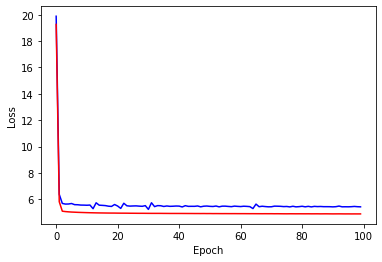

In [343]:
# '''
# # LSTM
# loss_list_lstm = []
# test_loss_list_lstm = []

# # DNN
# loss_list2 = []
# test_loss_list2 = []

# # Linear
# loss_list = []
# test_loss_list = []
# '''
# __test_loss_list_lstm = [n.item() for n in test_loss_list_lstm]
# __test_loss_list_lstm.insert(0, 3000)
# __test_loss_list_lstm.insert(250, 100)
# __test_loss_list_lstm.insert(400, 50)

# __loss_list_lstm = [n.item() for n in loss_list_lstm]
# __loss_list_lstm.insert(0, 3000)
# __loss_list_lstm.insert(250, 100)
# __loss_list_lstm.insert(400, 50)
# testx_train_loss = [i for i in range(int(len(__loss_list_lstm)/216))]
# testy_train_loss = [np.mean(__loss_list_lstm[i*216 : i*216 + 216]) for i in range(int(len(__loss_list_lstm)/216))]

# testx_test_loss = [i for i in range(int(len(__test_loss_list_lstm)/216))]
# testy_test_loss = [np.mean(__test_loss_list_lstm[i*216 : i*216 + 216]) for i in range(int(len(__test_loss_list_lstm)/216))]

# plt.xlabel('Epoch')
# plt.ylabel('Loss')

# plt.plot(testx_train_loss, testy_train_loss, 'b', label='Train Loss')
# plt.plot(testx_test_loss, testy_test_loss, 'r', label='Test Loss')
# plt.show()





In [215]:
# Loss List
losses_df = pd.DataFrame()

losses_df['lstm_loss'] = [n.item() for n in loss_list_lstm]
losses_df['lstm_loss_test'] = [n.item() for n in test_loss_list_lstm]

losses_df['dnn_loss'] = [n.item() for n in loss_list2]
losses_df['dnn_loss_test'] = [n.item() for n in test_loss_list2]

losses_df['linear_loss'] = [n.item() for n in loss_list]
losses_df['linear_loss_test'] = [n.item() for n in test_loss_list]


# RMSE List
rmse_df = pd.DataFrame()

rmse_df['loss_item'] = loss_item
rmse_df['std_item'] = std_item
rmse_df['loss_country'] = loss_country
rmse_df['std_country'] = std_country

rmse_df['loss_item_p'] = loss_item_p
rmse_df['std_item_p'] = std_item_p
rmse_df['loss_country_p'] = loss_country_p
rmse_df['std_country_p'] = std_country_p

rmse_df['line_loss_item'] = line_loss_item
rmse_df['line_loss_country'] = line_loss_country
rmse_df['line_loss_item_p'] = line_loss_item_p
rmse_df['line_loss_country_p'] = line_loss_country_p


losses_df.to_csv('loss_df.csv')
rmse_df.to_csv('rmse_df.csv')

In [213]:
rmse_df.head()

loss_item      std_item  loss_country   std_country  loss_item_p  \
0  1.891416e+07  3.034078e+06  1.836675e+07  1.802420e+06    10.408553   
1  1.879046e+07  3.021815e+06  1.769371e+07  1.705534e+06    10.551579   
2  1.952884e+07  3.143747e+06  1.909529e+07  1.879289e+06    10.441334   

   std_item_p  loss_country_p  std_country_p  \
0    1.620059       12.343509       1.193385   
1    1.628009       12.489227       1.198225   
2    1.635691       12.365380       1.201735   

                                      line_loss_item  \
0  [514701.8447798833, 6325903.042370487, 1055577...   
1  [404635.5949968126, 6304725.702643641, 1410427...   
2  [316930.12390018266, 6282304.675135649, 129644...   

                                   line_loss_country  \
0  [5800864.7036376055, 12796522.736753982, 91910...   
1  [5739815.21352498, 11043173.613153826, 9206715...   
2  [5688620.178700888, 11204758.398062363, 923578...   

                                    line_loss_item_p  \
0  [10.218318608929701, 8.47749639696686, 7.23543...   
1  [10.157548533520314, 8.868910053864237, 7.6546...   
2  [9.735720235113627, 8.59175805430675, 7.487953...   

                                 line_loss_country_p  
0  [7.2805017127377605, 5.849771049747143, 17.466...  
1  [7.262165466939955, 5.960494501952549, 17.5305...  
2  [7.265410220231385, 5.986537189210655, 17.4788...

In [ ]:
# # price
#     loss_item = []
#     std_item = []
#     loss_country = []
#     std_country = []

#     # percentage
#     loss_item_p = []
#     std_item_p = []
#     loss_country_p = []
#     std_country_p = []
    
#     # line
#     line_loss_item = []
#     line_loss_country = []
#     line_loss_item_p = []
#     line_loss_country_p = []

# Just load this

In [2]:
losses_df = pd.read_csv('loss_df.csv')
rmse_df = pd.read_csv('rmse_df.csv')

In [7]:
losses_df.head()

Unnamed: 0  lstm_loss  lstm_loss_test    dnn_loss  dnn_loss_test  \
0           0   3.459130        6.456592  118.793472      81.587814   
1           1   3.069941        6.452747  150.889740      80.939041   
2           2   5.135821        6.450008   21.326586      80.327080   
3           3   7.116714        6.447113   34.615696      79.808487   
4           4  12.209646        6.445052   88.371811      79.303139   

   linear_loss  linear_loss_test  
0   226.312836        318.236389  
1   366.867584        318.213806  
2   153.758698        318.191589  
3   318.510223        318.170746  
4   443.372314        318.149261

In [8]:
loss_list = losses_df['linear_loss'].values
test_loss_list = losses_df['linear_loss_test'].values

loss_list2 = losses_df['dnn_loss'].values
test_loss_list2 = losses_df['dnn_loss_test'].values

loss_list_lstm = losses_df['lstm_loss'].values
test_loss_list_lstm = losses_df['lstm_loss_test'].values



In [24]:
rmse_df.head()

Unnamed: 0     loss_item      std_item  loss_country   std_country  \
0           0  1.891416e+07  3.034078e+06  1.836675e+07  1.802420e+06   
1           1  1.879046e+07  3.021815e+06  1.769371e+07  1.705534e+06   
2           2  1.952884e+07  3.143747e+06  1.909529e+07  1.879289e+06   

   loss_item_p  std_item_p  loss_country_p  std_country_p  \
0    10.408553    1.620059       12.343509       1.193385   
1    10.551579    1.628009       12.489227       1.198225   
2    10.441334    1.635691       12.365380       1.201735   

                                      line_loss_item  \
0  [514701.8447798833, 6325903.042370487, 1055577...   
1  [404635.5949968126, 6304725.702643641, 1410427...   
2  [316930.12390018266, 6282304.675135649, 129644...   

                                   line_loss_country  \
0  [5800864.7036376055, 12796522.736753982, 91910...   
1  [5739815.21352498, 11043173.613153826, 9206715...   
2  [5688620.178700888, 11204758.398062363, 923578...   

                                    line_loss_item_p  \
0  [10.218318608929701, 8.47749639696686, 7.23543...   
1  [10.157548533520314, 8.868910053864237, 7.6546...   
2  [9.735720235113627, 8.59175805430675, 7.487953...   

                                 line_loss_country_p  
0  [7.2805017127377605, 5.849771049747143, 17.466...  
1  [7.262165466939955, 5.960494501952549, 17.5305...  
2  [7.265410220231385, 5.986537189210655, 17.4788...

In [62]:
loss_item = rmse_df['loss_item'].values
std_item = rmse_df['std_item'].values
loss_country = rmse_df['loss_country'].values
std_country = rmse_df['std_country'].values

# percentage
loss_item_p = rmse_df['loss_item_p'].values
std_item_p = rmse_df['std_item_p'].values
loss_country_p = rmse_df['loss_country_p'].values
std_country_p = rmse_df['std_country_p'].values

# line
line_loss_item = []
line_loss_item.append(list(map(float, rmse_df['line_loss_item'].values.tolist()[0])))
line_loss_item.append(list(map(float, rmse_df['line_loss_item'].values.tolist()[1])))
line_loss_item.append(list(map(float, rmse_df['line_loss_item'].values.tolist()[2])))

line_loss_country = []
line_loss_country.append(list(map(float, rmse_df['line_loss_country'].values.tolist()[0])))
line_loss_country.append(list(map(float, rmse_df['line_loss_country'].values.tolist()[1])))
line_loss_country.append(list(map(float, rmse_df['line_loss_country'].values.tolist()[2])))

line_loss_item_p = []
line_loss_item_p.append(list(map(float, rmse_df['line_loss_item_p'].values.tolist()[0])))
line_loss_item_p.append(list(map(float, rmse_df['line_loss_item_p'].values.tolist()[1])))
line_loss_item_p.append(list(map(float, rmse_df['line_loss_item_p'].values.tolist()[2])))

line_loss_country_p = []
line_loss_country_p.append(list(map(float, rmse_df['line_loss_country_p'].values.tolist()[0])))
line_loss_country_p.append(list(map(float, rmse_df['line_loss_country_p'].values.tolist()[1])))
line_loss_country_p.append(list(map(float, rmse_df['line_loss_country_p'].values.tolist()[2])))

In [64]:
line_loss_item

[[514701.8447798833,
  6325903.042370487,
  1055577.936067471,
  753182.8526827369,
  706303.1951253192,
  1809226.3845294837,
  996250.484689427,
  1806940.5911363985,
  3692345.10828302,
  3926464.625464662,
  2165695.1191189317,
  228043.33790582232,
  1008447.9629398435,
  310195.9615492433,
  8935403.286514038,
  5818577.608993884,
  5510917.9786334615,
  1597295.3370433853,
  4860462.894333412,
  28319028.984518662,
  4617093.7789341705,
  2992750.6460583317,
  1714988.230745387,
  1971475.3877678234,
  1014220.861040255,
  3581159.5497071664,
  886135.5207782902,
  1205481.1369884815,
  5111674.357403448,
  46431314.45834363,
  33962981.97907549,
  36968664.3198305,
  53630835.05260602,
  25489072.915615756,
  22343537.26950852,
  13825097.421023035,
  10200902.421767551,
  542246.4354936156,
  1036709.5233733382,
  24391080.843428105,
  10909180.307738373,
  15697214.71408281,
  8756673.127104452,
  8633416.69349042,
  18044966.905722983,
  58248376.17318761,
  66652070.6795489

# Load from CSV

In [9]:

_loss_list = [n.item() for n in loss_list]
_test_loss_list = [n.item() for n in test_loss_list]
_test_loss_list2 = [n.item() for n in test_loss_list2]
_loss_list2 = [n.item() for n in loss_list2]
_test_loss_list_lstm = [n.item() for n in test_loss_list_lstm]
_loss_list_lstm = [n.item() for n in loss_list_lstm]


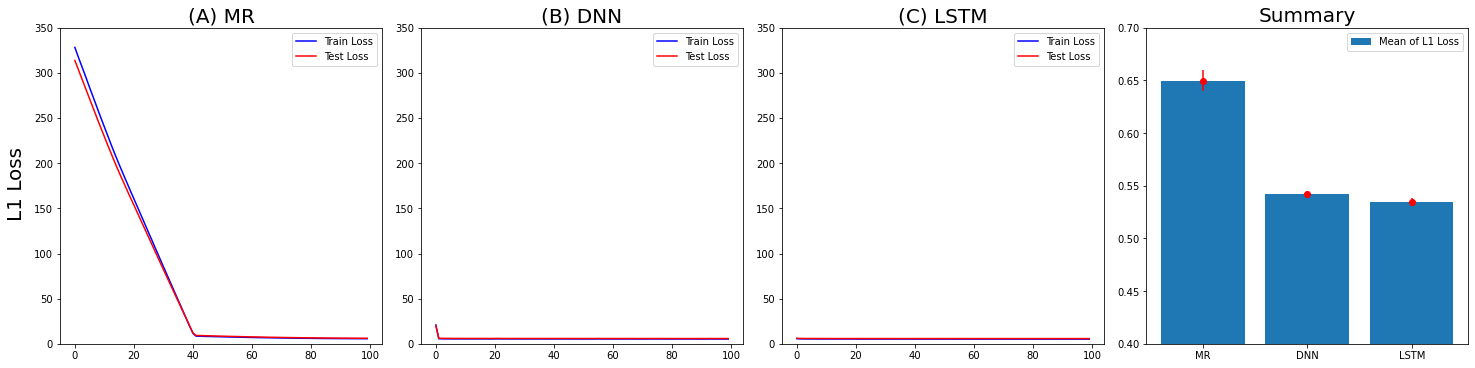

MR : 0.6497762985665491/0.009809801656527957
DNN : 0.5421941584286591/0.0031522819256811106
LSTM : 0.5345544558915275/0.0035782382566438152


In [19]:
'''
# LSTM
loss_list_lstm = []
test_loss_list_lstm = []

# DNN
loss_list2 = []
test_loss_list2 = []

# Linear
loss_list = []
test_loss_list = []


_loss_list = [n.item() for n in loss_list]
_test_loss_list = [n.item() for n in test_loss_list]
_test_loss_list2 = [n.item() for n in test_loss_list2]
_loss_list2 = [n.item() for n in loss_list2]
_test_loss_list_lstm = [n.item() for n in test_loss_list_lstm]
_loss_list_lstm = [n.item() for n in loss_list_lstm]

'''

y_limit = (0, 350)


import seaborn as sns
TERM = 432

# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(1,4, squeeze=True, constrained_layout=True, figsize=(20,5))


# MultiVariable Linear regression
x_train_loss = [i for i in range(int(len(_loss_list)/TERM))]
y_train_loss = [np.mean(_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list)/TERM))]
x_test_loss = [i for i in range(int(len(_test_loss_list)/TERM))]
y_test_loss = [np.mean(_test_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list)/TERM))]
ax[0].set_ylim(y_limit)
ax[0].plot(x_train_loss, y_train_loss, 'b', label='Train Loss')
ax[0].plot(x_test_loss, y_test_loss, 'r', label='Test Loss')
ax[0].set_title('(A) MR', fontsize=20)
ax[0].legend()

# Deep Neural Network
x_train_loss = [i for i in range(int(len(_loss_list2)/TERM))]
y_train_loss = [np.mean(_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list2)/TERM))]
x_test_loss = [i for i in range(int(len(_test_loss_list2)/TERM))]
y_test_loss = [np.mean(_test_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list2)/TERM))]
ax[1].set_ylim(y_limit)
ax[1].plot(x_train_loss, y_train_loss, 'b', label='Train Loss')
ax[1].plot(x_test_loss, y_test_loss, 'r', label='Test Loss')
ax[1].set_title('(B) DNN', fontsize=20)
ax[1].legend()

# LSTM
x_train_loss = [i for i in range(int(len(_loss_list_lstm)/TERM))]
y_train_loss = [np.mean(_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list_lstm)/TERM))]
x_test_loss = [i for i in range(int(len(_test_loss_list_lstm)/TERM))]
y_test_loss = [np.mean(_test_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list_lstm)/TERM))]
ax[2].set_ylim(y_limit)
ax[2].plot(x_train_loss, y_train_loss, 'b', label='Train Loss')
ax[2].plot(x_test_loss, y_test_loss, 'r', label='Test Loss')
# ax[2].set_ylim([0,80])
ax[2].set_title('(C) LSTM', fontsize=20)
ax[2].legend()

# SUMMARY
COUNT = 40
MR_info_train = np.array([np.mean(_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list)/TERM))])
MR_info_test = np.array([np.mean(_test_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list)/TERM))])
MR_info = np.abs(MR_info_train - MR_info_test)[40:COUNT+40]

DNN_info_train = np.array([np.mean(_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list2)/TERM))])
DNN_info_test = np.array([np.mean(_test_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list2)/TERM))])
DNN_info = np.abs(DNN_info_train - DNN_info_test)[:COUNT]

LSTM_info_train = np.array([np.mean(_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list_lstm)/TERM))])
LSTM_info_test = np.array([np.mean(_test_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list_lstm)/TERM))])
LSTM_info = np.abs(LSTM_info_train - LSTM_info_test)[:COUNT]


MR_loss_mean = np.mean(MR_info)
MR_loss_std = np.std(MR_info) / np.sqrt(len(MR_info))

DNN_loss_mean = np.mean(DNN_info)
DNN_loss_std = np.std(DNN_info) / np.sqrt(len(DNN_info))

LSTM_loss_mean = np.mean(LSTM_info)
LSTM_loss_std = np.std(LSTM_info) / np.sqrt(len(LSTM_info))

summary_x = ['MR', 'DNN', 'LSTM']
summary_y = [MR_loss_mean, DNN_loss_mean, LSTM_loss_mean]
summary_err = [MR_loss_std, DNN_loss_std, LSTM_loss_std]

colors = sns.color_palette('hls', len(summary_x))
ax[3].bar(summary_x, summary_y, label = 'Mean of L1 Loss')
ax[3].errorbar(summary_x, summary_y, yerr=summary_err, color='r', fmt='o')
ax[3].set_title('Summary', fontsize=20)
ax[3].margins(y=0.12)
ax[3].set_ylim(0.4, 0.7)
ax[3].legend(loc='upper right')




fig.text(-0.01, 0.5, 'L1 Loss', ha='center', va='center', rotation='vertical', fontsize=20)
# fig.text(0.5, -0.03, 'Models', ha='center', va='center')
plt.show()

print("MR : {}/{}\nDNN : {}/{}\nLSTM : {}/{}".format(MR_loss_mean,MR_loss_std,DNN_loss_mean,DNN_loss_std,LSTM_loss_mean,LSTM_loss_std))

# pic-3 incre version

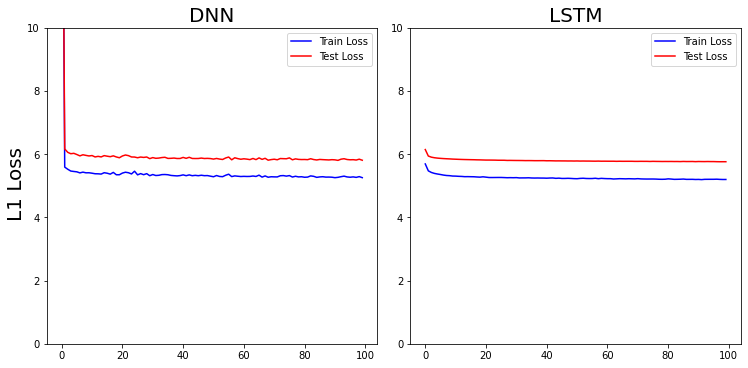

RES :  Ttest_indResult(statistic=-1095.9591376566211, pvalue=4.376671788432687e-165)


In [23]:
y_limit = (0, 10)

import seaborn as sns
import scipy.stats

# cnt = 0
# item_list = sorted(tmp_all.iloc[:,16].unique())
# for item_number in item_list:
#     item_df = tmp_all[tmp_all.iloc[:, 16] == item_number]
    
#     ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
#     pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
#     p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue
    
#     diff = np.mean(np.abs(ground_truth - pred))
#     if p_val < 0.05:
#         cnt+=1
    
#     #print("{} Item : {}".format(item_number, diff))
#     #print("p-value : {}\n".format(p_val))
# print("\nRESULT : ", cnt, " / ", len(item_list))


TERM = 432

# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(1,2, squeeze=True, constrained_layout=True, figsize=(10,5))


# MultiVariable Linear regression
# x_train_loss = [i for i in range(int(len(_loss_list)/TERM))]
# y_train_loss = [np.mean(_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list)/TERM))]
# x_test_loss = [i for i in range(int(len(_test_loss_list)/TERM))]
# y_test_loss = [np.mean(_test_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list)/TERM))]
# ax[0].set_ylim(y_limit)
# ax[0].plot(x_train_loss, y_train_loss, 'b', label='Train Loss')
# ax[0].plot(x_test_loss, y_test_loss, 'r', label='Test Loss')
# ax[0].set_title('MR')
# ax[0].legend()

# Deep Neural Network
x_train_loss = [i for i in range(int(len(_loss_list2)/TERM))]
y_train_loss = [np.mean(_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list2)/TERM))]
x_test_loss = [i for i in range(int(len(_test_loss_list2)/TERM))]
y_test_loss = [np.mean(_test_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list2)/TERM))]
ax[0].set_ylim(y_limit)
ax[0].plot(x_train_loss, y_train_loss, 'b', label='Train Loss')
ax[0].plot(x_test_loss, y_test_loss, 'r', label='Test Loss')
ax[0].set_title('DNN', fontsize=20)
ax[0].legend()

# LSTM
x_train_loss = [i for i in range(int(len(_loss_list_lstm)/TERM))]
y_train_loss = [np.mean(_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list_lstm)/TERM))]
x_test_loss = [i for i in range(int(len(_test_loss_list_lstm)/TERM))]
y_test_loss = [np.mean(_test_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list_lstm)/TERM))]
ax[1].set_ylim(y_limit)
ax[1].plot(x_train_loss, y_train_loss, 'b', label='Train Loss')
ax[1].plot(x_test_loss, y_test_loss, 'r', label='Test Loss')
# ax[2].set_ylim([0,80])
ax[1].set_title('LSTM', fontsize=20)
ax[1].legend()

# t-test
S_ = 10
COUNT = S_ + 40
# MR_info_train = np.array([np.mean(_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list)/TERM))])
# MR_info_test = np.array([np.mean(_test_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list)/TERM))])
# # MR_info = np.abs(MR_info_train - MR_info_test)[40 + 10:COUNT+40]
# MR_ttest = scipy.stats.ttest_ind(MR_info_train[40 + 10 : COUNT+40], MR_info_test[40 + 10 : COUNT+40], equal_var=False).pvalue

DNN_info_train = np.array([np.mean(_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list2)/TERM))])
DNN_info_test = np.array([np.mean(_test_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list2)/TERM))])
# DNN_info = np.abs(DNN_info_train - DNN_info_test)[10:COUNT]
# DNN_ttest = scipy.stats.ttest_rel(DNN_info_train[S_: COUNT], DNN_info_test[S_: COUNT], alternative='two-sided').pvalue
# DNN_ttest = scipy.stats.ttest_ind(DNN_info_train[S_: COUNT], DNN_info_test[S_: COUNT], alternative='two-sided').pvalue
DNN_GC = np.abs(DNN_info_train[S_: COUNT] - DNN_info_test[S_: COUNT])

LSTM_info_train = np.array([np.mean(_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list_lstm)/TERM))])
LSTM_info_test = np.array([np.mean(_test_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list_lstm)/TERM))])
# LSTM_info = np.abs(LSTM_info_train - LSTM_info_test)[10:COUNT]
# LSTM_ttest = scipy.stats.ttest_rel(LSTM_info_train[S_: COUNT], LSTM_info_test[S_: COUNT], alternative='two-sided').pvalue
# LSTM_ttest = scipy.stats.ttest_ind(LSTM_info_train[S_: COUNT], LSTM_info_test[S_: COUNT], alternative='two-sided').pvalue
LSTM_GC = np.abs(LSTM_info_train[S_: COUNT], LSTM_info_test[S_: COUNT])


D_L_ttest = scipy.stats.ttest_ind(DNN_GC, LSTM_GC, alternative='two-sided')

# MR_loss_mean = np.mean(MR_info)
# MR_loss_std = np.std(MR_info) / np.sqrt(len(MR_info))

# DNN_loss_mean = np.mean(DNN_info)
# DNN_loss_std = np.std(DNN_info) / np.sqrt(len(DNN_info))

# LSTM_loss_mean = np.mean(LSTM_info)
# LSTM_loss_std = np.std(LSTM_info) / np.sqrt(len(LSTM_info))

# # summary_x = ['MR', 'DNN', 'LSTM']
# # summary_y = [MR_loss_mean, DNN_loss_mean, LSTM_loss_mean]
# # summary_err = [MR_loss_std, DNN_loss_std, LSTM_loss_std]
# ttest_x = ['DNN', 'LSTM']
# ttest_y = [DNN_ttest, LSTM_ttest]

# colors = sns.color_palette('hls', len(summary_x))
# # ax[3].bar(summary_x, summary_y, label = 'Mean of L1 Loss')
# ax[2].errorbar(ttest_x, ttest_y, label = 'p-value', fmt='o', color='b')
# ax[2].plot(ttest_x, ttest_y, color='b')
# # ax[3].errorbar(summary_x, summary_y, yerr=summary_err, color='r', fmt='o' ,label='SEM')
# ax[2].set_title('t-test')
# # ax[3].margins(y=0.12)
# # ax[3].set_ylim(0.4, 0.7)
# ax[2].legend(loc='upper right')


fig.text(-0.01, 0.5, 'L1 Loss', ha='center', va='center', rotation='vertical', fontsize=20)
# fig.text(0.5, -0.03, 'Models', ha='center', va='center')
plt.show()

print("RES : ", D_L_ttest)
# print("DNN : {}\nLSTM : {}".format(DNN_ttest, LSTM_ttest))
# print("MR : {}/{}\nDNN : {}/{}\nLSTM : {}/{}".format(MR_loss_mean,MR_loss_std,DNN_loss_mean,DNN_loss_std,LSTM_loss_mean,LSTM_loss_std))

In [107]:
rand1 = np.random.randn(1000)+0.1
rand2 = np.random.randn(1000)

In [108]:
scipy.stats.ttest_ind(rand1, rand2, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=2.419084454774868, pvalue=0.015648434042354747)

In [110]:
LSTM_info_train

array([5.69142724, 5.47333288, 5.42266581, 5.39251282, 5.37326127,
       5.3573202 , 5.33907866, 5.32613945, 5.32050466, 5.3086201 ,
       5.30631821, 5.30006732, 5.29646543, 5.28870986, 5.29008029,
       5.28776014, 5.28602314, 5.27896435, 5.27402109, 5.28458782,
       5.27365241, 5.26211556, 5.26198329, 5.26272747, 5.2636184 ,
       5.26366299, 5.26004175, 5.2556051 , 5.25806949, 5.25580951,
       5.25882717, 5.24895452, 5.24996723, 5.25035124, 5.25345385,
       5.24749552, 5.24523724, 5.24713431, 5.24484485, 5.2442754 ,
       5.24072166, 5.24600535, 5.24797831, 5.23613958, 5.24217936,
       5.2328254 , 5.23317234, 5.23710664, 5.232875  , 5.22689806,
       5.22457577, 5.23442045, 5.23875042, 5.23134185, 5.22946398,
       5.23038996, 5.23842288, 5.22526813, 5.23553792, 5.22938391,
       5.22570838, 5.22538529, 5.21534408, 5.21986393, 5.22517104,
       5.22289071, 5.21990108, 5.22429389, 5.22148489, 5.2185486 ,
       5.22586209, 5.2179998 , 5.21521867, 5.21394671, 5.21449

In [111]:
LSTM_info_test

array([6.14697137, 5.94202019, 5.90638981, 5.88824038, 5.87636208,
       5.86788173, 5.8612421 , 5.85590437, 5.8511386 , 5.8452182 ,
       5.84138268, 5.83724579, 5.83382071, 5.83087481, 5.82887684,
       5.82645422, 5.82477844, 5.82156395, 5.82001533, 5.81705599,
       5.81425577, 5.81420235, 5.81332743, 5.81206124, 5.80883966,
       5.80844939, 5.80805485, 5.80285645, 5.80399905, 5.80235121,
       5.80113145, 5.80060859, 5.79963422, 5.79715798, 5.79793414,
       5.79735204, 5.79524194, 5.79503605, 5.79586372, 5.7960711 ,
       5.79188391, 5.79303082, 5.79078696, 5.78801657, 5.78876932,
       5.78755524, 5.78711307, 5.78539406, 5.78601147, 5.7839529 ,
       5.7859157 , 5.78266566, 5.78408268, 5.78243818, 5.78249282,
       5.78041272, 5.7791892 , 5.78175327, 5.77828147, 5.77904793,
       5.77798206, 5.77770585, 5.77779494, 5.77457662, 5.77697122,
       5.77524366, 5.77559528, 5.77581877, 5.77574083, 5.77307953,
       5.77296053, 5.77463382, 5.77363587, 5.77370587, 5.77052

In [112]:
scipy.stats.ttest_ind(LSTM_info_train, LSTM_info_test, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=-67.01622590342261, pvalue=4.9390352362497367e-138)

In [ ]:
'''
# LSTM
loss_list_lstm = []
test_loss_list_lstm = []

# DNN
loss_list2 = []
test_loss_list2 = []

# Linear
loss_list = []
test_loss_list = []
'''
##################### BACKUP #################
fig, ax = plt.subplots(1,3, squeeze=True, constrained_layout=True)
    
x_train_loss = [i for i in range(int(len(_loss_list)/216))]
y_train_loss = [np.mean(_loss_list[i*216 : i*216 + 216]) for i in range(int(len(_loss_list)/216))]
x_test_loss = [i for i in range(int(len(_test_loss_list)/216))]
y_test_loss = [np.mean(_test_loss_list[i*216 : i*216 + 216]) for i in range(int(len(_test_loss_list)/216))]
ax[0][0].plot(x_train_loss, y_train_loss, 'blue', label='Train Loss')
ax[0][0].plot(x_test_loss, y_test_loss, 'blue', label='Train Loss')
ax[0][0].set_title('Price per Item')
ax[0][0].legend()

x = [i for i in range(1, len(line_loss_country[0])+1)]
ax[0][1].plot(x, line_loss_country[0], 'b', label='MR')
ax[0][1].plot(x, line_loss_country[1], 'r', label='DNN')
ax[0][1].plot(x, line_loss_country[2], 'g', label='LSTM')
ax[0][1].set_title('Price per Country')
ax[0][1].legend()

x = [i for i in range(1, len(line_loss_item_p[0])+1)]
ax[1][0].plot(x, line_loss_item_p[0], 'b', label='MR')
ax[1][0].plot(x, line_loss_item_p[1], 'r', label='DNN')
ax[1][0].plot(x, line_loss_item_p[2], 'g', label='LSTM')
ax[1][0].set_title('Inc/Dec Rate per Item')
ax[1][0].legend()

x = [i for i in range(1, len(line_loss_country_p[0])+1)]
ax[1][1].plot(x, line_loss_country_p[0], 'b', label='MR')
ax[1][1].plot(x, line_loss_country_p[1], 'r', label='DNN')
ax[1][1].plot(x, line_loss_country_p[2], 'g', label='LSTM')
ax[1][1].set_title('Inc/Dec Rate per Country')
ax[1][1].legend()

fig.text(-0.03, 0.5, 'RMSE / SEM', ha='center', va='center', rotation='vertical')
fig.text(0.5, -0.03, 'Models', ha='center', va='center')
plt.show()

In [ ]:
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
# model = nn.Linear(x_train.shape[1], 1).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
# n_epochs = 100
# loss_list = []
# test_loss_list = []
# for epoch in range(n_epochs):
#     for batch_idx, samples in enumerate(dataloader):
#         x_t, y_t = samples
        
#         pred = model(x_t)
#         cost = F.l1_loss(pred, y_t)
# #         cost = F.l1_loss(y_train, pred)
#         loss_list.append(cost)
#         with torch.no_grad():
#             pred_y = model(x_test)
#             test_loss_list.append(torch.mean(torch.abs(pred_y - y_test)))
#         optimizer.zero_grad()
#         cost.backward()
#         optimizer.step()
#         print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

# train Fin

# L1 case Start

In [ ]:
torch.set_printoptions(sci_mode=False)

In [ ]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1.pth"))
deepmodel.eval()

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
pred_y.shape

In [ ]:
y_test = y_test.reshape(-1,1)
y_test

In [ ]:
pred_y.mean()

In [ ]:
torch.mean(torch.abs(pred_y - y_test))

# test Field

In [ ]:
# DNN
pred_y = deepmodel(x_test)


# LSTM
# x_te = x_test.reshape(-1, 1, input_size)
# pred_y = deepmodel(x_te)

_data_len = len(y_test)
plt.figure(figsize=(20,10))

plot_list = [idx for idx in range(_data_len) if abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx]) <= 10 or True]

# plot_list = []
# for idx in range(_data_len):
#     fix = abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx])
#     if fix<= 10:
#         plot_list.append(idx)
#     else:
#         pass
data_len = len(plot_list)
# print(plot_list)
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'ro', label='Real')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'bx', label='Pred')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'r', label='Real_line')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'b', label='Pred_line')

height = 60#max(y_test.cpu().detach().numpy())
plt.axis([0, data_len, 0, height])
plt.legend()


# item - rmse

In [134]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
tmp.info()


def RMSELoss(yhat,y):
    return np.sqrt(np.mean((yhat-y)**2)), np.std(yhat-y)/np.sqrt(len(y))

# Item - RMSE
import scipy.stats
rmse_list = []
std_list = []

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
#     print(np.abs(ground_truth - pred).mean())
    diff = np.abs(ground_truth - pred).std()
#     rmse, std = RMSELoss(ground_truth, pred)
    rmse = np.abs(ground_truth - pred).mean()
    std = diff/np.sqrt(len(ground_truth))
    rmse_list.append(rmse)
    std_list.append(std)
    
    
# Country - RMSE
rmse_list = []
std_list = []

cnt = 0
item_list = sorted(tmp.iloc[:,2].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 2] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    
    rmse, std = RMSELoss(ground_truth, pred)
#     rmse = np.abs(ground_truth - pred).mean()
#     std = diff/np.sqrt(len(ground_truth))
    rmse_list.append(rmse)
    std_list.append(std)
    
np.mean(rmse_list), np.mean(std_list)

In [137]:
np.mean(rmse_list), np.mean(std_list)

(17341233.68903371, 2805527.2864402034)

# country - rmse

In [138]:
# def RMSELoss(yhat,y):
#     return np.sqrt(np.mean((yhat-y)**2)), np.std(yhat-y)/np.sqrt(len(y))

# import scipy.stats
# rmse_list = []
# std_list = []

# cnt = 0
# item_list = sorted(tmp.iloc[:,2].unique()) # unique - item
# for item_number in item_list:
#     item_df = tmp[tmp.iloc[:, 2] == item_number]
    
#     ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
#     pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    
#     rmse, std = RMSELoss(ground_truth, pred)
# #     rmse = np.abs(ground_truth - pred).mean()
# #     std = diff/np.sqrt(len(ground_truth))
#     rmse_list.append(rmse)
#     std_list.append(std)

In [139]:
# np.mean(rmse_list), np.mean(std_list)

(16473570.884384235, 1630854.400354215)

# ITEM t-test start

In [98]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
# tmp.head()
# tmp.iloc[:,16].unique()
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 16908 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 3454 non-null   int64  
 1   HSCD                     3454 non-null   int64  
 2   COUNTRYCD                3454 non-null   int64  
 3   COUNTRYNM                3454 non-null   object 
 4   TRADE_COUNTRYCD          3454 non-null   float64
 5   TRADE_HSCD               3454 non-null   float64
 6   TARIFF_AVG               3454 non-null   float64
 7   SNDIST                   3454 non-null   float64
 8   NY_GDP_MKTP_CD           3454 non-null   float64
 9   NY_GDP_MKTP_CD_1Y        3454 non-null   float64
 10  SP_POP_TOTL              3454 non-null   float64
 11  PA_NUS_FCRF              3454 non-null   float64
 12  IC_BUS_EASE_DFRN_DB      3454 non-null   float64
 13  KMDIST                   3454 non-null   float64
 14  TRADE_HSCD_COUNTRYC

In [28]:
import scipy.stats

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique())
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue
    
    print('countrys : ', item_df['COUNTRYNM'].unique())
    
    diff = np.mean(np.abs(ground_truth - pred))
    if p_val < 0.05:
        cnt+=1
    
    print("{} Item : {}".format(item_number, diff))
    print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))

countrys :  ['Algeria' 'Australia' 'Brazil' 'Canada' 'Sri Lanka' 'Chile' 'China'
 'Czechia' 'China, Hong Kong SAR' 'Indonesia' 'Japan' 'Kazakhstan'
 'Kuwait' 'Malaysia' 'Mexico' 'Mongolia' 'New Zealand' 'Norway' 'Peru'
 'Philippines' 'Poland' 'Russian Federation' 'Saudi Arabia' 'India'
 'Singapore' 'Viet Nam' 'South Africa' 'Switzerland'
 'United Arab Emirates' 'Turkey' 'Egypt' 'United Kingdom' 'USA']
820210 Item : 206265.76234132834
p-value : 0.14544764486160602

countrys :  ['Algeria' 'Australia' 'Brazil' 'Myanmar' 'Canada' 'Sri Lanka' 'Chile'
 'China' 'Czechia' 'China, Hong Kong SAR' 'Indonesia' 'Iran' 'Japan'
 'Kuwait' 'Malaysia' 'Mexico' 'Mongolia' 'New Zealand' 'Norway' 'Peru'
 'Philippines' 'Poland' 'Russian Federation' 'Saudi Arabia' 'India'
 'Singapore' 'Viet Nam' 'South Africa' 'Switzerland'
 'United Arab Emirates' 'Turkey' 'Egypt' 'United Kingdom' 'USA']
820239 Item : 1379665.8074444428
p-value : 0.2618282524365308

countrys :  ['Algeria' 'Australia' 'Brazil' 'Canada' 'Chile

# normal - t-test FIN

---
# t-test | train + test data

In [29]:
t = torch.cat([x_train, x_test])
if CASE == 'LSTM':
    # LSTM
    t = t.reshape(-1, 1, input_size)
    pred_y = deepmodel(t)
    
else:
    # DNN & Linear Regression
    pred_y = deepmodel(t)

tmp_all = copy_df.copy()
tmp_all['pred'] = pred_y.detach().cpu().numpy()
# tmp.head()
# tmp.iloc[:,16].unique()
tmp_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17269 entries, 0 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 17269 non-null  int64  
 1   HSCD                     17269 non-null  int64  
 2   COUNTRYCD                17269 non-null  int64  
 3   COUNTRYNM                17269 non-null  object 
 4   TRADE_COUNTRYCD          17269 non-null  float64
 5   TRADE_HSCD               17269 non-null  float64
 6   TARIFF_AVG               17269 non-null  float64
 7   SNDIST                   17269 non-null  float64
 8   NY_GDP_MKTP_CD           17269 non-null  float64
 9   NY_GDP_MKTP_CD_1Y        17269 non-null  float64
 10  SP_POP_TOTL              17269 non-null  float64
 11  PA_NUS_FCRF              17269 non-null  float64
 12  IC_BUS_EASE_DFRN_DB      17269 non-null  float64
 13  KMDIST                   17269 non-null  float64
 14  TRADE_HSCD_COUNTRYCD  

In [30]:
import scipy.stats

cnt = 0
item_list = sorted(tmp_all.iloc[:,16].unique())
for item_number in item_list:
    item_df = tmp_all[tmp_all.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue
    
    diff = np.mean(np.abs(ground_truth - pred))
    if p_val < 0.05:
        cnt+=1
    
    #print("{} Item : {}".format(item_number, diff))
    #print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))


RESULT :  38  /  497


# train + test Data - t-test FIN

# item - country : not matching

In [124]:
item_list = sorted(tmp_all.iloc[:,16].unique())


for item in item_list:
    _item_df = tmp_all[tmp_all.iloc[:, 16] == item]
    
    if _item_df.shape[0] != len(_item_df['COUNTRYCD'].unique()):
        print("x")
#     if _item_df.shape[0] != 35:
#         print('ITEM : ', item, "NUm : ", _item_df.shape[0])
#     if _item_df.shape[0] > 35:
#         print(sorted(_item_df['COUNTRYNM']))


In [113]:
len(sorted(_item_df['COUNTRYCD'].unique()))

35

In [114]:
_item_df[_item_df['COUNTRYCD'] == 5]

UNC_YEAR  HSCD  COUNTRYCD COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
6      2017     1          5    Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG     SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  ...  \
6         0.0  79.117838    1.649880e+12       1.528240e+12  ...   

   IC_BUS_EASE_DFRN_DB      KMDIST  TRADE_HSCD_COUNTRYCD  \
6             79.54094  106.177031          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  item_total_percent  item_world_percent  \
6                  7273171  190590            0.257627            5.718352   

   gdp_percent  next_year_percent      pred  
6   107.959483           0.652893  1.245726  

[1 rows x 22 columns]

In [ ]:
import scipy.stats

cnt = 0
item_list = sorted(tmp_all.iloc[:,16].unique())
for item_number in item_list:
    _item_df = tmp_all[tmp_all.iloc[:, 16] == item_number]
    
    country_list = sorted(_item_df['COUNTRYCD'].unique())
    for country in country_list:
        item_df = _item_df[_item_df['COUNTRYCD'] == country]
        
        ground_truth = item_df['next_year_percent']
        pred = item_df['pred']
        p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue

        diff = np.mean(np.abs(ground_truth - pred))
        if p_val < 0.05:
            cnt+=1
    
#     print("{} Item : {}".format(item_number, diff))
#     print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))

In [95]:
tmp.head()

UNC_YEAR  HSCD  COUNTRYCD   COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
16908      2017   399         13        Iran     5.161228e+10  6.404620e+10   
16910      2017   399         14       Japan     6.714740e+11  6.404620e+10   
16911      2017   399         15  Kazakhstan     2.934591e+10  6.404620e+10   
16912      2017   399         36      Kuwait     3.356833e+10  6.404620e+10   
16913      2017   399         16    Malaysia     1.947200e+11  6.404620e+10   

       TARIFF_AVG     SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  ...  \
16908        12.0  40.939509    4.453450e+11       4.179840e+11  ...   
16910         0.0  78.954807    4.866860e+12       4.922540e+12  ...   
16911         0.0  50.550694    1.668060e+11       1.372780e+11  ...   
16912         0.0  53.642850    1.207070e+11       1.094200e+11  ...   
16913         0.0  74.398315    3.191120e+11       3.012550e+11  ...   

       IC_BUS_EASE_DFRN_DB     KMDIST  TRADE_HSCD_COUNTRYCD  \
16908            55.707860  65.624482          6.592452e+07   
16910            78.020697  11.566696          3.942546e+09   
16911            74.848790  42.277720          4.830666e+07   
16912            59.969240  71.810249          1.047815e+08   
16913            78.272910  46.140674          2.689531e+08   

       KR_TRADE_HSCD_COUNTRYCD   _HSCD  item_total_percent  \
16908                      300  847150            0.127730   
16910                  6534855  847150            0.587148   
16911                    25746  847150            0.164611   
16912                    99868  847150            0.312144   
16913                   489257  847150            0.138123   

       item_world_percent  gdp_percent  next_year_percent      pred  
16908            0.102933   106.545944           0.000455  4.674330  
16910            6.155785    98.868877           0.165752  4.171092  
16911            0.075425   121.509637           0.053297  0.742438  
16912            0.163603   110.315299           0.095311  2.073210  
16913            0.419936   105.927536           0.181912  1.542309  

[5 rows x 22 columns]

In [96]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 16908 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 3454 non-null   int64  
 1   HSCD                     3454 non-null   int64  
 2   COUNTRYCD                3454 non-null   int64  
 3   COUNTRYNM                3454 non-null   object 
 4   TRADE_COUNTRYCD          3454 non-null   float64
 5   TRADE_HSCD               3454 non-null   float64
 6   TARIFF_AVG               3454 non-null   float64
 7   SNDIST                   3454 non-null   float64
 8   NY_GDP_MKTP_CD           3454 non-null   float64
 9   NY_GDP_MKTP_CD_1Y        3454 non-null   float64
 10  SP_POP_TOTL              3454 non-null   float64
 11  PA_NUS_FCRF              3454 non-null   float64
 12  IC_BUS_EASE_DFRN_DB      3454 non-null   float64
 13  KMDIST                   3454 non-null   float64
 14  TRADE_HSCD_COUNTRYC

# pred & ground truth - comp // SAMPLE

In [32]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp.iloc[:,16]

16908    847150
16910    847150
16911    847150
16912    847150
16913    847150
          ...  
21098    820210
21099    820210
21100    820210
21101    820210
21102    820210
Name: _HSCD, Length: 3454, dtype: int64

In [ ]:
tmp = copy_df.iloc[tr+te:,:].copy()
# 3, 14, 15, 16
arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next
arr = sorted(arr, key=lambda x : abs(x[0] - x[1]))

In [ ]:
arr[:10]

In [ ]:
arr[-10:]

In [ ]:
copy_df.iloc[tr+te:,14:16]

In [ ]:
# arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next

res_df = pd.DataFrame()

In [ ]:
res_df['percentage - Ground Truth'] = [item[0] for item in arr]
res_df['percentage - Prediction'] = [item[1] for item in arr]
res_df['Diff - Ground Truth & Prediction'] = [item[2] for item in arr]
res_df['previous - trade price'] = [item[3] for item in arr]
res_df['next - trade price'] = [item[4] for item in arr]
res_df['Country'] = [item[5] for item in arr]
res_df['Item Code'] = [item[6] for item in arr]

In [ ]:
res_df[:].to_csv('./pred_result.csv')

In [ ]:
res_df.head()

In [ ]:
pd.concat([res_df.iloc[:10, :], res_df.iloc[-10:, :]]).to_csv('./sortedResult.csv')

In [ ]:
res_df.iloc[:10, :]

In [ ]:
res_df.iloc[-10:, :]

In [ ]:
copy_df.head()

# test Field

In [ ]:
diff_list = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]

In [ ]:
diff_list = np.array(diff_list)

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#plt.figure(figsize=(40,5))
#plt.plot(np.arange(4143), [x.item() - y.item() for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
#plt.plot(np.arange(4143), [x.item() for x in ])

In [ ]:
#gt = [y.item() for y in y_test.reshape(-1)]
#pred = [y.item() for y in pred_y.reshape(-1)]
#plt.figure(figsize=(40,5))
#plt.scatter(gt, pred)

In [ ]:
#r = np.corrcoef(gt, pred)
#print (r)

#import scipy.stats as stat
#stat.pearsonr(gt, pred)
#res = stat.linregress(gt, pred)
#print (res)

In [ ]:
import seaborn as sns

## just < 10

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1)) if np.abs(x.item() - y.item()) < 10])


## original

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) < 1*diff_list.std()]
#(new_diff_list).mean()

In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
#plt.figure(figsize=(1,100))

#fig, ax = plt.subplots()
#ax.boxplot(new_diff_list)

In [ ]:
diff_list = np.sort(diff_list)

In [ ]:
q1 = np.percentile(diff_list, 25)
q3 = np.percentile(diff_list, 75)

In [ ]:
q3

In [ ]:
iqr = q3 - q1

In [ ]:
outlier = 1.5*iqr

In [ ]:
outlier

In [ ]:
r = np.array([x for x in diff_list if (x > q1 - outlier and x < q3 +outlier)])
len(r)

In [ ]:
r.mean()

In [ ]:
r1 = np.array([x for x in diff_list if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

In [ ]:
new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r)

In [ ]:
pred_y.max()

# ALL Case Test //L1 case Fin && L2 case Start

In [113]:
x_te = x_test
CASE = 'LSTM'
LOSS = 'L1'

if CASE == 'L2':
    # L2 Model
    deepmodel = DeepModel(x_train.shape[1], 1).to(device)
    deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L2.pth"))
    deepmodel.eval()
    
elif CASE == 'L1':
    # L1 Model
    deepmodel = DeepModel(x_train.shape[1], 1).to(device)
    deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1.pth"))
    deepmodel.eval()

elif CASE == 'LSTM':
    # LSTM Model
    deepmodel = RNN(x_train.shape[1], hidden_size, num_layers, num_classes).to(device)
    if LOSS == 'L1':
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_LSTM_L1.pth"))
    else:
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_LSTM_L2TEST.pth"))
    deepmodel.eval()
    x_te = x_test.reshape(-1, 1, input_size)

elif CASE == 'Linear':
    # Multivariable Model
    deepmodel = nn.Linear(x_train.shape[1], 1).to(device)
    if LOSS == 'L1':
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_Regression.pth"))
    else:
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_Regression_L2TEST.pth"))
    deepmodel.eval()





In [114]:
if CASE == 'LSTM':
    # LSTM
    x_te = x_test.reshape(-1, 1, input_size)
    pred_y = deepmodel(x_te)
    
else:
    # DNN & Linear Regression
    pred_y = deepmodel(x_test)

In [117]:
x_te.shape

torch.Size([3454, 1, 11])

# Plot

In [51]:
F.l1_loss(y_test, pred_y)

tensor(7.4884, device='cuda:0', grad_fn=<L1LossBackward>)

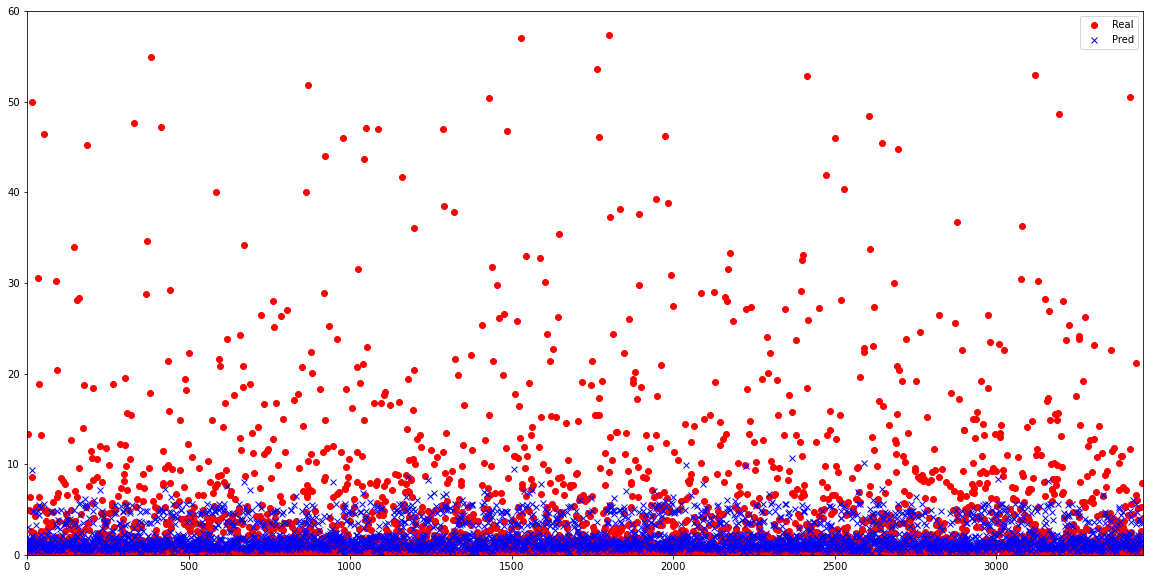

In [32]:
# JUST PLOT

_data_len = len(y_test)
plt.figure(figsize=(20,10))

plot_list = [idx for idx in range(_data_len) if abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx]) <= 10 or True]

# plot_list = []
# for idx in range(_data_len):
#     fix = abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx])
#     if fix<= 10:
#         plot_list.append(idx)
#     else:
#         pass
data_len = len(plot_list)
# print(plot_list)
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'ro', label='Real')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'bx', label='Pred')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'r', label='Real_line')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'b', label='Pred_line')

height = 60#max(y_test.cpu().detach().numpy())
plt.axis([0, data_len, 0, height])
plt.legend()

# Get RMSE - PRICE

In [138]:
def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2)).item(), torch.std(yhat-y, unbiased=False).item()/np.sqrt(len(y))

tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
# tmp.info()

# Item - RMSE
import scipy.stats
rmse_list_item = []
std_list_item = []

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD'].values
    pred = item_df['TRADE_HSCD_COUNTRYCD'].values * (item_df['pred'].values / 100.0)
#     print(ground_truth)
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_item.append(rmse)
    std_list_item.append(std)
    
    
# Country - RMSE
rmse_list_country = []
std_list_country = []

cnt = 0
item_list = sorted(tmp.iloc[:,2].unique()) # unique - country
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 2] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD'].values
    pred = item_df['TRADE_HSCD_COUNTRYCD'].values * (item_df['pred'].values / 100.0)
    
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_country.append(rmse)
    std_list_country.append(std)
    


# GET RMSE - percentage

In [139]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
# tmp.info()


# Item - RMSE
import scipy.stats
rmse_list_item_p = []
std_list_item_p = []

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['next_year_percent'].values
    pred = item_df['pred'].values
    
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_item_p.append(rmse)
    std_list_item_p.append(std)
    
    
# Country - RMSE
rmse_list_country_p = []
std_list_country_p = []

cnt = 0
item_list = sorted(tmp.iloc[:,2].unique()) # unique - country
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 2] == item_number]
    
    ground_truth = item_df['next_year_percent'].values
    pred = item_df['pred'].values
    
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_country_p.append(rmse)
    std_list_country_p.append(std)
    


In [140]:
loss_item.append(np.mean(rmse_list_item))
std_item.append(np.mean(std_list_item))
loss_country.append(np.mean(rmse_list_country))
std_country.append(np.mean(std_list_country))


loss_item_p.append(np.mean(rmse_list_item_p))
std_item_p.append(np.mean(std_list_item_p))
loss_country_p.append(np.mean(rmse_list_country_p))
std_country_p.append(np.mean(std_list_country_p))

In [141]:
line_loss_item.append(rmse_list_item)
line_loss_country.append(rmse_list_country)
line_loss_item_p.append(rmse_list_item_p)
line_loss_country_p.append(rmse_list_country_p)

# RMSE's Plot - plotting Start

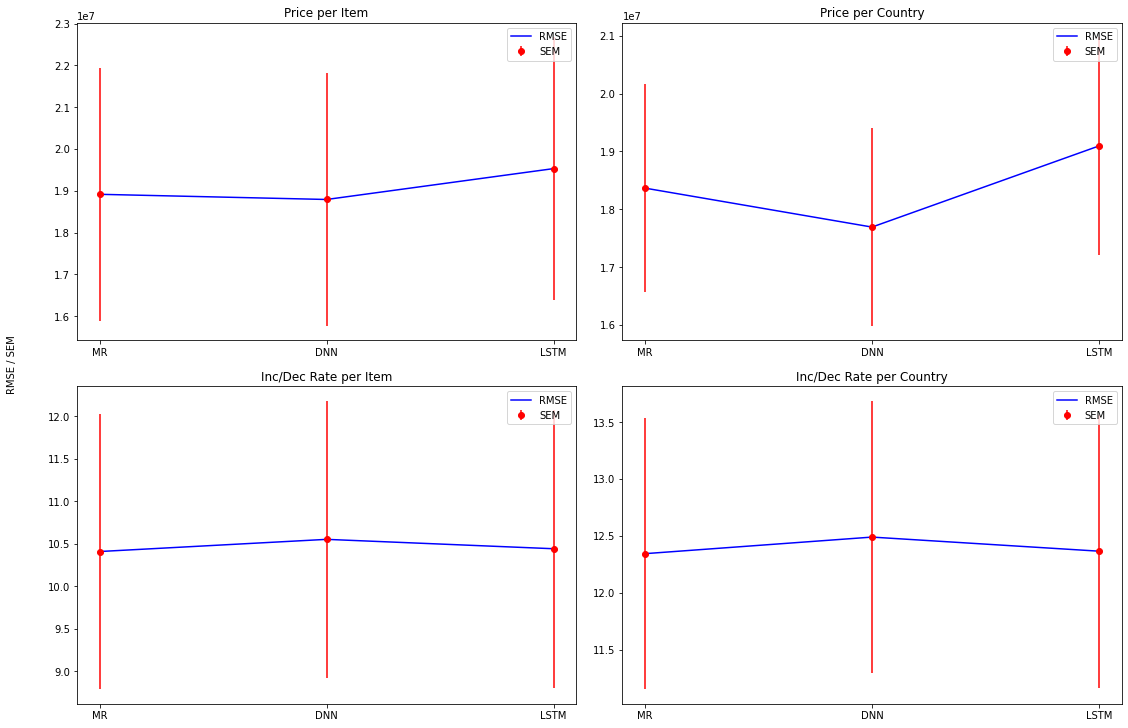

In [65]:
# initial
init_flag = False

if init_flag:
    # price
    loss_item = []
    std_item = []
    loss_country = []
    std_country = []

    # percentage
    loss_item_p = []
    std_item_p = []
    loss_country_p = []
    std_country_p = []
    
    # line
    line_loss_item = []
    line_loss_country = []
    line_loss_item_p = []
    line_loss_country_p = []
    
if not init_flag:
    x = ['MR', 'DNN', 'LSTM']
#     fig, ax = plt.subplots(1,4, squeeze=True, constrained_layout=True, figsize=(20,5))
    fig, ax = plt.subplots(2,2, squeeze=True, constrained_layout=True,  figsize=(15,10))
    ax[0][0].errorbar(x, loss_item, yerr=std_item, fmt='o', label = 'SEM', color='r')
    ax[0][0].plot(x, loss_item, label = 'RMSE', color='b')
    ax[0][0].set_title('Price per Item')
    ax[0][0].legend()

    ax[0][1].errorbar(x, loss_country, yerr=std_country, fmt='o', label = 'SEM', color='r')
    ax[0][1].plot(x, loss_country, label = 'RMSE', color='b')
    ax[0][1].set_title('Price per Country')
    ax[0][1].legend()

    ax[1][0].errorbar(x, loss_item_p, yerr=std_item_p, fmt='o', label = 'SEM', color='r')
    ax[1][0].plot(x, loss_item_p, label = 'RMSE', color='b')
    ax[1][0].set_title('Inc/Dec Rate per Item')
    ax[1][0].legend()

    ax[1][1].errorbar(x, loss_country_p, yerr=std_country_p, fmt='o', label = 'SEM', color='r')
    ax[1][1].plot(x, loss_country_p, label = 'RMSE', color='b')
    ax[1][1].set_title('Inc/Dec Rate per Country')
    ax[1][1].legend()
    fig.text(-0.03, 0.5, 'RMSE / SEM', ha='center', va='center', rotation='vertical')
#     fig.text(0.5, -0.03, 'Models', ha='center', va='center')
    
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


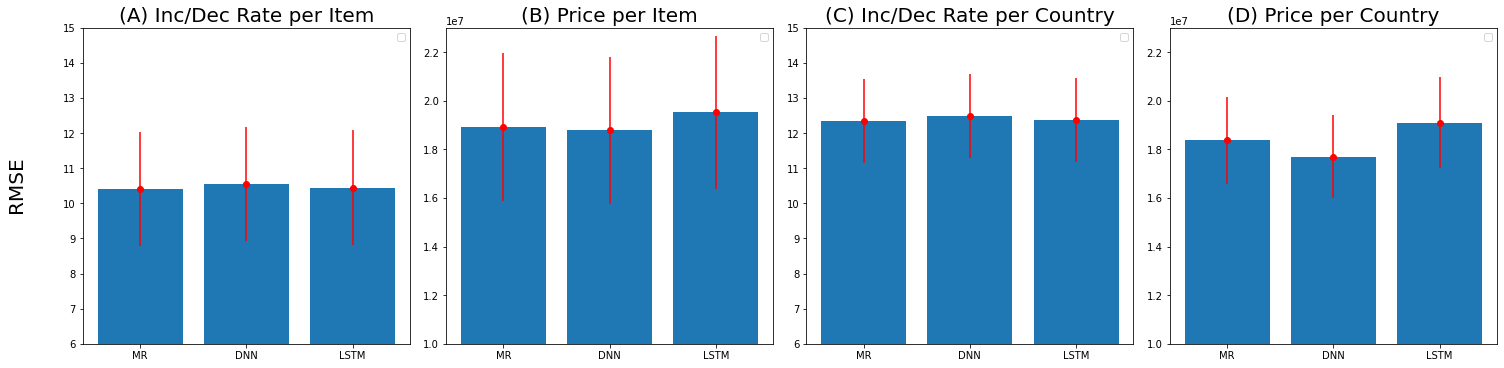

[10.40855348 10.55157851 10.44133351]


In [160]:
# initial
init_flag = False

if init_flag:
    # price
    loss_item = []
    std_item = []
    loss_country = []
    std_country = []

    # percentage
    loss_item_p = []
    std_item_p = []
    loss_country_p = []
    std_country_p = []
    
    # line
    line_loss_item = []
    line_loss_country = []
    line_loss_item_p = []
    line_loss_country_p = []
    
if not init_flag:
    pr = 1e7
    it = 1
    y_limit_price = [1.0*pr, 2.3*pr]
    y_limit_item = [6,15]
    
    
    x = ['MR', 'DNN', 'LSTM']
    fig, ax = plt.subplots(1,4, squeeze=True, constrained_layout=True, figsize=(20,5))
#     fig, ax = plt.subplots(2,2, squeeze=True, constrained_layout=True,  figsize=(15,10))

    ax[0].errorbar(x, loss_item_p, yerr=std_item_p, fmt='o', color='r')
    ax[0].bar(x, loss_item_p)
    ax[0].set_title('(A) Inc/Dec Rate per Item', fontsize=20)
    ax[0].set_ylim(y_limit_item)
    ax[0].legend()
    
    ax[1].errorbar(x, loss_item, yerr=std_item, fmt='o', color='r')
    ax[1].bar(x, loss_item)
    ax[1].set_title('(B) Price per Item', fontsize=20)
    ax[1].set_ylim(y_limit_price)
    ax[1].legend()

    ax[2].errorbar(x, loss_country_p, yerr=std_country_p, fmt='o', color='r')
    ax[2].bar(x, loss_country_p)
    ax[2].set_title('(C) Inc/Dec Rate per Country', fontsize=20)
    ax[2].set_ylim(y_limit_item)
    ax[2].legend()

    ax[3].errorbar(x, loss_country, yerr=std_country, fmt='o', color='r')
    ax[3].bar(x, loss_country)
    ax[3].set_title('(D) Price per Country', fontsize=20)
    ax[3].set_ylim(y_limit_price)
    ax[3].legend()
    
    fig.text(-0.03, 0.5, 'RMSE', ha='center', va='center', rotation='vertical', fontsize=20)
#     fig.text(0.5, -0.03, 'Models', ha='center', va='center')
    
    plt.show()
    print(loss_item_p)

In [159]:
loss_item[0]/loss_item[1]

1.0065836026400348

In [42]:
line_loss_item[0][1:-1].split(', ')

['514701.8447798833',
 '6325903.042370487',
 '1055577.936067471',
 '753182.8526827369',
 '706303.1951253192',
 '1809226.3845294837',
 '996250.484689427',
 '1806940.5911363985',
 '3692345.10828302',
 '3926464.625464662',
 '2165695.1191189317',
 '228043.33790582232',
 '1008447.9629398435',
 '310195.9615492433',
 '8935403.286514038',
 '5818577.608993884',
 '5510917.9786334615',
 '1597295.3370433853',
 '4860462.894333412',
 '28319028.984518662',
 '4617093.7789341705',
 '2992750.6460583317',
 '1714988.230745387',
 '1971475.3877678234',
 '1014220.861040255',
 '3581159.5497071664',
 '886135.5207782902',
 '1205481.1369884815',
 '5111674.357403448',
 '46431314.45834363',
 '33962981.97907549',
 '36968664.3198305',
 '53630835.05260602',
 '25489072.915615756',
 '22343537.26950852',
 '13825097.421023035',
 '10200902.421767551',
 '542246.4354936156',
 '1036709.5233733382',
 '24391080.843428105',
 '10909180.307738373',
 '15697214.71408281',
 '8756673.127104452',
 '8633416.69349042',
 '18044966.905722

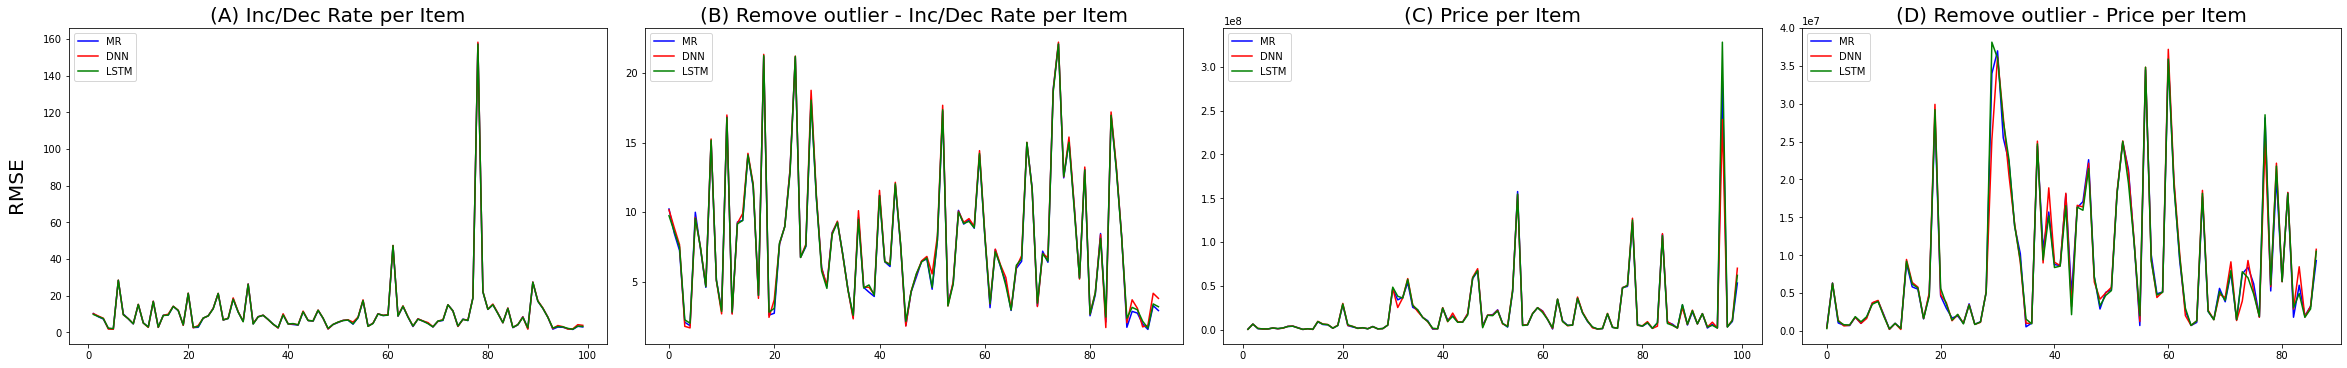

In [161]:
if not init_flag:
    pr = 1e8
    it = 1
    y_limit_price = [0, 0.3*pr]
    y_limit_item = [0,25]
    
    fig, ax = plt.subplots(1,4, squeeze=True, constrained_layout=True, figsize=(32,5))
#     fig, ax = plt.subplots(2,2, squeeze=True, constrained_layout=True, figsize=(15,10))

    x = [i for i in range(1, len(line_loss_item_p[0])+1)]
    ax[0].plot(x, line_loss_item_p[0], 'b', label='MR')
    ax[0].plot(x, line_loss_item_p[1], 'r', label='DNN')
    ax[0].plot(x, line_loss_item_p[2], 'g', label='LSTM')
    ax[0].set_title('(A) Inc/Dec Rate per Item', fontsize=20)
#     ax[2].set_ylim(y_limit_item)
    ax[0].legend(loc='upper left')
    

    MR_it_p = [[val for val in lli if val < 25] for lli in line_loss_item_p]
    x0 = [i for i in range(len(MR_it_p[0]))]
    x1 = [i for i in range(len(MR_it_p[1]))]
    x2 = [i for i in range(len(MR_it_p[2]))]
    ax[1].plot(x0, MR_it_p[0], 'b', label='MR')
    ax[1].plot(x1, MR_it_p[1], 'r', label='DNN')
    ax[1].plot(x2, MR_it_p[2], 'g', label='LSTM')
    ax[1].set_title('(B) Remove outlier - Inc/Dec Rate per Item', fontsize=20)
#     ax[3].set_ylim(y_limit_item)
    ax[1].legend(loc='upper left')
    
    x = [i for i in range(1, len(line_loss_item[0])+1)]
    ax[2].plot(x, line_loss_item[0], 'b', label='MR')
    ax[2].plot(x, line_loss_item[1], 'r', label='DNN')
    ax[2].plot(x, line_loss_item[2], 'g', label='LSTM')
    ax[2].set_title('(C) Price per Item', fontsize=20)
#     ax[0].set_ylim(y_limit_price)
    ax[2].legend()
    

    MR_it = [[val for val in lli if val < 0.4*pr] for lli in line_loss_item]
    x0 = [i for i in range(len(MR_it[0]))]
    x1 = [i for i in range(len(MR_it[1]))]
    x2 = [i for i in range(len(MR_it[2]))] 
    ax[3].plot(x0, MR_it[0], 'b', label='MR')
    ax[3].plot(x1, MR_it[1], 'r', label='DNN')
    ax[3].plot(x2, MR_it[2], 'g', label='LSTM')
    ax[3].set_title('(D) Remove outlier - Price per Item', fontsize=20)
#     ax[1].set_ylim(y_limit_price)
    ax[3].legend(loc='upper left')

    fig.text(-0.01, 0.5, 'RMSE', ha='center', va='center', rotation='vertical', fontsize=20)
    plt.show()

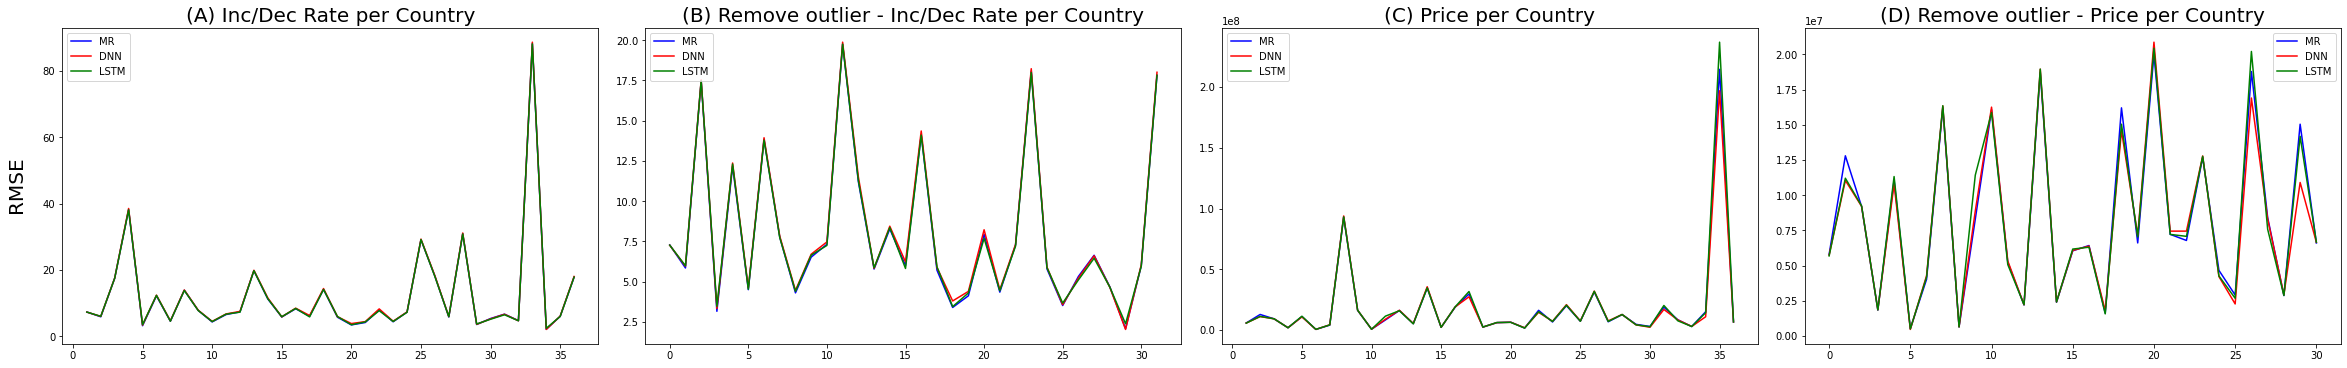

In [163]:
if not init_flag:
    pr = 1e8
    it = 1
    y_limit_price = [0, 0.25*pr]
    y_limit_item = [0,20]
    
    fig, ax = plt.subplots(1,4, squeeze=True, constrained_layout=True, figsize=(32,5))
#     fig, ax = plt.subplots(2,2, squeeze=True, constrained_layout=True, figsize=(15,10))

    x = [i for i in range(1, len(line_loss_country_p[0])+1)]
    ax[0].plot(x, line_loss_country_p[0], 'b', label='MR')
    ax[0].plot(x, line_loss_country_p[1], 'r', label='DNN')
    ax[0].plot(x, line_loss_country_p[2], 'g', label='LSTM')
    ax[0].set_title('(A) Inc/Dec Rate per Country', fontsize=20)
#     ax[2].set_ylim(y_limit_item)
    ax[0].legend()

    MR_c_p = [[val for val in lli if val < 20] for lli in line_loss_country_p]
    x0 = [i for i in range(len(MR_c_p[0]))]
    x1 = [i for i in range(len(MR_c_p[1]))]
    x2 = [i for i in range(len(MR_c_p[2]))]
#     x = [i for i in range(1, len(line_loss_country_p[0])+1)]
    ax[1].plot(x0, MR_c_p[0], 'b', label='MR')
    ax[1].plot(x1, MR_c_p[1], 'r', label='DNN')
    ax[1].plot(x2, MR_c_p[2], 'g', label='LSTM')
    ax[1].set_title('(B) Remove outlier - Inc/Dec Rate per Country', fontsize=20)
#     ax[3].set_ylim(y_limit_item)
    ax[1].legend(loc = 'upper left')
    
    x = [i for i in range(1, len(line_loss_country[0])+1)]
    ax[2].plot(x, line_loss_country[0], 'b', label='MR')
    ax[2].plot(x, line_loss_country[1], 'r', label='DNN')
    ax[2].plot(x, line_loss_country[2], 'g', label='LSTM')
    ax[2].set_title('(C) Price per Country', fontsize=20)
#     ax[0].set_ylim(y_limit_price)
    ax[2].legend()

    MR_c = [[val for val in lli if val < 0.25*pr] for lli in line_loss_country]
    x0 = [i for i in range(len(MR_c[0]))]
    x1 = [i for i in range(len(MR_c[1]))]
    x2 = [i for i in range(len(MR_c[2]))]
    ax[3].plot(x0, MR_c[0], 'b', label='MR')
    ax[3].plot(x1, MR_c[1], 'r', label='DNN')
    ax[3].plot(x2, MR_c[2], 'g', label='LSTM')
    ax[3].set_title('(D) Remove outlier - Price per Country', fontsize=20)
#     ax[1].set_ylim(y_limit_price)
    ax[3].legend()

    fig.text(-0.01, 0.5, 'RMSE', ha='center', va='center', rotation='vertical', fontsize=20)
#     fig.text(0.5, -0.03, 'ORIGINAL MAXIMIZE', ha='center', va='center')
    plt.show()

In [180]:
loss_item

[18201972.380751327, 17523836.001432333, 17341233.689033713]

In [86]:
def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2)).item(), torch.std(yhat-y, unbiased=False).item()/np.sqrt(len(y))
LSTM_loss, LSTM_std = RMSELoss(pred_y, y_test)


In [89]:
MR_loss

tensor(19.5296, device='cuda:0', grad_fn=<SqrtBackward>)

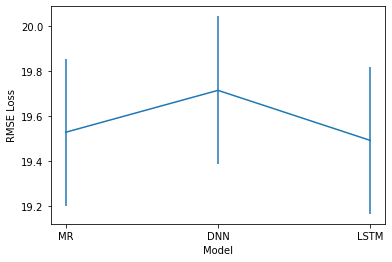

In [97]:
# MR_loss = 0
# MR_std = 0
# LSTM_loss = 0
# LSTM_std = 0
# DNN_loss = 0
# DNN_std = 0

# plt.errorbar([1,2,3], [MR_loss.item, DNN_loss, LSTM_loss], yerr = [MR_std, DNN_std, LSTM_std])
# plt.show()

plot_loss_list = []
plot_sem_list = []

plt.ylabel('RMSE Loss')
plt.xlabel('Model')
plt.errorbar(["MR","DNN","LSTM"], [MR_loss.item(), DNN_loss.item(), LSTM_loss.item()], yerr = [MR_std.item()/np.sqrt(len(pred_y)), DNN_std.item()/np.sqrt(len(pred_y)), LSTM_std.item()/np.sqrt(len(pred_y))])
plt.show()

In [33]:
import seaborn as sns
diff_list_L2 = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
diff_list_L2 = np.array(diff_list_L2)

## original

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



## IQR

In [34]:
diff_list_L2 = np.sort(diff_list_L2)

In [35]:
q1 = np.percentile(diff_list_L2, 25)
q3 = np.percentile(diff_list_L2, 75)

In [36]:
iqr = q3 - q1

In [37]:
outlier = 1.5*iqr

In [38]:
r_l2 = np.array([x for x in diff_list_L2 if (x > q1 - outlier and x < q3 +outlier)])
len(r_l2)

3040

In [39]:
r_l2.mean()

1.6143401191773725

In [40]:
r1 = np.array([x for x in diff_list_L2 if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

414

<ipython-input-41-9b88de2c6935>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["AFTER"])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1fc05b6940>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1fc05c0d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1fc05c0a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1fc054a490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1fc054a7f0>],
 'means': []}

<Figure size 72x7200 with 0 Axes>

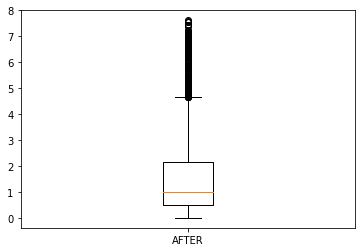

In [41]:
new_diff_list = diff_list_L2[np.abs(diff_list_L2) <= 1*diff_list_L2.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r_l2)

# L2 case Finish

In [ ]:
######################

# for bar plot

In [ ]:
outlier_l1_after = np.round(r.mean(), 2)

In [ ]:
outlier_l1_before = np.round(diff_list.mean(), 2)

In [ ]:
outlier_l2_after = np.round(r_l2.mean(), 2)

In [ ]:
outlier_l2_before = np.round(diff_list_L2.mean(), 2)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['L1', 'L2']
before_list = [outlier_l1_before, outlier_l2_before]
after_list = [outlier_l1_after, outlier_l2_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
res = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
cnt = 0
tot = []
for i in range(len(res)):
    if res[i] > 20:
        cnt+=1
        tot.append(res[i])

In [ ]:
print(cnt)
sns.distplot(tot)

In [ ]:
df['next_year_percent'].min()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['Selected Features', 'All Features']
outlier_l1_s_before = 4.76

outlier_l1_s_after = 1.98

outlier_l1_a_before = 4.61

outlier_l1_a_after = 1.83


before_list = [outlier_l1_s_before, outlier_l1_a_before]
after_list = [outlier_l1_s_after, outlier_l1_a_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('L1 Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0.6,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
# !pip install hiddenlayer
import hiddenlayer as hl

In [ ]:
transforms = [hl.transforms.Prune('Constant')]

In [ ]:
graph = hl.build_graph(deepmodel, x_test, transforms=transforms)

In [ ]:
graph.them = hl.graph.THEMES['blue'].copy()

In [ ]:
graph

In [ ]:
# !pip install torchviz

In [73]:
from torchviz import make_dot

In [116]:
make_dot(deepmodel(x_test), params=dict(list(deepmodel.named_parameters())))

RuntimeError: input must have 3 dimensions, got 2

In [152]:
from torchsummary import summary
summary(deepmodel, [1,11,])

TypeError: rand() argument after * must be an iterable, not int

In [ ]:
!pip install torchsummary

In [132]:
sha = x_test.reshape(-1,1,input_size).shape

In [144]:
inp = torch.zeros(16,1,11)

In [153]:
deepmodel.eval()

RNN(
  (lstm): LSTM(11, 512, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=512, out_features=1, bias=True)
)